In [5]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

# Parametric models

In [8]:
## df_parametric = pd.read_csv('/content/drive/My Drive/Datasets/parametric.csv')

df_parametric = pd.read_csv('parametric.csv')

df_parametric.head()

Unnamed: 0       Age      nWBV  Gender_M  Educ_level_2.0  Educ_level_3.0  \
0           0 -0.147367  0.137682         0               1               0   
1           1 -2.176432  1.709157         0               0               0   
2           2 -0.254160 -0.683238         0               0               0   
3           3 -0.147367 -1.128881         1               0               0   
4           4 -2.496811  2.107889         0               0               1   

   Educ_level_4.0  Educ_level_5.0  SES_level_2.0  SES_level_3.0  \
0               0               0              0              1   
1               1               0              0              0   
2               1               0              0              1   
3               0               1              1              0   
4               0               0              1              0   

   SES_level_4.0  SES_level_5.0  MMSE_Group_> 25  Group_Non-Demented  
0              0              0                1                   1  
1              0              0                1                   1  
2              0              0                1                   0  
3              0              0                1                   1  
4              0              0                1                   1

In [9]:
df_parametric = df_parametric.iloc[:, 1:]

df_parametric.head()

Age      nWBV  Gender_M  Educ_level_2.0  Educ_level_3.0  \
0 -0.147367  0.137682         0               1               0   
1 -2.176432  1.709157         0               0               0   
2 -0.254160 -0.683238         0               0               0   
3 -0.147367 -1.128881         1               0               0   
4 -2.496811  2.107889         0               0               1   

   Educ_level_4.0  Educ_level_5.0  SES_level_2.0  SES_level_3.0  \
0               0               0              0              1   
1               1               0              0              0   
2               1               0              0              1   
3               0               1              1              0   
4               0               0              1              0   

   SES_level_4.0  SES_level_5.0  MMSE_Group_> 25  Group_Non-Demented  
0              0              0                1                   1  
1              0              0                1                   1  
2              0              0                1                   0  
3              0              0                1                   1  
4              0              0                1                   1

In [10]:
df_parametric.shape

(608, 13)

In [11]:
df_parametric['Group_Non-Demented'].value_counts()

1    341
0    267
Name: Group_Non-Demented, dtype: int64

In [12]:
X = df_parametric.iloc[:, :-1]
y = df_parametric.iloc[:, -1]

In [13]:
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [14]:
X_p_train.shape, X_p_test.shape

((486, 12), (122, 12))

## Logistic Regression

Accuracy Score:  0.7131147540983607


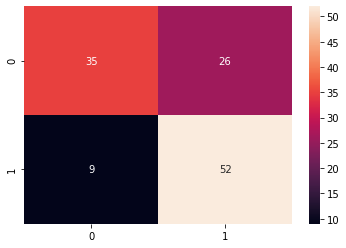

ROC AUC Score:  0.7131147540983606


In [15]:
LR = LogisticRegression(random_state=10)
LR.fit(X_p_train, y_p_train)
y_LR_pred = LR.predict(X_p_test)

print("Accuracy Score: ", accuracy_score(y_p_test, y_LR_pred))

cm = confusion_matrix(y_p_test, y_LR_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_p_test, y_LR_pred))

In [16]:
## We can see that the data is underfitting.

## Naive Bayes Algorithm

Accuracy Score:  0.7049180327868853


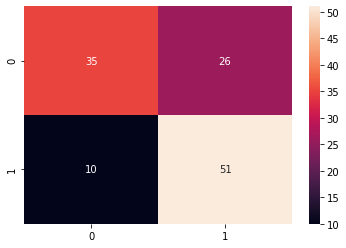

ROC AUC Score:  0.7049180327868853


In [17]:
NB = BernoulliNB()
NB.fit(X_p_train, y_p_train)
y_NB_pred = NB.predict(X_p_test)

print("Accuracy Score: ", accuracy_score(y_p_test, y_NB_pred))

cm = confusion_matrix(y_p_test, y_NB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_p_test, y_NB_pred))

In [18]:
## We can see that the data is underfitting in this model too.

## K-Nearest Neighbors Algorithm

Accuracy Score:  0.6967213114754098


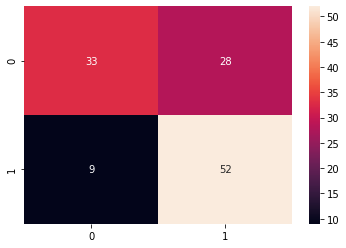

ROC AUC Score:  0.6967213114754097


In [19]:
KNN = KNeighborsClassifier()
KNN.fit(X_p_train, y_p_train)
y_KNN_pred = KNN.predict(X_p_test)

print("Accuracy Score: ", accuracy_score(y_p_test, y_KNN_pred))

cm = confusion_matrix(y_p_test, y_KNN_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_p_test, y_KNN_pred))

## K-Nearest Neighbors - Hyper parameter tuning

In [20]:
kf=KFold(n_splits=3,shuffle=True,random_state=10)

In [21]:
params = {
    'n_neighbors': range(1, 51),
    'weights': ['distance', 'uniform'],
    'metric': ['hamming', 'euclidean', 'manhattan', 'Chebyshev']
         }

gs_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_KNN.fit(X_p_train, y_p_train)

KNN_tuned = gs_KNN.best_estimator_
print("KNN TUNED MODEL: ", KNN_tuned)
scores = cross_val_score(KNN_tuned, X_p_test, y_p_test, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("KNN TUNED SCORES: ", scores)
print("KNN Tuned Bias Error: ", 1 - np.mean(scores))
print("KNN Tuned Variance Error: ", np.std(scores, ddof = 1))

KNN TUNED MODEL:  KNeighborsClassifier(metric='manhattan', n_neighbors=43, weights='distance')
KNN TUNED SCORES:  [0.79285714 0.88571429 0.6641604 ]
KNN Tuned Bias Error:  0.21908939014202178
KNN Tuned Variance Error:  0.11125902523276573


In [22]:
## We are getting a high bias error still.

# Non-parametric models

In [23]:
# df_non_parametric = pd.read_csv('/content/drive/My Drive/Datasets/non_parametric.csv')

df_non_parametric = pd.read_csv('non_parametric.csv')

df_non_parametric.head()

Unnamed: 0       Age       ASF      nWBV      eTIV  Gender_M  \
0           0 -0.147367  0.759418  0.137682 -0.785886         0   
1           1 -2.176432  2.427471  1.709157 -1.956864         0   
2           2 -0.254160  0.025475 -0.683238 -0.132040         0   
3           3 -0.147367 -0.967943 -1.128881  0.949778         1   
4           4 -2.496811  0.929930  2.107889 -0.922599         0   

   Educ_level_2.0  Educ_level_3.0  Educ_level_4.0  Educ_level_5.0  \
0               1               0               0               0   
1               0               0               1               0   
2               0               0               1               0   
3               0               0               0               1   
4               0               1               0               0   

   SES_level_2.0  SES_level_3.0  SES_level_4.0  SES_level_5.0  \
0              0              1              0              0   
1              0              0              0              0   
2              0              1              0              0   
3              1              0              0              0   
4              1              0              0              0   

   MMSE_Group_> 25  Group_Non-Demented  
0                1                   1  
1                1                   1  
2                1                   0  
3                1                   1  
4                1                   1

In [24]:
df_non_parametric = df_non_parametric.iloc[:, 1:]

df_non_parametric.head()

Age       ASF      nWBV      eTIV  Gender_M  Educ_level_2.0  \
0 -0.147367  0.759418  0.137682 -0.785886         0               1   
1 -2.176432  2.427471  1.709157 -1.956864         0               0   
2 -0.254160  0.025475 -0.683238 -0.132040         0               0   
3 -0.147367 -0.967943 -1.128881  0.949778         1               0   
4 -2.496811  0.929930  2.107889 -0.922599         0               0   

   Educ_level_3.0  Educ_level_4.0  Educ_level_5.0  SES_level_2.0  \
0               0               0               0              0   
1               0               1               0              0   
2               0               1               0              0   
3               0               0               1              1   
4               1               0               0              1   

   SES_level_3.0  SES_level_4.0  SES_level_5.0  MMSE_Group_> 25  \
0              1              0              0                1   
1              0              0              0                1   
2              1              0              0                1   
3              0              0              0                1   
4              0              0              0                1   

   Group_Non-Demented  
0                   1  
1                   1  
2                   0  
3                   1  
4                   1

In [25]:
X = df_non_parametric.iloc[:, :-1]
y = df_non_parametric.iloc[:, -1]

In [26]:
X_np_train, X_np_test, y_np_train, y_np_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [27]:
X_np_train.shape, X_np_test.shape

((486, 14), (122, 14))

## Logistic Regression

Accuracy Score:  0.6885245901639344


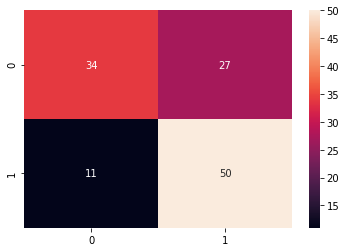

ROC AUC Score:  0.6885245901639344


In [28]:
LR = LogisticRegression(random_state=10)
LR.fit(X_np_train, y_np_train)
y_LR_pred = LR.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_LR_pred))

cm = confusion_matrix(y_np_test, y_LR_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_LR_pred))

## Naive Bayes

Accuracy Score:  0.6967213114754098


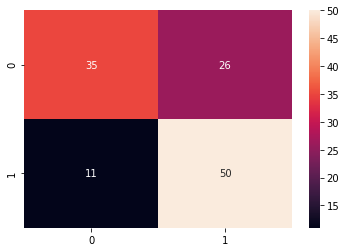

ROC AUC Score:  0.6967213114754098


In [29]:
NB = BernoulliNB()
NB.fit(X_np_train, y_np_train)
y_NB_pred = NB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_NB_pred))

cm = confusion_matrix(y_np_test, y_NB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_NB_pred))

## KNN

Accuracy Score:  0.680327868852459


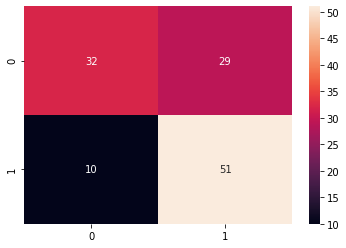

ROC AUC Score:  0.680327868852459


In [30]:
KNN = KNeighborsClassifier()
KNN.fit(X_np_train, y_np_train)
y_KNN_pred = KNN.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_KNN_pred))

cm = confusion_matrix(y_np_test, y_KNN_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_KNN_pred))

## KNN - Hyperparameter Tuning

In [31]:
params = {
    'n_neighbors': range(1, 51),
    'weights': ['distance', 'uniform'],
    'metric': ['hamming', 'euclidean', 'manhattan', 'Chebyshev']
         }

gs_KNN = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_KNN.fit(X_np_train, y_np_train)

KNN_tuned = gs_KNN.best_estimator_
print("KNN TUNED MODEL: ", KNN_tuned)
scores = cross_val_score(KNN_tuned, X_np_test, y_np_test, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("KNN TUNED SCORES: ", scores)
print("KNN Tuned Bias Error: ", 1 - np.mean(scores))
print("KNN Tuned Variance Error: ", np.std(scores, ddof = 1))

KNN TUNED MODEL:  KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
KNN TUNED SCORES:  [0.78095238 0.73809524 0.5952381 ]
KNN Tuned Bias Error:  0.2952380952380952
KNN Tuned Variance Error:  0.09724084693648637


## Decision Tree Classifier Algorithm

Accuracy Score:  0.8032786885245902


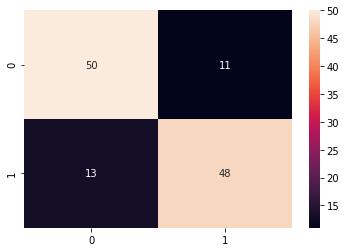

ROC AUC Score:  0.8032786885245902


In [32]:
DT = DecisionTreeClassifier(random_state=10)
DT.fit(X_np_train, y_np_train)
y_DT_pred = DT.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_DT_pred))

cm = confusion_matrix(y_np_test, y_DT_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_DT_pred))

## Decision Tree - Hyperparameter Tuning

In [33]:
params = {
    'max_depth': range(1, 21),  
    'criterion': ['entropy', 'gini']
         }

gs_DT = GridSearchCV(DecisionTreeClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_DT.fit(X_np_train, y_np_train)

DT_tuned = gs_DT.best_estimator_
print("Decision Tree TUNED MODEL: ", DT_tuned)
scores = cross_val_score(DT_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Decision Tree TUNED SCORES: ", scores)
print("Decision Tree Tuned Bias Error: ", 1 - np.mean(scores))
print("Decision Tree Tuned Variance Error: ", np.std(scores, ddof = 1))

Decision Tree TUNED MODEL:  DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=10)
Decision Tree TUNED SCORES:  [0.81853583 0.84036382 0.86021835]
Decision Tree Tuned Bias Error:  0.1602940047484741
Decision Tree Tuned Variance Error:  0.0208490444307445


## Random Forest Classifier Algorithm

Accuracy Score:  0.8114754098360656


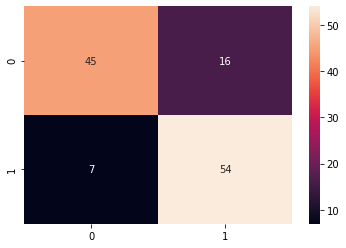

ROC AUC Score:  0.8114754098360655


In [34]:
RF = RandomForestClassifier(random_state=10)
RF.fit(X_np_train, y_np_train)
y_RF_pred = RF.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_RF_pred))

cm = confusion_matrix(y_np_test, y_RF_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_RF_pred))

## Random Forest - Hyperparameter Tuning

In [35]:
params = {
    'max_depth': range(1, 10), 
    'n_estimators': range(1, 101), 
    'criterion': ['entropy', 'gini']
         }

gs_RF = GridSearchCV(RandomForestClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_RF.fit(X_np_train, y_np_train)

RF_tuned = gs_RF.best_estimator_
print("Random Forest TUNED MODEL: ", RF_tuned)
scores = cross_val_score(RF_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Random Forest TUNED SCORES: ", scores)
print("Random Forest Tuned Bias Error: ", 1 - np.mean(scores))
print("Random Forest Tuned Variance Error: ", np.std(scores, ddof = 1))

Random Forest TUNED MODEL:  RandomForestClassifier(max_depth=7, n_estimators=38, random_state=10)
Random Forest TUNED SCORES:  [0.84267913 0.88574238 0.90909091]
Random Forest Tuned Bias Error:  0.1208291945451817
Random Forest Tuned Variance Error:  0.033690063306017266


## Adaboost Classifier Algorithm

Accuracy Score:  0.7295081967213115


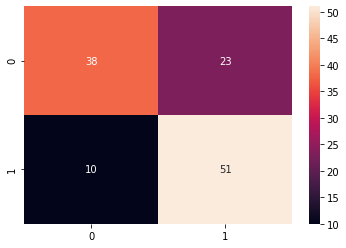

ROC AUC Score:  0.7295081967213115


In [36]:
AB = AdaBoostClassifier(random_state=10)
AB.fit(X_np_train, y_np_train)
y_AB_pred = AB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_AB_pred))

cm = confusion_matrix(y_np_test, y_AB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_AB_pred))

## AdaBoost - Hyperparameter Tuning

In [37]:
params = {
    'base_estimator': [LR, NB, KNN, DT, RF],
    'n_estimators': range(1, 120),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_AB = GridSearchCV(AdaBoostClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_AB.fit(X_np_train, y_np_train)

AB_tuned = gs_AB.best_estimator_
print("Adaboost TUNED MODEL: ", AB_tuned)
scores = cross_val_score(AB_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Ada Boost Classifier TUNED SCORES: ", scores)
print("Ada Boost Classifier  Tuned Bias Error: ", 1 - np.mean(scores))
print("Ada Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Adaboost TUNED MODEL:  AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=10),
                   learning_rate=0.1, n_estimators=1, random_state=10)
Ada Boost Classifier TUNED SCORES:  [0.90172313 0.90821042 0.92944597]
Ada Boost Classifier  Tuned Bias Error:  0.08687349048205517
Ada Boost Classifier Tuned Variance Error:  0.014500515579085127


## Gradient Boosting Algorithm

Accuracy Score:  0.7704918032786885


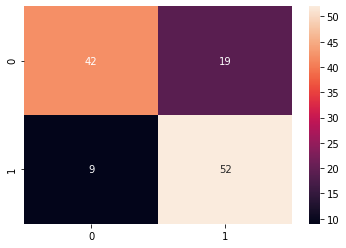

ROC AUC Score:  0.7704918032786885


In [38]:
GB = GradientBoostingClassifier(random_state=10)
GB.fit(X_np_train, y_np_train)
y_GB_pred = GB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_GB_pred))

cm = confusion_matrix(y_np_test, y_GB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_GB_pred))

## Gradient Boosting - Hyperparameter Tuning

In [39]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_GB = GridSearchCV(GradientBoostingClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_GB.fit(X_np_train, y_np_train)

GB_tuned = gs_GB.best_estimator_
print("Gradient Boosting TUNED MODEL: ", GB_tuned)
scores = cross_val_score(GB_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Gradient Boosting Classifier TUNED SCORES: ", scores)
print("Gradient Boosting Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("Gradient Boosting Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Gradient Boosting TUNED MODEL:  GradientBoostingClassifier(learning_rate=0.15, n_estimators=93, random_state=10)
Gradient Boosting Classifier TUNED SCORES:  [0.87052181 0.88495575 0.92429344]
Gradient Boosting Classifier Tuned Bias Error:  0.10674300049635788
Gradient Boosting Classifier Tuned Variance Error:  0.02783038174061353


## XG Boost Algorithm

[15:38:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:  0.8360655737704918


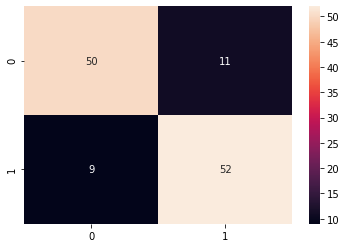

ROC AUC Score:  0.8360655737704918


In [40]:
XGB = XGBClassifier(random_state=10)
XGB.fit(X_np_train, y_np_train)
y_XGB_pred = XGB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_XGB_pred))

cm = confusion_matrix(y_np_test, y_XGB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_XGB_pred))

## XG Boost - Hyperparameter Tuning

In [41]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_XGB = GridSearchCV(XGBClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_XGB.fit(X_np_train, y_np_train)

XGB_tuned = gs_XGB.best_estimator_
print("XG Boost TUNED MODEL: ", XGB_tuned)
scores = cross_val_score(XGB_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("XG Boost Classifier TUNED SCORES: ", scores)
print("XG Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("XG Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

[15:38:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:38:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:38:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:39:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:39:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:40:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:40:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[15:41:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:41:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

## Light GBM Algorithm

Accuracy Score:  0.7950819672131147


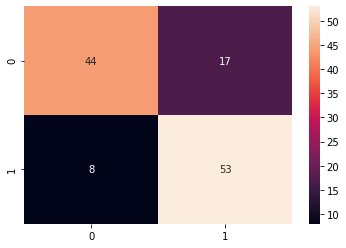

ROC AUC Score:  0.7950819672131147


In [42]:
LGBM = LGBMClassifier(random_state=10)
LGBM.fit(X_np_train, y_np_train)
y_LGBM_pred = LGBM.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_LGBM_pred))

cm = confusion_matrix(y_np_test, y_LGBM_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_LGBM_pred))

## Light GBM - Hyperparameter Tuning

In [43]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_LGBM = GridSearchCV(LGBMClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_LGBM.fit(X_np_train, y_np_train)

LGBM_tuned = gs_LGBM.best_estimator_
print("LGBM TUNED MODEL: ", LGBM_tuned)
scores = cross_val_score(LGBM_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("LGBM Classifier TUNED SCORES: ", scores)
print("LGBM Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("LGBM Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

LGBM TUNED MODEL:  LGBMClassifier(learning_rate=0.15, n_estimators=69, random_state=10)
LGBM Classifier TUNED SCORES:  [0.86360981 0.88466077 0.91255994]
LGBM Boost Classifier Tuned Bias Error:  0.11305649236375415
LGBM Boost Classifier Tuned Variance Error:  0.02455477509736993


## Catboost Algorithm

Learning rate set to 0.007571
0:	learn: 0.6890640	total: 58.2ms	remaining: 58.2s
1:	learn: 0.6838483	total: 60.3ms	remaining: 30.1s
2:	learn: 0.6792786	total: 62.3ms	remaining: 20.7s
3:	learn: 0.6748293	total: 64.2ms	remaining: 16s
4:	learn: 0.6704008	total: 65.9ms	remaining: 13.1s
5:	learn: 0.6658163	total: 68.2ms	remaining: 11.3s
6:	learn: 0.6621402	total: 69.3ms	remaining: 9.83s
7:	learn: 0.6578996	total: 71.3ms	remaining: 8.85s
8:	learn: 0.6537142	total: 73.3ms	remaining: 8.07s
9:	learn: 0.6497727	total: 75.3ms	remaining: 7.46s
10:	learn: 0.6455516	total: 77.1ms	remaining: 6.93s
11:	learn: 0.6411056	total: 79.4ms	remaining: 6.53s
12:	learn: 0.6374064	total: 81ms	remaining: 6.15s
13:	learn: 0.6338499	total: 83.1ms	remaining: 5.85s
14:	learn: 0.6302962	total: 84.7ms	remaining: 5.57s
15:	learn: 0.6264075	total: 86.5ms	remaining: 5.32s
16:	learn: 0.6230933	total: 88.6ms	remaining: 5.12s
17:	learn: 0.6197121	total: 90.3ms	remaining: 4.92s
18:	learn: 0.6158007	total: 92.2ms	remaining: 4.

187:	learn: 0.3900733	total: 501ms	remaining: 2.16s
188:	learn: 0.3896476	total: 503ms	remaining: 2.16s
189:	learn: 0.3887882	total: 506ms	remaining: 2.16s
190:	learn: 0.3878334	total: 508ms	remaining: 2.15s
191:	learn: 0.3872092	total: 511ms	remaining: 2.15s
192:	learn: 0.3863570	total: 513ms	remaining: 2.15s
193:	learn: 0.3859422	total: 515ms	remaining: 2.14s
194:	learn: 0.3854939	total: 518ms	remaining: 2.14s
195:	learn: 0.3847328	total: 520ms	remaining: 2.13s
196:	learn: 0.3841611	total: 523ms	remaining: 2.13s
197:	learn: 0.3837138	total: 525ms	remaining: 2.13s
198:	learn: 0.3828798	total: 527ms	remaining: 2.12s
199:	learn: 0.3823294	total: 530ms	remaining: 2.12s
200:	learn: 0.3818068	total: 533ms	remaining: 2.12s
201:	learn: 0.3812835	total: 536ms	remaining: 2.12s
202:	learn: 0.3807332	total: 539ms	remaining: 2.12s
203:	learn: 0.3803908	total: 541ms	remaining: 2.11s
204:	learn: 0.3801134	total: 543ms	remaining: 2.11s
205:	learn: 0.3793705	total: 545ms	remaining: 2.1s
206:	learn: 0

350:	learn: 0.3214230	total: 868ms	remaining: 1.6s
351:	learn: 0.3211502	total: 870ms	remaining: 1.6s
352:	learn: 0.3208055	total: 873ms	remaining: 1.6s
353:	learn: 0.3203641	total: 875ms	remaining: 1.6s
354:	learn: 0.3198371	total: 877ms	remaining: 1.59s
355:	learn: 0.3193043	total: 880ms	remaining: 1.59s
356:	learn: 0.3189971	total: 882ms	remaining: 1.59s
357:	learn: 0.3184418	total: 884ms	remaining: 1.59s
358:	learn: 0.3183261	total: 886ms	remaining: 1.58s
359:	learn: 0.3180576	total: 889ms	remaining: 1.58s
360:	learn: 0.3177583	total: 892ms	remaining: 1.58s
361:	learn: 0.3172496	total: 894ms	remaining: 1.57s
362:	learn: 0.3169905	total: 896ms	remaining: 1.57s
363:	learn: 0.3167963	total: 899ms	remaining: 1.57s
364:	learn: 0.3165503	total: 902ms	remaining: 1.57s
365:	learn: 0.3163613	total: 904ms	remaining: 1.56s
366:	learn: 0.3162125	total: 906ms	remaining: 1.56s
367:	learn: 0.3160412	total: 908ms	remaining: 1.56s
368:	learn: 0.3156496	total: 910ms	remaining: 1.55s
369:	learn: 0.31

547:	learn: 0.2682094	total: 1.36s	remaining: 1.12s
548:	learn: 0.2679120	total: 1.36s	remaining: 1.12s
549:	learn: 0.2675474	total: 1.36s	remaining: 1.11s
550:	learn: 0.2671983	total: 1.37s	remaining: 1.12s
551:	learn: 0.2669092	total: 1.37s	remaining: 1.11s
552:	learn: 0.2667864	total: 1.38s	remaining: 1.11s
553:	learn: 0.2667363	total: 1.38s	remaining: 1.11s
554:	learn: 0.2665544	total: 1.38s	remaining: 1.11s
555:	learn: 0.2662818	total: 1.38s	remaining: 1.1s
556:	learn: 0.2662083	total: 1.39s	remaining: 1.1s
557:	learn: 0.2658230	total: 1.39s	remaining: 1.1s
558:	learn: 0.2655297	total: 1.4s	remaining: 1.1s
559:	learn: 0.2653861	total: 1.4s	remaining: 1.1s
560:	learn: 0.2653846	total: 1.4s	remaining: 1.09s
561:	learn: 0.2648574	total: 1.4s	remaining: 1.09s
562:	learn: 0.2645567	total: 1.41s	remaining: 1.09s
563:	learn: 0.2644447	total: 1.41s	remaining: 1.09s
564:	learn: 0.2642846	total: 1.41s	remaining: 1.08s
565:	learn: 0.2639669	total: 1.41s	remaining: 1.08s
566:	learn: 0.2637734

759:	learn: 0.2247676	total: 1.86s	remaining: 587ms
760:	learn: 0.2245422	total: 1.86s	remaining: 584ms
761:	learn: 0.2242936	total: 1.86s	remaining: 582ms
762:	learn: 0.2240827	total: 1.88s	remaining: 583ms
763:	learn: 0.2239870	total: 1.88s	remaining: 581ms
764:	learn: 0.2238556	total: 1.88s	remaining: 579ms
765:	learn: 0.2238132	total: 1.89s	remaining: 578ms
766:	learn: 0.2236338	total: 1.91s	remaining: 579ms
767:	learn: 0.2234623	total: 1.91s	remaining: 577ms
768:	learn: 0.2232399	total: 1.91s	remaining: 574ms
769:	learn: 0.2230212	total: 1.91s	remaining: 572ms
770:	learn: 0.2228564	total: 1.92s	remaining: 569ms
771:	learn: 0.2227356	total: 1.92s	remaining: 567ms
772:	learn: 0.2225331	total: 1.92s	remaining: 565ms
773:	learn: 0.2222963	total: 1.93s	remaining: 563ms
774:	learn: 0.2220321	total: 1.93s	remaining: 560ms
775:	learn: 0.2219250	total: 1.93s	remaining: 557ms
776:	learn: 0.2216722	total: 1.93s	remaining: 555ms
777:	learn: 0.2215756	total: 1.94s	remaining: 552ms
778:	learn: 

971:	learn: 0.1890080	total: 2.38s	remaining: 68.5ms
972:	learn: 0.1889374	total: 2.38s	remaining: 66ms
973:	learn: 0.1887783	total: 2.38s	remaining: 63.6ms
974:	learn: 0.1885585	total: 2.38s	remaining: 61.1ms
975:	learn: 0.1883122	total: 2.39s	remaining: 58.7ms
976:	learn: 0.1882015	total: 2.39s	remaining: 56.2ms
977:	learn: 0.1879470	total: 2.39s	remaining: 53.8ms
978:	learn: 0.1877226	total: 2.39s	remaining: 51.3ms
979:	learn: 0.1876044	total: 2.4s	remaining: 48.9ms
980:	learn: 0.1874019	total: 2.4s	remaining: 46.4ms
981:	learn: 0.1872528	total: 2.4s	remaining: 44ms
982:	learn: 0.1872048	total: 2.4s	remaining: 41.6ms
983:	learn: 0.1870236	total: 2.4s	remaining: 39.1ms
984:	learn: 0.1868596	total: 2.41s	remaining: 36.7ms
985:	learn: 0.1867638	total: 2.41s	remaining: 34.2ms
986:	learn: 0.1866527	total: 2.41s	remaining: 31.8ms
987:	learn: 0.1865250	total: 2.42s	remaining: 29.4ms
988:	learn: 0.1864894	total: 2.42s	remaining: 26.9ms
989:	learn: 0.1862735	total: 2.42s	remaining: 24.5ms
99

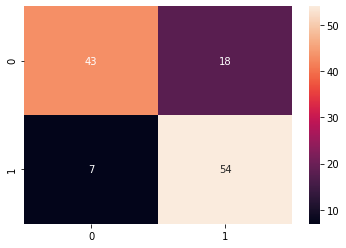

ROC AUC Score:  0.7950819672131147


In [44]:
CB = CatBoostClassifier(random_state=10)
CB.fit(X_np_train, y_np_train)
y_CB_pred = CB.predict(X_np_test)

print("Accuracy Score: ", accuracy_score(y_np_test, y_CB_pred))

cm = confusion_matrix(y_np_test, y_CB_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

print("ROC AUC Score: ", roc_auc_score(y_np_test, y_CB_pred))

## Catboost - Hyperparameter Tuning

In [45]:
params = {
    'n_estimators': range(1, 100),
    'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]
         }

gs_CB = GridSearchCV(CatBoostClassifier(random_state=10), param_grid=params, cv = kf, scoring = 'roc_auc', n_jobs = 1)
gs_CB.fit(X_np_train, y_np_train)

CB_tuned = gs_CB.best_estimator_
print("Catboost TUNED MODEL: ", CB_tuned)
scores = cross_val_score(CB_tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Catboost Classifier TUNED SCORES: ", scores)
print("Catboost Classifier Tuned Bias Error: ", 1 - np.mean(scores))
print("Catboost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

0:	learn: 0.6704169	total: 7.12ms	remaining: 0us
0:	learn: 0.6639389	total: 861us	remaining: 0us
0:	learn: 0.6692245	total: 1.23ms	remaining: 0us
0:	learn: 0.6704169	total: 885us	remaining: 885us
1:	learn: 0.6540210	total: 2.31ms	remaining: 0us
0:	learn: 0.6639389	total: 1.01ms	remaining: 1.01ms
1:	learn: 0.6429238	total: 2.56ms	remaining: 0us
0:	learn: 0.6692245	total: 1.23ms	remaining: 1.23ms
1:	learn: 0.6529226	total: 2.65ms	remaining: 0us
0:	learn: 0.6704169	total: 957us	remaining: 1.92ms
1:	learn: 0.6540210	total: 2.51ms	remaining: 1.25ms
2:	learn: 0.6373561	total: 4.26ms	remaining: 0us
0:	learn: 0.6639389	total: 1.2ms	remaining: 2.4ms
1:	learn: 0.6429238	total: 3.16ms	remaining: 1.58ms
2:	learn: 0.6221517	total: 4.93ms	remaining: 0us
0:	learn: 0.6692245	total: 1.5ms	remaining: 3ms
1:	learn: 0.6529226	total: 4.08ms	remaining: 2.04ms
2:	learn: 0.6333685	total: 5.73ms	remaining: 0us
0:	learn: 0.6704169	total: 979us	remaining: 2.94ms
1:	learn: 0.6540210	total: 2.62ms	remaining: 2.62m

0:	learn: 0.6704169	total: 1.17ms	remaining: 11.7ms
1:	learn: 0.6540210	total: 5.71ms	remaining: 25.7ms
2:	learn: 0.6373561	total: 7.44ms	remaining: 19.8ms
3:	learn: 0.6197613	total: 8.41ms	remaining: 14.7ms
4:	learn: 0.6060084	total: 9.45ms	remaining: 11.3ms
5:	learn: 0.5940762	total: 10.9ms	remaining: 9.1ms
6:	learn: 0.5821497	total: 12.5ms	remaining: 7.16ms
7:	learn: 0.5746453	total: 14.2ms	remaining: 5.34ms
8:	learn: 0.5629706	total: 16.1ms	remaining: 3.58ms
9:	learn: 0.5526404	total: 17.9ms	remaining: 1.79ms
10:	learn: 0.5458787	total: 19.5ms	remaining: 0us
0:	learn: 0.6639389	total: 892us	remaining: 8.93ms
1:	learn: 0.6429238	total: 2.4ms	remaining: 10.8ms
2:	learn: 0.6221517	total: 4.25ms	remaining: 11.3ms
3:	learn: 0.5991449	total: 5.33ms	remaining: 9.33ms
4:	learn: 0.5816033	total: 6.99ms	remaining: 8.38ms
5:	learn: 0.5694983	total: 8.76ms	remaining: 7.3ms
6:	learn: 0.5556715	total: 10.1ms	remaining: 5.76ms
7:	learn: 0.5424225	total: 11.7ms	remaining: 4.39ms
8:	learn: 0.529396

5:	learn: 0.5694983	total: 8.58ms	remaining: 12.9ms
6:	learn: 0.5556715	total: 11.1ms	remaining: 12.6ms
7:	learn: 0.5424225	total: 12.7ms	remaining: 11.1ms
8:	learn: 0.5293961	total: 14.3ms	remaining: 9.54ms
9:	learn: 0.5200990	total: 16.9ms	remaining: 8.44ms
10:	learn: 0.5099298	total: 18.6ms	remaining: 6.76ms
11:	learn: 0.5000739	total: 19.2ms	remaining: 4.8ms
12:	learn: 0.4914012	total: 20.2ms	remaining: 3.1ms
13:	learn: 0.4854483	total: 21.8ms	remaining: 1.56ms
14:	learn: 0.4812791	total: 23.5ms	remaining: 0us
0:	learn: 0.6692245	total: 1.25ms	remaining: 17.4ms
1:	learn: 0.6529226	total: 3.2ms	remaining: 20.8ms
2:	learn: 0.6333685	total: 4.41ms	remaining: 17.6ms
3:	learn: 0.6158397	total: 6.07ms	remaining: 16.7ms
4:	learn: 0.5989606	total: 7.92ms	remaining: 15.9ms
5:	learn: 0.5857181	total: 9.64ms	remaining: 14.5ms
6:	learn: 0.5742185	total: 11.2ms	remaining: 12.8ms
7:	learn: 0.5626588	total: 12.7ms	remaining: 11.1ms
8:	learn: 0.5510244	total: 13.6ms	remaining: 9.04ms
9:	learn: 0.5

0:	learn: 0.6639389	total: 1.15ms	remaining: 20.6ms
1:	learn: 0.6429238	total: 3.02ms	remaining: 25.7ms
2:	learn: 0.6221517	total: 4.55ms	remaining: 24.3ms
3:	learn: 0.5991449	total: 5.59ms	remaining: 21ms
4:	learn: 0.5816033	total: 7.3ms	remaining: 20.4ms
5:	learn: 0.5694983	total: 8.91ms	remaining: 19.3ms
6:	learn: 0.5556715	total: 10.5ms	remaining: 18ms
7:	learn: 0.5424225	total: 12.2ms	remaining: 16.8ms
8:	learn: 0.5293961	total: 13.9ms	remaining: 15.4ms
9:	learn: 0.5200990	total: 16.1ms	remaining: 14.5ms
10:	learn: 0.5099298	total: 18.7ms	remaining: 13.6ms
11:	learn: 0.5000739	total: 19.2ms	remaining: 11.2ms
12:	learn: 0.4914012	total: 20.3ms	remaining: 9.35ms
13:	learn: 0.4854483	total: 22.1ms	remaining: 7.9ms
14:	learn: 0.4812791	total: 24.1ms	remaining: 6.42ms
15:	learn: 0.4742245	total: 25.7ms	remaining: 4.82ms
16:	learn: 0.4678246	total: 27.2ms	remaining: 3.19ms
17:	learn: 0.4626476	total: 29ms	remaining: 1.61ms
18:	learn: 0.4563723	total: 30.8ms	remaining: 0us
0:	learn: 0.66

11:	learn: 0.5208988	total: 18.5ms	remaining: 15.4ms
12:	learn: 0.5127087	total: 20.2ms	remaining: 14ms
13:	learn: 0.5042470	total: 22ms	remaining: 12.6ms
14:	learn: 0.4975398	total: 22.7ms	remaining: 10.6ms
15:	learn: 0.4924483	total: 24.1ms	remaining: 9.04ms
16:	learn: 0.4852385	total: 25.8ms	remaining: 7.58ms
17:	learn: 0.4797518	total: 27.6ms	remaining: 6.12ms
18:	learn: 0.4751050	total: 29.1ms	remaining: 4.59ms
19:	learn: 0.4681391	total: 30.7ms	remaining: 3.06ms
20:	learn: 0.4630217	total: 31.9ms	remaining: 1.52ms
21:	learn: 0.4575157	total: 33.5ms	remaining: 0us
0:	learn: 0.6704169	total: 856us	remaining: 18.8ms
1:	learn: 0.6540210	total: 2.45ms	remaining: 25.8ms
2:	learn: 0.6373561	total: 3.85ms	remaining: 25.6ms
3:	learn: 0.6197613	total: 4.53ms	remaining: 21.5ms
4:	learn: 0.6060084	total: 5.83ms	remaining: 21ms
5:	learn: 0.5940762	total: 7.05ms	remaining: 20ms
6:	learn: 0.5821497	total: 8.32ms	remaining: 19ms
7:	learn: 0.5746453	total: 9.55ms	remaining: 17.9ms
8:	learn: 0.562

10:	learn: 0.5458787	total: 16.1ms	remaining: 22ms
11:	learn: 0.5373914	total: 17.1ms	remaining: 20ms
12:	learn: 0.5302402	total: 18.2ms	remaining: 18.2ms
13:	learn: 0.5247394	total: 19.9ms	remaining: 17.1ms
14:	learn: 0.5187198	total: 21.6ms	remaining: 15.8ms
15:	learn: 0.5121083	total: 23.1ms	remaining: 14.5ms
16:	learn: 0.5070710	total: 24.9ms	remaining: 13.2ms
17:	learn: 0.5018479	total: 27ms	remaining: 12ms
18:	learn: 0.4987697	total: 28.8ms	remaining: 10.6ms
19:	learn: 0.4938434	total: 30.9ms	remaining: 9.27ms
20:	learn: 0.4898468	total: 33.2ms	remaining: 7.91ms
21:	learn: 0.4854638	total: 38ms	remaining: 6.91ms
22:	learn: 0.4802706	total: 39.5ms	remaining: 5.16ms
23:	learn: 0.4770401	total: 41.5ms	remaining: 3.46ms
24:	learn: 0.4733361	total: 42.3ms	remaining: 1.69ms
25:	learn: 0.4696452	total: 44ms	remaining: 0us
0:	learn: 0.6639389	total: 891us	remaining: 22.3ms
1:	learn: 0.6429238	total: 2.24ms	remaining: 26.9ms
2:	learn: 0.6221517	total: 3.57ms	remaining: 27.3ms
3:	learn: 0.

13:	learn: 0.5247394	total: 16.5ms	remaining: 16.5ms
14:	learn: 0.5187198	total: 18.2ms	remaining: 15.8ms
15:	learn: 0.5121083	total: 20.1ms	remaining: 15.1ms
16:	learn: 0.5070710	total: 21.6ms	remaining: 14ms
17:	learn: 0.5018479	total: 23.2ms	remaining: 12.9ms
18:	learn: 0.4987697	total: 24.8ms	remaining: 11.7ms
19:	learn: 0.4938434	total: 26.9ms	remaining: 10.8ms
20:	learn: 0.4898468	total: 28.9ms	remaining: 9.62ms
21:	learn: 0.4854638	total: 30.6ms	remaining: 8.34ms
22:	learn: 0.4802706	total: 32.4ms	remaining: 7.03ms
23:	learn: 0.4770401	total: 34.1ms	remaining: 5.68ms
24:	learn: 0.4733361	total: 35.2ms	remaining: 4.23ms
25:	learn: 0.4696452	total: 36.7ms	remaining: 2.82ms
26:	learn: 0.4659761	total: 38.7ms	remaining: 1.43ms
27:	learn: 0.4623035	total: 39.9ms	remaining: 0us
0:	learn: 0.6639389	total: 911us	remaining: 24.6ms
1:	learn: 0.6429238	total: 2.37ms	remaining: 30.8ms
2:	learn: 0.6221517	total: 3.86ms	remaining: 32.2ms
3:	learn: 0.5991449	total: 4.57ms	remaining: 27.4ms
4:	

3:	learn: 0.6197613	total: 4.81ms	remaining: 31.3ms
4:	learn: 0.6060084	total: 7.43ms	remaining: 37.2ms
5:	learn: 0.5940762	total: 9.56ms	remaining: 38.2ms
6:	learn: 0.5821497	total: 11.9ms	remaining: 39ms
7:	learn: 0.5746453	total: 14.4ms	remaining: 39.7ms
8:	learn: 0.5629706	total: 16.1ms	remaining: 37.7ms
9:	learn: 0.5526404	total: 18ms	remaining: 36ms
10:	learn: 0.5458787	total: 19.6ms	remaining: 33.9ms
11:	learn: 0.5373914	total: 20.3ms	remaining: 30.4ms
12:	learn: 0.5302402	total: 21.4ms	remaining: 28ms
13:	learn: 0.5247394	total: 23.1ms	remaining: 26.4ms
14:	learn: 0.5187198	total: 24.6ms	remaining: 24.6ms
15:	learn: 0.5121083	total: 26.6ms	remaining: 23.2ms
16:	learn: 0.5070710	total: 28.1ms	remaining: 21.5ms
17:	learn: 0.5018479	total: 30ms	remaining: 20ms
18:	learn: 0.4987697	total: 31.2ms	remaining: 18.1ms
19:	learn: 0.4938434	total: 32.7ms	remaining: 16.4ms
20:	learn: 0.4898468	total: 34.2ms	remaining: 14.7ms
21:	learn: 0.4854638	total: 35.8ms	remaining: 13ms
22:	learn: 0.4

27:	learn: 0.4313947	total: 43.4ms	remaining: 4.64ms
28:	learn: 0.4275613	total: 46.6ms	remaining: 3.21ms
29:	learn: 0.4232673	total: 47.9ms	remaining: 1.6ms
30:	learn: 0.4211539	total: 48.9ms	remaining: 0us
0:	learn: 0.6704169	total: 1.02ms	remaining: 31.7ms
1:	learn: 0.6540210	total: 2.56ms	remaining: 38.4ms
2:	learn: 0.6373561	total: 3.93ms	remaining: 38ms
3:	learn: 0.6197613	total: 4.82ms	remaining: 33.7ms
4:	learn: 0.6060084	total: 6.96ms	remaining: 37.6ms
5:	learn: 0.5940762	total: 8.32ms	remaining: 36ms
6:	learn: 0.5821497	total: 9.88ms	remaining: 35.3ms
7:	learn: 0.5746453	total: 11.7ms	remaining: 35.1ms
8:	learn: 0.5629706	total: 13ms	remaining: 33.2ms
9:	learn: 0.5526404	total: 14.5ms	remaining: 32ms
10:	learn: 0.5458787	total: 16.4ms	remaining: 31.3ms
11:	learn: 0.5373914	total: 17.2ms	remaining: 28.7ms
12:	learn: 0.5302402	total: 18ms	remaining: 26.3ms
13:	learn: 0.5247394	total: 19.4ms	remaining: 24.9ms
14:	learn: 0.5187198	total: 20.7ms	remaining: 23.5ms
15:	learn: 0.5121

0:	learn: 0.6692245	total: 1.55ms	remaining: 49.7ms
1:	learn: 0.6529226	total: 3.35ms	remaining: 51.9ms
2:	learn: 0.6333685	total: 4.35ms	remaining: 43.5ms
3:	learn: 0.6158397	total: 5.73ms	remaining: 41.6ms
4:	learn: 0.5989606	total: 7.33ms	remaining: 41.1ms
5:	learn: 0.5857181	total: 9.02ms	remaining: 40.6ms
6:	learn: 0.5742185	total: 10.6ms	remaining: 39.3ms
7:	learn: 0.5626588	total: 12.3ms	remaining: 38.5ms
8:	learn: 0.5510244	total: 13.2ms	remaining: 35.2ms
9:	learn: 0.5400695	total: 15ms	remaining: 34.5ms
10:	learn: 0.5306087	total: 16.5ms	remaining: 32.9ms
11:	learn: 0.5208988	total: 17.8ms	remaining: 31.2ms
12:	learn: 0.5127087	total: 19.4ms	remaining: 29.8ms
13:	learn: 0.5042470	total: 21.1ms	remaining: 28.6ms
14:	learn: 0.4975398	total: 21.9ms	remaining: 26.3ms
15:	learn: 0.4924483	total: 23.7ms	remaining: 25.2ms
16:	learn: 0.4852385	total: 25.6ms	remaining: 24.1ms
17:	learn: 0.4797518	total: 27.2ms	remaining: 22.7ms
18:	learn: 0.4751050	total: 28.5ms	remaining: 21ms
19:	lea

2:	learn: 0.6221517	total: 5.46ms	remaining: 58.3ms
3:	learn: 0.5991449	total: 6.75ms	remaining: 52.3ms
4:	learn: 0.5816033	total: 9.15ms	remaining: 54.9ms
5:	learn: 0.5694983	total: 10.9ms	remaining: 52.9ms
6:	learn: 0.5556715	total: 12.8ms	remaining: 51.3ms
7:	learn: 0.5424225	total: 16.2ms	remaining: 54.7ms
8:	learn: 0.5293961	total: 18ms	remaining: 51.9ms
9:	learn: 0.5200990	total: 19.7ms	remaining: 49.4ms
10:	learn: 0.5099298	total: 21.6ms	remaining: 47.1ms
11:	learn: 0.5000739	total: 22.3ms	remaining: 42.7ms
12:	learn: 0.4914012	total: 23.3ms	remaining: 39.4ms
13:	learn: 0.4854483	total: 24.9ms	remaining: 37.4ms
14:	learn: 0.4812791	total: 26.4ms	remaining: 35.2ms
15:	learn: 0.4742245	total: 27.9ms	remaining: 33.1ms
16:	learn: 0.4678246	total: 29.2ms	remaining: 30.9ms
17:	learn: 0.4626476	total: 30.8ms	remaining: 29.1ms
18:	learn: 0.4563723	total: 32.4ms	remaining: 27.3ms
19:	learn: 0.4495402	total: 34.2ms	remaining: 25.7ms
20:	learn: 0.4444950	total: 36.3ms	remaining: 24.2ms
21:

0:	learn: 0.6704169	total: 1.28ms	remaining: 46.1ms
1:	learn: 0.6540210	total: 3.03ms	remaining: 53ms
2:	learn: 0.6373561	total: 4.7ms	remaining: 53.3ms
3:	learn: 0.6197613	total: 5.56ms	remaining: 45.9ms
4:	learn: 0.6060084	total: 7.21ms	remaining: 46.2ms
5:	learn: 0.5940762	total: 8.9ms	remaining: 46ms
6:	learn: 0.5821497	total: 10.3ms	remaining: 44.3ms
7:	learn: 0.5746453	total: 11.6ms	remaining: 42.1ms
8:	learn: 0.5629706	total: 13.1ms	remaining: 40.7ms
9:	learn: 0.5526404	total: 14.4ms	remaining: 38.9ms
10:	learn: 0.5458787	total: 16.1ms	remaining: 38ms
11:	learn: 0.5373914	total: 17.1ms	remaining: 35.6ms
12:	learn: 0.5302402	total: 18.1ms	remaining: 33.5ms
13:	learn: 0.5247394	total: 19.6ms	remaining: 32.2ms
14:	learn: 0.5187198	total: 21.2ms	remaining: 31.1ms
15:	learn: 0.5121083	total: 22.5ms	remaining: 29.6ms
16:	learn: 0.5070710	total: 23.9ms	remaining: 28.1ms
17:	learn: 0.5018479	total: 26.4ms	remaining: 27.8ms
18:	learn: 0.4987697	total: 28ms	remaining: 26.5ms
19:	learn: 0.

30:	learn: 0.3970150	total: 43.1ms	remaining: 9.73ms
31:	learn: 0.3931987	total: 46.1ms	remaining: 8.64ms
32:	learn: 0.3892406	total: 47.8ms	remaining: 7.24ms
33:	learn: 0.3870483	total: 49.5ms	remaining: 5.82ms
34:	learn: 0.3839869	total: 50.3ms	remaining: 4.31ms
35:	learn: 0.3805669	total: 52.2ms	remaining: 2.9ms
36:	learn: 0.3772346	total: 53.8ms	remaining: 1.45ms
37:	learn: 0.3743697	total: 55.4ms	remaining: 0us
0:	learn: 0.6692245	total: 1.16ms	remaining: 42.8ms
1:	learn: 0.6529226	total: 2.46ms	remaining: 44.4ms
2:	learn: 0.6333685	total: 3.64ms	remaining: 42.5ms
3:	learn: 0.6158397	total: 5.57ms	remaining: 47.3ms
4:	learn: 0.5989606	total: 7.25ms	remaining: 47.9ms
5:	learn: 0.5857181	total: 8.62ms	remaining: 46ms
6:	learn: 0.5742185	total: 9.89ms	remaining: 43.8ms
7:	learn: 0.5626588	total: 11.2ms	remaining: 42.1ms
8:	learn: 0.5510244	total: 12ms	remaining: 38.7ms
9:	learn: 0.5400695	total: 13.3ms	remaining: 37.2ms
10:	learn: 0.5306087	total: 14.8ms	remaining: 36.3ms
11:	learn: 

13:	learn: 0.5247394	total: 18.3ms	remaining: 33.9ms
14:	learn: 0.5187198	total: 20.9ms	remaining: 34.8ms
15:	learn: 0.5121083	total: 22.4ms	remaining: 33.6ms
16:	learn: 0.5070710	total: 24.1ms	remaining: 32.6ms
17:	learn: 0.5018479	total: 25.7ms	remaining: 31.5ms
18:	learn: 0.4987697	total: 27.6ms	remaining: 30.5ms
19:	learn: 0.4938434	total: 29.2ms	remaining: 29.2ms
20:	learn: 0.4898468	total: 30.8ms	remaining: 27.9ms
21:	learn: 0.4854638	total: 32.5ms	remaining: 26.6ms
22:	learn: 0.4802706	total: 34.1ms	remaining: 25.2ms
23:	learn: 0.4770401	total: 35.6ms	remaining: 23.7ms
24:	learn: 0.4733361	total: 36.2ms	remaining: 21.7ms
25:	learn: 0.4696452	total: 38ms	remaining: 20.5ms
26:	learn: 0.4659761	total: 39.5ms	remaining: 19ms
27:	learn: 0.4623035	total: 40.7ms	remaining: 17.4ms
28:	learn: 0.4577370	total: 42.7ms	remaining: 16.2ms
29:	learn: 0.4552448	total: 44.2ms	remaining: 14.7ms
30:	learn: 0.4503242	total: 45.9ms	remaining: 13.3ms
31:	learn: 0.4471926	total: 47.4ms	remaining: 11.8

29:	learn: 0.4016839	total: 39.5ms	remaining: 14.5ms
30:	learn: 0.3970150	total: 41.2ms	remaining: 13.3ms
31:	learn: 0.3931987	total: 44ms	remaining: 12.4ms
32:	learn: 0.3892406	total: 45.7ms	remaining: 11.1ms
33:	learn: 0.3870483	total: 47.2ms	remaining: 9.72ms
34:	learn: 0.3839869	total: 47.9ms	remaining: 8.22ms
35:	learn: 0.3805669	total: 49.5ms	remaining: 6.87ms
36:	learn: 0.3772346	total: 51.1ms	remaining: 5.52ms
37:	learn: 0.3743697	total: 52.8ms	remaining: 4.16ms
38:	learn: 0.3710544	total: 54.3ms	remaining: 2.78ms
39:	learn: 0.3673103	total: 56.3ms	remaining: 1.41ms
40:	learn: 0.3647971	total: 57.9ms	remaining: 0us
0:	learn: 0.6692245	total: 1.09ms	remaining: 43.6ms
1:	learn: 0.6529226	total: 2.32ms	remaining: 45.3ms
2:	learn: 0.6333685	total: 3.19ms	remaining: 40.4ms
3:	learn: 0.6158397	total: 4.49ms	remaining: 41.5ms
4:	learn: 0.5989606	total: 5.83ms	remaining: 42ms
5:	learn: 0.5857181	total: 7.07ms	remaining: 41.2ms
6:	learn: 0.5742185	total: 8.35ms	remaining: 40.6ms
7:	lear

18:	learn: 0.4563723	total: 23.2ms	remaining: 29.3ms
19:	learn: 0.4495402	total: 25.2ms	remaining: 29ms
20:	learn: 0.4444950	total: 28ms	remaining: 29.4ms
21:	learn: 0.4399625	total: 29.9ms	remaining: 28.5ms
22:	learn: 0.4343782	total: 31.6ms	remaining: 27.5ms
23:	learn: 0.4295468	total: 33.2ms	remaining: 26.3ms
24:	learn: 0.4241217	total: 34.8ms	remaining: 25ms
25:	learn: 0.4196014	total: 36.3ms	remaining: 23.8ms
26:	learn: 0.4148823	total: 38.1ms	remaining: 22.6ms
27:	learn: 0.4103452	total: 39.7ms	remaining: 21.3ms
28:	learn: 0.4070140	total: 40.8ms	remaining: 19.7ms
29:	learn: 0.4016839	total: 42.5ms	remaining: 18.4ms
30:	learn: 0.3970150	total: 44.1ms	remaining: 17.1ms
31:	learn: 0.3931987	total: 45.7ms	remaining: 15.7ms
32:	learn: 0.3892406	total: 47.2ms	remaining: 14.3ms
33:	learn: 0.3870483	total: 48.9ms	remaining: 12.9ms
34:	learn: 0.3839869	total: 49.8ms	remaining: 11.4ms
35:	learn: 0.3805669	total: 51.5ms	remaining: 10ms
36:	learn: 0.3772346	total: 53.2ms	remaining: 8.63ms
3

15:	learn: 0.4924483	total: 20.6ms	remaining: 36ms
16:	learn: 0.4852385	total: 23ms	remaining: 36.6ms
17:	learn: 0.4797518	total: 24.8ms	remaining: 35.8ms
18:	learn: 0.4751050	total: 26.4ms	remaining: 34.7ms
19:	learn: 0.4681391	total: 28ms	remaining: 33.6ms
20:	learn: 0.4630217	total: 29.2ms	remaining: 31.9ms
21:	learn: 0.4575157	total: 30.8ms	remaining: 30.8ms
22:	learn: 0.4503312	total: 32.5ms	remaining: 29.6ms
23:	learn: 0.4454753	total: 34.8ms	remaining: 29ms
24:	learn: 0.4423523	total: 35.5ms	remaining: 26.9ms
25:	learn: 0.4390645	total: 37.2ms	remaining: 25.7ms
26:	learn: 0.4336600	total: 38.5ms	remaining: 24.3ms
27:	learn: 0.4313947	total: 40.1ms	remaining: 22.9ms
28:	learn: 0.4275613	total: 41.8ms	remaining: 21.6ms
29:	learn: 0.4232673	total: 43.3ms	remaining: 20.2ms
30:	learn: 0.4211539	total: 44.8ms	remaining: 18.8ms
31:	learn: 0.4170070	total: 46.2ms	remaining: 17.3ms
32:	learn: 0.4141573	total: 48ms	remaining: 16ms
33:	learn: 0.4107912	total: 49.5ms	remaining: 14.6ms
34:	l

10:	learn: 0.5458787	total: 15.5ms	remaining: 49.3ms
11:	learn: 0.5373914	total: 17.2ms	remaining: 48.8ms
12:	learn: 0.5302402	total: 18.3ms	remaining: 46.3ms
13:	learn: 0.5247394	total: 19.9ms	remaining: 45.5ms
14:	learn: 0.5187198	total: 21.7ms	remaining: 44.8ms
15:	learn: 0.5121083	total: 23.4ms	remaining: 43.9ms
16:	learn: 0.5070710	total: 25.5ms	remaining: 43.5ms
17:	learn: 0.5018479	total: 27ms	remaining: 42.1ms
18:	learn: 0.4987697	total: 28.8ms	remaining: 40.9ms
19:	learn: 0.4938434	total: 30.6ms	remaining: 39.7ms
20:	learn: 0.4898468	total: 32.1ms	remaining: 38.2ms
21:	learn: 0.4854638	total: 33.8ms	remaining: 36.8ms
22:	learn: 0.4802706	total: 35.2ms	remaining: 35.2ms
23:	learn: 0.4770401	total: 36.8ms	remaining: 33.8ms
24:	learn: 0.4733361	total: 37.5ms	remaining: 31.5ms
25:	learn: 0.4696452	total: 39.3ms	remaining: 30.2ms
26:	learn: 0.4659761	total: 41.5ms	remaining: 29.2ms
27:	learn: 0.4623035	total: 42.7ms	remaining: 27.5ms
28:	learn: 0.4577370	total: 44.4ms	remaining: 26

0:	learn: 0.6639389	total: 1.18ms	remaining: 54.2ms
1:	learn: 0.6429238	total: 3.15ms	remaining: 70.8ms
2:	learn: 0.6221517	total: 4.7ms	remaining: 68.9ms
3:	learn: 0.5991449	total: 5.54ms	remaining: 59.5ms
4:	learn: 0.5816033	total: 7.19ms	remaining: 60.4ms
5:	learn: 0.5694983	total: 8.75ms	remaining: 59.8ms
6:	learn: 0.5556715	total: 10.5ms	remaining: 60.2ms
7:	learn: 0.5424225	total: 12.3ms	remaining: 59.8ms
8:	learn: 0.5293961	total: 14ms	remaining: 59.1ms
9:	learn: 0.5200990	total: 15.7ms	remaining: 58ms
10:	learn: 0.5099298	total: 17ms	remaining: 55.8ms
11:	learn: 0.5000739	total: 17.7ms	remaining: 51.8ms
12:	learn: 0.4914012	total: 18.7ms	remaining: 48.8ms
13:	learn: 0.4854483	total: 20.1ms	remaining: 47.5ms
14:	learn: 0.4812791	total: 22.1ms	remaining: 47.2ms
15:	learn: 0.4742245	total: 23.8ms	remaining: 46.2ms
16:	learn: 0.4678246	total: 24.7ms	remaining: 43.6ms
17:	learn: 0.4626476	total: 25.8ms	remaining: 41.6ms
18:	learn: 0.4563723	total: 27.3ms	remaining: 40.2ms
19:	learn:

0:	learn: 0.6692245	total: 1.48ms	remaining: 69.4ms
1:	learn: 0.6529226	total: 3.16ms	remaining: 72.8ms
2:	learn: 0.6333685	total: 4.07ms	remaining: 61ms
3:	learn: 0.6158397	total: 5.82ms	remaining: 64ms
4:	learn: 0.5989606	total: 7.92ms	remaining: 68.2ms
5:	learn: 0.5857181	total: 9.49ms	remaining: 66.4ms
6:	learn: 0.5742185	total: 11.3ms	remaining: 66.1ms
7:	learn: 0.5626588	total: 12.8ms	remaining: 64.2ms
8:	learn: 0.5510244	total: 13.7ms	remaining: 59.3ms
9:	learn: 0.5400695	total: 15.2ms	remaining: 57.9ms
10:	learn: 0.5306087	total: 16.9ms	remaining: 56.7ms
11:	learn: 0.5208988	total: 18.5ms	remaining: 55.5ms
12:	learn: 0.5127087	total: 20.2ms	remaining: 54.3ms
13:	learn: 0.5042470	total: 22ms	remaining: 53.5ms
14:	learn: 0.4975398	total: 22.5ms	remaining: 49.5ms
15:	learn: 0.4924483	total: 24.4ms	remaining: 48.8ms
16:	learn: 0.4852385	total: 25.9ms	remaining: 47.2ms
17:	learn: 0.4797518	total: 27.3ms	remaining: 45.5ms
18:	learn: 0.4751050	total: 29.8ms	remaining: 45.4ms
19:	learn

0:	learn: 0.6704169	total: 1.32ms	remaining: 64.9ms
1:	learn: 0.6540210	total: 3.1ms	remaining: 74.3ms
2:	learn: 0.6373561	total: 4.89ms	remaining: 76.6ms
3:	learn: 0.6197613	total: 5.58ms	remaining: 64.2ms
4:	learn: 0.6060084	total: 7.3ms	remaining: 65.7ms
5:	learn: 0.5940762	total: 8.82ms	remaining: 64.7ms
6:	learn: 0.5821497	total: 10.2ms	remaining: 62.7ms
7:	learn: 0.5746453	total: 12.7ms	remaining: 66.9ms
8:	learn: 0.5629706	total: 14.2ms	remaining: 64.8ms
9:	learn: 0.5526404	total: 15.8ms	remaining: 63.1ms
10:	learn: 0.5458787	total: 17.5ms	remaining: 62.1ms
11:	learn: 0.5373914	total: 18.2ms	remaining: 57.5ms
12:	learn: 0.5302402	total: 19.5ms	remaining: 55.5ms
13:	learn: 0.5247394	total: 20.9ms	remaining: 53.7ms
14:	learn: 0.5187198	total: 22.3ms	remaining: 52.1ms
15:	learn: 0.5121083	total: 23.7ms	remaining: 50.3ms
16:	learn: 0.5070710	total: 25.8ms	remaining: 50.1ms
17:	learn: 0.5018479	total: 27.2ms	remaining: 48.4ms
18:	learn: 0.4987697	total: 28.7ms	remaining: 46.9ms
19:	l

34:	learn: 0.4391766	total: 49.2ms	remaining: 22.5ms
35:	learn: 0.4365329	total: 51.3ms	remaining: 21.4ms
36:	learn: 0.4326225	total: 53.1ms	remaining: 20.1ms
37:	learn: 0.4307691	total: 54.9ms	remaining: 18.8ms
38:	learn: 0.4276377	total: 56.5ms	remaining: 17.4ms
39:	learn: 0.4240245	total: 58.2ms	remaining: 16ms
40:	learn: 0.4215999	total: 59.8ms	remaining: 14.6ms
41:	learn: 0.4194108	total: 61.5ms	remaining: 13.2ms
42:	learn: 0.4174249	total: 63.1ms	remaining: 11.7ms
43:	learn: 0.4146618	total: 64.8ms	remaining: 10.3ms
44:	learn: 0.4110367	total: 66.4ms	remaining: 8.85ms
45:	learn: 0.4083643	total: 67.9ms	remaining: 7.38ms
46:	learn: 0.4066992	total: 69.7ms	remaining: 5.93ms
47:	learn: 0.4040692	total: 71.4ms	remaining: 4.46ms
48:	learn: 0.4020383	total: 72.9ms	remaining: 2.97ms
49:	learn: 0.3986068	total: 75.3ms	remaining: 1.5ms
50:	learn: 0.3963319	total: 76.9ms	remaining: 0us
0:	learn: 0.6639389	total: 972us	remaining: 48.6ms
1:	learn: 0.6429238	total: 2.25ms	remaining: 55.1ms
2:

0:	learn: 0.6639389	total: 1.26ms	remaining: 64.6ms
1:	learn: 0.6429238	total: 3.16ms	remaining: 78.9ms
2:	learn: 0.6221517	total: 4.75ms	remaining: 77.7ms
3:	learn: 0.5991449	total: 5.55ms	remaining: 66.7ms
4:	learn: 0.5816033	total: 7.04ms	remaining: 66.2ms
5:	learn: 0.5694983	total: 8.82ms	remaining: 67.6ms
6:	learn: 0.5556715	total: 10.5ms	remaining: 67.3ms
7:	learn: 0.5424225	total: 12.2ms	remaining: 67.2ms
8:	learn: 0.5293961	total: 16.1ms	remaining: 77ms
9:	learn: 0.5200990	total: 17.7ms	remaining: 74.5ms
10:	learn: 0.5099298	total: 19.6ms	remaining: 72.9ms
11:	learn: 0.5000739	total: 20.1ms	remaining: 67.1ms
12:	learn: 0.4914012	total: 21.2ms	remaining: 63.5ms
13:	learn: 0.4854483	total: 22.5ms	remaining: 61.1ms
14:	learn: 0.4812791	total: 24.1ms	remaining: 59.3ms
15:	learn: 0.4742245	total: 26.7ms	remaining: 60.1ms
16:	learn: 0.4678246	total: 27.9ms	remaining: 57.4ms
17:	learn: 0.4626476	total: 30ms	remaining: 56.7ms
18:	learn: 0.4563723	total: 32.3ms	remaining: 56.1ms
19:	lea

25:	learn: 0.4196014	total: 38.6ms	remaining: 40.1ms
26:	learn: 0.4148823	total: 41.6ms	remaining: 40.1ms
27:	learn: 0.4103452	total: 43.6ms	remaining: 39ms
28:	learn: 0.4070140	total: 44.5ms	remaining: 36.9ms
29:	learn: 0.4016839	total: 47.1ms	remaining: 36.1ms
30:	learn: 0.3970150	total: 49.3ms	remaining: 35ms
31:	learn: 0.3931987	total: 51.6ms	remaining: 33.8ms
32:	learn: 0.3892406	total: 53.4ms	remaining: 32.4ms
33:	learn: 0.3870483	total: 55.4ms	remaining: 31ms
34:	learn: 0.3839869	total: 56.5ms	remaining: 29ms
35:	learn: 0.3805669	total: 58.4ms	remaining: 27.6ms
36:	learn: 0.3772346	total: 60.2ms	remaining: 26ms
37:	learn: 0.3743697	total: 61.8ms	remaining: 24.4ms
38:	learn: 0.3710544	total: 63.4ms	remaining: 22.7ms
39:	learn: 0.3673103	total: 65.5ms	remaining: 21.3ms
40:	learn: 0.3647971	total: 67.2ms	remaining: 19.7ms
41:	learn: 0.3628521	total: 68.5ms	remaining: 17.9ms
42:	learn: 0.3599610	total: 69.9ms	remaining: 16.3ms
43:	learn: 0.3571971	total: 71.4ms	remaining: 14.6ms
44:

46:	learn: 0.3494162	total: 67ms	remaining: 9.97ms
47:	learn: 0.3469391	total: 70.1ms	remaining: 8.76ms
48:	learn: 0.3442809	total: 71.8ms	remaining: 7.33ms
49:	learn: 0.3422805	total: 73.6ms	remaining: 5.88ms
50:	learn: 0.3394214	total: 75.3ms	remaining: 4.43ms
51:	learn: 0.3375874	total: 77.2ms	remaining: 2.97ms
52:	learn: 0.3352205	total: 78.9ms	remaining: 1.49ms
53:	learn: 0.3335114	total: 80.7ms	remaining: 0us
0:	learn: 0.6692245	total: 1.13ms	remaining: 59.8ms
1:	learn: 0.6529226	total: 2.65ms	remaining: 69ms
2:	learn: 0.6333685	total: 4.26ms	remaining: 72.5ms
3:	learn: 0.6158397	total: 5.65ms	remaining: 70.6ms
4:	learn: 0.5989606	total: 7.64ms	remaining: 74.8ms
5:	learn: 0.5857181	total: 9.28ms	remaining: 74.2ms
6:	learn: 0.5742185	total: 11ms	remaining: 73.8ms
7:	learn: 0.5626588	total: 12.5ms	remaining: 71.6ms
8:	learn: 0.5510244	total: 13.7ms	remaining: 68.3ms
9:	learn: 0.5400695	total: 15.4ms	remaining: 67.8ms
10:	learn: 0.5306087	total: 17.1ms	remaining: 66.9ms
11:	learn: 0

0:	learn: 0.6692245	total: 1.48ms	remaining: 79.9ms
1:	learn: 0.6529226	total: 3.24ms	remaining: 86ms
2:	learn: 0.6333685	total: 4.26ms	remaining: 73.9ms
3:	learn: 0.6158397	total: 5.97ms	remaining: 76.1ms
4:	learn: 0.5989606	total: 7.61ms	remaining: 76.1ms
5:	learn: 0.5857181	total: 9.29ms	remaining: 75.9ms
6:	learn: 0.5742185	total: 11.1ms	remaining: 75.8ms
7:	learn: 0.5626588	total: 12.8ms	remaining: 75.1ms
8:	learn: 0.5510244	total: 13.6ms	remaining: 69.3ms
9:	learn: 0.5400695	total: 14.9ms	remaining: 67.1ms
10:	learn: 0.5306087	total: 16.4ms	remaining: 65.6ms
11:	learn: 0.5208988	total: 18ms	remaining: 64.4ms
12:	learn: 0.5127087	total: 19.4ms	remaining: 62.5ms
13:	learn: 0.5042470	total: 20.8ms	remaining: 61ms
14:	learn: 0.4975398	total: 21.7ms	remaining: 57.7ms
15:	learn: 0.4924483	total: 23.3ms	remaining: 56.7ms
16:	learn: 0.4852385	total: 25.1ms	remaining: 56.1ms
17:	learn: 0.4797518	total: 27ms	remaining: 55.4ms
18:	learn: 0.4751050	total: 28.6ms	remaining: 54.1ms
19:	learn: 

18:	learn: 0.4751050	total: 29.5ms	remaining: 57.4ms
19:	learn: 0.4681391	total: 31.7ms	remaining: 57.1ms
20:	learn: 0.4630217	total: 33.5ms	remaining: 55.8ms
21:	learn: 0.4575157	total: 35.3ms	remaining: 54.6ms
22:	learn: 0.4503312	total: 37.6ms	remaining: 53.9ms
23:	learn: 0.4454753	total: 39.4ms	remaining: 52.5ms
24:	learn: 0.4423523	total: 40.1ms	remaining: 49.7ms
25:	learn: 0.4390645	total: 42.2ms	remaining: 48.7ms
26:	learn: 0.4336600	total: 44.2ms	remaining: 47.4ms
27:	learn: 0.4313947	total: 46.1ms	remaining: 46.1ms
28:	learn: 0.4275613	total: 47.8ms	remaining: 44.5ms
29:	learn: 0.4232673	total: 49.5ms	remaining: 42.9ms
30:	learn: 0.4211539	total: 50.5ms	remaining: 40.7ms
31:	learn: 0.4170070	total: 51.9ms	remaining: 38.9ms
32:	learn: 0.4141573	total: 53ms	remaining: 36.9ms
33:	learn: 0.4107912	total: 54.4ms	remaining: 35.2ms
34:	learn: 0.4078444	total: 56.7ms	remaining: 34ms
35:	learn: 0.4057112	total: 58.3ms	remaining: 32.4ms
36:	learn: 0.4011407	total: 59.8ms	remaining: 30.7

22:	learn: 0.4503312	total: 33.6ms	remaining: 49.6ms
23:	learn: 0.4454753	total: 37.1ms	remaining: 51ms
24:	learn: 0.4423523	total: 38.2ms	remaining: 48.9ms
25:	learn: 0.4390645	total: 40.4ms	remaining: 48.1ms
26:	learn: 0.4336600	total: 42.4ms	remaining: 47.1ms
27:	learn: 0.4313947	total: 44.2ms	remaining: 45.8ms
28:	learn: 0.4275613	total: 46ms	remaining: 44.4ms
29:	learn: 0.4232673	total: 47.6ms	remaining: 42.8ms
30:	learn: 0.4211539	total: 48.7ms	remaining: 40.8ms
31:	learn: 0.4170070	total: 49.9ms	remaining: 39ms
32:	learn: 0.4141573	total: 51.3ms	remaining: 37.3ms
33:	learn: 0.4107912	total: 53.1ms	remaining: 35.9ms
34:	learn: 0.4078444	total: 54.8ms	remaining: 34.4ms
35:	learn: 0.4057112	total: 56.4ms	remaining: 32.9ms
36:	learn: 0.4011407	total: 57.9ms	remaining: 31.3ms
37:	learn: 0.3973830	total: 59.4ms	remaining: 29.7ms
38:	learn: 0.3939886	total: 61.7ms	remaining: 28.5ms
39:	learn: 0.3909089	total: 63.3ms	remaining: 26.9ms
40:	learn: 0.3881395	total: 64.9ms	remaining: 25.3ms

36:	learn: 0.4011407	total: 53ms	remaining: 30.1ms
37:	learn: 0.3973830	total: 55ms	remaining: 28.9ms
38:	learn: 0.3939886	total: 57ms	remaining: 27.8ms
39:	learn: 0.3909089	total: 58.7ms	remaining: 26.4ms
40:	learn: 0.3881395	total: 60.4ms	remaining: 25.1ms
41:	learn: 0.3863488	total: 61.6ms	remaining: 23.5ms
42:	learn: 0.3825721	total: 63.2ms	remaining: 22.1ms
43:	learn: 0.3802648	total: 64.8ms	remaining: 20.6ms
44:	learn: 0.3770780	total: 66.5ms	remaining: 19.2ms
45:	learn: 0.3756477	total: 68.7ms	remaining: 17.9ms
46:	learn: 0.3726462	total: 70.3ms	remaining: 16.5ms
47:	learn: 0.3699107	total: 71.9ms	remaining: 15ms
48:	learn: 0.3678369	total: 73.7ms	remaining: 13.5ms
49:	learn: 0.3656189	total: 75.3ms	remaining: 12.1ms
50:	learn: 0.3628542	total: 77ms	remaining: 10.6ms
51:	learn: 0.3610221	total: 78.9ms	remaining: 9.1ms
52:	learn: 0.3575462	total: 80.9ms	remaining: 7.63ms
53:	learn: 0.3554051	total: 82.4ms	remaining: 6.11ms
54:	learn: 0.3525771	total: 83.9ms	remaining: 4.58ms
55:	

42:	learn: 0.3825721	total: 60.1ms	remaining: 22.4ms
43:	learn: 0.3802648	total: 62.9ms	remaining: 21.4ms
44:	learn: 0.3770780	total: 64.6ms	remaining: 20.1ms
45:	learn: 0.3756477	total: 66.1ms	remaining: 18.7ms
46:	learn: 0.3726462	total: 67.7ms	remaining: 17.3ms
47:	learn: 0.3699107	total: 69.2ms	remaining: 15.8ms
48:	learn: 0.3678369	total: 70.8ms	remaining: 14.4ms
49:	learn: 0.3656189	total: 72.5ms	remaining: 13.1ms
50:	learn: 0.3628542	total: 74.2ms	remaining: 11.6ms
51:	learn: 0.3610221	total: 75.8ms	remaining: 10.2ms
52:	learn: 0.3575462	total: 77.5ms	remaining: 8.77ms
53:	learn: 0.3554051	total: 79ms	remaining: 7.31ms
54:	learn: 0.3525771	total: 80.4ms	remaining: 5.85ms
55:	learn: 0.3491021	total: 82ms	remaining: 4.39ms
56:	learn: 0.3466285	total: 83.4ms	remaining: 2.93ms
57:	learn: 0.3442143	total: 85.7ms	remaining: 1.48ms
58:	learn: 0.3414766	total: 87.2ms	remaining: 0us
0:	learn: 0.6704169	total: 814us	remaining: 48ms
1:	learn: 0.6540210	total: 2.06ms	remaining: 59.8ms
2:	le

44:	learn: 0.3770780	total: 62.4ms	remaining: 20.8ms
45:	learn: 0.3756477	total: 64.6ms	remaining: 19.7ms
46:	learn: 0.3726462	total: 66.5ms	remaining: 18.4ms
47:	learn: 0.3699107	total: 68ms	remaining: 17ms
48:	learn: 0.3678369	total: 69.5ms	remaining: 15.6ms
49:	learn: 0.3656189	total: 71.4ms	remaining: 14.3ms
50:	learn: 0.3628542	total: 73ms	remaining: 12.9ms
51:	learn: 0.3610221	total: 74.9ms	remaining: 11.5ms
52:	learn: 0.3575462	total: 76.5ms	remaining: 10.1ms
53:	learn: 0.3554051	total: 78.1ms	remaining: 8.67ms
54:	learn: 0.3525771	total: 79.6ms	remaining: 7.23ms
55:	learn: 0.3491021	total: 81.5ms	remaining: 5.82ms
56:	learn: 0.3466285	total: 83ms	remaining: 4.37ms
57:	learn: 0.3442143	total: 84.5ms	remaining: 2.91ms
58:	learn: 0.3414766	total: 86.5ms	remaining: 1.47ms
59:	learn: 0.3389855	total: 87.9ms	remaining: 0us
0:	learn: 0.6704169	total: 873us	remaining: 52.4ms
1:	learn: 0.6540210	total: 2.26ms	remaining: 66.7ms
2:	learn: 0.6373561	total: 3.88ms	remaining: 75.1ms
3:	learn

40:	learn: 0.3881395	total: 62.1ms	remaining: 30.3ms
41:	learn: 0.3863488	total: 64.8ms	remaining: 29.3ms
42:	learn: 0.3825721	total: 66.9ms	remaining: 28ms
43:	learn: 0.3802648	total: 68.5ms	remaining: 26.5ms
44:	learn: 0.3770780	total: 70.2ms	remaining: 25ms
45:	learn: 0.3756477	total: 71.9ms	remaining: 23.4ms
46:	learn: 0.3726462	total: 73.6ms	remaining: 21.9ms
47:	learn: 0.3699107	total: 75.3ms	remaining: 20.4ms
48:	learn: 0.3678369	total: 77ms	remaining: 18.8ms
49:	learn: 0.3656189	total: 78.5ms	remaining: 17.3ms
50:	learn: 0.3628542	total: 80.3ms	remaining: 15.7ms
51:	learn: 0.3610221	total: 81.7ms	remaining: 14.1ms
52:	learn: 0.3575462	total: 83.3ms	remaining: 12.6ms
53:	learn: 0.3554051	total: 84.8ms	remaining: 11ms
54:	learn: 0.3525771	total: 86.3ms	remaining: 9.41ms
55:	learn: 0.3491021	total: 88.8ms	remaining: 7.93ms
56:	learn: 0.3466285	total: 90.5ms	remaining: 6.35ms
57:	learn: 0.3442143	total: 92.1ms	remaining: 4.76ms
58:	learn: 0.3414766	total: 93.9ms	remaining: 3.18ms
5

33:	learn: 0.4107912	total: 48.6ms	remaining: 40ms
34:	learn: 0.4078444	total: 52.8ms	remaining: 40.7ms
35:	learn: 0.4057112	total: 54.5ms	remaining: 39.3ms
36:	learn: 0.4011407	total: 56.2ms	remaining: 38ms
37:	learn: 0.3973830	total: 58ms	remaining: 36.7ms
38:	learn: 0.3939886	total: 59.5ms	remaining: 35.1ms
39:	learn: 0.3909089	total: 61.2ms	remaining: 33.7ms
40:	learn: 0.3881395	total: 62.8ms	remaining: 32.2ms
41:	learn: 0.3863488	total: 64.3ms	remaining: 30.6ms
42:	learn: 0.3825721	total: 65.9ms	remaining: 29.1ms
43:	learn: 0.3802648	total: 67.9ms	remaining: 27.8ms
44:	learn: 0.3770780	total: 69.6ms	remaining: 26.3ms
45:	learn: 0.3756477	total: 71.3ms	remaining: 24.8ms
46:	learn: 0.3726462	total: 72.9ms	remaining: 23.3ms
47:	learn: 0.3699107	total: 75ms	remaining: 21.9ms
48:	learn: 0.3678369	total: 76.8ms	remaining: 20.4ms
49:	learn: 0.3656189	total: 78.4ms	remaining: 18.8ms
50:	learn: 0.3628542	total: 79.9ms	remaining: 17.2ms
51:	learn: 0.3610221	total: 81.3ms	remaining: 15.6ms
5

33:	learn: 0.4107912	total: 48.9ms	remaining: 41.7ms
34:	learn: 0.4078444	total: 53.1ms	remaining: 42.5ms
35:	learn: 0.4057112	total: 54.9ms	remaining: 41.2ms
36:	learn: 0.4011407	total: 56.7ms	remaining: 39.8ms
37:	learn: 0.3973830	total: 59.1ms	remaining: 38.9ms
38:	learn: 0.3939886	total: 60.9ms	remaining: 37.5ms
39:	learn: 0.3909089	total: 62.9ms	remaining: 36.1ms
40:	learn: 0.3881395	total: 64.6ms	remaining: 34.7ms
41:	learn: 0.3863488	total: 65.8ms	remaining: 32.9ms
42:	learn: 0.3825721	total: 67.5ms	remaining: 31.4ms
43:	learn: 0.3802648	total: 69ms	remaining: 29.8ms
44:	learn: 0.3770780	total: 70.8ms	remaining: 28.3ms
45:	learn: 0.3756477	total: 72.4ms	remaining: 26.7ms
46:	learn: 0.3726462	total: 73.8ms	remaining: 25.1ms
47:	learn: 0.3699107	total: 76.1ms	remaining: 23.8ms
48:	learn: 0.3678369	total: 77.4ms	remaining: 22.1ms
49:	learn: 0.3656189	total: 79ms	remaining: 20.5ms
50:	learn: 0.3628542	total: 80.8ms	remaining: 19ms
51:	learn: 0.3610221	total: 82.5ms	remaining: 17.5ms

35:	learn: 0.4057112	total: 47.2ms	remaining: 36.7ms
36:	learn: 0.4011407	total: 50.5ms	remaining: 36.8ms
37:	learn: 0.3973830	total: 52.1ms	remaining: 35.6ms
38:	learn: 0.3939886	total: 53.7ms	remaining: 34.4ms
39:	learn: 0.3909089	total: 55.5ms	remaining: 33.3ms
40:	learn: 0.3881395	total: 57.5ms	remaining: 32.3ms
41:	learn: 0.3863488	total: 58.9ms	remaining: 30.9ms
42:	learn: 0.3825721	total: 60.6ms	remaining: 29.6ms
43:	learn: 0.3802648	total: 62.4ms	remaining: 28.4ms
44:	learn: 0.3770780	total: 64.1ms	remaining: 27.1ms
45:	learn: 0.3756477	total: 65.7ms	remaining: 25.7ms
46:	learn: 0.3726462	total: 67.2ms	remaining: 24.3ms
47:	learn: 0.3699107	total: 68.6ms	remaining: 22.9ms
48:	learn: 0.3678369	total: 70.1ms	remaining: 21.5ms
49:	learn: 0.3656189	total: 71.8ms	remaining: 20.1ms
50:	learn: 0.3628542	total: 73.4ms	remaining: 18.7ms
51:	learn: 0.3610221	total: 74.9ms	remaining: 17.3ms
52:	learn: 0.3575462	total: 76.6ms	remaining: 15.9ms
53:	learn: 0.3554051	total: 77.9ms	remaining: 

31:	learn: 0.4170070	total: 46.1ms	remaining: 47.5ms
32:	learn: 0.4141573	total: 47.9ms	remaining: 46.4ms
33:	learn: 0.4107912	total: 50ms	remaining: 45.6ms
34:	learn: 0.4078444	total: 51.6ms	remaining: 44.3ms
35:	learn: 0.4057112	total: 53.4ms	remaining: 43ms
36:	learn: 0.4011407	total: 55ms	remaining: 41.6ms
37:	learn: 0.3973830	total: 56.8ms	remaining: 40.3ms
38:	learn: 0.3939886	total: 58.4ms	remaining: 39ms
39:	learn: 0.3909089	total: 60.1ms	remaining: 37.6ms
40:	learn: 0.3881395	total: 61.8ms	remaining: 36.2ms
41:	learn: 0.3863488	total: 63.1ms	remaining: 34.6ms
42:	learn: 0.3825721	total: 64.9ms	remaining: 33.2ms
43:	learn: 0.3802648	total: 66.4ms	remaining: 31.7ms
44:	learn: 0.3770780	total: 68ms	remaining: 30.2ms
45:	learn: 0.3756477	total: 69.5ms	remaining: 28.7ms
46:	learn: 0.3726462	total: 71.1ms	remaining: 27.2ms
47:	learn: 0.3699107	total: 73.1ms	remaining: 25.9ms
48:	learn: 0.3678369	total: 75ms	remaining: 24.5ms
49:	learn: 0.3656189	total: 77.9ms	remaining: 23.4ms
50:	l

11:	learn: 0.5208988	total: 17.7ms	remaining: 79.8ms
12:	learn: 0.5127087	total: 19.5ms	remaining: 79.5ms
13:	learn: 0.5042470	total: 21.7ms	remaining: 80.5ms
14:	learn: 0.4975398	total: 22.3ms	remaining: 75.8ms
15:	learn: 0.4924483	total: 23.9ms	remaining: 74.8ms
16:	learn: 0.4852385	total: 25.4ms	remaining: 73.3ms
17:	learn: 0.4797518	total: 27ms	remaining: 71.9ms
18:	learn: 0.4751050	total: 28.6ms	remaining: 70.8ms
19:	learn: 0.4681391	total: 30.3ms	remaining: 69.6ms
20:	learn: 0.4630217	total: 31.3ms	remaining: 67ms
21:	learn: 0.4575157	total: 32.8ms	remaining: 65.6ms
22:	learn: 0.4503312	total: 34.9ms	remaining: 65.2ms
23:	learn: 0.4454753	total: 36.6ms	remaining: 64ms
24:	learn: 0.4423523	total: 37.4ms	remaining: 61.4ms
25:	learn: 0.4390645	total: 38.9ms	remaining: 59.9ms
26:	learn: 0.4336600	total: 40.4ms	remaining: 58.3ms
27:	learn: 0.4313947	total: 41.8ms	remaining: 56.7ms
28:	learn: 0.4275613	total: 43.3ms	remaining: 55.2ms
29:	learn: 0.4232673	total: 45.5ms	remaining: 54.6ms

0:	learn: 0.6692245	total: 1.35ms	remaining: 89.3ms
1:	learn: 0.6529226	total: 3.23ms	remaining: 105ms
2:	learn: 0.6333685	total: 4.2ms	remaining: 89.5ms
3:	learn: 0.6158397	total: 5.83ms	remaining: 91.9ms
4:	learn: 0.5989606	total: 7.33ms	remaining: 90.8ms
5:	learn: 0.5857181	total: 9.08ms	remaining: 92.3ms
6:	learn: 0.5742185	total: 11.3ms	remaining: 96.5ms
7:	learn: 0.5626588	total: 12.8ms	remaining: 94.2ms
8:	learn: 0.5510244	total: 13.9ms	remaining: 89.4ms
9:	learn: 0.5400695	total: 15.7ms	remaining: 89.7ms
10:	learn: 0.5306087	total: 17.4ms	remaining: 88.5ms
11:	learn: 0.5208988	total: 19.1ms	remaining: 87.7ms
12:	learn: 0.5127087	total: 20.6ms	remaining: 85.7ms
13:	learn: 0.5042470	total: 22.5ms	remaining: 85.1ms
14:	learn: 0.4975398	total: 23.2ms	remaining: 80.5ms
15:	learn: 0.4924483	total: 25ms	remaining: 79.8ms
16:	learn: 0.4852385	total: 26.7ms	remaining: 78.4ms
17:	learn: 0.4797518	total: 28.2ms	remaining: 76.9ms
18:	learn: 0.4751050	total: 29.8ms	remaining: 75.4ms
19:	lea

60:	learn: 0.3171103	total: 87.1ms	remaining: 10ms
61:	learn: 0.3155764	total: 89.8ms	remaining: 8.69ms
62:	learn: 0.3135994	total: 91.3ms	remaining: 7.24ms
63:	learn: 0.3124136	total: 93.2ms	remaining: 5.82ms
64:	learn: 0.3106703	total: 95.1ms	remaining: 4.39ms
65:	learn: 0.3076887	total: 96.8ms	remaining: 2.93ms
66:	learn: 0.3056432	total: 98.6ms	remaining: 1.47ms
67:	learn: 0.3032799	total: 100ms	remaining: 0us
0:	learn: 0.6692245	total: 1.25ms	remaining: 83.9ms
1:	learn: 0.6529226	total: 2.85ms	remaining: 94.1ms
2:	learn: 0.6333685	total: 3.85ms	remaining: 83.5ms
3:	learn: 0.6158397	total: 5.34ms	remaining: 85.4ms
4:	learn: 0.5989606	total: 6.89ms	remaining: 86.9ms
5:	learn: 0.5857181	total: 8.55ms	remaining: 88.3ms
6:	learn: 0.5742185	total: 10.4ms	remaining: 90.8ms
7:	learn: 0.5626588	total: 11.9ms	remaining: 89.6ms
8:	learn: 0.5510244	total: 13ms	remaining: 85.3ms
9:	learn: 0.5400695	total: 14.4ms	remaining: 83.7ms
10:	learn: 0.5306087	total: 16.6ms	remaining: 85.8ms
11:	learn: 

35:	learn: 0.3805669	total: 50.9ms	remaining: 46.7ms
36:	learn: 0.3772346	total: 52.7ms	remaining: 45.6ms
37:	learn: 0.3743697	total: 55.2ms	remaining: 45ms
38:	learn: 0.3710544	total: 56.6ms	remaining: 43.5ms
39:	learn: 0.3673103	total: 58.3ms	remaining: 42.3ms
40:	learn: 0.3647971	total: 59.9ms	remaining: 40.9ms
41:	learn: 0.3628521	total: 61.4ms	remaining: 39.5ms
42:	learn: 0.3599610	total: 63ms	remaining: 38.1ms
43:	learn: 0.3571971	total: 64.6ms	remaining: 36.7ms
44:	learn: 0.3543681	total: 66.2ms	remaining: 35.3ms
45:	learn: 0.3523819	total: 68.1ms	remaining: 34.1ms
46:	learn: 0.3494162	total: 69.8ms	remaining: 32.7ms
47:	learn: 0.3469391	total: 71.4ms	remaining: 31.2ms
48:	learn: 0.3442809	total: 73ms	remaining: 29.8ms
49:	learn: 0.3422805	total: 74.8ms	remaining: 28.4ms
50:	learn: 0.3394214	total: 76.1ms	remaining: 26.8ms
51:	learn: 0.3375874	total: 77.7ms	remaining: 25.4ms
52:	learn: 0.3352205	total: 79.3ms	remaining: 23.9ms
53:	learn: 0.3335114	total: 81ms	remaining: 22.5ms
5

8:	learn: 0.5293961	total: 14.5ms	remaining: 98.2ms
9:	learn: 0.5200990	total: 16.8ms	remaining: 101ms
10:	learn: 0.5099298	total: 18.3ms	remaining: 98.3ms
11:	learn: 0.5000739	total: 18.9ms	remaining: 91.5ms
12:	learn: 0.4914012	total: 19.9ms	remaining: 87.1ms
13:	learn: 0.4854483	total: 21.6ms	remaining: 86.3ms
14:	learn: 0.4812791	total: 23.4ms	remaining: 85.7ms
15:	learn: 0.4742245	total: 25.1ms	remaining: 84.7ms
16:	learn: 0.4678246	total: 26.2ms	remaining: 81.7ms
17:	learn: 0.4626476	total: 27.9ms	remaining: 80.5ms
18:	learn: 0.4563723	total: 29.4ms	remaining: 79ms
19:	learn: 0.4495402	total: 31.1ms	remaining: 77.6ms
20:	learn: 0.4444950	total: 32.7ms	remaining: 76.3ms
21:	learn: 0.4399625	total: 34.5ms	remaining: 75.3ms
22:	learn: 0.4343782	total: 36ms	remaining: 73.5ms
23:	learn: 0.4295468	total: 37.5ms	remaining: 71.9ms
24:	learn: 0.4241217	total: 39.1ms	remaining: 70.4ms
25:	learn: 0.4196014	total: 41.6ms	remaining: 70.4ms
26:	learn: 0.4148823	total: 43.1ms	remaining: 68.7ms


66:	learn: 0.3562486	total: 87.7ms	remaining: 5.24ms
67:	learn: 0.3546744	total: 89.8ms	remaining: 3.96ms
68:	learn: 0.3535035	total: 91.2ms	remaining: 2.64ms
69:	learn: 0.3512779	total: 92.4ms	remaining: 1.32ms
70:	learn: 0.3496132	total: 93.6ms	remaining: 0us
0:	learn: 0.6639389	total: 930us	remaining: 65.1ms
1:	learn: 0.6429238	total: 2.32ms	remaining: 80.1ms
2:	learn: 0.6221517	total: 4.68ms	remaining: 106ms
3:	learn: 0.5991449	total: 5.39ms	remaining: 90.3ms
4:	learn: 0.5816033	total: 6.89ms	remaining: 90.9ms
5:	learn: 0.5694983	total: 8.27ms	remaining: 89.6ms
6:	learn: 0.5556715	total: 9.78ms	remaining: 89.4ms
7:	learn: 0.5424225	total: 11.4ms	remaining: 89.9ms
8:	learn: 0.5293961	total: 12.9ms	remaining: 88.8ms
9:	learn: 0.5200990	total: 14.6ms	remaining: 88.8ms
10:	learn: 0.5099298	total: 15.8ms	remaining: 86.1ms
11:	learn: 0.5000739	total: 16.5ms	remaining: 81.1ms
12:	learn: 0.4914012	total: 18.4ms	remaining: 82.2ms
13:	learn: 0.4854483	total: 20ms	remaining: 81.5ms
14:	learn:

29:	learn: 0.4552448	total: 42.4ms	remaining: 59.4ms
30:	learn: 0.4503242	total: 45.3ms	remaining: 59.9ms
31:	learn: 0.4471926	total: 47.2ms	remaining: 58.9ms
32:	learn: 0.4446963	total: 48.8ms	remaining: 57.7ms
33:	learn: 0.4417194	total: 50.5ms	remaining: 56.4ms
34:	learn: 0.4391766	total: 51.6ms	remaining: 54.5ms
35:	learn: 0.4365329	total: 53.2ms	remaining: 53.2ms
36:	learn: 0.4326225	total: 55ms	remaining: 52ms
37:	learn: 0.4307691	total: 56.8ms	remaining: 50.8ms
38:	learn: 0.4276377	total: 58.6ms	remaining: 49.6ms
39:	learn: 0.4240245	total: 60.6ms	remaining: 48.4ms
40:	learn: 0.4215999	total: 62.1ms	remaining: 46.9ms
41:	learn: 0.4194108	total: 63.8ms	remaining: 45.5ms
42:	learn: 0.4174249	total: 65.3ms	remaining: 44ms
43:	learn: 0.4146618	total: 67.3ms	remaining: 42.8ms
44:	learn: 0.4110367	total: 69ms	remaining: 41.4ms
45:	learn: 0.4083643	total: 70.4ms	remaining: 39.8ms
46:	learn: 0.4066992	total: 71.8ms	remaining: 38.2ms
47:	learn: 0.4040692	total: 73.3ms	remaining: 36.6ms
4

50:	learn: 0.3628542	total: 74.2ms	remaining: 30.6ms
51:	learn: 0.3610221	total: 76.4ms	remaining: 29.4ms
52:	learn: 0.3575462	total: 78ms	remaining: 28ms
53:	learn: 0.3554051	total: 79.5ms	remaining: 26.5ms
54:	learn: 0.3525771	total: 81.1ms	remaining: 25.1ms
55:	learn: 0.3491021	total: 82.7ms	remaining: 23.6ms
56:	learn: 0.3466285	total: 84.4ms	remaining: 22.2ms
57:	learn: 0.3442143	total: 86ms	remaining: 20.8ms
58:	learn: 0.3414766	total: 87.7ms	remaining: 19.3ms
59:	learn: 0.3389855	total: 90ms	remaining: 18ms
60:	learn: 0.3368915	total: 91.6ms	remaining: 16.5ms
61:	learn: 0.3340344	total: 93.2ms	remaining: 15ms
62:	learn: 0.3330010	total: 94.8ms	remaining: 13.5ms
63:	learn: 0.3315563	total: 96.3ms	remaining: 12ms
64:	learn: 0.3285567	total: 97.8ms	remaining: 10.5ms
65:	learn: 0.3261637	total: 99.9ms	remaining: 9.08ms
66:	learn: 0.3242747	total: 102ms	remaining: 7.62ms
67:	learn: 0.3222070	total: 104ms	remaining: 6.09ms
68:	learn: 0.3204983	total: 105ms	remaining: 4.57ms
69:	learn:

0:	learn: 0.6692245	total: 1.76ms	remaining: 127ms
1:	learn: 0.6529226	total: 4.12ms	remaining: 146ms
2:	learn: 0.6333685	total: 5.16ms	remaining: 120ms
3:	learn: 0.6158397	total: 6.85ms	remaining: 118ms
4:	learn: 0.5989606	total: 8.71ms	remaining: 118ms
5:	learn: 0.5857181	total: 10.5ms	remaining: 117ms
6:	learn: 0.5742185	total: 12.2ms	remaining: 115ms
7:	learn: 0.5626588	total: 13.8ms	remaining: 112ms
8:	learn: 0.5510244	total: 14.6ms	remaining: 104ms
9:	learn: 0.5400695	total: 16.6ms	remaining: 104ms
10:	learn: 0.5306087	total: 18.2ms	remaining: 103ms
11:	learn: 0.5208988	total: 19.6ms	remaining: 99.8ms
12:	learn: 0.5127087	total: 21.4ms	remaining: 98.8ms
13:	learn: 0.5042470	total: 22.9ms	remaining: 96.4ms
14:	learn: 0.4975398	total: 23.6ms	remaining: 91.2ms
15:	learn: 0.4924483	total: 25.8ms	remaining: 91.9ms
16:	learn: 0.4852385	total: 27.5ms	remaining: 90.5ms
17:	learn: 0.4797518	total: 29.5ms	remaining: 90.2ms
18:	learn: 0.4751050	total: 31.3ms	remaining: 88.9ms
19:	learn: 0.4

44:	learn: 0.3543681	total: 65.3ms	remaining: 42.1ms
45:	learn: 0.3523819	total: 68.2ms	remaining: 41.5ms
46:	learn: 0.3494162	total: 69.7ms	remaining: 40ms
47:	learn: 0.3469391	total: 71.3ms	remaining: 38.6ms
48:	learn: 0.3442809	total: 72.9ms	remaining: 37.2ms
49:	learn: 0.3422805	total: 74.7ms	remaining: 35.9ms
50:	learn: 0.3394214	total: 76.4ms	remaining: 34.5ms
51:	learn: 0.3375874	total: 78.2ms	remaining: 33.1ms
52:	learn: 0.3352205	total: 79.9ms	remaining: 31.7ms
53:	learn: 0.3335114	total: 81.6ms	remaining: 30.2ms
54:	learn: 0.3320346	total: 83.3ms	remaining: 28.8ms
55:	learn: 0.3287268	total: 85ms	remaining: 27.3ms
56:	learn: 0.3265509	total: 86.4ms	remaining: 25.8ms
57:	learn: 0.3239077	total: 87.9ms	remaining: 24.2ms
58:	learn: 0.3213301	total: 89.4ms	remaining: 22.7ms
59:	learn: 0.3194157	total: 90.9ms	remaining: 21.2ms
60:	learn: 0.3171103	total: 93ms	remaining: 19.8ms
61:	learn: 0.3155764	total: 94.8ms	remaining: 18.3ms
62:	learn: 0.3135994	total: 96.3ms	remaining: 16.8ms

0:	learn: 0.6639389	total: 1.06ms	remaining: 78.5ms
1:	learn: 0.6429238	total: 2.99ms	remaining: 109ms
2:	learn: 0.6221517	total: 4.55ms	remaining: 109ms
3:	learn: 0.5991449	total: 5.37ms	remaining: 95.3ms
4:	learn: 0.5816033	total: 7.15ms	remaining: 100ms
5:	learn: 0.5694983	total: 8.78ms	remaining: 101ms
6:	learn: 0.5556715	total: 10.4ms	remaining: 101ms
7:	learn: 0.5424225	total: 12.2ms	remaining: 102ms
8:	learn: 0.5293961	total: 13.7ms	remaining: 100ms
9:	learn: 0.5200990	total: 15.3ms	remaining: 99.5ms
10:	learn: 0.5099298	total: 17ms	remaining: 98.6ms
11:	learn: 0.5000739	total: 17.5ms	remaining: 92.1ms
12:	learn: 0.4914012	total: 18.7ms	remaining: 89.3ms
13:	learn: 0.4854483	total: 20.2ms	remaining: 88.2ms
14:	learn: 0.4812791	total: 21.8ms	remaining: 87.1ms
15:	learn: 0.4742245	total: 24.4ms	remaining: 90ms
16:	learn: 0.4678246	total: 25.5ms	remaining: 86.9ms
17:	learn: 0.4626476	total: 26.8ms	remaining: 84.9ms
18:	learn: 0.4563723	total: 28.2ms	remaining: 83.2ms
19:	learn: 0.4

37:	learn: 0.4307691	total: 55.1ms	remaining: 55.1ms
38:	learn: 0.4276377	total: 58.3ms	remaining: 55.3ms
39:	learn: 0.4240245	total: 60.4ms	remaining: 54.3ms
40:	learn: 0.4215999	total: 62.2ms	remaining: 53.1ms
41:	learn: 0.4194108	total: 63.9ms	remaining: 51.7ms
42:	learn: 0.4174249	total: 65.5ms	remaining: 50.3ms
43:	learn: 0.4146618	total: 67.3ms	remaining: 48.9ms
44:	learn: 0.4110367	total: 69.2ms	remaining: 47.7ms
45:	learn: 0.4083643	total: 71ms	remaining: 46.3ms
46:	learn: 0.4066992	total: 72.9ms	remaining: 45ms
47:	learn: 0.4040692	total: 74.4ms	remaining: 43.4ms
48:	learn: 0.4020383	total: 76.4ms	remaining: 42.1ms
49:	learn: 0.3986068	total: 78.1ms	remaining: 40.6ms
50:	learn: 0.3963319	total: 79.6ms	remaining: 39ms
51:	learn: 0.3939712	total: 81.3ms	remaining: 37.5ms
52:	learn: 0.3901372	total: 83ms	remaining: 36ms
53:	learn: 0.3865272	total: 84.4ms	remaining: 34.4ms
54:	learn: 0.3831241	total: 85.8ms	remaining: 32.8ms
55:	learn: 0.3821188	total: 86.7ms	remaining: 31ms
56:	l

72:	learn: 0.3120294	total: 105ms	remaining: 4.33ms
73:	learn: 0.3102559	total: 107ms	remaining: 2.9ms
74:	learn: 0.3088019	total: 109ms	remaining: 1.45ms
75:	learn: 0.3067089	total: 111ms	remaining: 0us
0:	learn: 0.6704169	total: 955us	remaining: 72.6ms
1:	learn: 0.6540210	total: 2.2ms	remaining: 82.7ms
2:	learn: 0.6373561	total: 4.35ms	remaining: 107ms
3:	learn: 0.6197613	total: 5.23ms	remaining: 95.5ms
4:	learn: 0.6060084	total: 6.59ms	remaining: 94.9ms
5:	learn: 0.5940762	total: 8.98ms	remaining: 106ms
6:	learn: 0.5821497	total: 10.8ms	remaining: 108ms
7:	learn: 0.5746453	total: 12.4ms	remaining: 107ms
8:	learn: 0.5629706	total: 13.8ms	remaining: 104ms
9:	learn: 0.5526404	total: 15.4ms	remaining: 103ms
10:	learn: 0.5458787	total: 16.7ms	remaining: 100ms
11:	learn: 0.5373914	total: 17.4ms	remaining: 94.5ms
12:	learn: 0.5302402	total: 18.5ms	remaining: 90.9ms
13:	learn: 0.5247394	total: 19.7ms	remaining: 88.8ms
14:	learn: 0.5187198	total: 21.1ms	remaining: 87.2ms
15:	learn: 0.5121083

18:	learn: 0.4751050	total: 25.9ms	remaining: 79ms
19:	learn: 0.4681391	total: 28.1ms	remaining: 80.2ms
20:	learn: 0.4630217	total: 29.5ms	remaining: 78.7ms
21:	learn: 0.4575157	total: 31.1ms	remaining: 77.7ms
22:	learn: 0.4503312	total: 32.7ms	remaining: 76.8ms
23:	learn: 0.4454753	total: 34.3ms	remaining: 75.8ms
24:	learn: 0.4423523	total: 34.9ms	remaining: 72.7ms
25:	learn: 0.4390645	total: 36.7ms	remaining: 72ms
26:	learn: 0.4336600	total: 38.3ms	remaining: 71ms
27:	learn: 0.4313947	total: 39.9ms	remaining: 69.9ms
28:	learn: 0.4275613	total: 41.8ms	remaining: 69.1ms
29:	learn: 0.4232673	total: 43.2ms	remaining: 67.7ms
30:	learn: 0.4211539	total: 44.1ms	remaining: 65.5ms
31:	learn: 0.4170070	total: 45.2ms	remaining: 63.5ms
32:	learn: 0.4141573	total: 46.6ms	remaining: 62.1ms
33:	learn: 0.4107912	total: 47.9ms	remaining: 60.6ms
34:	learn: 0.4078444	total: 49.6ms	remaining: 59.5ms
35:	learn: 0.4057112	total: 51.2ms	remaining: 58.3ms
36:	learn: 0.4011407	total: 53.1ms	remaining: 57.4ms

54:	learn: 0.3320346	total: 80.6ms	remaining: 33.7ms
55:	learn: 0.3287268	total: 84ms	remaining: 33ms
56:	learn: 0.3265509	total: 86.2ms	remaining: 31.8ms
57:	learn: 0.3239077	total: 87.9ms	remaining: 30.3ms
58:	learn: 0.3213301	total: 89.9ms	remaining: 29ms
59:	learn: 0.3194157	total: 91.5ms	remaining: 27.5ms
60:	learn: 0.3171103	total: 93.4ms	remaining: 26ms
61:	learn: 0.3155764	total: 95.2ms	remaining: 24.6ms
62:	learn: 0.3135994	total: 96.7ms	remaining: 23ms
63:	learn: 0.3124136	total: 98.3ms	remaining: 21.5ms
64:	learn: 0.3106703	total: 99.9ms	remaining: 20ms
65:	learn: 0.3076887	total: 101ms	remaining: 18.4ms
66:	learn: 0.3056432	total: 104ms	remaining: 17.1ms
67:	learn: 0.3032799	total: 107ms	remaining: 15.7ms
68:	learn: 0.3021189	total: 110ms	remaining: 14.3ms
69:	learn: 0.3004006	total: 111ms	remaining: 12.7ms
70:	learn: 0.2986720	total: 113ms	remaining: 11.1ms
71:	learn: 0.2964914	total: 115ms	remaining: 9.54ms
72:	learn: 0.2951989	total: 116ms	remaining: 7.95ms
73:	learn: 0.

0:	learn: 0.6639389	total: 1.15ms	remaining: 89.6ms
1:	learn: 0.6429238	total: 3.02ms	remaining: 116ms
2:	learn: 0.6221517	total: 4.49ms	remaining: 114ms
3:	learn: 0.5991449	total: 5.29ms	remaining: 99.2ms
4:	learn: 0.5816033	total: 7.05ms	remaining: 104ms
5:	learn: 0.5694983	total: 8.85ms	remaining: 108ms
6:	learn: 0.5556715	total: 10.6ms	remaining: 109ms
7:	learn: 0.5424225	total: 12.4ms	remaining: 110ms
8:	learn: 0.5293961	total: 14.1ms	remaining: 110ms
9:	learn: 0.5200990	total: 15.7ms	remaining: 108ms
10:	learn: 0.5099298	total: 17.2ms	remaining: 107ms
11:	learn: 0.5000739	total: 17.9ms	remaining: 99.8ms
12:	learn: 0.4914012	total: 19ms	remaining: 96.6ms
13:	learn: 0.4854483	total: 20.6ms	remaining: 95.5ms
14:	learn: 0.4812791	total: 22ms	remaining: 94ms
15:	learn: 0.4742245	total: 24.4ms	remaining: 96.1ms
16:	learn: 0.4678246	total: 25.7ms	remaining: 93.6ms
17:	learn: 0.4626476	total: 27.4ms	remaining: 93ms
18:	learn: 0.4563723	total: 28.9ms	remaining: 91.1ms
19:	learn: 0.4495402

31:	learn: 0.4471926	total: 43.6ms	remaining: 65.4ms
32:	learn: 0.4446963	total: 45.9ms	remaining: 65.4ms
33:	learn: 0.4417194	total: 48.6ms	remaining: 65.7ms
34:	learn: 0.4391766	total: 49.6ms	remaining: 63.8ms
35:	learn: 0.4365329	total: 51.4ms	remaining: 62.8ms
36:	learn: 0.4326225	total: 53ms	remaining: 61.6ms
37:	learn: 0.4307691	total: 54.8ms	remaining: 60.6ms
38:	learn: 0.4276377	total: 56.6ms	remaining: 59.5ms
39:	learn: 0.4240245	total: 58.2ms	remaining: 58.2ms
40:	learn: 0.4215999	total: 60.2ms	remaining: 57.2ms
41:	learn: 0.4194108	total: 62.1ms	remaining: 56.2ms
42:	learn: 0.4174249	total: 64.3ms	remaining: 55.4ms
43:	learn: 0.4146618	total: 66ms	remaining: 54ms
44:	learn: 0.4110367	total: 67.5ms	remaining: 52.5ms
45:	learn: 0.4083643	total: 69ms	remaining: 51ms
46:	learn: 0.4066992	total: 70.4ms	remaining: 49.4ms
47:	learn: 0.4040692	total: 73ms	remaining: 48.7ms
48:	learn: 0.4020383	total: 74.4ms	remaining: 47.1ms
49:	learn: 0.3986068	total: 77.5ms	remaining: 46.5ms
50:	l

52:	learn: 0.3575462	total: 76.4ms	remaining: 38.9ms
53:	learn: 0.3554051	total: 78.5ms	remaining: 37.8ms
54:	learn: 0.3525771	total: 80ms	remaining: 36.4ms
55:	learn: 0.3491021	total: 81.6ms	remaining: 35ms
56:	learn: 0.3466285	total: 83.1ms	remaining: 33.5ms
57:	learn: 0.3442143	total: 84.7ms	remaining: 32.1ms
58:	learn: 0.3414766	total: 86.5ms	remaining: 30.8ms
59:	learn: 0.3389855	total: 88.1ms	remaining: 29.4ms
60:	learn: 0.3368915	total: 89.8ms	remaining: 28ms
61:	learn: 0.3340344	total: 91.5ms	remaining: 26.6ms
62:	learn: 0.3330010	total: 93.2ms	remaining: 25.2ms
63:	learn: 0.3315563	total: 94.8ms	remaining: 23.7ms
64:	learn: 0.3285567	total: 96.6ms	remaining: 22.3ms
65:	learn: 0.3261637	total: 98.2ms	remaining: 20.8ms
66:	learn: 0.3242747	total: 99.9ms	remaining: 19.4ms
67:	learn: 0.3222070	total: 101ms	remaining: 17.9ms
68:	learn: 0.3204983	total: 103ms	remaining: 16.5ms
69:	learn: 0.3183804	total: 105ms	remaining: 15ms
70:	learn: 0.3168634	total: 107ms	remaining: 13.5ms
71:	l

75:	learn: 0.2884723	total: 118ms	remaining: 7.74ms
76:	learn: 0.2865889	total: 120ms	remaining: 6.24ms
77:	learn: 0.2855120	total: 122ms	remaining: 4.69ms
78:	learn: 0.2833167	total: 124ms	remaining: 3.13ms
79:	learn: 0.2818272	total: 125ms	remaining: 1.56ms
80:	learn: 0.2798984	total: 127ms	remaining: 0us
0:	learn: 0.6692245	total: 1.19ms	remaining: 95ms
1:	learn: 0.6529226	total: 2.5ms	remaining: 98.6ms
2:	learn: 0.6333685	total: 3.32ms	remaining: 86.4ms
3:	learn: 0.6158397	total: 5.23ms	remaining: 101ms
4:	learn: 0.5989606	total: 7.14ms	remaining: 109ms
5:	learn: 0.5857181	total: 8.49ms	remaining: 106ms
6:	learn: 0.5742185	total: 9.72ms	remaining: 103ms
7:	learn: 0.5626588	total: 11ms	remaining: 101ms
8:	learn: 0.5510244	total: 11.7ms	remaining: 93.2ms
9:	learn: 0.5400695	total: 12.9ms	remaining: 91.9ms
10:	learn: 0.5306087	total: 14.3ms	remaining: 91ms
11:	learn: 0.5208988	total: 15.6ms	remaining: 89.5ms
12:	learn: 0.5127087	total: 16.8ms	remaining: 87.9ms
13:	learn: 0.5042470	tot

15:	learn: 0.4742245	total: 20.7ms	remaining: 85.5ms
16:	learn: 0.4678246	total: 22.2ms	remaining: 84.8ms
17:	learn: 0.4626476	total: 24.5ms	remaining: 87.2ms
18:	learn: 0.4563723	total: 26.4ms	remaining: 87.4ms
19:	learn: 0.4495402	total: 27.9ms	remaining: 86.6ms
20:	learn: 0.4444950	total: 29.4ms	remaining: 85.4ms
21:	learn: 0.4399625	total: 31ms	remaining: 84.6ms
22:	learn: 0.4343782	total: 32.7ms	remaining: 83.9ms
23:	learn: 0.4295468	total: 34.6ms	remaining: 83.7ms
24:	learn: 0.4241217	total: 36.2ms	remaining: 82.5ms
25:	learn: 0.4196014	total: 38.2ms	remaining: 82.3ms
26:	learn: 0.4148823	total: 39.9ms	remaining: 81.3ms
27:	learn: 0.4103452	total: 41.6ms	remaining: 80.2ms
28:	learn: 0.4070140	total: 42.5ms	remaining: 77.6ms
29:	learn: 0.4016839	total: 43.9ms	remaining: 76.1ms
30:	learn: 0.3970150	total: 45.6ms	remaining: 75ms
31:	learn: 0.3931987	total: 47.1ms	remaining: 73.5ms
32:	learn: 0.3892406	total: 48.6ms	remaining: 72.2ms
33:	learn: 0.3870483	total: 50.2ms	remaining: 70.9

34:	learn: 0.4391766	total: 47.8ms	remaining: 65.6ms
35:	learn: 0.4365329	total: 50.1ms	remaining: 65.4ms
36:	learn: 0.4326225	total: 51.7ms	remaining: 64.3ms
37:	learn: 0.4307691	total: 53.5ms	remaining: 63.3ms
38:	learn: 0.4276377	total: 54.6ms	remaining: 61.6ms
39:	learn: 0.4240245	total: 55.6ms	remaining: 59.8ms
40:	learn: 0.4215999	total: 57.4ms	remaining: 58.8ms
41:	learn: 0.4194108	total: 59.1ms	remaining: 57.7ms
42:	learn: 0.4174249	total: 60.7ms	remaining: 56.4ms
43:	learn: 0.4146618	total: 62.4ms	remaining: 55.3ms
44:	learn: 0.4110367	total: 64.1ms	remaining: 54.1ms
45:	learn: 0.4083643	total: 65.9ms	remaining: 53ms
46:	learn: 0.4066992	total: 67.5ms	remaining: 51.7ms
47:	learn: 0.4040692	total: 68.9ms	remaining: 50.3ms
48:	learn: 0.4020383	total: 70.8ms	remaining: 49.1ms
49:	learn: 0.3986068	total: 72.2ms	remaining: 47.7ms
50:	learn: 0.3963319	total: 73.8ms	remaining: 46.3ms
51:	learn: 0.3939712	total: 76.3ms	remaining: 45.5ms
52:	learn: 0.3901372	total: 78.4ms	remaining: 44

46:	learn: 0.3726462	total: 68.9ms	remaining: 52.7ms
47:	learn: 0.3699107	total: 70.7ms	remaining: 51.5ms
48:	learn: 0.3678369	total: 72.9ms	remaining: 50.6ms
49:	learn: 0.3656189	total: 74.3ms	remaining: 49ms
50:	learn: 0.3628542	total: 75.9ms	remaining: 47.6ms
51:	learn: 0.3610221	total: 77.5ms	remaining: 46.2ms
52:	learn: 0.3575462	total: 79.1ms	remaining: 44.8ms
53:	learn: 0.3554051	total: 80.7ms	remaining: 43.3ms
54:	learn: 0.3525771	total: 82.8ms	remaining: 42.1ms
55:	learn: 0.3491021	total: 84.6ms	remaining: 40.8ms
56:	learn: 0.3466285	total: 86.2ms	remaining: 39.3ms
57:	learn: 0.3442143	total: 87.7ms	remaining: 37.8ms
58:	learn: 0.3414766	total: 89.4ms	remaining: 36.4ms
59:	learn: 0.3389855	total: 91.1ms	remaining: 34.9ms
60:	learn: 0.3368915	total: 92.5ms	remaining: 33.4ms
61:	learn: 0.3340344	total: 93.9ms	remaining: 31.8ms
62:	learn: 0.3330010	total: 95.3ms	remaining: 30.3ms
63:	learn: 0.3315563	total: 96.8ms	remaining: 28.7ms
64:	learn: 0.3285567	total: 99.1ms	remaining: 27

63:	learn: 0.3124136	total: 96.6ms	remaining: 30.2ms
64:	learn: 0.3106703	total: 98.8ms	remaining: 28.9ms
65:	learn: 0.3076887	total: 100ms	remaining: 27.4ms
66:	learn: 0.3056432	total: 102ms	remaining: 25.9ms
67:	learn: 0.3032799	total: 104ms	remaining: 24.4ms
68:	learn: 0.3021189	total: 105ms	remaining: 22.9ms
69:	learn: 0.3004006	total: 107ms	remaining: 21.4ms
70:	learn: 0.2986720	total: 109ms	remaining: 19.9ms
71:	learn: 0.2964914	total: 111ms	remaining: 18.5ms
72:	learn: 0.2951989	total: 113ms	remaining: 17ms
73:	learn: 0.2932566	total: 114ms	remaining: 15.5ms
74:	learn: 0.2912698	total: 116ms	remaining: 14ms
75:	learn: 0.2884723	total: 118ms	remaining: 12.4ms
76:	learn: 0.2865889	total: 120ms	remaining: 10.9ms
77:	learn: 0.2855120	total: 121ms	remaining: 9.31ms
78:	learn: 0.2833167	total: 122ms	remaining: 7.75ms
79:	learn: 0.2818272	total: 124ms	remaining: 6.22ms
80:	learn: 0.2798984	total: 127ms	remaining: 4.7ms
81:	learn: 0.2795184	total: 128ms	remaining: 3.13ms
82:	learn: 0.27

83:	learn: 0.3236285	total: 125ms	remaining: 1.49ms
84:	learn: 0.3219610	total: 127ms	remaining: 0us
0:	learn: 0.6639389	total: 999us	remaining: 83.9ms
1:	learn: 0.6429238	total: 2.47ms	remaining: 103ms
2:	learn: 0.6221517	total: 3.84ms	remaining: 105ms
3:	learn: 0.5991449	total: 4.58ms	remaining: 92.8ms
4:	learn: 0.5816033	total: 6.45ms	remaining: 103ms
5:	learn: 0.5694983	total: 8.13ms	remaining: 107ms
6:	learn: 0.5556715	total: 9.76ms	remaining: 109ms
7:	learn: 0.5424225	total: 11.5ms	remaining: 110ms
8:	learn: 0.5293961	total: 13.6ms	remaining: 115ms
9:	learn: 0.5200990	total: 15ms	remaining: 112ms
10:	learn: 0.5099298	total: 16.3ms	remaining: 110ms
11:	learn: 0.5000739	total: 16.9ms	remaining: 103ms
12:	learn: 0.4914012	total: 18ms	remaining: 99.6ms
13:	learn: 0.4854483	total: 19.3ms	remaining: 97.7ms
14:	learn: 0.4812791	total: 22.2ms	remaining: 104ms
15:	learn: 0.4742245	total: 23.6ms	remaining: 102ms
16:	learn: 0.4678246	total: 24.5ms	remaining: 98.1ms
17:	learn: 0.4626476	tota

9:	learn: 0.5526404	total: 14.3ms	remaining: 109ms
10:	learn: 0.5458787	total: 17.6ms	remaining: 120ms
11:	learn: 0.5373914	total: 18.1ms	remaining: 112ms
12:	learn: 0.5302402	total: 19.3ms	remaining: 108ms
13:	learn: 0.5247394	total: 21ms	remaining: 108ms
14:	learn: 0.5187198	total: 27.7ms	remaining: 131ms
15:	learn: 0.5121083	total: 29.5ms	remaining: 129ms
16:	learn: 0.5070710	total: 31.5ms	remaining: 128ms
17:	learn: 0.5018479	total: 33.3ms	remaining: 126ms
18:	learn: 0.4987697	total: 35ms	remaining: 123ms
19:	learn: 0.4938434	total: 36.4ms	remaining: 120ms
20:	learn: 0.4898468	total: 37.9ms	remaining: 117ms
21:	learn: 0.4854638	total: 39.4ms	remaining: 115ms
22:	learn: 0.4802706	total: 41.9ms	remaining: 115ms
23:	learn: 0.4770401	total: 43.8ms	remaining: 113ms
24:	learn: 0.4733361	total: 44.4ms	remaining: 108ms
25:	learn: 0.4696452	total: 45.7ms	remaining: 105ms
26:	learn: 0.4659761	total: 47.7ms	remaining: 104ms
27:	learn: 0.4623035	total: 48.8ms	remaining: 101ms
28:	learn: 0.4577

18:	learn: 0.4751050	total: 30.3ms	remaining: 107ms
19:	learn: 0.4681391	total: 33.8ms	remaining: 111ms
20:	learn: 0.4630217	total: 34.9ms	remaining: 108ms
21:	learn: 0.4575157	total: 36.7ms	remaining: 107ms
22:	learn: 0.4503312	total: 38.6ms	remaining: 106ms
23:	learn: 0.4454753	total: 40.4ms	remaining: 104ms
24:	learn: 0.4423523	total: 40.9ms	remaining: 99.8ms
25:	learn: 0.4390645	total: 43.1ms	remaining: 99.5ms
26:	learn: 0.4336600	total: 45ms	remaining: 98.4ms
27:	learn: 0.4313947	total: 46.9ms	remaining: 97.2ms
28:	learn: 0.4275613	total: 48.9ms	remaining: 96.2ms
29:	learn: 0.4232673	total: 50.4ms	remaining: 94.1ms
30:	learn: 0.4211539	total: 51.7ms	remaining: 91.6ms
31:	learn: 0.4170070	total: 52.8ms	remaining: 89ms
32:	learn: 0.4141573	total: 54ms	remaining: 86.6ms
33:	learn: 0.4107912	total: 55.2ms	remaining: 84.5ms
34:	learn: 0.4078444	total: 57.5ms	remaining: 83.8ms
35:	learn: 0.4057112	total: 59ms	remaining: 81.9ms
36:	learn: 0.4011407	total: 60.4ms	remaining: 80ms
37:	learn

39:	learn: 0.3673103	total: 54.1ms	remaining: 63.6ms
40:	learn: 0.3647971	total: 56.8ms	remaining: 63.7ms
41:	learn: 0.3628521	total: 58.6ms	remaining: 62.8ms
42:	learn: 0.3599610	total: 60.6ms	remaining: 62ms
43:	learn: 0.3571971	total: 62.7ms	remaining: 61.3ms
44:	learn: 0.3543681	total: 64.7ms	remaining: 60.4ms
45:	learn: 0.3523819	total: 66.4ms	remaining: 59.2ms
46:	learn: 0.3494162	total: 67.9ms	remaining: 57.8ms
47:	learn: 0.3469391	total: 69.6ms	remaining: 56.5ms
48:	learn: 0.3442809	total: 71.4ms	remaining: 55.4ms
49:	learn: 0.3422805	total: 73.3ms	remaining: 54.2ms
50:	learn: 0.3394214	total: 75ms	remaining: 53ms
51:	learn: 0.3375874	total: 76.5ms	remaining: 51.5ms
52:	learn: 0.3352205	total: 77.9ms	remaining: 50ms
53:	learn: 0.3335114	total: 79.5ms	remaining: 48.6ms
54:	learn: 0.3320346	total: 81.4ms	remaining: 47.3ms
55:	learn: 0.3287268	total: 82.9ms	remaining: 45.9ms
56:	learn: 0.3265509	total: 84.6ms	remaining: 44.5ms
57:	learn: 0.3239077	total: 86.4ms	remaining: 43.2ms
5

68:	learn: 0.3535035	total: 89.7ms	remaining: 24.7ms
69:	learn: 0.3512779	total: 93.3ms	remaining: 24ms
70:	learn: 0.3496132	total: 94.9ms	remaining: 22.7ms
71:	learn: 0.3471923	total: 96.8ms	remaining: 21.5ms
72:	learn: 0.3448680	total: 98.4ms	remaining: 20.2ms
73:	learn: 0.3427577	total: 100ms	remaining: 18.9ms
74:	learn: 0.3410335	total: 102ms	remaining: 17.7ms
75:	learn: 0.3381450	total: 104ms	remaining: 16.4ms
76:	learn: 0.3360332	total: 105ms	remaining: 15ms
77:	learn: 0.3340932	total: 107ms	remaining: 13.7ms
78:	learn: 0.3326075	total: 108ms	remaining: 12.4ms
79:	learn: 0.3319886	total: 110ms	remaining: 11ms
80:	learn: 0.3297802	total: 112ms	remaining: 9.66ms
81:	learn: 0.3271627	total: 113ms	remaining: 8.29ms
82:	learn: 0.3256284	total: 116ms	remaining: 7ms
83:	learn: 0.3236285	total: 119ms	remaining: 5.68ms
84:	learn: 0.3219610	total: 121ms	remaining: 4.26ms
85:	learn: 0.3194983	total: 122ms	remaining: 2.85ms
86:	learn: 0.3183483	total: 124ms	remaining: 1.43ms
87:	learn: 0.316

87:	learn: 0.2929131	total: 121ms	remaining: 0us
0:	learn: 0.6704169	total: 772us	remaining: 68ms
1:	learn: 0.6540210	total: 2.57ms	remaining: 112ms
2:	learn: 0.6373561	total: 4.26ms	remaining: 122ms
3:	learn: 0.6197613	total: 5.06ms	remaining: 108ms
4:	learn: 0.6060084	total: 7.43ms	remaining: 125ms
5:	learn: 0.5940762	total: 8.68ms	remaining: 120ms
6:	learn: 0.5821497	total: 9.94ms	remaining: 116ms
7:	learn: 0.5746453	total: 11.4ms	remaining: 116ms
8:	learn: 0.5629706	total: 12.9ms	remaining: 115ms
9:	learn: 0.5526404	total: 14.4ms	remaining: 114ms
10:	learn: 0.5458787	total: 16.2ms	remaining: 115ms
11:	learn: 0.5373914	total: 17.4ms	remaining: 112ms
12:	learn: 0.5302402	total: 18.3ms	remaining: 107ms
13:	learn: 0.5247394	total: 19.6ms	remaining: 105ms
14:	learn: 0.5187198	total: 20.8ms	remaining: 103ms
15:	learn: 0.5121083	total: 22.1ms	remaining: 101ms
16:	learn: 0.5070710	total: 23.6ms	remaining: 99.8ms
17:	learn: 0.5018479	total: 24.8ms	remaining: 98ms
18:	learn: 0.4987697	total:

9:	learn: 0.5400695	total: 14.7ms	remaining: 116ms
10:	learn: 0.5306087	total: 17.1ms	remaining: 122ms
11:	learn: 0.5208988	total: 19ms	remaining: 122ms
12:	learn: 0.5127087	total: 21ms	remaining: 123ms
13:	learn: 0.5042470	total: 22.6ms	remaining: 121ms
14:	learn: 0.4975398	total: 23.3ms	remaining: 115ms
15:	learn: 0.4924483	total: 24.9ms	remaining: 114ms
16:	learn: 0.4852385	total: 27.8ms	remaining: 118ms
17:	learn: 0.4797518	total: 29.4ms	remaining: 116ms
18:	learn: 0.4751050	total: 31.1ms	remaining: 114ms
19:	learn: 0.4681391	total: 32.8ms	remaining: 113ms
20:	learn: 0.4630217	total: 33.8ms	remaining: 110ms
21:	learn: 0.4575157	total: 35.2ms	remaining: 107ms
22:	learn: 0.4503312	total: 36.8ms	remaining: 106ms
23:	learn: 0.4454753	total: 38.3ms	remaining: 104ms
24:	learn: 0.4423523	total: 39ms	remaining: 99.7ms
25:	learn: 0.4390645	total: 41ms	remaining: 99.4ms
26:	learn: 0.4336600	total: 42.5ms	remaining: 97.5ms
27:	learn: 0.4313947	total: 44.3ms	remaining: 96.5ms
28:	learn: 0.4275

23:	learn: 0.4295468	total: 31.6ms	remaining: 87ms
24:	learn: 0.4241217	total: 34.2ms	remaining: 88.9ms
25:	learn: 0.4196014	total: 35.8ms	remaining: 88.1ms
26:	learn: 0.4148823	total: 37.3ms	remaining: 87.1ms
27:	learn: 0.4103452	total: 39.1ms	remaining: 86.5ms
28:	learn: 0.4070140	total: 39.9ms	remaining: 84ms
29:	learn: 0.4016839	total: 41.5ms	remaining: 83.1ms
30:	learn: 0.3970150	total: 43.5ms	remaining: 82.7ms
31:	learn: 0.3931987	total: 45ms	remaining: 81.6ms
32:	learn: 0.3892406	total: 46.6ms	remaining: 80.4ms
33:	learn: 0.3870483	total: 48.3ms	remaining: 79.6ms
34:	learn: 0.3839869	total: 49.3ms	remaining: 77.5ms
35:	learn: 0.3805669	total: 50.9ms	remaining: 76.4ms
36:	learn: 0.3772346	total: 52.7ms	remaining: 75.4ms
37:	learn: 0.3743697	total: 54.3ms	remaining: 74.3ms
38:	learn: 0.3710544	total: 55.8ms	remaining: 73ms
39:	learn: 0.3673103	total: 57.3ms	remaining: 71.6ms
40:	learn: 0.3647971	total: 59.7ms	remaining: 71.4ms
41:	learn: 0.3628521	total: 61ms	remaining: 69.7ms
42:

38:	learn: 0.4276377	total: 57.5ms	remaining: 76.6ms
39:	learn: 0.4240245	total: 59.3ms	remaining: 75.6ms
40:	learn: 0.4215999	total: 61ms	remaining: 74.4ms
41:	learn: 0.4194108	total: 62.5ms	remaining: 72.9ms
42:	learn: 0.4174249	total: 64ms	remaining: 71.5ms
43:	learn: 0.4146618	total: 65.6ms	remaining: 70.1ms
44:	learn: 0.4110367	total: 67.2ms	remaining: 68.7ms
45:	learn: 0.4083643	total: 68.8ms	remaining: 67.3ms
46:	learn: 0.4066992	total: 70.3ms	remaining: 65.8ms
47:	learn: 0.4040692	total: 71.8ms	remaining: 64.4ms
48:	learn: 0.4020383	total: 73.4ms	remaining: 62.9ms
49:	learn: 0.3986068	total: 75ms	remaining: 61.5ms
50:	learn: 0.3963319	total: 76.7ms	remaining: 60.1ms
51:	learn: 0.3939712	total: 78.3ms	remaining: 58.8ms
52:	learn: 0.3901372	total: 80ms	remaining: 57.4ms
53:	learn: 0.3865272	total: 82ms	remaining: 56.2ms
54:	learn: 0.3831241	total: 83.5ms	remaining: 54.6ms
55:	learn: 0.3821188	total: 84.3ms	remaining: 52.7ms
56:	learn: 0.3808887	total: 85.4ms	remaining: 50.9ms
57:

48:	learn: 0.3678369	total: 64.9ms	remaining: 55.6ms
49:	learn: 0.3656189	total: 68.6ms	remaining: 56.2ms
50:	learn: 0.3628542	total: 70.1ms	remaining: 55ms
51:	learn: 0.3610221	total: 71.5ms	remaining: 53.6ms
52:	learn: 0.3575462	total: 73.3ms	remaining: 52.6ms
53:	learn: 0.3554051	total: 74.8ms	remaining: 51.3ms
54:	learn: 0.3525771	total: 76.6ms	remaining: 50.1ms
55:	learn: 0.3491021	total: 78.5ms	remaining: 49.1ms
56:	learn: 0.3466285	total: 80.3ms	remaining: 47.9ms
57:	learn: 0.3442143	total: 81.9ms	remaining: 46.6ms
58:	learn: 0.3414766	total: 83.6ms	remaining: 45.3ms
59:	learn: 0.3389855	total: 85.2ms	remaining: 44ms
60:	learn: 0.3368915	total: 86.9ms	remaining: 42.7ms
61:	learn: 0.3340344	total: 88.3ms	remaining: 41.3ms
62:	learn: 0.3330010	total: 89.9ms	remaining: 40ms
63:	learn: 0.3315563	total: 91.5ms	remaining: 38.6ms
64:	learn: 0.3285567	total: 94.2ms	remaining: 37.7ms
65:	learn: 0.3261637	total: 95.8ms	remaining: 36.3ms
66:	learn: 0.3242747	total: 98.5ms	remaining: 35.3ms

60:	learn: 0.3171103	total: 84.7ms	remaining: 43ms
61:	learn: 0.3155764	total: 88.3ms	remaining: 42.7ms
62:	learn: 0.3135994	total: 90.4ms	remaining: 41.6ms
63:	learn: 0.3124136	total: 92.1ms	remaining: 40.3ms
64:	learn: 0.3106703	total: 93.8ms	remaining: 39ms
65:	learn: 0.3076887	total: 95.7ms	remaining: 37.7ms
66:	learn: 0.3056432	total: 97.3ms	remaining: 36.3ms
67:	learn: 0.3032799	total: 98.9ms	remaining: 34.9ms
68:	learn: 0.3021189	total: 101ms	remaining: 33.6ms
69:	learn: 0.3004006	total: 103ms	remaining: 32.2ms
70:	learn: 0.2986720	total: 104ms	remaining: 30.8ms
71:	learn: 0.2964914	total: 106ms	remaining: 29.4ms
72:	learn: 0.2951989	total: 108ms	remaining: 28ms
73:	learn: 0.2932566	total: 109ms	remaining: 26.5ms
74:	learn: 0.2912698	total: 110ms	remaining: 25ms
75:	learn: 0.2884723	total: 113ms	remaining: 23.8ms
76:	learn: 0.2865889	total: 115ms	remaining: 22.4ms
77:	learn: 0.2855120	total: 116ms	remaining: 20.9ms
78:	learn: 0.2833167	total: 118ms	remaining: 19.4ms
79:	learn: 0

60:	learn: 0.3727809	total: 87.1ms	remaining: 45.7ms
61:	learn: 0.3694301	total: 89.4ms	remaining: 44.7ms
62:	learn: 0.3669422	total: 91.2ms	remaining: 43.4ms
63:	learn: 0.3641184	total: 93ms	remaining: 42.1ms
64:	learn: 0.3602544	total: 94.7ms	remaining: 40.8ms
65:	learn: 0.3580065	total: 96.3ms	remaining: 39.4ms
66:	learn: 0.3562486	total: 98ms	remaining: 38ms
67:	learn: 0.3546744	total: 99.6ms	remaining: 36.6ms
68:	learn: 0.3535035	total: 101ms	remaining: 35.2ms
69:	learn: 0.3512779	total: 103ms	remaining: 33.8ms
70:	learn: 0.3496132	total: 105ms	remaining: 32.4ms
71:	learn: 0.3471923	total: 106ms	remaining: 31ms
72:	learn: 0.3448680	total: 108ms	remaining: 29.5ms
73:	learn: 0.3427577	total: 109ms	remaining: 28.1ms
74:	learn: 0.3410335	total: 111ms	remaining: 26.7ms
75:	learn: 0.3381450	total: 114ms	remaining: 25.5ms
76:	learn: 0.3360332	total: 115ms	remaining: 24ms
77:	learn: 0.3340932	total: 117ms	remaining: 22.4ms
78:	learn: 0.3326075	total: 119ms	remaining: 21.1ms
79:	learn: 0.3

61:	learn: 0.3340344	total: 93.8ms	remaining: 46.9ms
62:	learn: 0.3330010	total: 95.6ms	remaining: 45.5ms
63:	learn: 0.3315563	total: 97.5ms	remaining: 44.2ms
64:	learn: 0.3285567	total: 99.2ms	remaining: 42.7ms
65:	learn: 0.3261637	total: 101ms	remaining: 41.5ms
66:	learn: 0.3242747	total: 105ms	remaining: 40.7ms
67:	learn: 0.3222070	total: 107ms	remaining: 39.2ms
68:	learn: 0.3204983	total: 108ms	remaining: 37.7ms
69:	learn: 0.3183804	total: 110ms	remaining: 36.1ms
70:	learn: 0.3168634	total: 112ms	remaining: 34.7ms
71:	learn: 0.3145201	total: 114ms	remaining: 33.2ms
72:	learn: 0.3120294	total: 115ms	remaining: 31.6ms
73:	learn: 0.3102559	total: 117ms	remaining: 30ms
74:	learn: 0.3088019	total: 119ms	remaining: 28.4ms
75:	learn: 0.3067089	total: 120ms	remaining: 26.9ms
76:	learn: 0.3055537	total: 122ms	remaining: 25.3ms
77:	learn: 0.3041311	total: 123ms	remaining: 23.7ms
78:	learn: 0.3038492	total: 124ms	remaining: 22.1ms
79:	learn: 0.3030423	total: 126ms	remaining: 20.5ms
80:	learn:

67:	learn: 0.3032799	total: 97.2ms	remaining: 37.2ms
68:	learn: 0.3021189	total: 99.5ms	remaining: 36.1ms
69:	learn: 0.3004006	total: 102ms	remaining: 34.9ms
70:	learn: 0.2986720	total: 104ms	remaining: 33.6ms
71:	learn: 0.2964914	total: 106ms	remaining: 32.4ms
72:	learn: 0.2951989	total: 108ms	remaining: 31ms
73:	learn: 0.2932566	total: 110ms	remaining: 29.7ms
74:	learn: 0.2912698	total: 112ms	remaining: 28.3ms
75:	learn: 0.2884723	total: 114ms	remaining: 26.9ms
76:	learn: 0.2865889	total: 115ms	remaining: 25.5ms
77:	learn: 0.2855120	total: 117ms	remaining: 24ms
78:	learn: 0.2833167	total: 119ms	remaining: 22.7ms
79:	learn: 0.2818272	total: 121ms	remaining: 21.1ms
80:	learn: 0.2798984	total: 122ms	remaining: 19.6ms
81:	learn: 0.2795184	total: 124ms	remaining: 18.1ms
82:	learn: 0.2773901	total: 126ms	remaining: 16.7ms
83:	learn: 0.2756233	total: 127ms	remaining: 15.2ms
84:	learn: 0.2739912	total: 129ms	remaining: 13.6ms
85:	learn: 0.2722538	total: 131ms	remaining: 12.1ms
86:	learn: 0.2

65:	learn: 0.3580065	total: 93.6ms	remaining: 41.1ms
66:	learn: 0.3562486	total: 96.4ms	remaining: 40.3ms
67:	learn: 0.3546744	total: 98ms	remaining: 38.9ms
68:	learn: 0.3535035	total: 99.7ms	remaining: 37.6ms
69:	learn: 0.3512779	total: 101ms	remaining: 36.2ms
70:	learn: 0.3496132	total: 103ms	remaining: 34.9ms
71:	learn: 0.3471923	total: 105ms	remaining: 33.5ms
72:	learn: 0.3448680	total: 107ms	remaining: 32.1ms
73:	learn: 0.3427577	total: 108ms	remaining: 30.7ms
74:	learn: 0.3410335	total: 110ms	remaining: 29.4ms
75:	learn: 0.3381450	total: 112ms	remaining: 27.9ms
76:	learn: 0.3360332	total: 114ms	remaining: 26.5ms
77:	learn: 0.3340932	total: 115ms	remaining: 25ms
78:	learn: 0.3326075	total: 117ms	remaining: 23.6ms
79:	learn: 0.3319886	total: 118ms	remaining: 22.2ms
80:	learn: 0.3297802	total: 120ms	remaining: 20.7ms
81:	learn: 0.3271627	total: 122ms	remaining: 19.3ms
82:	learn: 0.3256284	total: 123ms	remaining: 17.8ms
83:	learn: 0.3236285	total: 125ms	remaining: 16.3ms
84:	learn: 0

64:	learn: 0.3285567	total: 93.1ms	remaining: 43ms
65:	learn: 0.3261637	total: 95.3ms	remaining: 41.9ms
66:	learn: 0.3242747	total: 98ms	remaining: 41ms
67:	learn: 0.3222070	total: 99.8ms	remaining: 39.6ms
68:	learn: 0.3204983	total: 102ms	remaining: 38.5ms
69:	learn: 0.3183804	total: 104ms	remaining: 37.2ms
70:	learn: 0.3168634	total: 106ms	remaining: 35.8ms
71:	learn: 0.3145201	total: 108ms	remaining: 34.4ms
72:	learn: 0.3120294	total: 109ms	remaining: 33ms
73:	learn: 0.3102559	total: 111ms	remaining: 31.5ms
74:	learn: 0.3088019	total: 113ms	remaining: 30ms
75:	learn: 0.3067089	total: 114ms	remaining: 28.6ms
76:	learn: 0.3055537	total: 116ms	remaining: 27.1ms
77:	learn: 0.3041311	total: 117ms	remaining: 25.6ms
78:	learn: 0.3038492	total: 119ms	remaining: 24.1ms
79:	learn: 0.3030423	total: 121ms	remaining: 22.7ms
80:	learn: 0.3010817	total: 123ms	remaining: 21.2ms
81:	learn: 0.3006145	total: 124ms	remaining: 19.7ms
82:	learn: 0.2992655	total: 126ms	remaining: 18.2ms
83:	learn: 0.29702

58:	learn: 0.3213301	total: 90ms	remaining: 56.4ms
59:	learn: 0.3194157	total: 91.8ms	remaining: 55.1ms
60:	learn: 0.3171103	total: 94ms	remaining: 53.9ms
61:	learn: 0.3155764	total: 96.1ms	remaining: 52.7ms
62:	learn: 0.3135994	total: 97.9ms	remaining: 51.3ms
63:	learn: 0.3124136	total: 99.6ms	remaining: 49.8ms
64:	learn: 0.3106703	total: 101ms	remaining: 48.3ms
65:	learn: 0.3076887	total: 103ms	remaining: 46.9ms
66:	learn: 0.3056432	total: 105ms	remaining: 45.3ms
67:	learn: 0.3032799	total: 106ms	remaining: 43.7ms
68:	learn: 0.3021189	total: 108ms	remaining: 42.2ms
69:	learn: 0.3004006	total: 109ms	remaining: 40.6ms
70:	learn: 0.2986720	total: 111ms	remaining: 39ms
71:	learn: 0.2964914	total: 113ms	remaining: 37.6ms
72:	learn: 0.2951989	total: 114ms	remaining: 36ms
73:	learn: 0.2932566	total: 116ms	remaining: 34.4ms
74:	learn: 0.2912698	total: 117ms	remaining: 32.9ms
75:	learn: 0.2884723	total: 119ms	remaining: 31.3ms
76:	learn: 0.2865889	total: 121ms	remaining: 29.8ms
77:	learn: 0.2

57:	learn: 0.3786102	total: 80ms	remaining: 53.8ms
58:	learn: 0.3765747	total: 87.3ms	remaining: 56.2ms
59:	learn: 0.3745674	total: 89.1ms	remaining: 54.9ms
60:	learn: 0.3727809	total: 90.4ms	remaining: 53.4ms
61:	learn: 0.3694301	total: 92.2ms	remaining: 52.1ms
62:	learn: 0.3669422	total: 93.8ms	remaining: 50.6ms
63:	learn: 0.3641184	total: 95.4ms	remaining: 49.2ms
64:	learn: 0.3602544	total: 97ms	remaining: 47.8ms
65:	learn: 0.3580065	total: 98.7ms	remaining: 46.3ms
66:	learn: 0.3562486	total: 101ms	remaining: 45ms
67:	learn: 0.3546744	total: 102ms	remaining: 43.5ms
68:	learn: 0.3535035	total: 105ms	remaining: 42.5ms
69:	learn: 0.3512779	total: 108ms	remaining: 41.6ms
70:	learn: 0.3496132	total: 110ms	remaining: 40.1ms
71:	learn: 0.3471923	total: 111ms	remaining: 38.7ms
72:	learn: 0.3448680	total: 113ms	remaining: 37.2ms
73:	learn: 0.3427577	total: 115ms	remaining: 35.7ms
74:	learn: 0.3410335	total: 117ms	remaining: 34.3ms
75:	learn: 0.3381450	total: 118ms	remaining: 32.7ms
76:	learn

46:	learn: 0.3726462	total: 64.2ms	remaining: 68.3ms
47:	learn: 0.3699107	total: 66.5ms	remaining: 67.9ms
48:	learn: 0.3678369	total: 68.1ms	remaining: 66.7ms
49:	learn: 0.3656189	total: 69.7ms	remaining: 65.5ms
50:	learn: 0.3628542	total: 71.2ms	remaining: 64.2ms
51:	learn: 0.3610221	total: 73ms	remaining: 63.1ms
52:	learn: 0.3575462	total: 74.7ms	remaining: 62ms
53:	learn: 0.3554051	total: 76.5ms	remaining: 60.9ms
54:	learn: 0.3525771	total: 78.3ms	remaining: 59.8ms
55:	learn: 0.3491021	total: 80ms	remaining: 58.6ms
56:	learn: 0.3466285	total: 81.6ms	remaining: 57.3ms
57:	learn: 0.3442143	total: 83.1ms	remaining: 55.9ms
58:	learn: 0.3414766	total: 85ms	remaining: 54.7ms
59:	learn: 0.3389855	total: 87ms	remaining: 53.7ms
60:	learn: 0.3368915	total: 88.8ms	remaining: 52.4ms
61:	learn: 0.3340344	total: 90.3ms	remaining: 51ms
62:	learn: 0.3330010	total: 91.7ms	remaining: 49.5ms
63:	learn: 0.3315563	total: 93.9ms	remaining: 48.4ms
64:	learn: 0.3285567	total: 95.6ms	remaining: 47.1ms
65:	l

39:	learn: 0.3673103	total: 55.9ms	remaining: 81.1ms
40:	learn: 0.3647971	total: 58.8ms	remaining: 81.8ms
41:	learn: 0.3628521	total: 60.5ms	remaining: 80.6ms
42:	learn: 0.3599610	total: 62.1ms	remaining: 79.5ms
43:	learn: 0.3571971	total: 63.8ms	remaining: 78.2ms
44:	learn: 0.3543681	total: 65.5ms	remaining: 77.1ms
45:	learn: 0.3523819	total: 67.1ms	remaining: 75.9ms
46:	learn: 0.3494162	total: 68.8ms	remaining: 74.7ms
47:	learn: 0.3469391	total: 70.5ms	remaining: 73.4ms
48:	learn: 0.3442809	total: 72.9ms	remaining: 72.9ms
49:	learn: 0.3422805	total: 75ms	remaining: 72ms
50:	learn: 0.3394214	total: 76.8ms	remaining: 70.7ms
51:	learn: 0.3375874	total: 78.3ms	remaining: 69.3ms
52:	learn: 0.3352205	total: 80.1ms	remaining: 68ms
53:	learn: 0.3335114	total: 81.7ms	remaining: 66.5ms
54:	learn: 0.3320346	total: 83.4ms	remaining: 65.2ms
55:	learn: 0.3287268	total: 85.3ms	remaining: 64ms
56:	learn: 0.3265509	total: 87.1ms	remaining: 62.6ms
57:	learn: 0.3239077	total: 88.8ms	remaining: 61.3ms
5

29:	learn: 0.4552448	total: 40.1ms	remaining: 92.2ms
30:	learn: 0.4503242	total: 42ms	remaining: 92.2ms
31:	learn: 0.4471926	total: 43.6ms	remaining: 91.4ms
32:	learn: 0.4446963	total: 45.3ms	remaining: 90.5ms
33:	learn: 0.4417194	total: 46.7ms	remaining: 89.3ms
34:	learn: 0.4391766	total: 47.8ms	remaining: 87.3ms
35:	learn: 0.4365329	total: 49.2ms	remaining: 86ms
36:	learn: 0.4326225	total: 50.7ms	remaining: 85ms
37:	learn: 0.4307691	total: 52.8ms	remaining: 84.8ms
38:	learn: 0.4276377	total: 54.6ms	remaining: 84ms
39:	learn: 0.4240245	total: 56.1ms	remaining: 82.8ms
40:	learn: 0.4215999	total: 57.8ms	remaining: 81.8ms
41:	learn: 0.4194108	total: 59.5ms	remaining: 80.8ms
42:	learn: 0.4174249	total: 61.4ms	remaining: 80ms
43:	learn: 0.4146618	total: 62.9ms	remaining: 78.6ms
44:	learn: 0.4110367	total: 65.6ms	remaining: 78.8ms
45:	learn: 0.4083643	total: 67.2ms	remaining: 77.4ms
46:	learn: 0.4066992	total: 68.6ms	remaining: 75.9ms
47:	learn: 0.4040692	total: 70.1ms	remaining: 74.5ms
48:

22:	learn: 0.4503312	total: 35.3ms	remaining: 117ms
23:	learn: 0.4454753	total: 37ms	remaining: 116ms
24:	learn: 0.4423523	total: 38.9ms	remaining: 115ms
25:	learn: 0.4390645	total: 40.9ms	remaining: 115ms
26:	learn: 0.4336600	total: 43.3ms	remaining: 115ms
27:	learn: 0.4313947	total: 45.3ms	remaining: 115ms
28:	learn: 0.4275613	total: 46.8ms	remaining: 113ms
29:	learn: 0.4232673	total: 48.4ms	remaining: 111ms
30:	learn: 0.4211539	total: 49.5ms	remaining: 109ms
31:	learn: 0.4170070	total: 50.9ms	remaining: 106ms
32:	learn: 0.4141573	total: 52.3ms	remaining: 105ms
33:	learn: 0.4107912	total: 53.8ms	remaining: 103ms
34:	learn: 0.4078444	total: 55.6ms	remaining: 102ms
35:	learn: 0.4057112	total: 57.3ms	remaining: 100ms
36:	learn: 0.4011407	total: 59ms	remaining: 98.8ms
37:	learn: 0.3973830	total: 60.3ms	remaining: 96.9ms
38:	learn: 0.3939886	total: 61.9ms	remaining: 95.2ms
39:	learn: 0.3909089	total: 63.2ms	remaining: 93.3ms
40:	learn: 0.3881395	total: 64.7ms	remaining: 91.6ms
41:	learn: 

0:	learn: 0.6907933	total: 1.22ms	remaining: 9.73ms
1:	learn: 0.6889130	total: 2.96ms	remaining: 10.4ms
2:	learn: 0.6868073	total: 4.63ms	remaining: 9.27ms
3:	learn: 0.6842961	total: 5.43ms	remaining: 6.79ms
4:	learn: 0.6822051	total: 7.04ms	remaining: 5.63ms
5:	learn: 0.6804782	total: 8.89ms	remaining: 4.44ms
6:	learn: 0.6784842	total: 11ms	remaining: 3.14ms
7:	learn: 0.6769770	total: 12.6ms	remaining: 1.58ms
8:	learn: 0.6750660	total: 14.4ms	remaining: 0us
0:	learn: 0.6901213	total: 913us	remaining: 7.31ms
1:	learn: 0.6878061	total: 2.4ms	remaining: 8.39ms
2:	learn: 0.6851134	total: 4ms	remaining: 8ms
3:	learn: 0.6818098	total: 6.29ms	remaining: 7.87ms
4:	learn: 0.6790469	total: 7.52ms	remaining: 6.02ms
5:	learn: 0.6769457	total: 9.36ms	remaining: 4.68ms
6:	learn: 0.6745828	total: 11.1ms	remaining: 3.16ms
7:	learn: 0.6720717	total: 13ms	remaining: 1.63ms
8:	learn: 0.6693686	total: 14.6ms	remaining: 0us
0:	learn: 0.6906827	total: 1.12ms	remaining: 8.98ms
1:	learn: 0.6888368	total: 2.4

1:	learn: 0.6889130	total: 2.82ms	remaining: 16.9ms
2:	learn: 0.6868073	total: 5.72ms	remaining: 21ms
3:	learn: 0.6842961	total: 6.56ms	remaining: 16.4ms
4:	learn: 0.6822051	total: 8.03ms	remaining: 14.4ms
5:	learn: 0.6804782	total: 9.72ms	remaining: 13ms
6:	learn: 0.6784842	total: 11.4ms	remaining: 11.4ms
7:	learn: 0.6769770	total: 13.4ms	remaining: 10ms
8:	learn: 0.6750660	total: 14.9ms	remaining: 8.29ms
9:	learn: 0.6729309	total: 16.5ms	remaining: 6.6ms
10:	learn: 0.6711590	total: 18.1ms	remaining: 4.94ms
11:	learn: 0.6687777	total: 18.8ms	remaining: 3.14ms
12:	learn: 0.6665767	total: 19.9ms	remaining: 1.53ms
13:	learn: 0.6649852	total: 21.4ms	remaining: 0us
0:	learn: 0.6901213	total: 914us	remaining: 11.9ms
1:	learn: 0.6878061	total: 2.4ms	remaining: 14.4ms
2:	learn: 0.6851134	total: 5.21ms	remaining: 19.1ms
3:	learn: 0.6818098	total: 5.97ms	remaining: 14.9ms
4:	learn: 0.6790469	total: 7.17ms	remaining: 12.9ms
5:	learn: 0.6769457	total: 8.44ms	remaining: 11.2ms
6:	learn: 0.6745828	

14:	learn: 0.6632811	total: 21.3ms	remaining: 4.25ms
15:	learn: 0.6615511	total: 23.5ms	remaining: 2.94ms
16:	learn: 0.6598353	total: 25ms	remaining: 1.47ms
17:	learn: 0.6579933	total: 26.5ms	remaining: 0us
0:	learn: 0.6901213	total: 1.32ms	remaining: 22.4ms
1:	learn: 0.6878061	total: 3.22ms	remaining: 25.8ms
2:	learn: 0.6851134	total: 4.59ms	remaining: 22.9ms
3:	learn: 0.6818098	total: 5.33ms	remaining: 18.7ms
4:	learn: 0.6790469	total: 6.73ms	remaining: 17.5ms
5:	learn: 0.6769457	total: 8.47ms	remaining: 16.9ms
6:	learn: 0.6745828	total: 9.88ms	remaining: 15.5ms
7:	learn: 0.6720717	total: 11.2ms	remaining: 14ms
8:	learn: 0.6693686	total: 12.7ms	remaining: 12.7ms
9:	learn: 0.6668265	total: 15.3ms	remaining: 12.2ms
10:	learn: 0.6645195	total: 16.9ms	remaining: 10.8ms
11:	learn: 0.6615425	total: 17.6ms	remaining: 8.78ms
12:	learn: 0.6586998	total: 18.5ms	remaining: 7.13ms
13:	learn: 0.6565741	total: 20.2ms	remaining: 5.78ms
14:	learn: 0.6544233	total: 21.9ms	remaining: 4.38ms
15:	learn:

13:	learn: 0.6612869	total: 19.6ms	remaining: 9.79ms
14:	learn: 0.6587119	total: 21.1ms	remaining: 8.43ms
15:	learn: 0.6570713	total: 22.8ms	remaining: 7.12ms
16:	learn: 0.6548570	total: 24.1ms	remaining: 5.68ms
17:	learn: 0.6531767	total: 25.4ms	remaining: 4.24ms
18:	learn: 0.6513424	total: 26.7ms	remaining: 2.81ms
19:	learn: 0.6494882	total: 28.4ms	remaining: 1.42ms
20:	learn: 0.6474502	total: 29.2ms	remaining: 0us
0:	learn: 0.6907933	total: 1.04ms	remaining: 21.8ms
1:	learn: 0.6889130	total: 2.7ms	remaining: 27ms
2:	learn: 0.6868073	total: 4.3ms	remaining: 27.3ms
3:	learn: 0.6842961	total: 5.12ms	remaining: 23.1ms
4:	learn: 0.6822051	total: 7.46ms	remaining: 25.4ms
5:	learn: 0.6804782	total: 8.99ms	remaining: 24ms
6:	learn: 0.6784842	total: 10.3ms	remaining: 22ms
7:	learn: 0.6769770	total: 11.6ms	remaining: 20.3ms
8:	learn: 0.6750660	total: 13.1ms	remaining: 18.9ms
9:	learn: 0.6729309	total: 14.6ms	remaining: 17.5ms
10:	learn: 0.6711590	total: 16.4ms	remaining: 16.4ms
11:	learn: 0.6

5:	learn: 0.6804782	total: 8.54ms	remaining: 27ms
6:	learn: 0.6784842	total: 11.3ms	remaining: 29.2ms
7:	learn: 0.6769770	total: 13.1ms	remaining: 27.9ms
8:	learn: 0.6750660	total: 14.8ms	remaining: 26.3ms
9:	learn: 0.6729309	total: 16.3ms	remaining: 24.4ms
10:	learn: 0.6711590	total: 17.9ms	remaining: 22.7ms
11:	learn: 0.6687777	total: 18.7ms	remaining: 20.3ms
12:	learn: 0.6665767	total: 19.9ms	remaining: 18.3ms
13:	learn: 0.6649852	total: 21.4ms	remaining: 16.8ms
14:	learn: 0.6632811	total: 23.2ms	remaining: 15.4ms
15:	learn: 0.6615511	total: 25.1ms	remaining: 14.1ms
16:	learn: 0.6598353	total: 26.7ms	remaining: 12.5ms
17:	learn: 0.6579933	total: 28.3ms	remaining: 11ms
18:	learn: 0.6562448	total: 29.9ms	remaining: 9.45ms
19:	learn: 0.6545339	total: 31.4ms	remaining: 7.84ms
20:	learn: 0.6530847	total: 33.2ms	remaining: 6.32ms
21:	learn: 0.6512068	total: 34.6ms	remaining: 4.71ms
22:	learn: 0.6497071	total: 36ms	remaining: 3.13ms
23:	learn: 0.6480708	total: 38.4ms	remaining: 1.6ms
24:	l

3:	learn: 0.6842961	total: 5.73ms	remaining: 34.4ms
4:	learn: 0.6822051	total: 8.19ms	remaining: 37.7ms
5:	learn: 0.6804782	total: 12.2ms	remaining: 44.6ms
6:	learn: 0.6784842	total: 13.9ms	remaining: 41.8ms
7:	learn: 0.6769770	total: 15.6ms	remaining: 39.1ms
8:	learn: 0.6750660	total: 17.1ms	remaining: 36.1ms
9:	learn: 0.6729309	total: 18.7ms	remaining: 33.6ms
10:	learn: 0.6711590	total: 20.3ms	remaining: 31.4ms
11:	learn: 0.6687777	total: 21ms	remaining: 28ms
12:	learn: 0.6665767	total: 22ms	remaining: 25.4ms
13:	learn: 0.6649852	total: 23.8ms	remaining: 23.8ms
14:	learn: 0.6632811	total: 25.6ms	remaining: 22.2ms
15:	learn: 0.6615511	total: 27.4ms	remaining: 20.5ms
16:	learn: 0.6598353	total: 28.9ms	remaining: 18.7ms
17:	learn: 0.6579933	total: 30.6ms	remaining: 17ms
18:	learn: 0.6562448	total: 32ms	remaining: 15.1ms
19:	learn: 0.6545339	total: 33.5ms	remaining: 13.4ms
20:	learn: 0.6530847	total: 35.4ms	remaining: 11.8ms
21:	learn: 0.6512068	total: 37.5ms	remaining: 10.2ms
22:	learn:

0:	learn: 0.6907933	total: 1.05ms	remaining: 30.4ms
1:	learn: 0.6889130	total: 2.89ms	remaining: 40.4ms
2:	learn: 0.6868073	total: 4.55ms	remaining: 40.9ms
3:	learn: 0.6842961	total: 5.45ms	remaining: 35.4ms
4:	learn: 0.6822051	total: 7.18ms	remaining: 35.9ms
5:	learn: 0.6804782	total: 8.6ms	remaining: 34.4ms
6:	learn: 0.6784842	total: 10.1ms	remaining: 33.3ms
7:	learn: 0.6769770	total: 11.6ms	remaining: 31.8ms
8:	learn: 0.6750660	total: 13.4ms	remaining: 31.3ms
9:	learn: 0.6729309	total: 14.9ms	remaining: 29.9ms
10:	learn: 0.6711590	total: 17.2ms	remaining: 29.7ms
11:	learn: 0.6687777	total: 17.9ms	remaining: 26.9ms
12:	learn: 0.6665767	total: 19ms	remaining: 24.8ms
13:	learn: 0.6649852	total: 20.6ms	remaining: 23.5ms
14:	learn: 0.6632811	total: 22.2ms	remaining: 22.2ms
15:	learn: 0.6615511	total: 24.1ms	remaining: 21.1ms
16:	learn: 0.6598353	total: 25.9ms	remaining: 19.8ms
17:	learn: 0.6579933	total: 27.6ms	remaining: 18.4ms
18:	learn: 0.6562448	total: 29.3ms	remaining: 16.9ms
19:	le

28:	learn: 0.6329593	total: 42.2ms	remaining: 2.91ms
29:	learn: 0.6313398	total: 44.2ms	remaining: 1.47ms
30:	learn: 0.6297645	total: 47ms	remaining: 0us
0:	learn: 0.6907933	total: 929us	remaining: 28.8ms
1:	learn: 0.6889130	total: 2.56ms	remaining: 38.4ms
2:	learn: 0.6868073	total: 4.22ms	remaining: 40.8ms
3:	learn: 0.6842961	total: 5.03ms	remaining: 35.2ms
4:	learn: 0.6822051	total: 6.48ms	remaining: 35ms
5:	learn: 0.6804782	total: 8.68ms	remaining: 37.6ms
6:	learn: 0.6784842	total: 10.2ms	remaining: 36.3ms
7:	learn: 0.6769770	total: 11.6ms	remaining: 34.7ms
8:	learn: 0.6750660	total: 13.1ms	remaining: 33.6ms
9:	learn: 0.6729309	total: 14.5ms	remaining: 32ms
10:	learn: 0.6711590	total: 16.2ms	remaining: 31ms
11:	learn: 0.6687777	total: 16.8ms	remaining: 27.9ms
12:	learn: 0.6665767	total: 17.6ms	remaining: 25.8ms
13:	learn: 0.6649852	total: 19.4ms	remaining: 24.9ms
14:	learn: 0.6632811	total: 21.3ms	remaining: 24.1ms
15:	learn: 0.6615511	total: 22.8ms	remaining: 22.8ms
16:	learn: 0.65

0:	learn: 0.6906827	total: 1.64ms	remaining: 52.6ms
1:	learn: 0.6888368	total: 3.46ms	remaining: 53.6ms
2:	learn: 0.6861714	total: 4.44ms	remaining: 44.4ms
3:	learn: 0.6838320	total: 6.28ms	remaining: 45.5ms
4:	learn: 0.6813539	total: 7.74ms	remaining: 43.3ms
5:	learn: 0.6795806	total: 9.9ms	remaining: 44.6ms
6:	learn: 0.6776386	total: 11.4ms	remaining: 42.3ms
7:	learn: 0.6755751	total: 12.8ms	remaining: 40ms
8:	learn: 0.6730324	total: 13.7ms	remaining: 36.5ms
9:	learn: 0.6705836	total: 15.1ms	remaining: 34.8ms
10:	learn: 0.6686787	total: 16.6ms	remaining: 33.1ms
11:	learn: 0.6660838	total: 17.7ms	remaining: 31ms
12:	learn: 0.6638867	total: 18.9ms	remaining: 29.1ms
13:	learn: 0.6612869	total: 20.6ms	remaining: 27.9ms
14:	learn: 0.6587119	total: 21.9ms	remaining: 26.2ms
15:	learn: 0.6570713	total: 23.4ms	remaining: 24.8ms
16:	learn: 0.6548570	total: 24.8ms	remaining: 23.4ms
17:	learn: 0.6531767	total: 26.4ms	remaining: 22ms
18:	learn: 0.6513424	total: 27.9ms	remaining: 20.6ms
19:	learn:

0:	learn: 0.6901213	total: 1.47ms	remaining: 50.1ms
1:	learn: 0.6878061	total: 3.3ms	remaining: 54.4ms
2:	learn: 0.6851134	total: 5.03ms	remaining: 53.7ms
3:	learn: 0.6818098	total: 5.85ms	remaining: 45.4ms
4:	learn: 0.6790469	total: 7.39ms	remaining: 44.3ms
5:	learn: 0.6769457	total: 9.1ms	remaining: 44ms
6:	learn: 0.6745828	total: 10.7ms	remaining: 42.8ms
7:	learn: 0.6720717	total: 12.4ms	remaining: 41.8ms
8:	learn: 0.6693686	total: 14.2ms	remaining: 41ms
9:	learn: 0.6668265	total: 15.9ms	remaining: 39.6ms
10:	learn: 0.6645195	total: 17.5ms	remaining: 38.2ms
11:	learn: 0.6615425	total: 18.2ms	remaining: 34.9ms
12:	learn: 0.6586998	total: 19.4ms	remaining: 32.9ms
13:	learn: 0.6565741	total: 20.9ms	remaining: 31.3ms
14:	learn: 0.6544233	total: 24.1ms	remaining: 32.1ms
15:	learn: 0.6519441	total: 25.5ms	remaining: 30.3ms
16:	learn: 0.6495021	total: 26.5ms	remaining: 28.1ms
17:	learn: 0.6473809	total: 28.1ms	remaining: 26.5ms
18:	learn: 0.6453229	total: 30.5ms	remaining: 25.7ms
19:	learn

34:	learn: 0.6225430	total: 49.3ms	remaining: 1.41ms
35:	learn: 0.6206209	total: 51.3ms	remaining: 0us
0:	learn: 0.6907933	total: 1.07ms	remaining: 38.5ms
1:	learn: 0.6889130	total: 2.69ms	remaining: 47.1ms
2:	learn: 0.6868073	total: 4.2ms	remaining: 47.6ms
3:	learn: 0.6842961	total: 5.01ms	remaining: 41.4ms
4:	learn: 0.6822051	total: 7.6ms	remaining: 48.7ms
5:	learn: 0.6804782	total: 9.15ms	remaining: 47.3ms
6:	learn: 0.6784842	total: 10.4ms	remaining: 44.6ms
7:	learn: 0.6769770	total: 11.9ms	remaining: 43.2ms
8:	learn: 0.6750660	total: 13.4ms	remaining: 41.7ms
9:	learn: 0.6729309	total: 15.4ms	remaining: 41.5ms
10:	learn: 0.6711590	total: 17ms	remaining: 40.1ms
11:	learn: 0.6687777	total: 17.8ms	remaining: 37ms
12:	learn: 0.6665767	total: 18.7ms	remaining: 34.4ms
13:	learn: 0.6649852	total: 20.2ms	remaining: 33.2ms
14:	learn: 0.6632811	total: 21.6ms	remaining: 31.6ms
15:	learn: 0.6615511	total: 22.9ms	remaining: 30ms
16:	learn: 0.6598353	total: 24.5ms	remaining: 28.8ms
17:	learn: 0.6

12:	learn: 0.6586998	total: 19.8ms	remaining: 38ms
13:	learn: 0.6565741	total: 23.4ms	remaining: 40.2ms
14:	learn: 0.6544233	total: 25.8ms	remaining: 39.6ms
15:	learn: 0.6519441	total: 27.7ms	remaining: 38ms
16:	learn: 0.6495021	total: 28.7ms	remaining: 35.4ms
17:	learn: 0.6473809	total: 30.8ms	remaining: 34.2ms
18:	learn: 0.6453229	total: 32.6ms	remaining: 32.6ms
19:	learn: 0.6432132	total: 34.8ms	remaining: 31.3ms
20:	learn: 0.6413442	total: 36.5ms	remaining: 29.5ms
21:	learn: 0.6393241	total: 38.1ms	remaining: 27.7ms
22:	learn: 0.6375407	total: 39.8ms	remaining: 26ms
23:	learn: 0.6356111	total: 41.4ms	remaining: 24.1ms
24:	learn: 0.6334575	total: 43.2ms	remaining: 22.5ms
25:	learn: 0.6316745	total: 44.7ms	remaining: 20.7ms
26:	learn: 0.6293670	total: 45.7ms	remaining: 18.6ms
27:	learn: 0.6272694	total: 48.4ms	remaining: 17.3ms
28:	learn: 0.6248371	total: 49.2ms	remaining: 15.3ms
29:	learn: 0.6228761	total: 50.6ms	remaining: 13.5ms
30:	learn: 0.6210716	total: 52.4ms	remaining: 11.8ms

34:	learn: 0.6225430	total: 48.1ms	remaining: 5.5ms
35:	learn: 0.6206209	total: 49.4ms	remaining: 4.11ms
36:	learn: 0.6190445	total: 52.7ms	remaining: 2.85ms
37:	learn: 0.6174538	total: 54.5ms	remaining: 1.43ms
38:	learn: 0.6156120	total: 56.2ms	remaining: 0us
0:	learn: 0.6907933	total: 948us	remaining: 37ms
1:	learn: 0.6889130	total: 3.2ms	remaining: 60.8ms
2:	learn: 0.6868073	total: 4.63ms	remaining: 57.2ms
3:	learn: 0.6842961	total: 5.74ms	remaining: 51.7ms
4:	learn: 0.6822051	total: 7.16ms	remaining: 50.1ms
5:	learn: 0.6804782	total: 8.97ms	remaining: 50.8ms
6:	learn: 0.6784842	total: 10.7ms	remaining: 50.2ms
7:	learn: 0.6769770	total: 12ms	remaining: 48.1ms
8:	learn: 0.6750660	total: 13.8ms	remaining: 47.6ms
9:	learn: 0.6729309	total: 15.4ms	remaining: 46.2ms
10:	learn: 0.6711590	total: 16.9ms	remaining: 44.6ms
11:	learn: 0.6687777	total: 17.5ms	remaining: 40.9ms
12:	learn: 0.6665767	total: 18.5ms	remaining: 38.4ms
13:	learn: 0.6649852	total: 20ms	remaining: 37.2ms
14:	learn: 0.66

3:	learn: 0.6818098	total: 5.32ms	remaining: 49.2ms
4:	learn: 0.6790469	total: 9.85ms	remaining: 70.9ms
5:	learn: 0.6769457	total: 12.2ms	remaining: 71ms
6:	learn: 0.6745828	total: 13.9ms	remaining: 67.7ms
7:	learn: 0.6720717	total: 16.1ms	remaining: 66.2ms
8:	learn: 0.6693686	total: 18.2ms	remaining: 64.6ms
9:	learn: 0.6668265	total: 20ms	remaining: 62.1ms
10:	learn: 0.6645195	total: 21.8ms	remaining: 59.6ms
11:	learn: 0.6615425	total: 22.6ms	remaining: 54.5ms
12:	learn: 0.6586998	total: 23.6ms	remaining: 50.8ms
13:	learn: 0.6565741	total: 25.3ms	remaining: 48.9ms
14:	learn: 0.6544233	total: 27ms	remaining: 46.8ms
15:	learn: 0.6519441	total: 28.5ms	remaining: 44.5ms
16:	learn: 0.6495021	total: 29.7ms	remaining: 42ms
17:	learn: 0.6473809	total: 31.2ms	remaining: 39.9ms
18:	learn: 0.6453229	total: 32.6ms	remaining: 37.8ms
19:	learn: 0.6432132	total: 34.8ms	remaining: 36.5ms
20:	learn: 0.6413442	total: 36.3ms	remaining: 34.6ms
21:	learn: 0.6393241	total: 37.7ms	remaining: 32.6ms
22:	lear

7:	learn: 0.6755751	total: 12.5ms	remaining: 53.1ms
8:	learn: 0.6730324	total: 13.4ms	remaining: 49.2ms
9:	learn: 0.6705836	total: 15.7ms	remaining: 50.2ms
10:	learn: 0.6686787	total: 17.2ms	remaining: 48.5ms
11:	learn: 0.6660838	total: 18.4ms	remaining: 45.9ms
12:	learn: 0.6638867	total: 19.6ms	remaining: 43.7ms
13:	learn: 0.6612869	total: 20.7ms	remaining: 41.4ms
14:	learn: 0.6587119	total: 22.1ms	remaining: 39.8ms
15:	learn: 0.6570713	total: 23.7ms	remaining: 38.5ms
16:	learn: 0.6548570	total: 25.7ms	remaining: 37.8ms
17:	learn: 0.6531767	total: 27.6ms	remaining: 36.7ms
18:	learn: 0.6513424	total: 29.4ms	remaining: 35.6ms
19:	learn: 0.6494882	total: 31ms	remaining: 34.1ms
20:	learn: 0.6474502	total: 32.1ms	remaining: 32.1ms
21:	learn: 0.6459087	total: 34.1ms	remaining: 31ms
22:	learn: 0.6440592	total: 35.6ms	remaining: 29.4ms
23:	learn: 0.6420496	total: 36.6ms	remaining: 27.4ms
24:	learn: 0.6402034	total: 37.8ms	remaining: 25.7ms
25:	learn: 0.6384683	total: 39.5ms	remaining: 24.3ms


10:	learn: 0.6711590	total: 16ms	remaining: 47.9ms
11:	learn: 0.6687777	total: 17.9ms	remaining: 47.8ms
12:	learn: 0.6665767	total: 18.8ms	remaining: 44.9ms
13:	learn: 0.6649852	total: 20.5ms	remaining: 43.9ms
14:	learn: 0.6632811	total: 21.9ms	remaining: 42.4ms
15:	learn: 0.6615511	total: 23.8ms	remaining: 41.6ms
16:	learn: 0.6598353	total: 25.4ms	remaining: 40.4ms
17:	learn: 0.6579933	total: 26.9ms	remaining: 38.9ms
18:	learn: 0.6562448	total: 28.5ms	remaining: 37.5ms
19:	learn: 0.6545339	total: 30.1ms	remaining: 36.1ms
20:	learn: 0.6530847	total: 31.7ms	remaining: 34.7ms
21:	learn: 0.6512068	total: 33.2ms	remaining: 33.2ms
22:	learn: 0.6497071	total: 34.8ms	remaining: 31.8ms
23:	learn: 0.6480708	total: 36.5ms	remaining: 30.4ms
24:	learn: 0.6460209	total: 37.3ms	remaining: 28.4ms
25:	learn: 0.6445558	total: 39ms	remaining: 27ms
26:	learn: 0.6430249	total: 40.5ms	remaining: 25.5ms
27:	learn: 0.6413033	total: 42.6ms	remaining: 24.3ms
28:	learn: 0.6396192	total: 44.6ms	remaining: 23.1ms

7:	learn: 0.6720717	total: 9.45ms	remaining: 43.7ms
8:	learn: 0.6693686	total: 13.4ms	remaining: 53.6ms
9:	learn: 0.6668265	total: 15.2ms	remaining: 53.3ms
10:	learn: 0.6645195	total: 17.1ms	remaining: 52.8ms
11:	learn: 0.6615425	total: 17.8ms	remaining: 49.1ms
12:	learn: 0.6586998	total: 18.9ms	remaining: 46.6ms
13:	learn: 0.6565741	total: 20.7ms	remaining: 45.7ms
14:	learn: 0.6544233	total: 22.4ms	remaining: 44.9ms
15:	learn: 0.6519441	total: 24.5ms	remaining: 44.3ms
16:	learn: 0.6495021	total: 30.5ms	remaining: 50.2ms
17:	learn: 0.6473809	total: 32ms	remaining: 48ms
18:	learn: 0.6453229	total: 33.8ms	remaining: 46.2ms
19:	learn: 0.6432132	total: 35.4ms	remaining: 44.3ms
20:	learn: 0.6413442	total: 37.1ms	remaining: 42.4ms
21:	learn: 0.6393241	total: 38.9ms	remaining: 40.7ms
22:	learn: 0.6375407	total: 40.6ms	remaining: 38.9ms
23:	learn: 0.6356111	total: 42.3ms	remaining: 37ms
24:	learn: 0.6334575	total: 44.3ms	remaining: 35.4ms
25:	learn: 0.6316745	total: 46ms	remaining: 33.6ms
26:	

0:	learn: 0.6906827	total: 1.38ms	remaining: 62ms
1:	learn: 0.6888368	total: 3.1ms	remaining: 68.2ms
2:	learn: 0.6861714	total: 4.07ms	remaining: 58.3ms
3:	learn: 0.6838320	total: 5.57ms	remaining: 58.5ms
4:	learn: 0.6813539	total: 7.39ms	remaining: 60.6ms
5:	learn: 0.6795806	total: 9.2ms	remaining: 61.3ms
6:	learn: 0.6776386	total: 10.8ms	remaining: 60.2ms
7:	learn: 0.6755751	total: 12.6ms	remaining: 59.8ms
8:	learn: 0.6730324	total: 13.4ms	remaining: 55.1ms
9:	learn: 0.6705836	total: 15.1ms	remaining: 54.3ms
10:	learn: 0.6686787	total: 16.8ms	remaining: 53.5ms
11:	learn: 0.6660838	total: 18.3ms	remaining: 51.7ms
12:	learn: 0.6638867	total: 19.4ms	remaining: 49.3ms
13:	learn: 0.6612869	total: 20.6ms	remaining: 47.1ms
14:	learn: 0.6587119	total: 21.9ms	remaining: 45.3ms
15:	learn: 0.6570713	total: 23.3ms	remaining: 43.7ms
16:	learn: 0.6548570	total: 25.9ms	remaining: 44.2ms
17:	learn: 0.6531767	total: 27.3ms	remaining: 42.4ms
18:	learn: 0.6513424	total: 28.7ms	remaining: 40.8ms
19:	lea

0:	learn: 0.6907933	total: 1.17ms	remaining: 54.8ms
1:	learn: 0.6889130	total: 2.79ms	remaining: 64.1ms
2:	learn: 0.6868073	total: 4.42ms	remaining: 66.2ms
3:	learn: 0.6842961	total: 5.06ms	remaining: 55.7ms
4:	learn: 0.6822051	total: 7.2ms	remaining: 61.9ms
5:	learn: 0.6804782	total: 8.9ms	remaining: 62.3ms
6:	learn: 0.6784842	total: 10.6ms	remaining: 61.9ms
7:	learn: 0.6769770	total: 13.1ms	remaining: 65.4ms
8:	learn: 0.6750660	total: 15.1ms	remaining: 65.6ms
9:	learn: 0.6729309	total: 17.3ms	remaining: 65.7ms
10:	learn: 0.6711590	total: 18.9ms	remaining: 63.7ms
11:	learn: 0.6687777	total: 19.7ms	remaining: 59ms
12:	learn: 0.6665767	total: 20.7ms	remaining: 55.6ms
13:	learn: 0.6649852	total: 22ms	remaining: 53.5ms
14:	learn: 0.6632811	total: 23.5ms	remaining: 51.8ms
15:	learn: 0.6615511	total: 24.9ms	remaining: 49.7ms
16:	learn: 0.6598353	total: 26.2ms	remaining: 47.9ms
17:	learn: 0.6579933	total: 27.6ms	remaining: 46ms
18:	learn: 0.6562448	total: 29.4ms	remaining: 44.9ms
19:	learn: 

0:	learn: 0.6901213	total: 1.21ms	remaining: 58ms
1:	learn: 0.6878061	total: 3.23ms	remaining: 76ms
2:	learn: 0.6851134	total: 5.21ms	remaining: 79.9ms
3:	learn: 0.6818098	total: 5.85ms	remaining: 65.8ms
4:	learn: 0.6790469	total: 8.22ms	remaining: 72.3ms
5:	learn: 0.6769457	total: 10.2ms	remaining: 73.4ms
6:	learn: 0.6745828	total: 12ms	remaining: 72.3ms
7:	learn: 0.6720717	total: 14ms	remaining: 71.6ms
8:	learn: 0.6693686	total: 15.6ms	remaining: 69.2ms
9:	learn: 0.6668265	total: 17.7ms	remaining: 69.2ms
10:	learn: 0.6645195	total: 19.3ms	remaining: 66.8ms
11:	learn: 0.6615425	total: 20ms	remaining: 61.6ms
12:	learn: 0.6586998	total: 20.9ms	remaining: 58ms
13:	learn: 0.6565741	total: 23.1ms	remaining: 57.9ms
14:	learn: 0.6544233	total: 24.9ms	remaining: 56.4ms
15:	learn: 0.6519441	total: 26.3ms	remaining: 54.3ms
16:	learn: 0.6495021	total: 27.2ms	remaining: 51.2ms
17:	learn: 0.6473809	total: 28.7ms	remaining: 49.4ms
18:	learn: 0.6453229	total: 30ms	remaining: 47.4ms
19:	learn: 0.6432

42:	learn: 0.5986303	total: 66ms	remaining: 10.8ms
43:	learn: 0.5971787	total: 67.8ms	remaining: 9.25ms
44:	learn: 0.5953821	total: 69.5ms	remaining: 7.72ms
45:	learn: 0.5936362	total: 71.1ms	remaining: 6.18ms
46:	learn: 0.5917982	total: 71.8ms	remaining: 4.58ms
47:	learn: 0.5897051	total: 72.6ms	remaining: 3.02ms
48:	learn: 0.5878526	total: 74.3ms	remaining: 1.52ms
49:	learn: 0.5859880	total: 76.5ms	remaining: 0us
0:	learn: 0.6906827	total: 1.58ms	remaining: 77.4ms
1:	learn: 0.6888368	total: 3.5ms	remaining: 83.9ms
2:	learn: 0.6861714	total: 4.66ms	remaining: 73ms
3:	learn: 0.6838320	total: 6.53ms	remaining: 75.1ms
4:	learn: 0.6813539	total: 8ms	remaining: 72ms
5:	learn: 0.6795806	total: 9.74ms	remaining: 71.4ms
6:	learn: 0.6776386	total: 11.1ms	remaining: 68.4ms
7:	learn: 0.6755751	total: 12.8ms	remaining: 67.1ms
8:	learn: 0.6730324	total: 13.7ms	remaining: 62.3ms
9:	learn: 0.6705836	total: 15ms	remaining: 60.2ms
10:	learn: 0.6686787	total: 16.8ms	remaining: 59.6ms
11:	learn: 0.66608

16:	learn: 0.6548570	total: 23.6ms	remaining: 47.2ms
17:	learn: 0.6531767	total: 26ms	remaining: 47.7ms
18:	learn: 0.6513424	total: 27.8ms	remaining: 46.8ms
19:	learn: 0.6494882	total: 29.7ms	remaining: 46.1ms
20:	learn: 0.6474502	total: 30.9ms	remaining: 44.1ms
21:	learn: 0.6459087	total: 32.6ms	remaining: 43ms
22:	learn: 0.6440592	total: 34.4ms	remaining: 41.9ms
23:	learn: 0.6420496	total: 35.3ms	remaining: 39.7ms
24:	learn: 0.6402034	total: 36.7ms	remaining: 38.2ms
25:	learn: 0.6384683	total: 38.4ms	remaining: 36.9ms
26:	learn: 0.6364417	total: 39.1ms	remaining: 34.8ms
27:	learn: 0.6347226	total: 40.7ms	remaining: 33.5ms
28:	learn: 0.6329593	total: 42.5ms	remaining: 32.3ms
29:	learn: 0.6313398	total: 44.2ms	remaining: 30.9ms
30:	learn: 0.6297645	total: 45.8ms	remaining: 29.6ms
31:	learn: 0.6280373	total: 47.4ms	remaining: 28.1ms
32:	learn: 0.6262631	total: 48.9ms	remaining: 26.7ms
33:	learn: 0.6244794	total: 50.3ms	remaining: 25.2ms
34:	learn: 0.6225430	total: 52.7ms	remaining: 24.1

27:	learn: 0.6347226	total: 37.8ms	remaining: 32.4ms
28:	learn: 0.6329593	total: 40.1ms	remaining: 31.8ms
29:	learn: 0.6313398	total: 41.6ms	remaining: 30.5ms
30:	learn: 0.6297645	total: 43.2ms	remaining: 29.3ms
31:	learn: 0.6280373	total: 44.8ms	remaining: 28ms
32:	learn: 0.6262631	total: 46.6ms	remaining: 26.8ms
33:	learn: 0.6244794	total: 48.2ms	remaining: 25.5ms
34:	learn: 0.6225430	total: 49.8ms	remaining: 24.2ms
35:	learn: 0.6206209	total: 50.7ms	remaining: 22.5ms
36:	learn: 0.6190445	total: 52.2ms	remaining: 21.2ms
37:	learn: 0.6174538	total: 53.9ms	remaining: 19.9ms
38:	learn: 0.6156120	total: 55.6ms	remaining: 18.5ms
39:	learn: 0.6141452	total: 57.2ms	remaining: 17.2ms
40:	learn: 0.6126536	total: 59.1ms	remaining: 15.9ms
41:	learn: 0.6110149	total: 60.3ms	remaining: 14.4ms
42:	learn: 0.6095233	total: 61.9ms	remaining: 12.9ms
43:	learn: 0.6083386	total: 63.4ms	remaining: 11.5ms
44:	learn: 0.6068036	total: 64.5ms	remaining: 10ms
45:	learn: 0.6053605	total: 66.4ms	remaining: 8.66

0:	learn: 0.6907933	total: 1.31ms	remaining: 69.7ms
1:	learn: 0.6889130	total: 3.09ms	remaining: 80.3ms
2:	learn: 0.6868073	total: 4.81ms	remaining: 81.7ms
3:	learn: 0.6842961	total: 5.64ms	remaining: 70.5ms
4:	learn: 0.6822051	total: 7.78ms	remaining: 76.3ms
5:	learn: 0.6804782	total: 9.53ms	remaining: 76.2ms
6:	learn: 0.6784842	total: 11ms	remaining: 74.1ms
7:	learn: 0.6769770	total: 12.4ms	remaining: 71.1ms
8:	learn: 0.6750660	total: 13.9ms	remaining: 69.5ms
9:	learn: 0.6729309	total: 15.5ms	remaining: 68.2ms
10:	learn: 0.6711590	total: 16.9ms	remaining: 66.2ms
11:	learn: 0.6687777	total: 17.8ms	remaining: 62.3ms
12:	learn: 0.6665767	total: 19.1ms	remaining: 60.2ms
13:	learn: 0.6649852	total: 20.9ms	remaining: 59.7ms
14:	learn: 0.6632811	total: 22.9ms	remaining: 59.5ms
15:	learn: 0.6615511	total: 24.4ms	remaining: 58.1ms
16:	learn: 0.6598353	total: 26ms	remaining: 56.5ms
17:	learn: 0.6579933	total: 27.4ms	remaining: 54.7ms
18:	learn: 0.6562448	total: 28.9ms	remaining: 53.2ms
19:	lea

24:	learn: 0.6460209	total: 35.5ms	remaining: 42.6ms
25:	learn: 0.6445558	total: 37.5ms	remaining: 41.9ms
26:	learn: 0.6430249	total: 39.6ms	remaining: 41.1ms
27:	learn: 0.6413033	total: 40.9ms	remaining: 39.4ms
28:	learn: 0.6396192	total: 42.5ms	remaining: 38.1ms
29:	learn: 0.6381353	total: 44.1ms	remaining: 36.7ms
30:	learn: 0.6364585	total: 45.9ms	remaining: 35.6ms
31:	learn: 0.6350448	total: 47.5ms	remaining: 34.2ms
32:	learn: 0.6336898	total: 49ms	remaining: 32.7ms
33:	learn: 0.6321594	total: 50.8ms	remaining: 31.3ms
34:	learn: 0.6302889	total: 51.8ms	remaining: 29.6ms
35:	learn: 0.6286689	total: 53.5ms	remaining: 28.2ms
36:	learn: 0.6271993	total: 55ms	remaining: 26.8ms
37:	learn: 0.6258296	total: 56.9ms	remaining: 25.5ms
38:	learn: 0.6240863	total: 58.3ms	remaining: 23.9ms
39:	learn: 0.6228489	total: 60ms	remaining: 22.5ms
40:	learn: 0.6210022	total: 61.1ms	remaining: 20.9ms
41:	learn: 0.6195328	total: 62.1ms	remaining: 19.2ms
42:	learn: 0.6181780	total: 64.1ms	remaining: 17.9ms

45:	learn: 0.6140473	total: 69.7ms	remaining: 15.2ms
46:	learn: 0.6129351	total: 73.6ms	remaining: 14.1ms
47:	learn: 0.6114103	total: 75.1ms	remaining: 12.5ms
48:	learn: 0.6098388	total: 75.9ms	remaining: 10.8ms
49:	learn: 0.6087764	total: 78.9ms	remaining: 9.47ms
50:	learn: 0.6076281	total: 87.3ms	remaining: 8.56ms
51:	learn: 0.6060150	total: 88.3ms	remaining: 6.79ms
52:	learn: 0.6047443	total: 90.4ms	remaining: 5.12ms
53:	learn: 0.6035883	total: 92.2ms	remaining: 3.41ms
54:	learn: 0.6024640	total: 93.8ms	remaining: 1.7ms
55:	learn: 0.6011418	total: 95.5ms	remaining: 0us
0:	learn: 0.6901213	total: 918us	remaining: 50.5ms
1:	learn: 0.6878061	total: 2.47ms	remaining: 66.8ms
2:	learn: 0.6851134	total: 4.1ms	remaining: 72.4ms
3:	learn: 0.6818098	total: 5.09ms	remaining: 66.1ms
4:	learn: 0.6790469	total: 6.67ms	remaining: 68ms
5:	learn: 0.6769457	total: 8.43ms	remaining: 70.2ms
6:	learn: 0.6745828	total: 10.1ms	remaining: 70.6ms
7:	learn: 0.6720717	total: 11.4ms	remaining: 68.5ms
8:	learn:

14:	learn: 0.6544233	total: 23.5ms	remaining: 65.9ms
15:	learn: 0.6519441	total: 26.8ms	remaining: 68.8ms
16:	learn: 0.6495021	total: 27.8ms	remaining: 65.4ms
17:	learn: 0.6473809	total: 29.1ms	remaining: 63.1ms
18:	learn: 0.6453229	total: 30.5ms	remaining: 60.9ms
19:	learn: 0.6432132	total: 31.7ms	remaining: 58.7ms
20:	learn: 0.6413442	total: 33.6ms	remaining: 57.5ms
21:	learn: 0.6393241	total: 35.1ms	remaining: 55.8ms
22:	learn: 0.6375407	total: 36.7ms	remaining: 54.2ms
23:	learn: 0.6356111	total: 38.1ms	remaining: 52.4ms
24:	learn: 0.6334575	total: 39.8ms	remaining: 50.9ms
25:	learn: 0.6316745	total: 41.5ms	remaining: 49.5ms
26:	learn: 0.6293670	total: 42.6ms	remaining: 47.3ms
27:	learn: 0.6272694	total: 44.4ms	remaining: 46ms
28:	learn: 0.6248371	total: 45.2ms	remaining: 43.6ms
29:	learn: 0.6228761	total: 46.9ms	remaining: 42.2ms
30:	learn: 0.6210716	total: 48.9ms	remaining: 41ms
31:	learn: 0.6186864	total: 49.7ms	remaining: 38.8ms
32:	learn: 0.6166413	total: 51.3ms	remaining: 37.3

28:	learn: 0.6248371	total: 38.6ms	remaining: 38.6ms
29:	learn: 0.6228761	total: 40.9ms	remaining: 38.1ms
30:	learn: 0.6210716	total: 42.8ms	remaining: 37.3ms
31:	learn: 0.6186864	total: 43.6ms	remaining: 35.4ms
32:	learn: 0.6166413	total: 45.5ms	remaining: 34.5ms
33:	learn: 0.6149071	total: 47ms	remaining: 33.2ms
34:	learn: 0.6128811	total: 48.6ms	remaining: 31.9ms
35:	learn: 0.6111120	total: 50.2ms	remaining: 30.7ms
36:	learn: 0.6091759	total: 51.7ms	remaining: 29.4ms
37:	learn: 0.6072621	total: 53.5ms	remaining: 28.1ms
38:	learn: 0.6054582	total: 55ms	remaining: 26.8ms
39:	learn: 0.6040923	total: 56.6ms	remaining: 25.5ms
40:	learn: 0.6022663	total: 58.2ms	remaining: 24.1ms
41:	learn: 0.6004940	total: 59.9ms	remaining: 22.8ms
42:	learn: 0.5986303	total: 61.6ms	remaining: 21.5ms
43:	learn: 0.5971787	total: 63.1ms	remaining: 20.1ms
44:	learn: 0.5953821	total: 64.8ms	remaining: 18.7ms
45:	learn: 0.5936362	total: 66.3ms	remaining: 17.3ms
46:	learn: 0.5917982	total: 67.3ms	remaining: 15.8

40:	learn: 0.6022663	total: 56.6ms	remaining: 24.9ms
41:	learn: 0.6004940	total: 58.5ms	remaining: 23.7ms
42:	learn: 0.5986303	total: 60.4ms	remaining: 22.5ms
43:	learn: 0.5971787	total: 62ms	remaining: 21.1ms
44:	learn: 0.5953821	total: 63.5ms	remaining: 19.8ms
45:	learn: 0.5936362	total: 65.2ms	remaining: 18.4ms
46:	learn: 0.5917982	total: 66ms	remaining: 16.9ms
47:	learn: 0.5897051	total: 67.1ms	remaining: 15.4ms
48:	learn: 0.5878526	total: 68.2ms	remaining: 13.9ms
49:	learn: 0.5859880	total: 69.7ms	remaining: 12.5ms
50:	learn: 0.5843264	total: 71.4ms	remaining: 11.2ms
51:	learn: 0.5823980	total: 72.4ms	remaining: 9.75ms
52:	learn: 0.5809272	total: 73.9ms	remaining: 8.36ms
53:	learn: 0.5794750	total: 75.6ms	remaining: 7ms
54:	learn: 0.5777738	total: 76.9ms	remaining: 5.59ms
55:	learn: 0.5762715	total: 78.6ms	remaining: 4.21ms
56:	learn: 0.5748752	total: 80.2ms	remaining: 2.81ms
57:	learn: 0.5730767	total: 82.8ms	remaining: 1.43ms
58:	learn: 0.5716649	total: 84.2ms	remaining: 0us
0:	

48:	learn: 0.5878526	total: 69.2ms	remaining: 15.5ms
49:	learn: 0.5859880	total: 71.5ms	remaining: 14.3ms
50:	learn: 0.5843264	total: 73.3ms	remaining: 12.9ms
51:	learn: 0.5823980	total: 74.4ms	remaining: 11.4ms
52:	learn: 0.5809272	total: 76ms	remaining: 10ms
53:	learn: 0.5794750	total: 77.9ms	remaining: 8.65ms
54:	learn: 0.5777738	total: 79.2ms	remaining: 7.2ms
55:	learn: 0.5762715	total: 80.7ms	remaining: 5.77ms
56:	learn: 0.5748752	total: 82.7ms	remaining: 4.35ms
57:	learn: 0.5730767	total: 84.2ms	remaining: 2.9ms
58:	learn: 0.5716649	total: 85.9ms	remaining: 1.46ms
59:	learn: 0.5703722	total: 87.5ms	remaining: 0us
0:	learn: 0.6906827	total: 1.19ms	remaining: 70ms
1:	learn: 0.6888368	total: 2.64ms	remaining: 76.6ms
2:	learn: 0.6861714	total: 3.72ms	remaining: 70.7ms
3:	learn: 0.6838320	total: 5.36ms	remaining: 75ms
4:	learn: 0.6813539	total: 6.96ms	remaining: 76.6ms
5:	learn: 0.6795806	total: 8.61ms	remaining: 77.5ms
6:	learn: 0.6776386	total: 10.1ms	remaining: 76.8ms
7:	learn: 0.6

50:	learn: 0.5843264	total: 76.3ms	remaining: 15ms
51:	learn: 0.5823980	total: 78.3ms	remaining: 13.6ms
52:	learn: 0.5809272	total: 80.1ms	remaining: 12.1ms
53:	learn: 0.5794750	total: 81.8ms	remaining: 10.6ms
54:	learn: 0.5777738	total: 83.1ms	remaining: 9.06ms
55:	learn: 0.5762715	total: 85ms	remaining: 7.58ms
56:	learn: 0.5748752	total: 86.7ms	remaining: 6.08ms
57:	learn: 0.5730767	total: 88.3ms	remaining: 4.57ms
58:	learn: 0.5716649	total: 89.9ms	remaining: 3.05ms
59:	learn: 0.5703722	total: 91.6ms	remaining: 1.53ms
60:	learn: 0.5691033	total: 93.4ms	remaining: 0us
0:	learn: 0.6906827	total: 1.56ms	remaining: 93.7ms
1:	learn: 0.6888368	total: 2.67ms	remaining: 78.6ms
2:	learn: 0.6861714	total: 4.32ms	remaining: 83.5ms
3:	learn: 0.6838320	total: 6.16ms	remaining: 87.7ms
4:	learn: 0.6813539	total: 7.63ms	remaining: 85.4ms
5:	learn: 0.6795806	total: 10.5ms	remaining: 96.7ms
6:	learn: 0.6776386	total: 11.7ms	remaining: 90.5ms
7:	learn: 0.6755751	total: 13.5ms	remaining: 89.2ms
8:	learn

29:	learn: 0.6228761	total: 38.9ms	remaining: 41.5ms
30:	learn: 0.6210716	total: 42.2ms	remaining: 42.2ms
31:	learn: 0.6186864	total: 43ms	remaining: 40.3ms
32:	learn: 0.6166413	total: 45ms	remaining: 39.5ms
33:	learn: 0.6149071	total: 46.9ms	remaining: 38.6ms
34:	learn: 0.6128811	total: 48.3ms	remaining: 37.2ms
35:	learn: 0.6111120	total: 49.9ms	remaining: 36ms
36:	learn: 0.6091759	total: 51.6ms	remaining: 34.9ms
37:	learn: 0.6072621	total: 53.5ms	remaining: 33.8ms
38:	learn: 0.6054582	total: 58.3ms	remaining: 34.4ms
39:	learn: 0.6040923	total: 59.9ms	remaining: 33ms
40:	learn: 0.6022663	total: 61.6ms	remaining: 31.6ms
41:	learn: 0.6004940	total: 63.4ms	remaining: 30.2ms
42:	learn: 0.5986303	total: 65.3ms	remaining: 28.9ms
43:	learn: 0.5971787	total: 67ms	remaining: 27.4ms
44:	learn: 0.5953821	total: 68.6ms	remaining: 25.9ms
45:	learn: 0.5936362	total: 70.5ms	remaining: 24.5ms
46:	learn: 0.5917982	total: 71.4ms	remaining: 22.8ms
47:	learn: 0.5897051	total: 72.3ms	remaining: 21.1ms
48:

21:	learn: 0.6393241	total: 32.5ms	remaining: 60.6ms
22:	learn: 0.6375407	total: 35.4ms	remaining: 61.5ms
23:	learn: 0.6356111	total: 37.5ms	remaining: 60.9ms
24:	learn: 0.6334575	total: 39.1ms	remaining: 59.4ms
25:	learn: 0.6316745	total: 40.6ms	remaining: 57.8ms
26:	learn: 0.6293670	total: 41.6ms	remaining: 55.5ms
27:	learn: 0.6272694	total: 43.4ms	remaining: 54.3ms
28:	learn: 0.6248371	total: 44.1ms	remaining: 51.7ms
29:	learn: 0.6228761	total: 46.1ms	remaining: 50.8ms
30:	learn: 0.6210716	total: 48ms	remaining: 49.5ms
31:	learn: 0.6186864	total: 48.9ms	remaining: 47.4ms
32:	learn: 0.6166413	total: 50.6ms	remaining: 46ms
33:	learn: 0.6149071	total: 52.3ms	remaining: 44.6ms
34:	learn: 0.6128811	total: 53.7ms	remaining: 42.9ms
35:	learn: 0.6111120	total: 55.4ms	remaining: 41.5ms
36:	learn: 0.6091759	total: 56.9ms	remaining: 40ms
37:	learn: 0.6072621	total: 58.5ms	remaining: 38.5ms
38:	learn: 0.6054582	total: 60.7ms	remaining: 37.3ms
39:	learn: 0.6040923	total: 62.3ms	remaining: 35.8ms

18:	learn: 0.6453229	total: 24.5ms	remaining: 58.1ms
19:	learn: 0.6432132	total: 26.9ms	remaining: 59.2ms
20:	learn: 0.6413442	total: 28.5ms	remaining: 58.3ms
21:	learn: 0.6393241	total: 29.9ms	remaining: 57.1ms
22:	learn: 0.6375407	total: 31.5ms	remaining: 56.1ms
23:	learn: 0.6356111	total: 32.8ms	remaining: 54.7ms
24:	learn: 0.6334575	total: 34.6ms	remaining: 53.9ms
25:	learn: 0.6316745	total: 36ms	remaining: 52.6ms
26:	learn: 0.6293670	total: 36.9ms	remaining: 50.6ms
27:	learn: 0.6272694	total: 38.5ms	remaining: 49.5ms
28:	learn: 0.6248371	total: 39.1ms	remaining: 47.2ms
29:	learn: 0.6228761	total: 40.5ms	remaining: 45.9ms
30:	learn: 0.6210716	total: 42.1ms	remaining: 44.8ms
31:	learn: 0.6186864	total: 42.9ms	remaining: 42.9ms
32:	learn: 0.6166413	total: 44.5ms	remaining: 41.8ms
33:	learn: 0.6149071	total: 46.4ms	remaining: 41ms
34:	learn: 0.6128811	total: 48.1ms	remaining: 39.8ms
35:	learn: 0.6111120	total: 49.8ms	remaining: 38.7ms
36:	learn: 0.6091759	total: 51.7ms	remaining: 37.7

9:	learn: 0.6668265	total: 14.7ms	remaining: 80.6ms
10:	learn: 0.6645195	total: 16.4ms	remaining: 80.6ms
11:	learn: 0.6615425	total: 16.9ms	remaining: 74.8ms
12:	learn: 0.6586998	total: 18.4ms	remaining: 73.7ms
13:	learn: 0.6565741	total: 20.1ms	remaining: 73.3ms
14:	learn: 0.6544233	total: 22.1ms	remaining: 73.8ms
15:	learn: 0.6519441	total: 23.9ms	remaining: 73.2ms
16:	learn: 0.6495021	total: 25ms	remaining: 70.5ms
17:	learn: 0.6473809	total: 26.9ms	remaining: 70.2ms
18:	learn: 0.6453229	total: 28.6ms	remaining: 69.3ms
19:	learn: 0.6432132	total: 30.2ms	remaining: 67.9ms
20:	learn: 0.6413442	total: 32.1ms	remaining: 67.3ms
21:	learn: 0.6393241	total: 33.8ms	remaining: 66ms
22:	learn: 0.6375407	total: 35.4ms	remaining: 64.6ms
23:	learn: 0.6356111	total: 37.1ms	remaining: 63.3ms
24:	learn: 0.6334575	total: 38.6ms	remaining: 61.8ms
25:	learn: 0.6316745	total: 40.1ms	remaining: 60.2ms
26:	learn: 0.6293670	total: 41.1ms	remaining: 57.9ms
27:	learn: 0.6272694	total: 42.6ms	remaining: 56.3m

0:	learn: 0.6901213	total: 863us	remaining: 56.1ms
1:	learn: 0.6878061	total: 3.16ms	remaining: 101ms
2:	learn: 0.6851134	total: 4.95ms	remaining: 104ms
3:	learn: 0.6818098	total: 5.7ms	remaining: 88.4ms
4:	learn: 0.6790469	total: 7.46ms	remaining: 91ms
5:	learn: 0.6769457	total: 9.16ms	remaining: 91.6ms
6:	learn: 0.6745828	total: 10.7ms	remaining: 90.2ms
7:	learn: 0.6720717	total: 12.5ms	remaining: 90.4ms
8:	learn: 0.6693686	total: 14.1ms	remaining: 89.3ms
9:	learn: 0.6668265	total: 15.8ms	remaining: 88.5ms
10:	learn: 0.6645195	total: 17.2ms	remaining: 86.1ms
11:	learn: 0.6615425	total: 17.5ms	remaining: 79ms
12:	learn: 0.6586998	total: 18.1ms	remaining: 73.7ms
13:	learn: 0.6565741	total: 19.1ms	remaining: 71ms
14:	learn: 0.6544233	total: 20.9ms	remaining: 71.1ms
15:	learn: 0.6519441	total: 22.8ms	remaining: 71.2ms
16:	learn: 0.6495021	total: 23.7ms	remaining: 68.4ms
17:	learn: 0.6473809	total: 25.1ms	remaining: 67ms
18:	learn: 0.6453229	total: 26.8ms	remaining: 66.4ms
19:	learn: 0.64

56:	learn: 0.5997721	total: 88.7ms	remaining: 15.6ms
57:	learn: 0.5987454	total: 91.6ms	remaining: 14.2ms
58:	learn: 0.5973304	total: 92.6ms	remaining: 12.6ms
59:	learn: 0.5961945	total: 94.6ms	remaining: 11ms
60:	learn: 0.5949560	total: 95.3ms	remaining: 9.37ms
61:	learn: 0.5938741	total: 97.7ms	remaining: 7.88ms
62:	learn: 0.5925705	total: 98.7ms	remaining: 6.27ms
63:	learn: 0.5914628	total: 101ms	remaining: 4.72ms
64:	learn: 0.5902310	total: 103ms	remaining: 3.17ms
65:	learn: 0.5890010	total: 105ms	remaining: 1.59ms
66:	learn: 0.5877031	total: 106ms	remaining: 0us
0:	learn: 0.6901213	total: 934us	remaining: 61.7ms
1:	learn: 0.6878061	total: 2.3ms	remaining: 74.9ms
2:	learn: 0.6851134	total: 3.71ms	remaining: 79.2ms
3:	learn: 0.6818098	total: 4.57ms	remaining: 72.1ms
4:	learn: 0.6790469	total: 6.35ms	remaining: 78.7ms
5:	learn: 0.6769457	total: 7.98ms	remaining: 81.2ms
6:	learn: 0.6745828	total: 9.7ms	remaining: 83.1ms
7:	learn: 0.6720717	total: 11.3ms	remaining: 83.2ms
8:	learn: 0.6

32:	learn: 0.6336898	total: 49.6ms	remaining: 52.6ms
33:	learn: 0.6321594	total: 52.9ms	remaining: 52.9ms
34:	learn: 0.6302889	total: 53.9ms	remaining: 50.8ms
35:	learn: 0.6286689	total: 56.7ms	remaining: 50.4ms
36:	learn: 0.6271993	total: 58.6ms	remaining: 49.1ms
37:	learn: 0.6258296	total: 60.8ms	remaining: 48ms
38:	learn: 0.6240863	total: 62.6ms	remaining: 46.5ms
39:	learn: 0.6228489	total: 64.8ms	remaining: 45.3ms
40:	learn: 0.6210022	total: 66.4ms	remaining: 43.7ms
41:	learn: 0.6195328	total: 67.5ms	remaining: 41.8ms
42:	learn: 0.6181780	total: 69.1ms	remaining: 40.1ms
43:	learn: 0.6166528	total: 71.8ms	remaining: 39.2ms
44:	learn: 0.6153043	total: 73.6ms	remaining: 37.6ms
45:	learn: 0.6140473	total: 75.1ms	remaining: 35.9ms
46:	learn: 0.6129351	total: 76.6ms	remaining: 34.2ms
47:	learn: 0.6114103	total: 78.5ms	remaining: 32.7ms
48:	learn: 0.6098388	total: 79.5ms	remaining: 30.8ms
49:	learn: 0.6087764	total: 80.8ms	remaining: 29.1ms
50:	learn: 0.6076281	total: 82.2ms	remaining: 27

17:	learn: 0.6579933	total: 19.4ms	remaining: 54.9ms
18:	learn: 0.6562448	total: 26.9ms	remaining: 70.7ms
19:	learn: 0.6545339	total: 29.1ms	remaining: 71.3ms
20:	learn: 0.6530847	total: 31ms	remaining: 70.8ms
21:	learn: 0.6512068	total: 33ms	remaining: 70.4ms
22:	learn: 0.6497071	total: 34.8ms	remaining: 69.6ms
23:	learn: 0.6480708	total: 37ms	remaining: 69.5ms
24:	learn: 0.6460209	total: 37.5ms	remaining: 66ms
25:	learn: 0.6445558	total: 39.7ms	remaining: 65.7ms
26:	learn: 0.6430249	total: 41.8ms	remaining: 65ms
27:	learn: 0.6413033	total: 42.9ms	remaining: 62.9ms
28:	learn: 0.6396192	total: 45ms	remaining: 62ms
29:	learn: 0.6381353	total: 46.8ms	remaining: 60.9ms
30:	learn: 0.6364585	total: 48.6ms	remaining: 59.6ms
31:	learn: 0.6350448	total: 50.4ms	remaining: 58.3ms
32:	learn: 0.6336898	total: 52.8ms	remaining: 57.6ms
33:	learn: 0.6321594	total: 54ms	remaining: 55.6ms
34:	learn: 0.6302889	total: 54.5ms	remaining: 53ms
35:	learn: 0.6286689	total: 55.8ms	remaining: 51.1ms
36:	learn: 

15:	learn: 0.6615511	total: 18.7ms	remaining: 63.1ms
16:	learn: 0.6598353	total: 22.3ms	remaining: 69.4ms
17:	learn: 0.6579933	total: 24ms	remaining: 69.3ms
18:	learn: 0.6562448	total: 26.3ms	remaining: 70.7ms
19:	learn: 0.6545339	total: 28.7ms	remaining: 71.7ms
20:	learn: 0.6530847	total: 30.9ms	remaining: 72.1ms
21:	learn: 0.6512068	total: 32.8ms	remaining: 71.6ms
22:	learn: 0.6497071	total: 34.6ms	remaining: 70.7ms
23:	learn: 0.6480708	total: 37.5ms	remaining: 71.8ms
24:	learn: 0.6460209	total: 39.5ms	remaining: 71.2ms
25:	learn: 0.6445558	total: 42.1ms	remaining: 71.2ms
26:	learn: 0.6430249	total: 45.3ms	remaining: 72.2ms
27:	learn: 0.6413033	total: 46.6ms	remaining: 70ms
28:	learn: 0.6396192	total: 48.3ms	remaining: 68.3ms
29:	learn: 0.6381353	total: 51.8ms	remaining: 69.1ms
30:	learn: 0.6364585	total: 53.2ms	remaining: 66.9ms
31:	learn: 0.6350448	total: 56.1ms	remaining: 66.6ms
32:	learn: 0.6336898	total: 57.7ms	remaining: 64.7ms
33:	learn: 0.6321594	total: 59.2ms	remaining: 62.6

16:	learn: 0.6598353	total: 19.7ms	remaining: 62.5ms
17:	learn: 0.6579933	total: 26.1ms	remaining: 76.9ms
18:	learn: 0.6562448	total: 30.3ms	remaining: 82.8ms
19:	learn: 0.6545339	total: 32.3ms	remaining: 82.4ms
20:	learn: 0.6530847	total: 34.4ms	remaining: 81.8ms
21:	learn: 0.6512068	total: 36.1ms	remaining: 80.4ms
22:	learn: 0.6497071	total: 37.8ms	remaining: 79ms
23:	learn: 0.6480708	total: 40.2ms	remaining: 78.6ms
24:	learn: 0.6460209	total: 40.6ms	remaining: 74.7ms
25:	learn: 0.6445558	total: 42.8ms	remaining: 74.1ms
26:	learn: 0.6430249	total: 45ms	remaining: 73.4ms
27:	learn: 0.6413033	total: 46.7ms	remaining: 71.7ms
28:	learn: 0.6396192	total: 48.7ms	remaining: 70.5ms
29:	learn: 0.6381353	total: 51ms	remaining: 69.8ms
30:	learn: 0.6364585	total: 53.6ms	remaining: 69.1ms
31:	learn: 0.6350448	total: 55.6ms	remaining: 67.8ms
32:	learn: 0.6336898	total: 57.5ms	remaining: 66.2ms
33:	learn: 0.6321594	total: 59.5ms	remaining: 64.7ms
34:	learn: 0.6302889	total: 61.3ms	remaining: 63.1ms

13:	learn: 0.6649852	total: 16.8ms	remaining: 69.6ms
14:	learn: 0.6632811	total: 20.6ms	remaining: 78.2ms
15:	learn: 0.6615511	total: 22.3ms	remaining: 78ms
16:	learn: 0.6598353	total: 24.6ms	remaining: 79.5ms
17:	learn: 0.6579933	total: 27ms	remaining: 81.1ms
18:	learn: 0.6562448	total: 29ms	remaining: 80.9ms
19:	learn: 0.6545339	total: 31.2ms	remaining: 81.1ms
20:	learn: 0.6530847	total: 33.2ms	remaining: 80.7ms
21:	learn: 0.6512068	total: 35.1ms	remaining: 79.8ms
22:	learn: 0.6497071	total: 37.3ms	remaining: 79.5ms
23:	learn: 0.6480708	total: 39.4ms	remaining: 78.9ms
24:	learn: 0.6460209	total: 40.2ms	remaining: 75.5ms
25:	learn: 0.6445558	total: 42.1ms	remaining: 74.5ms
26:	learn: 0.6430249	total: 44ms	remaining: 73.4ms
27:	learn: 0.6413033	total: 45.4ms	remaining: 71.3ms
28:	learn: 0.6396192	total: 48.2ms	remaining: 71.5ms
29:	learn: 0.6381353	total: 49.4ms	remaining: 69.2ms
30:	learn: 0.6364585	total: 50.9ms	remaining: 67.3ms
31:	learn: 0.6350448	total: 53.4ms	remaining: 66.8ms
3

4:	learn: 0.6822051	total: 6.01ms	remaining: 81.8ms
5:	learn: 0.6804782	total: 8.08ms	remaining: 90.2ms
6:	learn: 0.6784842	total: 10.5ms	remaining: 99.2ms
7:	learn: 0.6769770	total: 12.5ms	remaining: 101ms
8:	learn: 0.6750660	total: 14.5ms	remaining: 103ms
9:	learn: 0.6729309	total: 16.4ms	remaining: 103ms
10:	learn: 0.6711590	total: 18.3ms	remaining: 103ms
11:	learn: 0.6687777	total: 18.8ms	remaining: 95.4ms
12:	learn: 0.6665767	total: 20.2ms	remaining: 93.3ms
13:	learn: 0.6649852	total: 22.6ms	remaining: 95.3ms
14:	learn: 0.6632811	total: 24.3ms	remaining: 94.1ms
15:	learn: 0.6615511	total: 26.3ms	remaining: 93.5ms
16:	learn: 0.6598353	total: 28.4ms	remaining: 93.5ms
17:	learn: 0.6579933	total: 31.4ms	remaining: 96ms
18:	learn: 0.6562448	total: 32.6ms	remaining: 92.7ms
19:	learn: 0.6545339	total: 35.3ms	remaining: 93.5ms
20:	learn: 0.6530847	total: 36.6ms	remaining: 90.8ms
21:	learn: 0.6512068	total: 38.4ms	remaining: 89ms
22:	learn: 0.6497071	total: 40.1ms	remaining: 87.3ms
23:	lea

67:	learn: 0.5749499	total: 95.8ms	remaining: 7.04ms
68:	learn: 0.5739271	total: 97.9ms	remaining: 5.68ms
69:	learn: 0.5728031	total: 99.9ms	remaining: 4.28ms
70:	learn: 0.5714386	total: 102ms	remaining: 2.86ms
71:	learn: 0.5703073	total: 104ms	remaining: 1.44ms
72:	learn: 0.5690203	total: 106ms	remaining: 0us
0:	learn: 0.6907933	total: 776us	remaining: 56.7ms
1:	learn: 0.6889130	total: 2.01ms	remaining: 72.4ms
2:	learn: 0.6868073	total: 3.26ms	remaining: 77.1ms
3:	learn: 0.6842961	total: 3.88ms	remaining: 67.9ms
4:	learn: 0.6822051	total: 5.3ms	remaining: 73.2ms
5:	learn: 0.6804782	total: 6.7ms	remaining: 76ms
6:	learn: 0.6784842	total: 8.04ms	remaining: 76.9ms
7:	learn: 0.6769770	total: 10.8ms	remaining: 88.9ms
8:	learn: 0.6750660	total: 12.2ms	remaining: 87.9ms
9:	learn: 0.6729309	total: 13.3ms	remaining: 85.2ms
10:	learn: 0.6711590	total: 14.6ms	remaining: 83.5ms
11:	learn: 0.6687777	total: 14.9ms	remaining: 76.8ms
12:	learn: 0.6665767	total: 15.5ms	remaining: 72.9ms
13:	learn: 0.6

65:	learn: 0.5774381	total: 78.1ms	remaining: 9.46ms
66:	learn: 0.5763797	total: 80.5ms	remaining: 8.41ms
67:	learn: 0.5749499	total: 81.2ms	remaining: 7.17ms
68:	learn: 0.5739271	total: 83ms	remaining: 6.01ms
69:	learn: 0.5728031	total: 85.2ms	remaining: 4.87ms
70:	learn: 0.5714386	total: 86.7ms	remaining: 3.66ms
71:	learn: 0.5703073	total: 92.1ms	remaining: 2.56ms
72:	learn: 0.5690203	total: 93.9ms	remaining: 1.29ms
73:	learn: 0.5678420	total: 100ms	remaining: 0us
0:	learn: 0.6907933	total: 759us	remaining: 56.2ms
1:	learn: 0.6889130	total: 1.95ms	remaining: 71ms
2:	learn: 0.6868073	total: 2.96ms	remaining: 71.1ms
3:	learn: 0.6842961	total: 3.38ms	remaining: 60ms
4:	learn: 0.6822051	total: 5.66ms	remaining: 79.2ms
5:	learn: 0.6804782	total: 7.79ms	remaining: 89.5ms
6:	learn: 0.6784842	total: 9.18ms	remaining: 89.2ms
7:	learn: 0.6769770	total: 10.2ms	remaining: 85.6ms
8:	learn: 0.6750660	total: 11.5ms	remaining: 84.4ms
9:	learn: 0.6729309	total: 12.7ms	remaining: 82.8ms
10:	learn: 0.6

15:	learn: 0.6570713	total: 19.3ms	remaining: 71.3ms
16:	learn: 0.6548570	total: 22.8ms	remaining: 77.7ms
17:	learn: 0.6531767	total: 24.3ms	remaining: 76.9ms
18:	learn: 0.6513424	total: 26.3ms	remaining: 77.6ms
19:	learn: 0.6494882	total: 28.3ms	remaining: 77.9ms
20:	learn: 0.6474502	total: 29.4ms	remaining: 75.5ms
21:	learn: 0.6459087	total: 31.1ms	remaining: 74.8ms
22:	learn: 0.6440592	total: 34.2ms	remaining: 77.4ms
23:	learn: 0.6420496	total: 34.9ms	remaining: 74.2ms
24:	learn: 0.6402034	total: 36.2ms	remaining: 72.4ms
25:	learn: 0.6384683	total: 37.8ms	remaining: 71.3ms
26:	learn: 0.6364417	total: 39ms	remaining: 69.3ms
27:	learn: 0.6347226	total: 40.5ms	remaining: 68ms
28:	learn: 0.6329593	total: 42.4ms	remaining: 67.3ms
29:	learn: 0.6313398	total: 43.8ms	remaining: 65.6ms
30:	learn: 0.6297645	total: 44.8ms	remaining: 63.7ms
31:	learn: 0.6280373	total: 46.7ms	remaining: 62.7ms
32:	learn: 0.6262631	total: 48ms	remaining: 61.1ms
33:	learn: 0.6244794	total: 49.5ms	remaining: 59.7ms

69:	learn: 0.5566022	total: 88.8ms	remaining: 7.61ms
70:	learn: 0.5553788	total: 90.4ms	remaining: 6.37ms
71:	learn: 0.5539667	total: 92.6ms	remaining: 5.14ms
72:	learn: 0.5528510	total: 94.4ms	remaining: 3.88ms
73:	learn: 0.5515708	total: 96.3ms	remaining: 2.6ms
74:	learn: 0.5502610	total: 98.9ms	remaining: 1.32ms
75:	learn: 0.5488960	total: 101ms	remaining: 0us
0:	learn: 0.6906827	total: 1.16ms	remaining: 87ms
1:	learn: 0.6888368	total: 2.6ms	remaining: 96.3ms
2:	learn: 0.6861714	total: 3.47ms	remaining: 84.3ms
3:	learn: 0.6838320	total: 4.77ms	remaining: 85.8ms
4:	learn: 0.6813539	total: 6.03ms	remaining: 85.6ms
5:	learn: 0.6795806	total: 7.58ms	remaining: 88.5ms
6:	learn: 0.6776386	total: 9.28ms	remaining: 91.5ms
7:	learn: 0.6755751	total: 10.9ms	remaining: 92.8ms
8:	learn: 0.6730324	total: 11.6ms	remaining: 86.7ms
9:	learn: 0.6705836	total: 12.9ms	remaining: 84.8ms
10:	learn: 0.6686787	total: 14ms	remaining: 82.5ms
11:	learn: 0.6660838	total: 15ms	remaining: 80ms
12:	learn: 0.6638

37:	learn: 0.6072621	total: 49.1ms	remaining: 50.4ms
38:	learn: 0.6054582	total: 51.5ms	remaining: 50.1ms
39:	learn: 0.6040923	total: 53.5ms	remaining: 49.5ms
40:	learn: 0.6022663	total: 55.8ms	remaining: 49ms
41:	learn: 0.6004940	total: 57.8ms	remaining: 48.2ms
42:	learn: 0.5986303	total: 65.1ms	remaining: 51.5ms
43:	learn: 0.5971787	total: 67ms	remaining: 50.2ms
44:	learn: 0.5953821	total: 69.2ms	remaining: 49.2ms
45:	learn: 0.5936362	total: 71.1ms	remaining: 47.9ms
46:	learn: 0.5917982	total: 72ms	remaining: 46ms
47:	learn: 0.5897051	total: 73ms	remaining: 44.1ms
48:	learn: 0.5878526	total: 74.8ms	remaining: 42.7ms
49:	learn: 0.5859880	total: 76.7ms	remaining: 41.4ms
50:	learn: 0.5843264	total: 78.1ms	remaining: 39.8ms
51:	learn: 0.5823980	total: 78.9ms	remaining: 37.9ms
52:	learn: 0.5809272	total: 80.9ms	remaining: 36.6ms
53:	learn: 0.5794750	total: 82.9ms	remaining: 35.3ms
54:	learn: 0.5777738	total: 84ms	remaining: 33.6ms
55:	learn: 0.5762715	total: 86.6ms	remaining: 32.5ms
56:	l

76:	learn: 0.5774158	total: 111ms	remaining: 1.44ms
77:	learn: 0.5764454	total: 113ms	remaining: 0us
0:	learn: 0.6901213	total: 1.3ms	remaining: 100ms
1:	learn: 0.6878061	total: 3.35ms	remaining: 127ms
2:	learn: 0.6851134	total: 5.15ms	remaining: 129ms
3:	learn: 0.6818098	total: 6.02ms	remaining: 111ms
4:	learn: 0.6790469	total: 7.41ms	remaining: 108ms
5:	learn: 0.6769457	total: 9.37ms	remaining: 112ms
6:	learn: 0.6745828	total: 11.4ms	remaining: 115ms
7:	learn: 0.6720717	total: 13.4ms	remaining: 117ms
8:	learn: 0.6693686	total: 14.9ms	remaining: 114ms
9:	learn: 0.6668265	total: 16.4ms	remaining: 112ms
10:	learn: 0.6645195	total: 17.7ms	remaining: 108ms
11:	learn: 0.6615425	total: 18ms	remaining: 99.2ms
12:	learn: 0.6586998	total: 18.8ms	remaining: 94.2ms
13:	learn: 0.6565741	total: 20ms	remaining: 91.4ms
14:	learn: 0.6544233	total: 21.2ms	remaining: 89.1ms
15:	learn: 0.6519441	total: 22.4ms	remaining: 87ms
16:	learn: 0.6495021	total: 23.7ms	remaining: 85ms
17:	learn: 0.6473809	total: 

50:	learn: 0.6076281	total: 60.3ms	remaining: 33.1ms
51:	learn: 0.6060150	total: 62.4ms	remaining: 32.4ms
52:	learn: 0.6047443	total: 64.4ms	remaining: 31.6ms
53:	learn: 0.6035883	total: 66.3ms	remaining: 30.7ms
54:	learn: 0.6024640	total: 68.4ms	remaining: 29.9ms
55:	learn: 0.6011418	total: 70.3ms	remaining: 28.9ms
56:	learn: 0.5997721	total: 71.9ms	remaining: 27.7ms
57:	learn: 0.5987454	total: 73.9ms	remaining: 26.8ms
58:	learn: 0.5973304	total: 74.8ms	remaining: 25.3ms
59:	learn: 0.5961945	total: 76.6ms	remaining: 24.2ms
60:	learn: 0.5949560	total: 79.6ms	remaining: 23.5ms
61:	learn: 0.5938741	total: 81.5ms	remaining: 22.3ms
62:	learn: 0.5925705	total: 82.4ms	remaining: 20.9ms
63:	learn: 0.5914628	total: 84.7ms	remaining: 19.9ms
64:	learn: 0.5902310	total: 86.1ms	remaining: 18.5ms
65:	learn: 0.5890010	total: 88.1ms	remaining: 17.4ms
66:	learn: 0.5877031	total: 89.2ms	remaining: 16ms
67:	learn: 0.5866910	total: 92.1ms	remaining: 14.9ms
68:	learn: 0.5856307	total: 93.5ms	remaining: 13

13:	learn: 0.6649852	total: 17.4ms	remaining: 81.9ms
14:	learn: 0.6632811	total: 20.8ms	remaining: 90.3ms
15:	learn: 0.6615511	total: 22.9ms	remaining: 91.8ms
16:	learn: 0.6598353	total: 25ms	remaining: 92.7ms
17:	learn: 0.6579933	total: 27ms	remaining: 92.9ms
18:	learn: 0.6562448	total: 28.5ms	remaining: 91.7ms
19:	learn: 0.6545339	total: 30.8ms	remaining: 92.3ms
20:	learn: 0.6530847	total: 32.7ms	remaining: 91.8ms
21:	learn: 0.6512068	total: 34.6ms	remaining: 91.3ms
22:	learn: 0.6497071	total: 36.6ms	remaining: 90.7ms
23:	learn: 0.6480708	total: 38.3ms	remaining: 89.3ms
24:	learn: 0.6460209	total: 38.8ms	remaining: 85.3ms
25:	learn: 0.6445558	total: 41.9ms	remaining: 87ms
26:	learn: 0.6430249	total: 43.7ms	remaining: 85.9ms
27:	learn: 0.6413033	total: 44.9ms	remaining: 83.4ms
28:	learn: 0.6396192	total: 46.3ms	remaining: 81.5ms
29:	learn: 0.6381353	total: 47.8ms	remaining: 79.7ms
30:	learn: 0.6364585	total: 49.9ms	remaining: 78.8ms
31:	learn: 0.6350448	total: 51.2ms	remaining: 76.9ms

57:	learn: 0.5887278	total: 70.7ms	remaining: 26.8ms
58:	learn: 0.5872081	total: 73ms	remaining: 26ms
59:	learn: 0.5859574	total: 75.1ms	remaining: 25ms
60:	learn: 0.5845418	total: 75.5ms	remaining: 23.5ms
61:	learn: 0.5833864	total: 77.8ms	remaining: 22.6ms
62:	learn: 0.5817238	total: 78.7ms	remaining: 21.2ms
63:	learn: 0.5803936	total: 79.7ms	remaining: 19.9ms
64:	learn: 0.5787219	total: 80.4ms	remaining: 18.5ms
65:	learn: 0.5774381	total: 81.4ms	remaining: 17.3ms
66:	learn: 0.5763797	total: 84.2ms	remaining: 16.3ms
67:	learn: 0.5749499	total: 84.9ms	remaining: 15ms
68:	learn: 0.5739271	total: 88.6ms	remaining: 14.1ms
69:	learn: 0.5728031	total: 90.4ms	remaining: 12.9ms
70:	learn: 0.5714386	total: 92.5ms	remaining: 11.7ms
71:	learn: 0.5703073	total: 94.7ms	remaining: 10.5ms
72:	learn: 0.5690203	total: 96.2ms	remaining: 9.23ms
73:	learn: 0.5678420	total: 98.5ms	remaining: 7.99ms
74:	learn: 0.5668155	total: 100ms	remaining: 6.69ms
75:	learn: 0.5655974	total: 103ms	remaining: 5.4ms
76:	

25:	learn: 0.6384683	total: 32.5ms	remaining: 68.8ms
26:	learn: 0.6364417	total: 33.2ms	remaining: 66.3ms
27:	learn: 0.6347226	total: 36.5ms	remaining: 69.2ms
28:	learn: 0.6329593	total: 38.6ms	remaining: 69.2ms
29:	learn: 0.6313398	total: 40.6ms	remaining: 69.1ms
30:	learn: 0.6297645	total: 42.4ms	remaining: 68.4ms
31:	learn: 0.6280373	total: 44.3ms	remaining: 67.9ms
32:	learn: 0.6262631	total: 46.1ms	remaining: 67.1ms
33:	learn: 0.6244794	total: 47.9ms	remaining: 66.2ms
34:	learn: 0.6225430	total: 50ms	remaining: 65.7ms
35:	learn: 0.6206209	total: 51.4ms	remaining: 64.2ms
36:	learn: 0.6190445	total: 52.5ms	remaining: 62.4ms
37:	learn: 0.6174538	total: 54.4ms	remaining: 61.5ms
38:	learn: 0.6156120	total: 56.6ms	remaining: 60.9ms
39:	learn: 0.6141452	total: 58.2ms	remaining: 59.6ms
40:	learn: 0.6126536	total: 60ms	remaining: 58.5ms
41:	learn: 0.6110149	total: 61.1ms	remaining: 56.7ms
42:	learn: 0.6095233	total: 63.4ms	remaining: 56ms
43:	learn: 0.6083386	total: 64.7ms	remaining: 54.4ms

0:	learn: 0.6906827	total: 1.79ms	remaining: 145ms
1:	learn: 0.6888368	total: 4.11ms	remaining: 164ms
2:	learn: 0.6861714	total: 5.24ms	remaining: 138ms
3:	learn: 0.6838320	total: 6.84ms	remaining: 133ms
4:	learn: 0.6813539	total: 8.88ms	remaining: 137ms
5:	learn: 0.6795806	total: 10.5ms	remaining: 133ms
6:	learn: 0.6776386	total: 13.2ms	remaining: 141ms
7:	learn: 0.6755751	total: 14.5ms	remaining: 134ms
8:	learn: 0.6730324	total: 14.9ms	remaining: 121ms
9:	learn: 0.6705836	total: 16.4ms	remaining: 118ms
10:	learn: 0.6686787	total: 17.6ms	remaining: 113ms
11:	learn: 0.6660838	total: 18.7ms	remaining: 109ms
12:	learn: 0.6638867	total: 19.9ms	remaining: 105ms
13:	learn: 0.6612869	total: 20.8ms	remaining: 101ms
14:	learn: 0.6587119	total: 22.3ms	remaining: 99.6ms
15:	learn: 0.6570713	total: 24.7ms	remaining: 102ms
16:	learn: 0.6548570	total: 26.7ms	remaining: 102ms
17:	learn: 0.6531767	total: 28.8ms	remaining: 103ms
18:	learn: 0.6513424	total: 30.8ms	remaining: 102ms
19:	learn: 0.6494882	

54:	learn: 0.5777738	total: 67.5ms	remaining: 34.3ms
55:	learn: 0.5762715	total: 71.1ms	remaining: 34.3ms
56:	learn: 0.5748752	total: 73.4ms	remaining: 33.5ms
57:	learn: 0.5730767	total: 75.4ms	remaining: 32.5ms
58:	learn: 0.5716649	total: 77.2ms	remaining: 31.4ms
59:	learn: 0.5703722	total: 79.6ms	remaining: 30.5ms
60:	learn: 0.5691033	total: 81.6ms	remaining: 29.4ms
61:	learn: 0.5673317	total: 82.8ms	remaining: 28.1ms
62:	learn: 0.5658016	total: 84.9ms	remaining: 26.9ms
63:	learn: 0.5645350	total: 87ms	remaining: 25.8ms
64:	learn: 0.5630223	total: 88.9ms	remaining: 24.6ms
65:	learn: 0.5616989	total: 90.8ms	remaining: 23.4ms
66:	learn: 0.5603263	total: 92.6ms	remaining: 22.1ms
67:	learn: 0.5588962	total: 94.9ms	remaining: 20.9ms
68:	learn: 0.5578197	total: 96.4ms	remaining: 19.6ms
69:	learn: 0.5566022	total: 98ms	remaining: 18.2ms
70:	learn: 0.5553788	total: 100ms	remaining: 17ms
71:	learn: 0.5539667	total: 102ms	remaining: 15.5ms
72:	learn: 0.5528510	total: 103ms	remaining: 14.1ms
73

2:	learn: 0.6851134	total: 6.1ms	remaining: 165ms
3:	learn: 0.6818098	total: 8.94ms	remaining: 179ms
4:	learn: 0.6790469	total: 10.4ms	remaining: 165ms
5:	learn: 0.6769457	total: 13.1ms	remaining: 170ms
6:	learn: 0.6745828	total: 15.1ms	remaining: 166ms
7:	learn: 0.6720717	total: 17.1ms	remaining: 163ms
8:	learn: 0.6693686	total: 19.2ms	remaining: 160ms
9:	learn: 0.6668265	total: 21.3ms	remaining: 158ms
10:	learn: 0.6645195	total: 23.5ms	remaining: 156ms
11:	learn: 0.6615425	total: 24.3ms	remaining: 146ms
12:	learn: 0.6586998	total: 25.2ms	remaining: 138ms
13:	learn: 0.6565741	total: 27.1ms	remaining: 135ms
14:	learn: 0.6544233	total: 29.1ms	remaining: 134ms
15:	learn: 0.6519441	total: 31.2ms	remaining: 133ms
16:	learn: 0.6495021	total: 32.6ms	remaining: 129ms
17:	learn: 0.6473809	total: 34.5ms	remaining: 126ms
18:	learn: 0.6453229	total: 36ms	remaining: 123ms
19:	learn: 0.6432132	total: 37.6ms	remaining: 120ms
20:	learn: 0.6413442	total: 39.8ms	remaining: 119ms
21:	learn: 0.6393241	to

49:	learn: 0.6087764	total: 63.1ms	remaining: 44.2ms
50:	learn: 0.6076281	total: 65.9ms	remaining: 43.9ms
51:	learn: 0.6060150	total: 66.8ms	remaining: 42.4ms
52:	learn: 0.6047443	total: 68.5ms	remaining: 41.4ms
53:	learn: 0.6035883	total: 70.5ms	remaining: 40.5ms
54:	learn: 0.6024640	total: 72.8ms	remaining: 39.7ms
55:	learn: 0.6011418	total: 74.6ms	remaining: 38.6ms
56:	learn: 0.5997721	total: 76ms	remaining: 37.3ms
57:	learn: 0.5987454	total: 78.6ms	remaining: 36.6ms
58:	learn: 0.5973304	total: 80.2ms	remaining: 35.3ms
59:	learn: 0.5961945	total: 82.4ms	remaining: 34.3ms
60:	learn: 0.5949560	total: 83.3ms	remaining: 32.8ms
61:	learn: 0.5938741	total: 85.4ms	remaining: 31.7ms
62:	learn: 0.5925705	total: 86.3ms	remaining: 30.1ms
63:	learn: 0.5914628	total: 88.5ms	remaining: 29.1ms
64:	learn: 0.5902310	total: 90.4ms	remaining: 27.8ms
65:	learn: 0.5890010	total: 92.1ms	remaining: 26.5ms
66:	learn: 0.5877031	total: 93.5ms	remaining: 25.1ms
67:	learn: 0.5866910	total: 95.3ms	remaining: 23

0:	learn: 0.6907933	total: 1.25ms	remaining: 106ms
1:	learn: 0.6889130	total: 3.49ms	remaining: 147ms
2:	learn: 0.6868073	total: 5.24ms	remaining: 145ms
3:	learn: 0.6842961	total: 6.15ms	remaining: 126ms
4:	learn: 0.6822051	total: 8.56ms	remaining: 139ms
5:	learn: 0.6804782	total: 10.7ms	remaining: 143ms
6:	learn: 0.6784842	total: 12.8ms	remaining: 145ms
7:	learn: 0.6769770	total: 16.5ms	remaining: 160ms
8:	learn: 0.6750660	total: 18.6ms	remaining: 159ms
9:	learn: 0.6729309	total: 20.7ms	remaining: 157ms
10:	learn: 0.6711590	total: 22.7ms	remaining: 155ms
11:	learn: 0.6687777	total: 23.2ms	remaining: 143ms
12:	learn: 0.6665767	total: 24.3ms	remaining: 136ms
13:	learn: 0.6649852	total: 26.5ms	remaining: 136ms
14:	learn: 0.6632811	total: 28.9ms	remaining: 137ms
15:	learn: 0.6615511	total: 31ms	remaining: 136ms
16:	learn: 0.6598353	total: 33.1ms	remaining: 134ms
17:	learn: 0.6579933	total: 34.6ms	remaining: 131ms
18:	learn: 0.6562448	total: 37.8ms	remaining: 133ms
19:	learn: 0.6545339	tot

42:	learn: 0.6095233	total: 51.5ms	remaining: 51.5ms
43:	learn: 0.6083386	total: 53.3ms	remaining: 50.8ms
44:	learn: 0.6068036	total: 54.1ms	remaining: 49.3ms
45:	learn: 0.6053605	total: 56.3ms	remaining: 49ms
46:	learn: 0.6038343	total: 58.3ms	remaining: 48.4ms
47:	learn: 0.6021351	total: 59.4ms	remaining: 47.1ms
48:	learn: 0.6007092	total: 61.7ms	remaining: 46.6ms
49:	learn: 0.5994862	total: 63.4ms	remaining: 45.7ms
50:	learn: 0.5980862	total: 65.5ms	remaining: 44.9ms
51:	learn: 0.5964657	total: 67ms	remaining: 43.8ms
52:	learn: 0.5952145	total: 69.1ms	remaining: 43ms
53:	learn: 0.5941698	total: 71.2ms	remaining: 42.2ms
54:	learn: 0.5927564	total: 73ms	remaining: 41.2ms
55:	learn: 0.5914142	total: 75.1ms	remaining: 40.2ms
56:	learn: 0.5901283	total: 77ms	remaining: 39.2ms
57:	learn: 0.5887278	total: 78.5ms	remaining: 37.9ms
58:	learn: 0.5872081	total: 80ms	remaining: 36.6ms
59:	learn: 0.5859574	total: 81.4ms	remaining: 35.3ms
60:	learn: 0.5845418	total: 82ms	remaining: 33.6ms
61:	lea

77:	learn: 0.5463074	total: 97.3ms	remaining: 11.2ms
78:	learn: 0.5449403	total: 100ms	remaining: 10.2ms
79:	learn: 0.5435023	total: 102ms	remaining: 8.95ms
80:	learn: 0.5422768	total: 104ms	remaining: 7.68ms
81:	learn: 0.5408388	total: 106ms	remaining: 6.46ms
82:	learn: 0.5395159	total: 108ms	remaining: 5.2ms
83:	learn: 0.5379761	total: 110ms	remaining: 3.92ms
84:	learn: 0.5367755	total: 112ms	remaining: 2.64ms
85:	learn: 0.5356998	total: 114ms	remaining: 1.33ms
86:	learn: 0.5343828	total: 115ms	remaining: 0us
0:	learn: 0.6906827	total: 1.3ms	remaining: 112ms
1:	learn: 0.6888368	total: 4.66ms	remaining: 198ms
2:	learn: 0.6861714	total: 5.53ms	remaining: 155ms
3:	learn: 0.6838320	total: 7.1ms	remaining: 147ms
4:	learn: 0.6813539	total: 8.4ms	remaining: 138ms
5:	learn: 0.6795806	total: 9.73ms	remaining: 131ms
6:	learn: 0.6776386	total: 11ms	remaining: 125ms
7:	learn: 0.6755751	total: 12.3ms	remaining: 121ms
8:	learn: 0.6730324	total: 13.1ms	remaining: 113ms
9:	learn: 0.6705836	total: 14

18:	learn: 0.6453229	total: 22ms	remaining: 80.1ms
19:	learn: 0.6432132	total: 25.2ms	remaining: 85.7ms
20:	learn: 0.6413442	total: 27ms	remaining: 86ms
21:	learn: 0.6393241	total: 29ms	remaining: 87ms
22:	learn: 0.6375407	total: 30.8ms	remaining: 87ms
23:	learn: 0.6356111	total: 32.6ms	remaining: 87ms
24:	learn: 0.6334575	total: 34.4ms	remaining: 86.8ms
25:	learn: 0.6316745	total: 36.3ms	remaining: 86.5ms
26:	learn: 0.6293670	total: 37.4ms	remaining: 84.6ms
27:	learn: 0.6272694	total: 39.3ms	remaining: 84.3ms
28:	learn: 0.6248371	total: 39.8ms	remaining: 81ms
29:	learn: 0.6228761	total: 42.4ms	remaining: 82ms
30:	learn: 0.6210716	total: 44.2ms	remaining: 81.3ms
31:	learn: 0.6186864	total: 46ms	remaining: 80.5ms
32:	learn: 0.6166413	total: 47.8ms	remaining: 79.6ms
33:	learn: 0.6149071	total: 49.8ms	remaining: 79.1ms
34:	learn: 0.6128811	total: 52.6ms	remaining: 79.7ms
35:	learn: 0.6111120	total: 54ms	remaining: 78ms
36:	learn: 0.6091759	total: 56.4ms	remaining: 77.8ms
37:	learn: 0.6072

52:	learn: 0.6047443	total: 75.7ms	remaining: 51.4ms
53:	learn: 0.6035883	total: 81ms	remaining: 52.5ms
54:	learn: 0.6024640	total: 83.3ms	remaining: 51.5ms
55:	learn: 0.6011418	total: 85.4ms	remaining: 50.4ms
56:	learn: 0.5997721	total: 86.6ms	remaining: 48.6ms
57:	learn: 0.5987454	total: 88.2ms	remaining: 47.2ms
58:	learn: 0.5973304	total: 88.7ms	remaining: 45.1ms
59:	learn: 0.5961945	total: 90.5ms	remaining: 43.7ms
60:	learn: 0.5949560	total: 91.4ms	remaining: 41.9ms
61:	learn: 0.5938741	total: 95ms	remaining: 41.4ms
62:	learn: 0.5925705	total: 96ms	remaining: 39.6ms
63:	learn: 0.5914628	total: 98.1ms	remaining: 38.3ms
64:	learn: 0.5902310	total: 100ms	remaining: 37ms
65:	learn: 0.5890010	total: 102ms	remaining: 35.4ms
66:	learn: 0.5877031	total: 103ms	remaining: 33.7ms
67:	learn: 0.5866910	total: 104ms	remaining: 32.2ms
68:	learn: 0.5856307	total: 106ms	remaining: 30.7ms
69:	learn: 0.5845169	total: 109ms	remaining: 29.5ms
70:	learn: 0.5833518	total: 110ms	remaining: 27.9ms
71:	lear

88:	learn: 0.5517184	total: 107ms	remaining: 0us
0:	learn: 0.6907933	total: 1.3ms	remaining: 116ms
1:	learn: 0.6889130	total: 3.1ms	remaining: 137ms
2:	learn: 0.6868073	total: 4.93ms	remaining: 143ms
3:	learn: 0.6842961	total: 5.8ms	remaining: 125ms
4:	learn: 0.6822051	total: 7.38ms	remaining: 126ms
5:	learn: 0.6804782	total: 10ms	remaining: 140ms
6:	learn: 0.6784842	total: 11.5ms	remaining: 136ms
7:	learn: 0.6769770	total: 12.7ms	remaining: 131ms
8:	learn: 0.6750660	total: 13.7ms	remaining: 124ms
9:	learn: 0.6729309	total: 14.9ms	remaining: 120ms
10:	learn: 0.6711590	total: 17.1ms	remaining: 122ms
11:	learn: 0.6687777	total: 17.4ms	remaining: 113ms
12:	learn: 0.6665767	total: 18.4ms	remaining: 109ms
13:	learn: 0.6649852	total: 19.9ms	remaining: 108ms
14:	learn: 0.6632811	total: 21.1ms	remaining: 105ms
15:	learn: 0.6615511	total: 22.5ms	remaining: 104ms
16:	learn: 0.6598353	total: 23.8ms	remaining: 102ms
17:	learn: 0.6579933	total: 25.2ms	remaining: 101ms
18:	learn: 0.6562448	total: 26

16:	learn: 0.6548570	total: 21.3ms	remaining: 91.3ms
17:	learn: 0.6531767	total: 24.9ms	remaining: 99.6ms
18:	learn: 0.6513424	total: 26.9ms	remaining: 101ms
19:	learn: 0.6494882	total: 29.1ms	remaining: 102ms
20:	learn: 0.6474502	total: 30.4ms	remaining: 99.7ms
21:	learn: 0.6459087	total: 32.4ms	remaining: 100ms
22:	learn: 0.6440592	total: 34.5ms	remaining: 101ms
23:	learn: 0.6420496	total: 35.4ms	remaining: 97.2ms
24:	learn: 0.6402034	total: 36.7ms	remaining: 95.4ms
25:	learn: 0.6384683	total: 38.9ms	remaining: 95.7ms
26:	learn: 0.6364417	total: 39.3ms	remaining: 91.8ms
27:	learn: 0.6347226	total: 41.8ms	remaining: 92.5ms
28:	learn: 0.6329593	total: 44ms	remaining: 92.5ms
29:	learn: 0.6313398	total: 46.3ms	remaining: 92.5ms
30:	learn: 0.6297645	total: 49.3ms	remaining: 93.8ms
31:	learn: 0.6280373	total: 53.3ms	remaining: 96.7ms
32:	learn: 0.6262631	total: 54.4ms	remaining: 94ms
33:	learn: 0.6244794	total: 56.2ms	remaining: 92.6ms
34:	learn: 0.6225430	total: 59ms	remaining: 92.7ms
35:

45:	learn: 0.5936362	total: 57.4ms	remaining: 56.2ms
46:	learn: 0.5917982	total: 57.9ms	remaining: 54.2ms
47:	learn: 0.5897051	total: 58.3ms	remaining: 52.2ms
48:	learn: 0.5878526	total: 60.5ms	remaining: 51.8ms
49:	learn: 0.5859880	total: 62.9ms	remaining: 51.6ms
50:	learn: 0.5843264	total: 65.1ms	remaining: 51ms
51:	learn: 0.5823980	total: 66.2ms	remaining: 49.7ms
52:	learn: 0.5809272	total: 68ms	remaining: 48.8ms
53:	learn: 0.5794750	total: 70.3ms	remaining: 48.2ms
54:	learn: 0.5777738	total: 71.9ms	remaining: 47.1ms
55:	learn: 0.5762715	total: 74ms	remaining: 46.3ms
56:	learn: 0.5748752	total: 76ms	remaining: 45.3ms
57:	learn: 0.5730767	total: 78.1ms	remaining: 44.4ms
58:	learn: 0.5716649	total: 80.2ms	remaining: 43.5ms
59:	learn: 0.5703722	total: 82.7ms	remaining: 42.7ms
60:	learn: 0.5691033	total: 84.5ms	remaining: 41.6ms
61:	learn: 0.5673317	total: 86.1ms	remaining: 40.3ms
62:	learn: 0.5658016	total: 87.7ms	remaining: 39ms
63:	learn: 0.5645350	total: 89.4ms	remaining: 37.7ms
64:

72:	learn: 0.5814754	total: 94.4ms	remaining: 24.6ms
73:	learn: 0.5803884	total: 98.2ms	remaining: 23.9ms
74:	learn: 0.5793140	total: 99.6ms	remaining: 22.6ms
75:	learn: 0.5784135	total: 101ms	remaining: 21.2ms
76:	learn: 0.5774158	total: 102ms	remaining: 19.8ms
77:	learn: 0.5764454	total: 103ms	remaining: 18.5ms
78:	learn: 0.5757907	total: 105ms	remaining: 17.3ms
79:	learn: 0.5747350	total: 107ms	remaining: 16ms
80:	learn: 0.5734223	total: 108ms	remaining: 14.7ms
81:	learn: 0.5726647	total: 114ms	remaining: 13.9ms
82:	learn: 0.5715715	total: 117ms	remaining: 12.7ms
83:	learn: 0.5706115	total: 119ms	remaining: 11.3ms
84:	learn: 0.5693868	total: 120ms	remaining: 9.92ms
85:	learn: 0.5682859	total: 121ms	remaining: 8.45ms
86:	learn: 0.5673577	total: 123ms	remaining: 7.08ms
87:	learn: 0.5663205	total: 125ms	remaining: 5.7ms
88:	learn: 0.5654186	total: 127ms	remaining: 4.29ms
89:	learn: 0.5643295	total: 128ms	remaining: 2.85ms
90:	learn: 0.5634858	total: 130ms	remaining: 1.43ms
91:	learn: 0

1:	learn: 0.6889130	total: 3ms	remaining: 137ms
2:	learn: 0.6868073	total: 6.28ms	remaining: 188ms
3:	learn: 0.6842961	total: 6.89ms	remaining: 153ms
4:	learn: 0.6822051	total: 9.09ms	remaining: 160ms
5:	learn: 0.6804782	total: 11.2ms	remaining: 163ms
6:	learn: 0.6784842	total: 13.1ms	remaining: 161ms
7:	learn: 0.6769770	total: 14.9ms	remaining: 158ms
8:	learn: 0.6750660	total: 16.6ms	remaining: 155ms
9:	learn: 0.6729309	total: 18.4ms	remaining: 153ms
10:	learn: 0.6711590	total: 20.4ms	remaining: 152ms
11:	learn: 0.6687777	total: 21.2ms	remaining: 143ms
12:	learn: 0.6665767	total: 22.5ms	remaining: 139ms
13:	learn: 0.6649852	total: 24.8ms	remaining: 140ms
14:	learn: 0.6632811	total: 26.8ms	remaining: 140ms
15:	learn: 0.6615511	total: 28.5ms	remaining: 137ms
16:	learn: 0.6598353	total: 30.2ms	remaining: 135ms
17:	learn: 0.6579933	total: 31.9ms	remaining: 133ms
18:	learn: 0.6562448	total: 34ms	remaining: 132ms
19:	learn: 0.6545339	total: 36.7ms	remaining: 134ms
20:	learn: 0.6530847	total

30:	learn: 0.6297645	total: 36.4ms	remaining: 72.8ms
31:	learn: 0.6280373	total: 39.8ms	remaining: 75.9ms
32:	learn: 0.6262631	total: 41.8ms	remaining: 76ms
33:	learn: 0.6244794	total: 43.8ms	remaining: 75.9ms
34:	learn: 0.6225430	total: 45.6ms	remaining: 75.6ms
35:	learn: 0.6206209	total: 46.5ms	remaining: 73.7ms
36:	learn: 0.6190445	total: 48.6ms	remaining: 73.6ms
37:	learn: 0.6174538	total: 50.6ms	remaining: 73.2ms
38:	learn: 0.6156120	total: 52.5ms	remaining: 72.8ms
39:	learn: 0.6141452	total: 54.8ms	remaining: 72.5ms
40:	learn: 0.6126536	total: 57.7ms	remaining: 73.2ms
41:	learn: 0.6110149	total: 59.2ms	remaining: 71.9ms
42:	learn: 0.6095233	total: 61.4ms	remaining: 71.4ms
43:	learn: 0.6083386	total: 63.4ms	remaining: 70.6ms
44:	learn: 0.6068036	total: 64.4ms	remaining: 68.6ms
45:	learn: 0.6053605	total: 66.6ms	remaining: 68ms
46:	learn: 0.6038343	total: 68.2ms	remaining: 66.7ms
47:	learn: 0.6021351	total: 69.3ms	remaining: 65ms
48:	learn: 0.6007092	total: 71.6ms	remaining: 64.3ms

59:	learn: 0.5703722	total: 73.4ms	remaining: 41.6ms
60:	learn: 0.5691033	total: 75.9ms	remaining: 41.1ms
61:	learn: 0.5673317	total: 76.8ms	remaining: 39.7ms
62:	learn: 0.5658016	total: 78.8ms	remaining: 38.8ms
63:	learn: 0.5645350	total: 80.9ms	remaining: 37.9ms
64:	learn: 0.5630223	total: 82.9ms	remaining: 37ms
65:	learn: 0.5616989	total: 86.2ms	remaining: 36.6ms
66:	learn: 0.5603263	total: 88.3ms	remaining: 35.6ms
67:	learn: 0.5588962	total: 90.3ms	remaining: 34.5ms
68:	learn: 0.5578197	total: 93ms	remaining: 33.7ms
69:	learn: 0.5566022	total: 95ms	remaining: 32.6ms
70:	learn: 0.5553788	total: 97ms	remaining: 31.4ms
71:	learn: 0.5539667	total: 98.7ms	remaining: 30.1ms
72:	learn: 0.5528510	total: 101ms	remaining: 29ms
73:	learn: 0.5515708	total: 104ms	remaining: 28ms
74:	learn: 0.5502610	total: 105ms	remaining: 26.6ms
75:	learn: 0.5488960	total: 108ms	remaining: 25.6ms
76:	learn: 0.5477102	total: 110ms	remaining: 24.2ms
77:	learn: 0.5463074	total: 111ms	remaining: 22.7ms
78:	learn: 

81:	learn: 0.5726647	total: 108ms	remaining: 17.1ms
82:	learn: 0.5715715	total: 111ms	remaining: 16.1ms
83:	learn: 0.5706115	total: 113ms	remaining: 14.8ms
84:	learn: 0.5693868	total: 115ms	remaining: 13.5ms
85:	learn: 0.5682859	total: 116ms	remaining: 12.1ms
86:	learn: 0.5673577	total: 117ms	remaining: 10.8ms
87:	learn: 0.5663205	total: 120ms	remaining: 9.51ms
88:	learn: 0.5654186	total: 121ms	remaining: 8.19ms
89:	learn: 0.5643295	total: 122ms	remaining: 6.8ms
90:	learn: 0.5634858	total: 125ms	remaining: 5.47ms
91:	learn: 0.5624438	total: 126ms	remaining: 4.09ms
92:	learn: 0.5615462	total: 127ms	remaining: 2.74ms
93:	learn: 0.5605532	total: 129ms	remaining: 1.38ms
94:	learn: 0.5598012	total: 132ms	remaining: 0us
0:	learn: 0.6901213	total: 755us	remaining: 71ms
1:	learn: 0.6878061	total: 1.98ms	remaining: 92ms
2:	learn: 0.6851134	total: 3.26ms	remaining: 100ms
3:	learn: 0.6818098	total: 3.92ms	remaining: 89.2ms
4:	learn: 0.6790469	total: 5.1ms	remaining: 91.9ms
5:	learn: 0.6769457	tot

23:	learn: 0.6480708	total: 30.1ms	remaining: 90.4ms
24:	learn: 0.6460209	total: 31ms	remaining: 88.1ms
25:	learn: 0.6445558	total: 34.5ms	remaining: 92.8ms
26:	learn: 0.6430249	total: 36.5ms	remaining: 93.3ms
27:	learn: 0.6413033	total: 37.7ms	remaining: 91.6ms
28:	learn: 0.6396192	total: 39.7ms	remaining: 91.7ms
29:	learn: 0.6381353	total: 41.8ms	remaining: 92ms
30:	learn: 0.6364585	total: 44.1ms	remaining: 92.4ms
31:	learn: 0.6350448	total: 46.1ms	remaining: 92.1ms
32:	learn: 0.6336898	total: 48.3ms	remaining: 92.3ms
33:	learn: 0.6321594	total: 50.6ms	remaining: 92.3ms
34:	learn: 0.6302889	total: 51.8ms	remaining: 90.4ms
35:	learn: 0.6286689	total: 53.6ms	remaining: 89.3ms
36:	learn: 0.6271993	total: 55.5ms	remaining: 88.4ms
37:	learn: 0.6258296	total: 57.4ms	remaining: 87.7ms
38:	learn: 0.6240863	total: 65.5ms	remaining: 95.8ms
39:	learn: 0.6228489	total: 67.7ms	remaining: 94.8ms
40:	learn: 0.6210022	total: 69.6ms	remaining: 93.3ms
41:	learn: 0.6195328	total: 70.4ms	remaining: 90.6

40:	learn: 0.6126536	total: 50.7ms	remaining: 68ms
41:	learn: 0.6110149	total: 53.6ms	remaining: 68.9ms
42:	learn: 0.6095233	total: 55.4ms	remaining: 68.3ms
43:	learn: 0.6083386	total: 57.4ms	remaining: 67.8ms
44:	learn: 0.6068036	total: 58.7ms	remaining: 66.5ms
45:	learn: 0.6053605	total: 61.1ms	remaining: 66.5ms
46:	learn: 0.6038343	total: 63.1ms	remaining: 65.8ms
47:	learn: 0.6021351	total: 64ms	remaining: 64ms
48:	learn: 0.6007092	total: 66.2ms	remaining: 63.5ms
49:	learn: 0.5994862	total: 68.2ms	remaining: 62.8ms
50:	learn: 0.5980862	total: 70.4ms	remaining: 62.1ms
51:	learn: 0.5964657	total: 71.6ms	remaining: 60.6ms
52:	learn: 0.5952145	total: 74ms	remaining: 60.1ms
53:	learn: 0.5941698	total: 76.2ms	remaining: 59.3ms
54:	learn: 0.5927564	total: 81ms	remaining: 60.4ms
55:	learn: 0.5914142	total: 82.2ms	remaining: 58.7ms
56:	learn: 0.5901283	total: 83.3ms	remaining: 57ms
57:	learn: 0.5887278	total: 84.2ms	remaining: 55.2ms
58:	learn: 0.5872081	total: 85.5ms	remaining: 53.6ms
59:	l

54:	learn: 0.5777738	total: 67.9ms	remaining: 51.9ms
55:	learn: 0.5762715	total: 71.6ms	remaining: 52.4ms
56:	learn: 0.5748752	total: 73.8ms	remaining: 51.8ms
57:	learn: 0.5730767	total: 76.2ms	remaining: 51.2ms
58:	learn: 0.5716649	total: 78.4ms	remaining: 50.5ms
59:	learn: 0.5703722	total: 81.8ms	remaining: 50.4ms
60:	learn: 0.5691033	total: 84ms	remaining: 49.6ms
61:	learn: 0.5673317	total: 85.5ms	remaining: 48.2ms
62:	learn: 0.5658016	total: 88.8ms	remaining: 47.9ms
63:	learn: 0.5645350	total: 90.9ms	remaining: 46.9ms
64:	learn: 0.5630223	total: 93.3ms	remaining: 45.9ms
65:	learn: 0.5616989	total: 95.2ms	remaining: 44.7ms
66:	learn: 0.5603263	total: 97.4ms	remaining: 43.6ms
67:	learn: 0.5588962	total: 99.4ms	remaining: 42.4ms
68:	learn: 0.5578197	total: 102ms	remaining: 41.3ms
69:	learn: 0.5566022	total: 103ms	remaining: 39.7ms
70:	learn: 0.5553788	total: 104ms	remaining: 38.1ms
71:	learn: 0.5539667	total: 105ms	remaining: 36.6ms
72:	learn: 0.5528510	total: 107ms	remaining: 35ms
73

65:	learn: 0.5890010	total: 77.6ms	remaining: 37.6ms
66:	learn: 0.5877031	total: 80.8ms	remaining: 37.4ms
67:	learn: 0.5866910	total: 83ms	remaining: 36.6ms
68:	learn: 0.5856307	total: 84.9ms	remaining: 35.7ms
69:	learn: 0.5845169	total: 86.8ms	remaining: 34.7ms
70:	learn: 0.5833518	total: 88.8ms	remaining: 33.8ms
71:	learn: 0.5822535	total: 90.9ms	remaining: 32.8ms
72:	learn: 0.5814754	total: 92.9ms	remaining: 31.8ms
73:	learn: 0.5803884	total: 95.6ms	remaining: 31ms
74:	learn: 0.5793140	total: 98ms	remaining: 30.1ms
75:	learn: 0.5784135	total: 100ms	remaining: 28.9ms
76:	learn: 0.5774158	total: 102ms	remaining: 27.7ms
77:	learn: 0.5764454	total: 104ms	remaining: 26.6ms
78:	learn: 0.5757907	total: 106ms	remaining: 25.4ms
79:	learn: 0.5747350	total: 109ms	remaining: 24.6ms
80:	learn: 0.5734223	total: 111ms	remaining: 23.3ms
81:	learn: 0.5726647	total: 115ms	remaining: 22.4ms
82:	learn: 0.5715715	total: 116ms	remaining: 20.9ms
83:	learn: 0.5706115	total: 117ms	remaining: 19.5ms
84:	lear

75:	learn: 0.5655974	total: 95.4ms	remaining: 27.6ms
76:	learn: 0.5644491	total: 99.6ms	remaining: 27.2ms
77:	learn: 0.5631853	total: 101ms	remaining: 25.8ms
78:	learn: 0.5619582	total: 102ms	remaining: 24.5ms
79:	learn: 0.5609233	total: 103ms	remaining: 23.2ms
80:	learn: 0.5600133	total: 104ms	remaining: 21.9ms
81:	learn: 0.5591324	total: 105ms	remaining: 20.6ms
82:	learn: 0.5582131	total: 107ms	remaining: 19.4ms
83:	learn: 0.5570307	total: 109ms	remaining: 18.1ms
84:	learn: 0.5559556	total: 113ms	remaining: 17.3ms
85:	learn: 0.5550228	total: 116ms	remaining: 16.2ms
86:	learn: 0.5539586	total: 121ms	remaining: 15.3ms
87:	learn: 0.5528000	total: 123ms	remaining: 14ms
88:	learn: 0.5517184	total: 125ms	remaining: 12.6ms
89:	learn: 0.5506547	total: 126ms	remaining: 11.2ms
90:	learn: 0.5493074	total: 128ms	remaining: 9.86ms
91:	learn: 0.5485062	total: 133ms	remaining: 8.7ms
92:	learn: 0.5475818	total: 135ms	remaining: 7.25ms
93:	learn: 0.5463593	total: 136ms	remaining: 5.77ms
94:	learn: 0.

76:	learn: 0.5477102	total: 103ms	remaining: 29.3ms
77:	learn: 0.5463074	total: 104ms	remaining: 28.1ms
78:	learn: 0.5449403	total: 106ms	remaining: 27ms
79:	learn: 0.5435023	total: 109ms	remaining: 25.8ms
80:	learn: 0.5422768	total: 110ms	remaining: 24.4ms
81:	learn: 0.5408388	total: 113ms	remaining: 23.4ms
82:	learn: 0.5395159	total: 115ms	remaining: 22.2ms
83:	learn: 0.5379761	total: 118ms	remaining: 21ms
84:	learn: 0.5367755	total: 120ms	remaining: 19.7ms
85:	learn: 0.5356998	total: 122ms	remaining: 18.4ms
86:	learn: 0.5343828	total: 123ms	remaining: 16.9ms
87:	learn: 0.5333343	total: 125ms	remaining: 15.6ms
88:	learn: 0.5321405	total: 126ms	remaining: 14.1ms
89:	learn: 0.5311500	total: 127ms	remaining: 12.7ms
90:	learn: 0.5297874	total: 128ms	remaining: 11.3ms
91:	learn: 0.5285494	total: 128ms	remaining: 9.77ms
92:	learn: 0.5274523	total: 131ms	remaining: 8.46ms
93:	learn: 0.5265346	total: 133ms	remaining: 7.09ms
94:	learn: 0.5256776	total: 135ms	remaining: 5.7ms
95:	learn: 0.5244

0:	learn: 0.6929110	total: 866us	remaining: 4.33ms
1:	learn: 0.6927204	total: 3.18ms	remaining: 6.36ms
2:	learn: 0.6925048	total: 5.33ms	remaining: 5.33ms
3:	learn: 0.6922444	total: 6.33ms	remaining: 3.16ms
4:	learn: 0.6920258	total: 8.54ms	remaining: 1.71ms
5:	learn: 0.6918533	total: 10.7ms	remaining: 0us
0:	learn: 0.6928435	total: 1.19ms	remaining: 5.96ms
1:	learn: 0.6926086	total: 3.04ms	remaining: 6.08ms
2:	learn: 0.6923322	total: 7.13ms	remaining: 7.13ms
3:	learn: 0.6919895	total: 8.09ms	remaining: 4.04ms
4:	learn: 0.6916997	total: 10.2ms	remaining: 2.04ms
5:	learn: 0.6914760	total: 12ms	remaining: 0us
0:	learn: 0.6929000	total: 1.03ms	remaining: 5.16ms
1:	learn: 0.6927131	total: 2.25ms	remaining: 4.49ms
2:	learn: 0.6924605	total: 3.31ms	remaining: 3.31ms
3:	learn: 0.6922194	total: 4.4ms	remaining: 2.2ms
4:	learn: 0.6919613	total: 5.79ms	remaining: 1.16ms
5:	learn: 0.6917755	total: 6.77ms	remaining: 0us
0:	learn: 0.6929110	total: 1.03ms	remaining: 6.2ms
1:	learn: 0.6927204	total: 

0:	learn: 0.6928435	total: 1.21ms	remaining: 13.3ms
1:	learn: 0.6926086	total: 3.36ms	remaining: 16.8ms
2:	learn: 0.6923322	total: 5.16ms	remaining: 15.5ms
3:	learn: 0.6919895	total: 6.2ms	remaining: 12.4ms
4:	learn: 0.6916997	total: 8.28ms	remaining: 11.6ms
5:	learn: 0.6914760	total: 12.5ms	remaining: 12.5ms
6:	learn: 0.6912217	total: 14.7ms	remaining: 10.5ms
7:	learn: 0.6909522	total: 17.2ms	remaining: 8.62ms
8:	learn: 0.6906588	total: 19.5ms	remaining: 6.5ms
9:	learn: 0.6903791	total: 21.3ms	remaining: 4.25ms
10:	learn: 0.6901234	total: 22.8ms	remaining: 2.07ms
11:	learn: 0.6897855	total: 23.1ms	remaining: 0us
0:	learn: 0.6929000	total: 1.15ms	remaining: 12.7ms
1:	learn: 0.6927131	total: 2.46ms	remaining: 12.3ms
2:	learn: 0.6924605	total: 3.25ms	remaining: 9.74ms
3:	learn: 0.6922194	total: 4.63ms	remaining: 9.25ms
4:	learn: 0.6919613	total: 6.33ms	remaining: 8.86ms
5:	learn: 0.6917755	total: 8.31ms	remaining: 8.31ms
6:	learn: 0.6915697	total: 9.59ms	remaining: 6.85ms
7:	learn: 0.691

11:	learn: 0.6905776	total: 13.5ms	remaining: 5.61ms
12:	learn: 0.6903269	total: 14ms	remaining: 4.3ms
13:	learn: 0.6901441	total: 15.8ms	remaining: 3.38ms
14:	learn: 0.6899467	total: 18.4ms	remaining: 2.45ms
15:	learn: 0.6897464	total: 20.5ms	remaining: 1.28ms
16:	learn: 0.6895453	total: 22.5ms	remaining: 0us
0:	learn: 0.6928435	total: 1.08ms	remaining: 17.3ms
1:	learn: 0.6926086	total: 2.99ms	remaining: 22.4ms
2:	learn: 0.6923322	total: 4.59ms	remaining: 21.4ms
3:	learn: 0.6919895	total: 5.57ms	remaining: 18.1ms
4:	learn: 0.6916997	total: 8.19ms	remaining: 19.7ms
5:	learn: 0.6914760	total: 9.33ms	remaining: 17.1ms
6:	learn: 0.6912217	total: 11ms	remaining: 15.7ms
7:	learn: 0.6909522	total: 12.4ms	remaining: 14ms
8:	learn: 0.6906588	total: 14ms	remaining: 12.4ms
9:	learn: 0.6903791	total: 15.1ms	remaining: 10.6ms
10:	learn: 0.6901234	total: 16.5ms	remaining: 9ms
11:	learn: 0.6897855	total: 17.2ms	remaining: 7.15ms
12:	learn: 0.6894591	total: 18.3ms	remaining: 5.62ms
13:	learn: 0.68921

0:	learn: 0.6928435	total: 1.21ms	remaining: 24.2ms
1:	learn: 0.6926086	total: 3.49ms	remaining: 33.2ms
2:	learn: 0.6923322	total: 5.38ms	remaining: 32.3ms
3:	learn: 0.6919895	total: 6.23ms	remaining: 26.5ms
4:	learn: 0.6916997	total: 7.74ms	remaining: 24.8ms
5:	learn: 0.6914760	total: 9.71ms	remaining: 24.3ms
6:	learn: 0.6912217	total: 11.8ms	remaining: 23.5ms
7:	learn: 0.6909522	total: 14.4ms	remaining: 23.3ms
8:	learn: 0.6906588	total: 17.2ms	remaining: 23ms
9:	learn: 0.6903791	total: 19.4ms	remaining: 21.4ms
10:	learn: 0.6901234	total: 21.4ms	remaining: 19.5ms
11:	learn: 0.6897855	total: 22.2ms	remaining: 16.7ms
12:	learn: 0.6894591	total: 23.7ms	remaining: 14.6ms
13:	learn: 0.6892139	total: 26ms	remaining: 13ms
14:	learn: 0.6889613	total: 27.8ms	remaining: 11.1ms
15:	learn: 0.6886998	total: 30.3ms	remaining: 9.46ms
16:	learn: 0.6884350	total: 32.3ms	remaining: 7.61ms
17:	learn: 0.6881689	total: 33.7ms	remaining: 5.62ms
18:	learn: 0.6878952	total: 35ms	remaining: 3.69ms
19:	learn: 

18:	learn: 0.6886393	total: 23.7ms	remaining: 4.98ms
19:	learn: 0.6884209	total: 27ms	remaining: 4.04ms
20:	learn: 0.6881779	total: 29ms	remaining: 2.76ms
21:	learn: 0.6878810	total: 30.1ms	remaining: 1.37ms
22:	learn: 0.6876874	total: 32.1ms	remaining: 0us
0:	learn: 0.6929110	total: 1.93ms	remaining: 44.4ms
1:	learn: 0.6927204	total: 3.67ms	remaining: 40.4ms
2:	learn: 0.6925048	total: 4.92ms	remaining: 34.4ms
3:	learn: 0.6922444	total: 5.57ms	remaining: 27.8ms
4:	learn: 0.6920258	total: 6.85ms	remaining: 26ms
5:	learn: 0.6918533	total: 7.88ms	remaining: 23.6ms
6:	learn: 0.6916422	total: 8.9ms	remaining: 21.6ms
7:	learn: 0.6914797	total: 10.7ms	remaining: 21.3ms
8:	learn: 0.6912717	total: 12.7ms	remaining: 21.1ms
9:	learn: 0.6910398	total: 14.1ms	remaining: 19.7ms
10:	learn: 0.6908459	total: 15.4ms	remaining: 18.2ms
11:	learn: 0.6905776	total: 15.7ms	remaining: 15.7ms
12:	learn: 0.6903269	total: 16.5ms	remaining: 13.9ms
13:	learn: 0.6901441	total: 17.5ms	remaining: 12.5ms
14:	learn: 0.

0:	learn: 0.6929000	total: 1.49ms	remaining: 37.1ms
1:	learn: 0.6927131	total: 3.43ms	remaining: 41.2ms
2:	learn: 0.6924605	total: 4.42ms	remaining: 33.9ms
3:	learn: 0.6922194	total: 5.74ms	remaining: 31.6ms
4:	learn: 0.6919613	total: 7.52ms	remaining: 31.6ms
5:	learn: 0.6917755	total: 9.03ms	remaining: 30.1ms
6:	learn: 0.6915697	total: 10.9ms	remaining: 29.5ms
7:	learn: 0.6913499	total: 12.5ms	remaining: 28.1ms
8:	learn: 0.6910737	total: 13.3ms	remaining: 25.1ms
9:	learn: 0.6908080	total: 14.9ms	remaining: 23.8ms
10:	learn: 0.6905985	total: 16.3ms	remaining: 22.3ms
11:	learn: 0.6903094	total: 17.4ms	remaining: 20.3ms
12:	learn: 0.6900617	total: 18.4ms	remaining: 18.4ms
13:	learn: 0.6898032	total: 20ms	remaining: 17.1ms
14:	learn: 0.6895877	total: 21.4ms	remaining: 15.7ms
15:	learn: 0.6893908	total: 23ms	remaining: 14.4ms
16:	learn: 0.6891379	total: 24.6ms	remaining: 13ms
17:	learn: 0.6888552	total: 26.1ms	remaining: 11.6ms
18:	learn: 0.6886393	total: 27.9ms	remaining: 10.3ms
19:	learn

23:	learn: 0.6881238	total: 29ms	remaining: 6.03ms
24:	learn: 0.6878597	total: 30.1ms	remaining: 4.82ms
25:	learn: 0.6876775	total: 33.1ms	remaining: 3.82ms
26:	learn: 0.6874966	total: 34.8ms	remaining: 2.58ms
27:	learn: 0.6872735	total: 36.3ms	remaining: 1.3ms
28:	learn: 0.6870587	total: 37.9ms	remaining: 0us
0:	learn: 0.6928435	total: 770us	remaining: 21.6ms
1:	learn: 0.6926086	total: 2.75ms	remaining: 37.1ms
2:	learn: 0.6923322	total: 3.83ms	remaining: 33.2ms
3:	learn: 0.6919895	total: 4.74ms	remaining: 29.6ms
4:	learn: 0.6916997	total: 8.49ms	remaining: 40.7ms
5:	learn: 0.6914760	total: 9.74ms	remaining: 37.4ms
6:	learn: 0.6912217	total: 10.8ms	remaining: 33.8ms
7:	learn: 0.6909522	total: 12.1ms	remaining: 31.7ms
8:	learn: 0.6906588	total: 13.4ms	remaining: 29.7ms
9:	learn: 0.6903791	total: 14.9ms	remaining: 28.3ms
10:	learn: 0.6901234	total: 16.8ms	remaining: 27.5ms
11:	learn: 0.6897855	total: 19.3ms	remaining: 27.3ms
12:	learn: 0.6894591	total: 20.5ms	remaining: 25.2ms
13:	learn:

8:	learn: 0.6912717	total: 10.2ms	remaining: 25ms
9:	learn: 0.6910398	total: 13.4ms	remaining: 28.1ms
10:	learn: 0.6908459	total: 15.3ms	remaining: 27.9ms
11:	learn: 0.6905776	total: 16ms	remaining: 25.3ms
12:	learn: 0.6903269	total: 16.8ms	remaining: 23.3ms
13:	learn: 0.6901441	total: 19ms	remaining: 23ms
14:	learn: 0.6899467	total: 20.8ms	remaining: 22.2ms
15:	learn: 0.6897464	total: 22.8ms	remaining: 21.4ms
16:	learn: 0.6895453	total: 24.7ms	remaining: 20.4ms
17:	learn: 0.6893270	total: 26.8ms	remaining: 19.3ms
18:	learn: 0.6891220	total: 28.7ms	remaining: 18.1ms
19:	learn: 0.6889155	total: 30.8ms	remaining: 16.9ms
20:	learn: 0.6887407	total: 32.9ms	remaining: 15.7ms
21:	learn: 0.6885072	total: 34.5ms	remaining: 14.1ms
22:	learn: 0.6883238	total: 36.1ms	remaining: 12.6ms
23:	learn: 0.6881238	total: 38.3ms	remaining: 11.2ms
24:	learn: 0.6878597	total: 39ms	remaining: 9.37ms
25:	learn: 0.6876775	total: 41.6ms	remaining: 8ms
26:	learn: 0.6874966	total: 42.9ms	remaining: 6.36ms
27:	lear

31:	learn: 0.6855515	total: 43ms	remaining: 0us
0:	learn: 0.6929110	total: 1.06ms	remaining: 33.9ms
1:	learn: 0.6927204	total: 2.88ms	remaining: 44.6ms
2:	learn: 0.6925048	total: 4.78ms	remaining: 47.8ms
3:	learn: 0.6922444	total: 5.58ms	remaining: 40.5ms
4:	learn: 0.6920258	total: 7.59ms	remaining: 42.5ms
5:	learn: 0.6918533	total: 9.69ms	remaining: 43.6ms
6:	learn: 0.6916422	total: 11.4ms	remaining: 42.2ms
7:	learn: 0.6914797	total: 12.8ms	remaining: 39.9ms
8:	learn: 0.6912717	total: 14.1ms	remaining: 37.7ms
9:	learn: 0.6910398	total: 15.9ms	remaining: 36.7ms
10:	learn: 0.6908459	total: 18.4ms	remaining: 36.8ms
11:	learn: 0.6905776	total: 19.1ms	remaining: 33.4ms
12:	learn: 0.6903269	total: 20.1ms	remaining: 30.8ms
13:	learn: 0.6901441	total: 21.6ms	remaining: 29.3ms
14:	learn: 0.6899467	total: 23ms	remaining: 27.6ms
15:	learn: 0.6897464	total: 24.6ms	remaining: 26.1ms
16:	learn: 0.6895453	total: 26.1ms	remaining: 24.6ms
17:	learn: 0.6893270	total: 27.6ms	remaining: 23ms
18:	learn: 0

0:	learn: 0.6929000	total: 1.82ms	remaining: 59.9ms
1:	learn: 0.6927131	total: 4.02ms	remaining: 64.3ms
2:	learn: 0.6924605	total: 5.1ms	remaining: 52.7ms
3:	learn: 0.6922194	total: 7.19ms	remaining: 54ms
4:	learn: 0.6919613	total: 10ms	remaining: 58.2ms
5:	learn: 0.6917755	total: 11.9ms	remaining: 55.6ms
6:	learn: 0.6915697	total: 13.6ms	remaining: 52.5ms
7:	learn: 0.6913499	total: 15.8ms	remaining: 51.3ms
8:	learn: 0.6910737	total: 16.7ms	remaining: 46.5ms
9:	learn: 0.6908080	total: 18.8ms	remaining: 45.2ms
10:	learn: 0.6905985	total: 22ms	remaining: 45.9ms
11:	learn: 0.6903094	total: 23.6ms	remaining: 43.3ms
12:	learn: 0.6900617	total: 25.8ms	remaining: 41.7ms
13:	learn: 0.6898032	total: 27.8ms	remaining: 39.7ms
14:	learn: 0.6895877	total: 31.8ms	remaining: 40.2ms
15:	learn: 0.6893908	total: 34.2ms	remaining: 38.5ms
16:	learn: 0.6891379	total: 35.6ms	remaining: 35.6ms
17:	learn: 0.6888552	total: 37.3ms	remaining: 33.1ms
18:	learn: 0.6886393	total: 39.5ms	remaining: 31.2ms
19:	learn:

8:	learn: 0.6906588	total: 11.8ms	remaining: 35.3ms
9:	learn: 0.6903791	total: 15.3ms	remaining: 39.8ms
10:	learn: 0.6901234	total: 17.2ms	remaining: 39.2ms
11:	learn: 0.6897855	total: 17.9ms	remaining: 35.8ms
12:	learn: 0.6894591	total: 18.8ms	remaining: 33.2ms
13:	learn: 0.6892139	total: 20.9ms	remaining: 32.8ms
14:	learn: 0.6889613	total: 22.8ms	remaining: 32ms
15:	learn: 0.6886998	total: 24.9ms	remaining: 31.1ms
16:	learn: 0.6884350	total: 27.1ms	remaining: 30.3ms
17:	learn: 0.6881689	total: 29.1ms	remaining: 29.1ms
18:	learn: 0.6878952	total: 31.5ms	remaining: 28.2ms
19:	learn: 0.6876342	total: 33.6ms	remaining: 26.9ms
20:	learn: 0.6874222	total: 35.1ms	remaining: 25.1ms
21:	learn: 0.6871590	total: 36.8ms	remaining: 23.4ms
22:	learn: 0.6869204	total: 38.7ms	remaining: 21.9ms
23:	learn: 0.6866758	total: 40.6ms	remaining: 20.3ms
24:	learn: 0.6863432	total: 41.5ms	remaining: 18.2ms
25:	learn: 0.6861236	total: 43.1ms	remaining: 16.6ms
26:	learn: 0.6858168	total: 44.1ms	remaining: 14.7

23:	learn: 0.6874640	total: 28ms	remaining: 15.1ms
24:	learn: 0.6871943	total: 28.6ms	remaining: 13.7ms
25:	learn: 0.6869747	total: 32.1ms	remaining: 13.6ms
26:	learn: 0.6867130	total: 35ms	remaining: 13ms
27:	learn: 0.6865097	total: 37.2ms	remaining: 12ms
28:	learn: 0.6862812	total: 39.3ms	remaining: 10.8ms
29:	learn: 0.6860511	total: 41ms	remaining: 9.56ms
30:	learn: 0.6858021	total: 42.8ms	remaining: 8.28ms
31:	learn: 0.6855515	total: 44.3ms	remaining: 6.91ms
32:	learn: 0.6852986	total: 45.5ms	remaining: 5.52ms
33:	learn: 0.6850426	total: 47.5ms	remaining: 4.19ms
34:	learn: 0.6848111	total: 49.7ms	remaining: 2.84ms
35:	learn: 0.6845423	total: 53ms	remaining: 1.47ms
36:	learn: 0.6843184	total: 54.9ms	remaining: 0us
0:	learn: 0.6929110	total: 1.05ms	remaining: 38.9ms
1:	learn: 0.6927204	total: 2.33ms	remaining: 41.9ms
2:	learn: 0.6925048	total: 3.68ms	remaining: 43ms
3:	learn: 0.6922444	total: 4.64ms	remaining: 39.5ms
4:	learn: 0.6920258	total: 5.69ms	remaining: 37.5ms
5:	learn: 0.691

19:	learn: 0.6876342	total: 22.3ms	remaining: 21.2ms
20:	learn: 0.6874222	total: 24.5ms	remaining: 21ms
21:	learn: 0.6871590	total: 26.8ms	remaining: 20.7ms
22:	learn: 0.6869204	total: 31.4ms	remaining: 21.8ms
23:	learn: 0.6866758	total: 35.7ms	remaining: 22.3ms
24:	learn: 0.6863432	total: 36.2ms	remaining: 20.3ms
25:	learn: 0.6861236	total: 37.9ms	remaining: 18.9ms
26:	learn: 0.6858168	total: 38.8ms	remaining: 17.2ms
27:	learn: 0.6854841	total: 41.3ms	remaining: 16.2ms
28:	learn: 0.6852333	total: 42.6ms	remaining: 14.7ms
29:	learn: 0.6849662	total: 45.2ms	remaining: 13.6ms
30:	learn: 0.6846364	total: 45.8ms	remaining: 11.8ms
31:	learn: 0.6843073	total: 46.1ms	remaining: 10.1ms
32:	learn: 0.6840547	total: 47.1ms	remaining: 8.56ms
33:	learn: 0.6838078	total: 48.9ms	remaining: 7.19ms
34:	learn: 0.6835344	total: 50.3ms	remaining: 5.75ms
35:	learn: 0.6832977	total: 52.8ms	remaining: 4.4ms
36:	learn: 0.6830068	total: 54.3ms	remaining: 2.94ms
37:	learn: 0.6827060	total: 56ms	remaining: 1.47m

35:	learn: 0.6845423	total: 47ms	remaining: 5.23ms
36:	learn: 0.6843184	total: 49.7ms	remaining: 4.03ms
37:	learn: 0.6840539	total: 52.3ms	remaining: 2.75ms
38:	learn: 0.6838540	total: 56.5ms	remaining: 1.45ms
39:	learn: 0.6836208	total: 58.9ms	remaining: 0us
0:	learn: 0.6929110	total: 738us	remaining: 29.5ms
1:	learn: 0.6927204	total: 2.3ms	remaining: 44.9ms
2:	learn: 0.6925048	total: 3.59ms	remaining: 45.4ms
3:	learn: 0.6922444	total: 3.98ms	remaining: 36.9ms
4:	learn: 0.6920258	total: 5.03ms	remaining: 36.2ms
5:	learn: 0.6918533	total: 6.27ms	remaining: 36.6ms
6:	learn: 0.6916422	total: 7.57ms	remaining: 36.7ms
7:	learn: 0.6914797	total: 8.87ms	remaining: 36.6ms
8:	learn: 0.6912717	total: 11.1ms	remaining: 39.6ms
9:	learn: 0.6910398	total: 13.8ms	remaining: 42.9ms
10:	learn: 0.6908459	total: 16.3ms	remaining: 44.5ms
11:	learn: 0.6905776	total: 17.1ms	remaining: 41.4ms
12:	learn: 0.6903269	total: 18.2ms	remaining: 39.1ms
13:	learn: 0.6901441	total: 19.8ms	remaining: 38.3ms
14:	learn:

0:	learn: 0.6928435	total: 777us	remaining: 31.9ms
1:	learn: 0.6926086	total: 2.94ms	remaining: 58.9ms
2:	learn: 0.6923322	total: 5.22ms	remaining: 67.9ms
3:	learn: 0.6919895	total: 6.41ms	remaining: 60.9ms
4:	learn: 0.6916997	total: 8.13ms	remaining: 60.1ms
5:	learn: 0.6914760	total: 9.89ms	remaining: 59.4ms
6:	learn: 0.6912217	total: 12.1ms	remaining: 60.4ms
7:	learn: 0.6909522	total: 14ms	remaining: 59.6ms
8:	learn: 0.6906588	total: 15.9ms	remaining: 58.2ms
9:	learn: 0.6903791	total: 17.7ms	remaining: 56.6ms
10:	learn: 0.6901234	total: 19.8ms	remaining: 55.8ms
11:	learn: 0.6897855	total: 20.5ms	remaining: 51.3ms
12:	learn: 0.6894591	total: 21.4ms	remaining: 47.7ms
13:	learn: 0.6892139	total: 23.2ms	remaining: 46.4ms
14:	learn: 0.6889613	total: 25.3ms	remaining: 45.6ms
15:	learn: 0.6886998	total: 27.5ms	remaining: 44.8ms
16:	learn: 0.6884350	total: 29.3ms	remaining: 43.1ms
17:	learn: 0.6881689	total: 31.3ms	remaining: 41.7ms
18:	learn: 0.6878952	total: 33.1ms	remaining: 40.1ms
19:	le

33:	learn: 0.6850426	total: 41ms	remaining: 10.9ms
34:	learn: 0.6848111	total: 42.9ms	remaining: 9.8ms
35:	learn: 0.6845423	total: 44.9ms	remaining: 8.73ms
36:	learn: 0.6843184	total: 47.1ms	remaining: 7.63ms
37:	learn: 0.6840539	total: 48.9ms	remaining: 6.43ms
38:	learn: 0.6838540	total: 50.9ms	remaining: 5.22ms
39:	learn: 0.6836208	total: 52.9ms	remaining: 3.96ms
40:	learn: 0.6833590	total: 54.1ms	remaining: 2.64ms
41:	learn: 0.6831373	total: 56ms	remaining: 1.33ms
42:	learn: 0.6829598	total: 58ms	remaining: 0us
0:	learn: 0.6929110	total: 1.11ms	remaining: 47.8ms
1:	learn: 0.6927204	total: 2.34ms	remaining: 49.1ms
2:	learn: 0.6925048	total: 3.6ms	remaining: 49.2ms
3:	learn: 0.6922444	total: 3.98ms	remaining: 39.8ms
4:	learn: 0.6920258	total: 5.39ms	remaining: 42.1ms
5:	learn: 0.6918533	total: 6.64ms	remaining: 42.1ms
6:	learn: 0.6916422	total: 7.65ms	remaining: 40.4ms
7:	learn: 0.6914797	total: 8.84ms	remaining: 39.8ms
8:	learn: 0.6912717	total: 9.9ms	remaining: 38.5ms
9:	learn: 0.69

0:	learn: 0.6928435	total: 1.37ms	remaining: 60.3ms
1:	learn: 0.6926086	total: 3.45ms	remaining: 74.2ms
2:	learn: 0.6923322	total: 5.18ms	remaining: 72.6ms
3:	learn: 0.6919895	total: 6.21ms	remaining: 63.6ms
4:	learn: 0.6916997	total: 8.41ms	remaining: 67.3ms
5:	learn: 0.6914760	total: 10.5ms	remaining: 68ms
6:	learn: 0.6912217	total: 12.5ms	remaining: 68.1ms
7:	learn: 0.6909522	total: 14.3ms	remaining: 66.1ms
8:	learn: 0.6906588	total: 16.3ms	remaining: 65.2ms
9:	learn: 0.6903791	total: 18.3ms	remaining: 64ms
10:	learn: 0.6901234	total: 20.2ms	remaining: 62.5ms
11:	learn: 0.6897855	total: 21ms	remaining: 57.8ms
12:	learn: 0.6894591	total: 22.2ms	remaining: 54.6ms
13:	learn: 0.6892139	total: 24ms	remaining: 53.1ms
14:	learn: 0.6889613	total: 25.8ms	remaining: 51.6ms
15:	learn: 0.6886998	total: 31.6ms	remaining: 57.3ms
16:	learn: 0.6884350	total: 33.6ms	remaining: 55.4ms
17:	learn: 0.6881689	total: 35.2ms	remaining: 52.7ms
18:	learn: 0.6878952	total: 37.8ms	remaining: 51.8ms
19:	learn: 

20:	learn: 0.6881779	total: 25.6ms	remaining: 30.5ms
21:	learn: 0.6878810	total: 28ms	remaining: 30.5ms
22:	learn: 0.6876874	total: 29.9ms	remaining: 29.9ms
23:	learn: 0.6874640	total: 32.1ms	remaining: 29.4ms
24:	learn: 0.6871943	total: 32.8ms	remaining: 27.5ms
25:	learn: 0.6869747	total: 34.8ms	remaining: 26.7ms
26:	learn: 0.6867130	total: 36.4ms	remaining: 25.6ms
27:	learn: 0.6865097	total: 38.8ms	remaining: 24.9ms
28:	learn: 0.6862812	total: 40.8ms	remaining: 23.9ms
29:	learn: 0.6860511	total: 42.8ms	remaining: 22.8ms
30:	learn: 0.6858021	total: 44.9ms	remaining: 21.7ms
31:	learn: 0.6855515	total: 46.4ms	remaining: 20.3ms
32:	learn: 0.6852986	total: 47.9ms	remaining: 18.9ms
33:	learn: 0.6850426	total: 49.7ms	remaining: 17.6ms
34:	learn: 0.6848111	total: 51.7ms	remaining: 16.2ms
35:	learn: 0.6845423	total: 53.4ms	remaining: 14.8ms
36:	learn: 0.6843184	total: 55.5ms	remaining: 13.5ms
37:	learn: 0.6840539	total: 57.2ms	remaining: 12ms
38:	learn: 0.6838540	total: 58.9ms	remaining: 10.6

25:	learn: 0.6876775	total: 40.3ms	remaining: 34.1ms
26:	learn: 0.6874966	total: 43.3ms	remaining: 33.7ms
27:	learn: 0.6872735	total: 44.6ms	remaining: 31.8ms
28:	learn: 0.6870587	total: 46.6ms	remaining: 30.6ms
29:	learn: 0.6868591	total: 51.4ms	remaining: 30.8ms
30:	learn: 0.6866392	total: 54.2ms	remaining: 29.7ms
31:	learn: 0.6864564	total: 57.9ms	remaining: 29ms
32:	learn: 0.6862762	total: 59.9ms	remaining: 27.2ms
33:	learn: 0.6860691	total: 62.6ms	remaining: 25.8ms
34:	learn: 0.6858110	total: 63.5ms	remaining: 23.6ms
35:	learn: 0.6855920	total: 65.9ms	remaining: 22ms
36:	learn: 0.6853821	total: 68.4ms	remaining: 20.3ms
37:	learn: 0.6851862	total: 70.1ms	remaining: 18.4ms
38:	learn: 0.6849445	total: 72.2ms	remaining: 16.7ms
39:	learn: 0.6847649	total: 73.9ms	remaining: 14.8ms
40:	learn: 0.6845005	total: 76.3ms	remaining: 13ms
41:	learn: 0.6842764	total: 77ms	remaining: 11ms
42:	learn: 0.6840850	total: 77.7ms	remaining: 9.04ms
43:	learn: 0.6838692	total: 79.3ms	remaining: 7.21ms
44:

25:	learn: 0.6861236	total: 33.2ms	remaining: 29.3ms
26:	learn: 0.6858168	total: 34.7ms	remaining: 28.3ms
27:	learn: 0.6854841	total: 36.1ms	remaining: 27.1ms
28:	learn: 0.6852333	total: 37.3ms	remaining: 25.7ms
29:	learn: 0.6849662	total: 39.9ms	remaining: 25.3ms
30:	learn: 0.6846364	total: 40.5ms	remaining: 23.5ms
31:	learn: 0.6843073	total: 40.9ms	remaining: 21.7ms
32:	learn: 0.6840547	total: 43.2ms	remaining: 20.9ms
33:	learn: 0.6838078	total: 45.4ms	remaining: 20ms
34:	learn: 0.6835344	total: 47.4ms	remaining: 19ms
35:	learn: 0.6832977	total: 49.3ms	remaining: 17.8ms
36:	learn: 0.6830068	total: 51.8ms	remaining: 16.8ms
37:	learn: 0.6827060	total: 53.3ms	remaining: 15.4ms
38:	learn: 0.6824590	total: 55.6ms	remaining: 14.3ms
39:	learn: 0.6821813	total: 57.5ms	remaining: 12.9ms
40:	learn: 0.6819321	total: 59.4ms	remaining: 11.6ms
41:	learn: 0.6816641	total: 61.4ms	remaining: 10.2ms
42:	learn: 0.6814222	total: 63.5ms	remaining: 8.85ms
43:	learn: 0.6811520	total: 66ms	remaining: 7.5ms


15:	learn: 0.6893908	total: 21ms	remaining: 44.7ms
16:	learn: 0.6891379	total: 23.3ms	remaining: 45.3ms
17:	learn: 0.6888552	total: 25.2ms	remaining: 44.9ms
18:	learn: 0.6886393	total: 27.3ms	remaining: 44.5ms
19:	learn: 0.6884209	total: 29.4ms	remaining: 44.1ms
20:	learn: 0.6881779	total: 31.4ms	remaining: 43.4ms
21:	learn: 0.6878810	total: 32.1ms	remaining: 40.8ms
22:	learn: 0.6876874	total: 34.6ms	remaining: 40.6ms
23:	learn: 0.6874640	total: 36.5ms	remaining: 39.6ms
24:	learn: 0.6871943	total: 37.3ms	remaining: 37.3ms
25:	learn: 0.6869747	total: 39.3ms	remaining: 36.2ms
26:	learn: 0.6867130	total: 40.5ms	remaining: 34.5ms
27:	learn: 0.6865097	total: 42.6ms	remaining: 33.5ms
28:	learn: 0.6862812	total: 44.8ms	remaining: 32.4ms
29:	learn: 0.6860511	total: 46.4ms	remaining: 30.9ms
30:	learn: 0.6858021	total: 48.3ms	remaining: 29.6ms
31:	learn: 0.6855515	total: 49.9ms	remaining: 28ms
32:	learn: 0.6852986	total: 51.5ms	remaining: 26.5ms
33:	learn: 0.6850426	total: 52.9ms	remaining: 24.9

9:	learn: 0.6910398	total: 12.7ms	remaining: 53.5ms
10:	learn: 0.6908459	total: 15.7ms	remaining: 58.5ms
11:	learn: 0.6905776	total: 16.5ms	remaining: 54.9ms
12:	learn: 0.6903269	total: 17.5ms	remaining: 52.4ms
13:	learn: 0.6901441	total: 18.8ms	remaining: 50.9ms
14:	learn: 0.6899467	total: 20.7ms	remaining: 51.1ms
15:	learn: 0.6897464	total: 22.6ms	remaining: 50.9ms
16:	learn: 0.6895453	total: 24.6ms	remaining: 50.6ms
17:	learn: 0.6893270	total: 26.6ms	remaining: 50.3ms
18:	learn: 0.6891220	total: 28.6ms	remaining: 49.6ms
19:	learn: 0.6889155	total: 30.6ms	remaining: 48.9ms
20:	learn: 0.6887407	total: 32.6ms	remaining: 48.1ms
21:	learn: 0.6885072	total: 35ms	remaining: 47.7ms
22:	learn: 0.6883238	total: 37ms	remaining: 46.7ms
23:	learn: 0.6881238	total: 39.1ms	remaining: 45.6ms
24:	learn: 0.6878597	total: 39.9ms	remaining: 43.1ms
25:	learn: 0.6876775	total: 41.9ms	remaining: 41.9ms
26:	learn: 0.6874966	total: 43.6ms	remaining: 40.3ms
27:	learn: 0.6872735	total: 45.2ms	remaining: 38.8m

4:	learn: 0.6916997	total: 7.54ms	remaining: 72.4ms
5:	learn: 0.6914760	total: 9.63ms	remaining: 75.4ms
6:	learn: 0.6912217	total: 11.6ms	remaining: 76.5ms
7:	learn: 0.6909522	total: 13.7ms	remaining: 76.8ms
8:	learn: 0.6906588	total: 15.8ms	remaining: 77ms
9:	learn: 0.6903791	total: 17.8ms	remaining: 76.4ms
10:	learn: 0.6901234	total: 19.8ms	remaining: 75.5ms
11:	learn: 0.6897855	total: 20.2ms	remaining: 69.2ms
12:	learn: 0.6894591	total: 21.1ms	remaining: 65ms
13:	learn: 0.6892139	total: 23.1ms	remaining: 64.2ms
14:	learn: 0.6889613	total: 24.8ms	remaining: 62.9ms
15:	learn: 0.6886998	total: 26.9ms	remaining: 62.2ms
16:	learn: 0.6884350	total: 29.1ms	remaining: 61.5ms
17:	learn: 0.6881689	total: 31.1ms	remaining: 60.5ms
18:	learn: 0.6878952	total: 33.2ms	remaining: 59.4ms
19:	learn: 0.6876342	total: 35.2ms	remaining: 58.1ms
20:	learn: 0.6874222	total: 37.1ms	remaining: 56.5ms
21:	learn: 0.6871590	total: 40ms	remaining: 56.4ms
22:	learn: 0.6869204	total: 41.7ms	remaining: 54.4ms
23:	l

0:	learn: 0.6929000	total: 1.75ms	remaining: 93ms
1:	learn: 0.6927131	total: 4.05ms	remaining: 105ms
2:	learn: 0.6924605	total: 4.91ms	remaining: 83.5ms
3:	learn: 0.6922194	total: 7.44ms	remaining: 93ms
4:	learn: 0.6919613	total: 9.65ms	remaining: 94.6ms
5:	learn: 0.6917755	total: 11.7ms	remaining: 93.2ms
6:	learn: 0.6915697	total: 13.6ms	remaining: 91.5ms
7:	learn: 0.6913499	total: 15.8ms	remaining: 91ms
8:	learn: 0.6910737	total: 16.5ms	remaining: 82.5ms
9:	learn: 0.6908080	total: 18.9ms	remaining: 83.1ms
10:	learn: 0.6905985	total: 20.8ms	remaining: 81.3ms
11:	learn: 0.6903094	total: 22.1ms	remaining: 77.2ms
12:	learn: 0.6900617	total: 23.7ms	remaining: 74.8ms
13:	learn: 0.6898032	total: 25.2ms	remaining: 72.1ms
14:	learn: 0.6895877	total: 27.4ms	remaining: 71.3ms
15:	learn: 0.6893908	total: 29ms	remaining: 68.9ms
16:	learn: 0.6891379	total: 30.8ms	remaining: 67ms
17:	learn: 0.6888552	total: 34.5ms	remaining: 69ms
18:	learn: 0.6886393	total: 36.6ms	remaining: 67.4ms
19:	learn: 0.688

16:	learn: 0.6891379	total: 19.2ms	remaining: 43ms
17:	learn: 0.6888552	total: 21.6ms	remaining: 44.4ms
18:	learn: 0.6886393	total: 24.6ms	remaining: 46.6ms
19:	learn: 0.6884209	total: 26.7ms	remaining: 46.8ms
20:	learn: 0.6881779	total: 28.5ms	remaining: 46.1ms
21:	learn: 0.6878810	total: 29.6ms	remaining: 44.4ms
22:	learn: 0.6876874	total: 31.6ms	remaining: 44ms
23:	learn: 0.6874640	total: 33.4ms	remaining: 43.1ms
24:	learn: 0.6871943	total: 33.9ms	remaining: 40.6ms
25:	learn: 0.6869747	total: 35.7ms	remaining: 39.8ms
26:	learn: 0.6867130	total: 37.1ms	remaining: 38.5ms
27:	learn: 0.6865097	total: 39.2ms	remaining: 37.8ms
28:	learn: 0.6862812	total: 41.5ms	remaining: 37.2ms
29:	learn: 0.6860511	total: 43.5ms	remaining: 36.2ms
30:	learn: 0.6858021	total: 44.9ms	remaining: 34.8ms
31:	learn: 0.6855515	total: 46.3ms	remaining: 33.3ms
32:	learn: 0.6852986	total: 47.8ms	remaining: 31.9ms
33:	learn: 0.6850426	total: 49.9ms	remaining: 30.8ms
34:	learn: 0.6848111	total: 52.3ms	remaining: 29.9

28:	learn: 0.6870587	total: 34ms	remaining: 32.8ms
29:	learn: 0.6868591	total: 37.1ms	remaining: 33.4ms
30:	learn: 0.6866392	total: 39.2ms	remaining: 32.8ms
31:	learn: 0.6864564	total: 41.3ms	remaining: 32.2ms
32:	learn: 0.6862762	total: 43.3ms	remaining: 31.5ms
33:	learn: 0.6860691	total: 45.4ms	remaining: 30.7ms
34:	learn: 0.6858110	total: 46.7ms	remaining: 29.3ms
35:	learn: 0.6855920	total: 51.4ms	remaining: 30ms
36:	learn: 0.6853821	total: 53.6ms	remaining: 29ms
37:	learn: 0.6851862	total: 55.6ms	remaining: 27.8ms
38:	learn: 0.6849445	total: 57.9ms	remaining: 26.7ms
39:	learn: 0.6847649	total: 60ms	remaining: 25.5ms
40:	learn: 0.6845005	total: 61.6ms	remaining: 24ms
41:	learn: 0.6842764	total: 63.2ms	remaining: 22.6ms
42:	learn: 0.6840850	total: 73.3ms	remaining: 23.9ms
43:	learn: 0.6838692	total: 75.2ms	remaining: 22.2ms
44:	learn: 0.6836677	total: 82.9ms	remaining: 22.1ms
45:	learn: 0.6834526	total: 84.6ms	remaining: 20.2ms
46:	learn: 0.6832385	total: 86ms	remaining: 18.3ms
47:	l

0:	learn: 0.6928435	total: 1.23ms	remaining: 69.9ms
1:	learn: 0.6926086	total: 3.36ms	remaining: 94.1ms
2:	learn: 0.6923322	total: 5.47ms	remaining: 100ms
3:	learn: 0.6919895	total: 6.47ms	remaining: 87.3ms
4:	learn: 0.6916997	total: 8.1ms	remaining: 85.8ms
5:	learn: 0.6914760	total: 9.95ms	remaining: 86.2ms
6:	learn: 0.6912217	total: 11.8ms	remaining: 85.8ms
7:	learn: 0.6909522	total: 13.9ms	remaining: 87ms
8:	learn: 0.6906588	total: 15.5ms	remaining: 84.3ms
9:	learn: 0.6903791	total: 17.7ms	remaining: 84.9ms
10:	learn: 0.6901234	total: 19.6ms	remaining: 83.8ms
11:	learn: 0.6897855	total: 20.1ms	remaining: 77.1ms
12:	learn: 0.6894591	total: 20.7ms	remaining: 71.5ms
13:	learn: 0.6892139	total: 21.7ms	remaining: 68.3ms
14:	learn: 0.6889613	total: 23ms	remaining: 66ms
15:	learn: 0.6886998	total: 24.5ms	remaining: 64.3ms
16:	learn: 0.6884350	total: 25.9ms	remaining: 62.4ms
17:	learn: 0.6881689	total: 27.4ms	remaining: 61ms
18:	learn: 0.6878952	total: 28.8ms	remaining: 59.2ms
19:	learn: 0.

40:	learn: 0.6819321	total: 47.2ms	remaining: 20.7ms
41:	learn: 0.6816641	total: 49.9ms	remaining: 20.2ms
42:	learn: 0.6814222	total: 52.1ms	remaining: 19.4ms
43:	learn: 0.6811520	total: 54.1ms	remaining: 18.4ms
44:	learn: 0.6809512	total: 56.1ms	remaining: 17.5ms
45:	learn: 0.6807159	total: 58.3ms	remaining: 16.5ms
46:	learn: 0.6803911	total: 59.2ms	remaining: 15.1ms
47:	learn: 0.6800885	total: 60ms	remaining: 13.8ms
48:	learn: 0.6797663	total: 60.7ms	remaining: 12.4ms
49:	learn: 0.6795164	total: 62.8ms	remaining: 11.3ms
50:	learn: 0.6792420	total: 64.5ms	remaining: 10.1ms
51:	learn: 0.6789838	total: 66.5ms	remaining: 8.95ms
52:	learn: 0.6786936	total: 68.7ms	remaining: 7.78ms
53:	learn: 0.6783521	total: 69.6ms	remaining: 6.45ms
54:	learn: 0.6781052	total: 71.7ms	remaining: 5.22ms
55:	learn: 0.6778638	total: 73.3ms	remaining: 3.93ms
56:	learn: 0.6775848	total: 75ms	remaining: 2.63ms
57:	learn: 0.6773466	total: 76.1ms	remaining: 1.31ms
58:	learn: 0.6770611	total: 76.8ms	remaining: 0us


0:	learn: 0.6929000	total: 2.67ms	remaining: 157ms
1:	learn: 0.6927131	total: 4.65ms	remaining: 135ms
2:	learn: 0.6924605	total: 5.67ms	remaining: 108ms
3:	learn: 0.6922194	total: 10.5ms	remaining: 147ms
4:	learn: 0.6919613	total: 12.6ms	remaining: 139ms
5:	learn: 0.6917755	total: 14.7ms	remaining: 132ms
6:	learn: 0.6915697	total: 16.6ms	remaining: 126ms
7:	learn: 0.6913499	total: 18.5ms	remaining: 120ms
8:	learn: 0.6910737	total: 19.5ms	remaining: 110ms
9:	learn: 0.6908080	total: 21.5ms	remaining: 108ms
10:	learn: 0.6905985	total: 23.7ms	remaining: 106ms
11:	learn: 0.6903094	total: 25.3ms	remaining: 101ms
12:	learn: 0.6900617	total: 28.2ms	remaining: 102ms
13:	learn: 0.6898032	total: 31.5ms	remaining: 103ms
14:	learn: 0.6895877	total: 33.6ms	remaining: 101ms
15:	learn: 0.6893908	total: 35.5ms	remaining: 97.6ms
16:	learn: 0.6891379	total: 36.7ms	remaining: 92.9ms
17:	learn: 0.6888552	total: 37.9ms	remaining: 88.5ms
18:	learn: 0.6886393	total: 39.3ms	remaining: 84.9ms
19:	learn: 0.68842

29:	learn: 0.6860511	total: 41.7ms	remaining: 43.1ms
30:	learn: 0.6858021	total: 43.6ms	remaining: 42.2ms
31:	learn: 0.6855515	total: 44.8ms	remaining: 40.6ms
32:	learn: 0.6852986	total: 46.2ms	remaining: 39.2ms
33:	learn: 0.6850426	total: 48.3ms	remaining: 38.4ms
34:	learn: 0.6848111	total: 50.6ms	remaining: 37.6ms
35:	learn: 0.6845423	total: 52.7ms	remaining: 36.6ms
36:	learn: 0.6843184	total: 54.8ms	remaining: 35.6ms
37:	learn: 0.6840539	total: 56.6ms	remaining: 34.2ms
38:	learn: 0.6838540	total: 58.5ms	remaining: 33ms
39:	learn: 0.6836208	total: 60.6ms	remaining: 31.8ms
40:	learn: 0.6833590	total: 62.1ms	remaining: 30.3ms
41:	learn: 0.6831373	total: 64.1ms	remaining: 29ms
42:	learn: 0.6829598	total: 66.5ms	remaining: 27.8ms
43:	learn: 0.6827216	total: 67.7ms	remaining: 26.2ms
44:	learn: 0.6825141	total: 69.5ms	remaining: 24.7ms
45:	learn: 0.6822867	total: 71.6ms	remaining: 23.3ms
46:	learn: 0.6820196	total: 72.9ms	remaining: 21.7ms
47:	learn: 0.6818108	total: 74.2ms	remaining: 20.1

55:	learn: 0.6800824	total: 63.9ms	remaining: 6.85ms
56:	learn: 0.6798556	total: 66.1ms	remaining: 5.79ms
57:	learn: 0.6796728	total: 68.5ms	remaining: 4.73ms
58:	learn: 0.6794068	total: 70.8ms	remaining: 3.6ms
59:	learn: 0.6791334	total: 72.2ms	remaining: 2.41ms
60:	learn: 0.6789303	total: 74.3ms	remaining: 1.22ms
61:	learn: 0.6786332	total: 75.2ms	remaining: 0us
0:	learn: 0.6929110	total: 2.9ms	remaining: 180ms
1:	learn: 0.6927204	total: 4.68ms	remaining: 143ms
2:	learn: 0.6925048	total: 6.17ms	remaining: 123ms
3:	learn: 0.6922444	total: 7.48ms	remaining: 110ms
4:	learn: 0.6920258	total: 9.73ms	remaining: 113ms
5:	learn: 0.6918533	total: 12.3ms	remaining: 117ms
6:	learn: 0.6916422	total: 13.9ms	remaining: 112ms
7:	learn: 0.6914797	total: 15.3ms	remaining: 105ms
8:	learn: 0.6912717	total: 16.6ms	remaining: 99.7ms
9:	learn: 0.6910398	total: 17.9ms	remaining: 94.8ms
10:	learn: 0.6908459	total: 19.4ms	remaining: 91.6ms
11:	learn: 0.6905776	total: 20ms	remaining: 84.8ms
12:	learn: 0.69032

0:	learn: 0.6929110	total: 1.15ms	remaining: 72.5ms
1:	learn: 0.6927204	total: 2.21ms	remaining: 68.6ms
2:	learn: 0.6925048	total: 3.2ms	remaining: 65.2ms
3:	learn: 0.6922444	total: 3.9ms	remaining: 58.5ms
4:	learn: 0.6920258	total: 6.45ms	remaining: 76.1ms
5:	learn: 0.6918533	total: 8.74ms	remaining: 84.5ms
6:	learn: 0.6916422	total: 10.8ms	remaining: 88.2ms
7:	learn: 0.6914797	total: 12.8ms	remaining: 89.4ms
8:	learn: 0.6912717	total: 14.9ms	remaining: 90.8ms
9:	learn: 0.6910398	total: 17ms	remaining: 91.7ms
10:	learn: 0.6908459	total: 19.4ms	remaining: 93.6ms
11:	learn: 0.6905776	total: 19.9ms	remaining: 86.3ms
12:	learn: 0.6903269	total: 20.8ms	remaining: 81.6ms
13:	learn: 0.6901441	total: 22.3ms	remaining: 79.8ms
14:	learn: 0.6899467	total: 24.3ms	remaining: 79.3ms
15:	learn: 0.6897464	total: 26.5ms	remaining: 79.4ms
16:	learn: 0.6895453	total: 28.4ms	remaining: 78.6ms
17:	learn: 0.6893270	total: 30.4ms	remaining: 77.6ms
18:	learn: 0.6891220	total: 31.4ms	remaining: 74.4ms
19:	lea

17:	learn: 0.6893270	total: 22.2ms	remaining: 58ms
18:	learn: 0.6891220	total: 25.8ms	remaining: 62.5ms
19:	learn: 0.6889155	total: 27.9ms	remaining: 62.9ms
20:	learn: 0.6887407	total: 29.9ms	remaining: 62.6ms
21:	learn: 0.6885072	total: 32.1ms	remaining: 62.8ms
22:	learn: 0.6883238	total: 35.4ms	remaining: 64.6ms
23:	learn: 0.6881238	total: 37.4ms	remaining: 63.9ms
24:	learn: 0.6878597	total: 38.1ms	remaining: 60.9ms
25:	learn: 0.6876775	total: 40ms	remaining: 60ms
26:	learn: 0.6874966	total: 41.8ms	remaining: 58.8ms
27:	learn: 0.6872735	total: 43.2ms	remaining: 57ms
28:	learn: 0.6870587	total: 44.8ms	remaining: 55.7ms
29:	learn: 0.6868591	total: 46.7ms	remaining: 54.5ms
30:	learn: 0.6866392	total: 51.9ms	remaining: 57ms
31:	learn: 0.6864564	total: 53.7ms	remaining: 55.3ms
32:	learn: 0.6862762	total: 55.6ms	remaining: 53.9ms
33:	learn: 0.6860691	total: 57.8ms	remaining: 52.7ms
34:	learn: 0.6858110	total: 59.7ms	remaining: 51.2ms
35:	learn: 0.6855920	total: 60.9ms	remaining: 49.1ms
36:

50:	learn: 0.6823550	total: 58ms	remaining: 17.1ms
51:	learn: 0.6821837	total: 59.1ms	remaining: 15.9ms
52:	learn: 0.6819271	total: 60.3ms	remaining: 14.8ms
53:	learn: 0.6817562	total: 62.6ms	remaining: 13.9ms
54:	learn: 0.6815575	total: 64.6ms	remaining: 12.9ms
55:	learn: 0.6813816	total: 65.6ms	remaining: 11.7ms
56:	learn: 0.6811955	total: 67.4ms	remaining: 10.6ms
57:	learn: 0.6809793	total: 68.8ms	remaining: 9.49ms
58:	learn: 0.6807780	total: 70.8ms	remaining: 8.4ms
59:	learn: 0.6805779	total: 72.6ms	remaining: 7.26ms
60:	learn: 0.6803957	total: 74.5ms	remaining: 6.11ms
61:	learn: 0.6802166	total: 75.9ms	remaining: 4.9ms
62:	learn: 0.6800089	total: 78ms	remaining: 3.71ms
63:	learn: 0.6797993	total: 79.9ms	remaining: 2.5ms
64:	learn: 0.6795483	total: 81.1ms	remaining: 1.25ms
65:	learn: 0.6793737	total: 83.9ms	remaining: 0us
0:	learn: 0.6928435	total: 785us	remaining: 51.1ms
1:	learn: 0.6926086	total: 2.19ms	remaining: 70ms
2:	learn: 0.6923322	total: 3.56ms	remaining: 74.9ms
3:	learn:

0:	learn: 0.6928435	total: 1.22ms	remaining: 80.8ms
1:	learn: 0.6926086	total: 3.47ms	remaining: 113ms
2:	learn: 0.6923322	total: 6.06ms	remaining: 129ms
3:	learn: 0.6919895	total: 7.01ms	remaining: 110ms
4:	learn: 0.6916997	total: 9.1ms	remaining: 113ms
5:	learn: 0.6914760	total: 11.1ms	remaining: 113ms
6:	learn: 0.6912217	total: 13.4ms	remaining: 115ms
7:	learn: 0.6909522	total: 15.3ms	remaining: 113ms
8:	learn: 0.6906588	total: 18.8ms	remaining: 121ms
9:	learn: 0.6903791	total: 20.7ms	remaining: 118ms
10:	learn: 0.6901234	total: 22.9ms	remaining: 116ms
11:	learn: 0.6897855	total: 23.6ms	remaining: 108ms
12:	learn: 0.6894591	total: 24.5ms	remaining: 102ms
13:	learn: 0.6892139	total: 26.3ms	remaining: 99.7ms
14:	learn: 0.6889613	total: 30.4ms	remaining: 106ms
15:	learn: 0.6886998	total: 33.5ms	remaining: 107ms
16:	learn: 0.6884350	total: 35.3ms	remaining: 104ms
17:	learn: 0.6881689	total: 36.8ms	remaining: 100ms
18:	learn: 0.6878952	total: 38.2ms	remaining: 96.5ms
19:	learn: 0.6876342

8:	learn: 0.6906588	total: 11.3ms	remaining: 74ms
9:	learn: 0.6903791	total: 13.8ms	remaining: 80.2ms
10:	learn: 0.6901234	total: 15.8ms	remaining: 81.9ms
11:	learn: 0.6897855	total: 16.5ms	remaining: 77.1ms
12:	learn: 0.6894591	total: 17.3ms	remaining: 73.4ms
13:	learn: 0.6892139	total: 19.3ms	remaining: 74.5ms
14:	learn: 0.6889613	total: 21.5ms	remaining: 76.1ms
15:	learn: 0.6886998	total: 23.4ms	remaining: 76ms
16:	learn: 0.6884350	total: 25.5ms	remaining: 76.6ms
17:	learn: 0.6881689	total: 27.4ms	remaining: 76.1ms
18:	learn: 0.6878952	total: 29.6ms	remaining: 76.4ms
19:	learn: 0.6876342	total: 33.2ms	remaining: 79.6ms
20:	learn: 0.6874222	total: 35.3ms	remaining: 78.9ms
21:	learn: 0.6871590	total: 37.8ms	remaining: 79.1ms
22:	learn: 0.6869204	total: 39.4ms	remaining: 77.1ms
23:	learn: 0.6866758	total: 41.4ms	remaining: 75.9ms
24:	learn: 0.6863432	total: 42ms	remaining: 72.2ms
25:	learn: 0.6861236	total: 43.1ms	remaining: 69.5ms
26:	learn: 0.6858168	total: 44.3ms	remaining: 67.3ms
2

16:	learn: 0.6884350	total: 18.7ms	remaining: 57.3ms
17:	learn: 0.6881689	total: 20.6ms	remaining: 58.3ms
18:	learn: 0.6878952	total: 23.9ms	remaining: 62.8ms
19:	learn: 0.6876342	total: 26.2ms	remaining: 64.3ms
20:	learn: 0.6874222	total: 28.1ms	remaining: 64.2ms
21:	learn: 0.6871590	total: 29.8ms	remaining: 63.7ms
22:	learn: 0.6869204	total: 32ms	remaining: 64ms
23:	learn: 0.6866758	total: 34.3ms	remaining: 64.4ms
24:	learn: 0.6863432	total: 34.8ms	remaining: 61.3ms
25:	learn: 0.6861236	total: 39ms	remaining: 64.4ms
26:	learn: 0.6858168	total: 40.1ms	remaining: 62.3ms
27:	learn: 0.6854841	total: 40.7ms	remaining: 59.6ms
28:	learn: 0.6852333	total: 42ms	remaining: 58ms
29:	learn: 0.6849662	total: 44.6ms	remaining: 57.9ms
30:	learn: 0.6846364	total: 45ms	remaining: 55.2ms
31:	learn: 0.6843073	total: 45.5ms	remaining: 52.6ms
32:	learn: 0.6840547	total: 48ms	remaining: 52.4ms
33:	learn: 0.6838078	total: 49.5ms	remaining: 51ms
34:	learn: 0.6835344	total: 51.2ms	remaining: 49.8ms
35:	learn

0:	learn: 0.6928435	total: 765us	remaining: 52.8ms
1:	learn: 0.6926086	total: 2.68ms	remaining: 91.1ms
2:	learn: 0.6923322	total: 4.71ms	remaining: 105ms
3:	learn: 0.6919895	total: 5.31ms	remaining: 87.7ms
4:	learn: 0.6916997	total: 6.63ms	remaining: 86.2ms
5:	learn: 0.6914760	total: 7.95ms	remaining: 84.8ms
6:	learn: 0.6912217	total: 9.86ms	remaining: 88.7ms
7:	learn: 0.6909522	total: 12ms	remaining: 93ms
8:	learn: 0.6906588	total: 13.4ms	remaining: 91ms
9:	learn: 0.6903791	total: 14.8ms	remaining: 88.6ms
10:	learn: 0.6901234	total: 16ms	remaining: 85.7ms
11:	learn: 0.6897855	total: 16.5ms	remaining: 79.8ms
12:	learn: 0.6894591	total: 17.3ms	remaining: 76ms
13:	learn: 0.6892139	total: 18.5ms	remaining: 74.1ms
14:	learn: 0.6889613	total: 19.8ms	remaining: 72.7ms
15:	learn: 0.6886998	total: 21.2ms	remaining: 71.6ms
16:	learn: 0.6884350	total: 22.8ms	remaining: 71ms
17:	learn: 0.6881689	total: 24.3ms	remaining: 70.1ms
18:	learn: 0.6878952	total: 25.6ms	remaining: 68.8ms
19:	learn: 0.6876

4:	learn: 0.6916997	total: 6.44ms	remaining: 85ms
5:	learn: 0.6914760	total: 10.2ms	remaining: 111ms
6:	learn: 0.6912217	total: 12.7ms	remaining: 116ms
7:	learn: 0.6909522	total: 14.6ms	remaining: 115ms
8:	learn: 0.6906588	total: 16.6ms	remaining: 115ms
9:	learn: 0.6903791	total: 18.8ms	remaining: 114ms
10:	learn: 0.6901234	total: 20.7ms	remaining: 113ms
11:	learn: 0.6897855	total: 21.5ms	remaining: 106ms
12:	learn: 0.6894591	total: 22.4ms	remaining: 99.7ms
13:	learn: 0.6892139	total: 24.5ms	remaining: 99.7ms
14:	learn: 0.6889613	total: 26.6ms	remaining: 99.2ms
15:	learn: 0.6886998	total: 28.6ms	remaining: 98.3ms
16:	learn: 0.6884350	total: 30.7ms	remaining: 97.5ms
17:	learn: 0.6881689	total: 32.6ms	remaining: 96.1ms
18:	learn: 0.6878952	total: 34.3ms	remaining: 93.9ms
19:	learn: 0.6876342	total: 36.1ms	remaining: 92.1ms
20:	learn: 0.6874222	total: 38.3ms	remaining: 91.2ms
21:	learn: 0.6871590	total: 40.2ms	remaining: 89.5ms
22:	learn: 0.6869204	total: 41.5ms	remaining: 86.5ms
23:	lear

1:	learn: 0.6926086	total: 2.84ms	remaining: 99.5ms
2:	learn: 0.6923322	total: 5.87ms	remaining: 135ms
3:	learn: 0.6919895	total: 6.75ms	remaining: 115ms
4:	learn: 0.6916997	total: 9.5ms	remaining: 127ms
5:	learn: 0.6914760	total: 11.4ms	remaining: 126ms
6:	learn: 0.6912217	total: 13.4ms	remaining: 124ms
7:	learn: 0.6909522	total: 15.3ms	remaining: 123ms
8:	learn: 0.6906588	total: 17.3ms	remaining: 121ms
9:	learn: 0.6903791	total: 19.2ms	remaining: 119ms
10:	learn: 0.6901234	total: 21.2ms	remaining: 118ms
11:	learn: 0.6897855	total: 21.7ms	remaining: 109ms
12:	learn: 0.6894591	total: 22.6ms	remaining: 102ms
13:	learn: 0.6892139	total: 24.4ms	remaining: 101ms
14:	learn: 0.6889613	total: 26.3ms	remaining: 99.9ms
15:	learn: 0.6886998	total: 28.4ms	remaining: 99.3ms
16:	learn: 0.6884350	total: 30.4ms	remaining: 98.3ms
17:	learn: 0.6881689	total: 32.3ms	remaining: 96.8ms
18:	learn: 0.6878952	total: 33.9ms	remaining: 94.6ms
19:	learn: 0.6876342	total: 36.4ms	remaining: 94.6ms
20:	learn: 0.68

0:	learn: 0.6928435	total: 1.22ms	remaining: 87.8ms
1:	learn: 0.6926086	total: 3.65ms	remaining: 129ms
2:	learn: 0.6923322	total: 5.74ms	remaining: 134ms
3:	learn: 0.6919895	total: 6.63ms	remaining: 114ms
4:	learn: 0.6916997	total: 8.63ms	remaining: 117ms
5:	learn: 0.6914760	total: 10.6ms	remaining: 118ms
6:	learn: 0.6912217	total: 12.5ms	remaining: 118ms
7:	learn: 0.6909522	total: 14.7ms	remaining: 120ms
8:	learn: 0.6906588	total: 17.2ms	remaining: 123ms
9:	learn: 0.6903791	total: 19.5ms	remaining: 123ms
10:	learn: 0.6901234	total: 21.5ms	remaining: 121ms
11:	learn: 0.6897855	total: 22.3ms	remaining: 113ms
12:	learn: 0.6894591	total: 23.2ms	remaining: 107ms
13:	learn: 0.6892139	total: 24.8ms	remaining: 104ms
14:	learn: 0.6889613	total: 26.7ms	remaining: 103ms
15:	learn: 0.6886998	total: 28.4ms	remaining: 101ms
16:	learn: 0.6884350	total: 31.7ms	remaining: 104ms
17:	learn: 0.6881689	total: 33ms	remaining: 101ms
18:	learn: 0.6878952	total: 34ms	remaining: 96.7ms
19:	learn: 0.6876342	tot

66:	learn: 0.6791699	total: 89.4ms	remaining: 9.34ms
67:	learn: 0.6789844	total: 91.7ms	remaining: 8.09ms
68:	learn: 0.6788251	total: 93.6ms	remaining: 6.78ms
69:	learn: 0.6786148	total: 95.5ms	remaining: 5.46ms
70:	learn: 0.6784432	total: 98.8ms	remaining: 4.17ms
71:	learn: 0.6782813	total: 101ms	remaining: 2.81ms
72:	learn: 0.6780768	total: 104ms	remaining: 1.42ms
73:	learn: 0.6779197	total: 106ms	remaining: 0us
0:	learn: 0.6928435	total: 951us	remaining: 69.5ms
1:	learn: 0.6926086	total: 2.21ms	remaining: 79.7ms
2:	learn: 0.6923322	total: 4.25ms	remaining: 101ms
3:	learn: 0.6919895	total: 5.45ms	remaining: 95.4ms
4:	learn: 0.6916997	total: 6.94ms	remaining: 95.8ms
5:	learn: 0.6914760	total: 8.33ms	remaining: 94.4ms
6:	learn: 0.6912217	total: 9.83ms	remaining: 94.1ms
7:	learn: 0.6909522	total: 11.3ms	remaining: 92.8ms
8:	learn: 0.6906588	total: 12.9ms	remaining: 92.9ms
9:	learn: 0.6903791	total: 14.5ms	remaining: 92.7ms
10:	learn: 0.6901234	total: 15.9ms	remaining: 91.3ms
11:	learn: 

52:	learn: 0.6819271	total: 62.4ms	remaining: 25.9ms
53:	learn: 0.6817562	total: 65.2ms	remaining: 25.3ms
54:	learn: 0.6815575	total: 67.3ms	remaining: 24.5ms
55:	learn: 0.6813816	total: 69.2ms	remaining: 23.5ms
56:	learn: 0.6811955	total: 71.1ms	remaining: 22.5ms
57:	learn: 0.6809793	total: 73.4ms	remaining: 21.5ms
58:	learn: 0.6807780	total: 75.5ms	remaining: 20.5ms
59:	learn: 0.6805779	total: 77.6ms	remaining: 19.4ms
60:	learn: 0.6803957	total: 79.5ms	remaining: 18.3ms
61:	learn: 0.6802166	total: 81.5ms	remaining: 17.1ms
62:	learn: 0.6800089	total: 83.5ms	remaining: 15.9ms
63:	learn: 0.6797993	total: 85.5ms	remaining: 14.7ms
64:	learn: 0.6795483	total: 86.9ms	remaining: 13.4ms
65:	learn: 0.6793737	total: 88.8ms	remaining: 12.1ms
66:	learn: 0.6791699	total: 89.9ms	remaining: 10.7ms
67:	learn: 0.6789844	total: 91.4ms	remaining: 9.41ms
68:	learn: 0.6788251	total: 93.7ms	remaining: 8.15ms
69:	learn: 0.6786148	total: 95.2ms	remaining: 6.8ms
70:	learn: 0.6784432	total: 97.7ms	remaining: 5

38:	learn: 0.6849445	total: 49.2ms	remaining: 46.7ms
39:	learn: 0.6847649	total: 52.9ms	remaining: 47.6ms
40:	learn: 0.6845005	total: 54.7ms	remaining: 46.7ms
41:	learn: 0.6842764	total: 55.8ms	remaining: 45.2ms
42:	learn: 0.6840850	total: 57.2ms	remaining: 43.9ms
43:	learn: 0.6838692	total: 58.9ms	remaining: 42.8ms
44:	learn: 0.6836677	total: 61.2ms	remaining: 42.1ms
45:	learn: 0.6834526	total: 63.4ms	remaining: 41.4ms
46:	learn: 0.6832385	total: 65ms	remaining: 40.1ms
47:	learn: 0.6830379	total: 67ms	remaining: 39.1ms
48:	learn: 0.6828197	total: 69.2ms	remaining: 38.1ms
49:	learn: 0.6825753	total: 70.4ms	remaining: 36.6ms
50:	learn: 0.6823550	total: 72.2ms	remaining: 35.4ms
51:	learn: 0.6821837	total: 74.3ms	remaining: 34.3ms
52:	learn: 0.6819271	total: 75.1ms	remaining: 32.6ms
53:	learn: 0.6817562	total: 84.6ms	remaining: 34.5ms
54:	learn: 0.6815575	total: 86.8ms	remaining: 33.1ms
55:	learn: 0.6813816	total: 88.9ms	remaining: 31.7ms
56:	learn: 0.6811955	total: 90.6ms	remaining: 30.2

16:	learn: 0.6895453	total: 21.2ms	remaining: 74.7ms
17:	learn: 0.6893270	total: 24ms	remaining: 78.8ms
18:	learn: 0.6891220	total: 26.1ms	remaining: 79.6ms
19:	learn: 0.6889155	total: 27.9ms	remaining: 79.5ms
20:	learn: 0.6887407	total: 29.8ms	remaining: 79.4ms
21:	learn: 0.6885072	total: 32ms	remaining: 80ms
22:	learn: 0.6883238	total: 33.7ms	remaining: 79.2ms
23:	learn: 0.6881238	total: 35.9ms	remaining: 79.2ms
24:	learn: 0.6878597	total: 36.4ms	remaining: 75.7ms
25:	learn: 0.6876775	total: 38.6ms	remaining: 75.7ms
26:	learn: 0.6874966	total: 40.7ms	remaining: 75.3ms
27:	learn: 0.6872735	total: 41.9ms	remaining: 73.3ms
28:	learn: 0.6870587	total: 44.3ms	remaining: 73.4ms
29:	learn: 0.6868591	total: 46.1ms	remaining: 72.3ms
30:	learn: 0.6866392	total: 48.3ms	remaining: 71.7ms
31:	learn: 0.6864564	total: 50.1ms	remaining: 70.5ms
32:	learn: 0.6862762	total: 51.9ms	remaining: 69.2ms
33:	learn: 0.6860691	total: 53.7ms	remaining: 67.9ms
34:	learn: 0.6858110	total: 54.9ms	remaining: 65.9ms

76:	learn: 0.6752831	total: 88.2ms	remaining: 0us
0:	learn: 0.6929110	total: 1.26ms	remaining: 97.1ms
1:	learn: 0.6927204	total: 4.17ms	remaining: 158ms
2:	learn: 0.6925048	total: 6.04ms	remaining: 151ms
3:	learn: 0.6922444	total: 6.75ms	remaining: 125ms
4:	learn: 0.6920258	total: 8.23ms	remaining: 120ms
5:	learn: 0.6918533	total: 10ms	remaining: 120ms
6:	learn: 0.6916422	total: 11.4ms	remaining: 116ms
7:	learn: 0.6914797	total: 13.7ms	remaining: 120ms
8:	learn: 0.6912717	total: 15ms	remaining: 115ms
9:	learn: 0.6910398	total: 16.5ms	remaining: 112ms
10:	learn: 0.6908459	total: 18.6ms	remaining: 113ms
11:	learn: 0.6905776	total: 19.1ms	remaining: 105ms
12:	learn: 0.6903269	total: 20.1ms	remaining: 100ms
13:	learn: 0.6901441	total: 21.4ms	remaining: 98ms
14:	learn: 0.6899467	total: 22.9ms	remaining: 96.1ms
15:	learn: 0.6897464	total: 23.9ms	remaining: 92.8ms
16:	learn: 0.6895453	total: 25.5ms	remaining: 91.6ms
17:	learn: 0.6893270	total: 26.6ms	remaining: 88.5ms
18:	learn: 0.6891220	tot

45:	learn: 0.6822867	total: 56.3ms	remaining: 39.2ms
46:	learn: 0.6820196	total: 58.4ms	remaining: 38.5ms
47:	learn: 0.6818108	total: 59.7ms	remaining: 37.3ms
48:	learn: 0.6816272	total: 61.2ms	remaining: 36.2ms
49:	learn: 0.6813873	total: 61.7ms	remaining: 34.6ms
50:	learn: 0.6811778	total: 62.7ms	remaining: 33.2ms
51:	learn: 0.6809887	total: 64.9ms	remaining: 32.5ms
52:	learn: 0.6807948	total: 66.9ms	remaining: 31.5ms
53:	learn: 0.6805888	total: 68.4ms	remaining: 30.4ms
54:	learn: 0.6803756	total: 70.4ms	remaining: 29.4ms
55:	learn: 0.6800824	total: 71.5ms	remaining: 28.1ms
56:	learn: 0.6798556	total: 73.6ms	remaining: 27.1ms
57:	learn: 0.6796728	total: 75.4ms	remaining: 26ms
58:	learn: 0.6794068	total: 77.2ms	remaining: 24.9ms
59:	learn: 0.6791334	total: 78.8ms	remaining: 23.7ms
60:	learn: 0.6789303	total: 80.8ms	remaining: 22.5ms
61:	learn: 0.6786332	total: 81.7ms	remaining: 21.1ms
62:	learn: 0.6783811	total: 82.3ms	remaining: 19.6ms
63:	learn: 0.6781014	total: 83ms	remaining: 18.2

33:	learn: 0.6850426	total: 48.3ms	remaining: 63.9ms
34:	learn: 0.6848111	total: 51ms	remaining: 64.1ms
35:	learn: 0.6845423	total: 52.9ms	remaining: 63.2ms
36:	learn: 0.6843184	total: 55ms	remaining: 62.5ms
37:	learn: 0.6840539	total: 57.1ms	remaining: 61.6ms
38:	learn: 0.6838540	total: 59.4ms	remaining: 61ms
39:	learn: 0.6836208	total: 61.4ms	remaining: 59.9ms
40:	learn: 0.6833590	total: 62.6ms	remaining: 58ms
41:	learn: 0.6831373	total: 64.6ms	remaining: 56.9ms
42:	learn: 0.6829598	total: 66.4ms	remaining: 55.6ms
43:	learn: 0.6827216	total: 67.6ms	remaining: 53.8ms
44:	learn: 0.6825141	total: 69.4ms	remaining: 52.4ms
45:	learn: 0.6822867	total: 71.3ms	remaining: 51.1ms
46:	learn: 0.6820196	total: 72.2ms	remaining: 49.2ms
47:	learn: 0.6818108	total: 76.3ms	remaining: 49.3ms
48:	learn: 0.6816272	total: 78.3ms	remaining: 47.9ms
49:	learn: 0.6813873	total: 79.6ms	remaining: 46.2ms
50:	learn: 0.6811778	total: 80.7ms	remaining: 44.3ms
51:	learn: 0.6809887	total: 82.6ms	remaining: 42.9ms
5

1:	learn: 0.6927131	total: 3.01ms	remaining: 117ms
2:	learn: 0.6924605	total: 5.68ms	remaining: 146ms
3:	learn: 0.6922194	total: 7.55ms	remaining: 144ms
4:	learn: 0.6919613	total: 9.55ms	remaining: 143ms
5:	learn: 0.6917755	total: 11.8ms	remaining: 145ms
6:	learn: 0.6915697	total: 13.9ms	remaining: 145ms
7:	learn: 0.6913499	total: 16ms	remaining: 144ms
8:	learn: 0.6910737	total: 17ms	remaining: 134ms
9:	learn: 0.6908080	total: 19.2ms	remaining: 134ms
10:	learn: 0.6905985	total: 21.6ms	remaining: 136ms
11:	learn: 0.6903094	total: 23.2ms	remaining: 131ms
12:	learn: 0.6900617	total: 26.6ms	remaining: 137ms
13:	learn: 0.6898032	total: 28.7ms	remaining: 135ms
14:	learn: 0.6895877	total: 30.4ms	remaining: 132ms
15:	learn: 0.6893908	total: 31.9ms	remaining: 128ms
16:	learn: 0.6891379	total: 34.2ms	remaining: 127ms
17:	learn: 0.6888552	total: 35.8ms	remaining: 123ms
18:	learn: 0.6886393	total: 38.4ms	remaining: 123ms
19:	learn: 0.6884209	total: 39.9ms	remaining: 120ms
20:	learn: 0.6881779	tota

51:	learn: 0.6789838	total: 61.4ms	remaining: 34.3ms
52:	learn: 0.6786936	total: 65.1ms	remaining: 34.4ms
53:	learn: 0.6783521	total: 66.1ms	remaining: 33ms
54:	learn: 0.6781052	total: 68.1ms	remaining: 32.2ms
55:	learn: 0.6778638	total: 70.1ms	remaining: 31.3ms
56:	learn: 0.6775848	total: 72.1ms	remaining: 30.4ms
57:	learn: 0.6773466	total: 74ms	remaining: 29.4ms
58:	learn: 0.6770611	total: 78ms	remaining: 29.1ms
59:	learn: 0.6768071	total: 80.1ms	remaining: 28ms
60:	learn: 0.6764899	total: 80.7ms	remaining: 26.5ms
61:	learn: 0.6762455	total: 82.8ms	remaining: 25.4ms
62:	learn: 0.6759407	total: 83.7ms	remaining: 23.9ms
63:	learn: 0.6757122	total: 85.8ms	remaining: 22.8ms
64:	learn: 0.6753960	total: 86.7ms	remaining: 21.3ms
65:	learn: 0.6751299	total: 90.1ms	remaining: 20.5ms
66:	learn: 0.6748939	total: 91.8ms	remaining: 19.2ms
67:	learn: 0.6746469	total: 93.5ms	remaining: 17.9ms
68:	learn: 0.6744179	total: 95.1ms	remaining: 16.5ms
69:	learn: 0.6741663	total: 97.8ms	remaining: 15.4ms
7

5:	learn: 0.6914760	total: 8.59ms	remaining: 109ms
6:	learn: 0.6912217	total: 11.2ms	remaining: 120ms
7:	learn: 0.6909522	total: 12.9ms	remaining: 119ms
8:	learn: 0.6906588	total: 14.8ms	remaining: 120ms
9:	learn: 0.6903791	total: 17.3ms	remaining: 125ms
10:	learn: 0.6901234	total: 19.5ms	remaining: 126ms
11:	learn: 0.6897855	total: 20ms	remaining: 117ms
12:	learn: 0.6894591	total: 21.5ms	remaining: 114ms
13:	learn: 0.6892139	total: 23.6ms	remaining: 114ms
14:	learn: 0.6889613	total: 25.5ms	remaining: 114ms
15:	learn: 0.6886998	total: 27.5ms	remaining: 113ms
16:	learn: 0.6884350	total: 30.2ms	remaining: 116ms
17:	learn: 0.6881689	total: 32.4ms	remaining: 115ms
18:	learn: 0.6878952	total: 34.5ms	remaining: 114ms
19:	learn: 0.6876342	total: 36.3ms	remaining: 113ms
20:	learn: 0.6874222	total: 38ms	remaining: 110ms
21:	learn: 0.6871590	total: 39.6ms	remaining: 108ms
22:	learn: 0.6869204	total: 41.4ms	remaining: 106ms
23:	learn: 0.6866758	total: 43.9ms	remaining: 106ms
24:	learn: 0.6863432	

47:	learn: 0.6830379	total: 67ms	remaining: 48.8ms
48:	learn: 0.6828197	total: 69.2ms	remaining: 48ms
49:	learn: 0.6825753	total: 70.7ms	remaining: 46.6ms
50:	learn: 0.6823550	total: 73ms	remaining: 45.8ms
51:	learn: 0.6821837	total: 74.7ms	remaining: 44.5ms
52:	learn: 0.6819271	total: 75.6ms	remaining: 42.8ms
53:	learn: 0.6817562	total: 77.8ms	remaining: 41.8ms
54:	learn: 0.6815575	total: 79.7ms	remaining: 40.6ms
55:	learn: 0.6813816	total: 81.8ms	remaining: 39.4ms
56:	learn: 0.6811955	total: 84ms	remaining: 38.3ms
57:	learn: 0.6809793	total: 85.2ms	remaining: 36.7ms
58:	learn: 0.6807780	total: 87.6ms	remaining: 35.6ms
59:	learn: 0.6805779	total: 91.7ms	remaining: 35.1ms
60:	learn: 0.6803957	total: 93.6ms	remaining: 33.8ms
61:	learn: 0.6802166	total: 95.5ms	remaining: 32.3ms
62:	learn: 0.6800089	total: 97.2ms	remaining: 30.9ms
63:	learn: 0.6797993	total: 99.3ms	remaining: 29.5ms
64:	learn: 0.6795483	total: 100ms	remaining: 27.8ms
65:	learn: 0.6793737	total: 103ms	remaining: 26.5ms
66:

6:	learn: 0.6916422	total: 10.5ms	remaining: 115ms
7:	learn: 0.6914797	total: 12.2ms	remaining: 115ms
8:	learn: 0.6912717	total: 13.6ms	remaining: 114ms
9:	learn: 0.6910398	total: 16.4ms	remaining: 121ms
10:	learn: 0.6908459	total: 18.4ms	remaining: 122ms
11:	learn: 0.6905776	total: 19.1ms	remaining: 114ms
12:	learn: 0.6903269	total: 20ms	remaining: 109ms
13:	learn: 0.6901441	total: 24.9ms	remaining: 125ms
14:	learn: 0.6899467	total: 30ms	remaining: 138ms
15:	learn: 0.6897464	total: 32.1ms	remaining: 136ms
16:	learn: 0.6895453	total: 34.2ms	remaining: 135ms
17:	learn: 0.6893270	total: 36.2ms	remaining: 133ms
18:	learn: 0.6891220	total: 38.6ms	remaining: 132ms
19:	learn: 0.6889155	total: 40.7ms	remaining: 130ms
20:	learn: 0.6887407	total: 42.3ms	remaining: 127ms
21:	learn: 0.6885072	total: 44.2ms	remaining: 125ms
22:	learn: 0.6883238	total: 46.2ms	remaining: 123ms
23:	learn: 0.6881238	total: 50ms	remaining: 125ms
24:	learn: 0.6878597	total: 50.7ms	remaining: 120ms
25:	learn: 0.6876775	t

42:	learn: 0.6829598	total: 53ms	remaining: 50.6ms
43:	learn: 0.6827216	total: 54.3ms	remaining: 49.4ms
44:	learn: 0.6825141	total: 56.1ms	remaining: 48.6ms
45:	learn: 0.6822867	total: 59.1ms	remaining: 48.9ms
46:	learn: 0.6820196	total: 60.3ms	remaining: 47.5ms
47:	learn: 0.6818108	total: 62.5ms	remaining: 46.8ms
48:	learn: 0.6816272	total: 64.5ms	remaining: 46ms
49:	learn: 0.6813873	total: 65.7ms	remaining: 44.7ms
50:	learn: 0.6811778	total: 67.9ms	remaining: 44ms
51:	learn: 0.6809887	total: 70ms	remaining: 43.1ms
52:	learn: 0.6807948	total: 72ms	remaining: 42.1ms
53:	learn: 0.6805888	total: 74.6ms	remaining: 41.4ms
54:	learn: 0.6803756	total: 77ms	remaining: 40.6ms
55:	learn: 0.6800824	total: 78ms	remaining: 39ms
56:	learn: 0.6798556	total: 79.7ms	remaining: 37.8ms
57:	learn: 0.6796728	total: 81.3ms	remaining: 36.4ms
58:	learn: 0.6794068	total: 83ms	remaining: 35.2ms
59:	learn: 0.6791334	total: 85.4ms	remaining: 34.2ms
60:	learn: 0.6789303	total: 87.3ms	remaining: 32.9ms
61:	learn: 

75:	learn: 0.6725844	total: 90.2ms	remaining: 10.7ms
76:	learn: 0.6723575	total: 91.6ms	remaining: 9.51ms
77:	learn: 0.6721243	total: 95.1ms	remaining: 8.53ms
78:	learn: 0.6718915	total: 97.2ms	remaining: 7.38ms
79:	learn: 0.6716600	total: 99.6ms	remaining: 6.22ms
80:	learn: 0.6714579	total: 102ms	remaining: 5.01ms
81:	learn: 0.6712444	total: 103ms	remaining: 3.78ms
82:	learn: 0.6709869	total: 105ms	remaining: 2.54ms
83:	learn: 0.6707577	total: 107ms	remaining: 1.27ms
84:	learn: 0.6705245	total: 109ms	remaining: 0us
0:	learn: 0.6929000	total: 1.97ms	remaining: 165ms
1:	learn: 0.6927131	total: 3.42ms	remaining: 142ms
2:	learn: 0.6924605	total: 4.22ms	remaining: 115ms
3:	learn: 0.6922194	total: 6.01ms	remaining: 122ms
4:	learn: 0.6919613	total: 8.24ms	remaining: 132ms
5:	learn: 0.6917755	total: 9.65ms	remaining: 127ms
6:	learn: 0.6915697	total: 10.9ms	remaining: 121ms
7:	learn: 0.6913499	total: 12.1ms	remaining: 117ms
8:	learn: 0.6910737	total: 12.9ms	remaining: 109ms
9:	learn: 0.6908080

20:	learn: 0.6874222	total: 25.2ms	remaining: 78ms
21:	learn: 0.6871590	total: 28.9ms	remaining: 84ms
22:	learn: 0.6869204	total: 30.5ms	remaining: 83.6ms
23:	learn: 0.6866758	total: 32.5ms	remaining: 84ms
24:	learn: 0.6863432	total: 33.3ms	remaining: 81.3ms
25:	learn: 0.6861236	total: 35.6ms	remaining: 82.2ms
26:	learn: 0.6858168	total: 36.9ms	remaining: 80.7ms
27:	learn: 0.6854841	total: 37.6ms	remaining: 77.9ms
28:	learn: 0.6852333	total: 38.8ms	remaining: 76.3ms
29:	learn: 0.6849662	total: 44.1ms	remaining: 82.3ms
30:	learn: 0.6846364	total: 44.6ms	remaining: 79.1ms
31:	learn: 0.6843073	total: 45.9ms	remaining: 77.5ms
32:	learn: 0.6840547	total: 47.8ms	remaining: 76.8ms
33:	learn: 0.6838078	total: 49.6ms	remaining: 75.9ms
34:	learn: 0.6835344	total: 51.4ms	remaining: 74.9ms
35:	learn: 0.6832977	total: 53.7ms	remaining: 74.6ms
36:	learn: 0.6830068	total: 55.7ms	remaining: 73.7ms
37:	learn: 0.6827060	total: 56.9ms	remaining: 71.9ms
38:	learn: 0.6824590	total: 58.7ms	remaining: 70.8ms

63:	learn: 0.6797993	total: 75.8ms	remaining: 27.2ms
64:	learn: 0.6795483	total: 78.9ms	remaining: 26.7ms
65:	learn: 0.6793737	total: 80.9ms	remaining: 25.7ms
66:	learn: 0.6791699	total: 82.8ms	remaining: 24.7ms
67:	learn: 0.6789844	total: 84.8ms	remaining: 23.7ms
68:	learn: 0.6788251	total: 87ms	remaining: 22.7ms
69:	learn: 0.6786148	total: 89ms	remaining: 21.6ms
70:	learn: 0.6784432	total: 90.8ms	remaining: 20.5ms
71:	learn: 0.6782813	total: 92.9ms	remaining: 19.4ms
72:	learn: 0.6780768	total: 95ms	remaining: 18.2ms
73:	learn: 0.6779197	total: 97.1ms	remaining: 17.1ms
74:	learn: 0.6776706	total: 97.8ms	remaining: 15.6ms
75:	learn: 0.6774835	total: 99.9ms	remaining: 14.5ms
76:	learn: 0.6773248	total: 102ms	remaining: 13.3ms
77:	learn: 0.6771255	total: 104ms	remaining: 12ms
78:	learn: 0.6769322	total: 106ms	remaining: 10.8ms
79:	learn: 0.6767400	total: 110ms	remaining: 9.63ms
80:	learn: 0.6765527	total: 112ms	remaining: 8.29ms
81:	learn: 0.6763056	total: 113ms	remaining: 6.88ms
82:	lea

6:	learn: 0.6916422	total: 8.96ms	remaining: 104ms
7:	learn: 0.6914797	total: 12.4ms	remaining: 124ms
8:	learn: 0.6912717	total: 14.5ms	remaining: 127ms
9:	learn: 0.6910398	total: 16.4ms	remaining: 128ms
10:	learn: 0.6908459	total: 18.1ms	remaining: 127ms
11:	learn: 0.6905776	total: 18.8ms	remaining: 119ms
12:	learn: 0.6903269	total: 19.7ms	remaining: 114ms
13:	learn: 0.6901441	total: 21.5ms	remaining: 113ms
14:	learn: 0.6899467	total: 23.4ms	remaining: 114ms
15:	learn: 0.6897464	total: 25.5ms	remaining: 115ms
16:	learn: 0.6895453	total: 27.5ms	remaining: 115ms
17:	learn: 0.6893270	total: 29.4ms	remaining: 114ms
18:	learn: 0.6891220	total: 31.5ms	remaining: 114ms
19:	learn: 0.6889155	total: 33.4ms	remaining: 113ms
20:	learn: 0.6887407	total: 35.3ms	remaining: 112ms
21:	learn: 0.6885072	total: 37.6ms	remaining: 113ms
22:	learn: 0.6883238	total: 40.2ms	remaining: 114ms
23:	learn: 0.6881238	total: 41.6ms	remaining: 111ms
24:	learn: 0.6878597	total: 42.8ms	remaining: 108ms
25:	learn: 0.687

42:	learn: 0.6829598	total: 51.2ms	remaining: 53.6ms
43:	learn: 0.6827216	total: 52.5ms	remaining: 52.5ms
44:	learn: 0.6825141	total: 54.2ms	remaining: 51.8ms
45:	learn: 0.6822867	total: 56.2ms	remaining: 51.4ms
46:	learn: 0.6820196	total: 57.4ms	remaining: 50.1ms
47:	learn: 0.6818108	total: 59.4ms	remaining: 49.5ms
48:	learn: 0.6816272	total: 61.6ms	remaining: 49.1ms
49:	learn: 0.6813873	total: 62.5ms	remaining: 47.5ms
50:	learn: 0.6811778	total: 64.3ms	remaining: 46.7ms
51:	learn: 0.6809887	total: 66.4ms	remaining: 46ms
52:	learn: 0.6807948	total: 68.6ms	remaining: 45.3ms
53:	learn: 0.6805888	total: 70.7ms	remaining: 44.5ms
54:	learn: 0.6803756	total: 72.4ms	remaining: 43.4ms
55:	learn: 0.6800824	total: 73.1ms	remaining: 41.8ms
56:	learn: 0.6798556	total: 74.8ms	remaining: 40.7ms
57:	learn: 0.6796728	total: 77.1ms	remaining: 39.9ms
58:	learn: 0.6794068	total: 79ms	remaining: 38.8ms
59:	learn: 0.6791334	total: 80.1ms	remaining: 37.4ms
60:	learn: 0.6789303	total: 82.3ms	remaining: 36.4

79:	learn: 0.6716600	total: 95.6ms	remaining: 10.8ms
80:	learn: 0.6714579	total: 98.8ms	remaining: 9.76ms
81:	learn: 0.6712444	total: 101ms	remaining: 8.63ms
82:	learn: 0.6709869	total: 103ms	remaining: 7.45ms
83:	learn: 0.6707577	total: 104ms	remaining: 6.22ms
84:	learn: 0.6705245	total: 107ms	remaining: 5.02ms
85:	learn: 0.6703333	total: 109ms	remaining: 3.79ms
86:	learn: 0.6700648	total: 111ms	remaining: 2.54ms
87:	learn: 0.6698286	total: 113ms	remaining: 1.28ms
88:	learn: 0.6696050	total: 115ms	remaining: 0us
0:	learn: 0.6929000	total: 1.07ms	remaining: 94.2ms
1:	learn: 0.6927131	total: 2.36ms	remaining: 103ms
2:	learn: 0.6924605	total: 3.19ms	remaining: 91.5ms
3:	learn: 0.6922194	total: 4.38ms	remaining: 93ms
4:	learn: 0.6919613	total: 5.41ms	remaining: 90.8ms
5:	learn: 0.6917755	total: 6.48ms	remaining: 89.6ms
6:	learn: 0.6915697	total: 7.53ms	remaining: 88.2ms
7:	learn: 0.6913499	total: 9.53ms	remaining: 96.5ms
8:	learn: 0.6910737	total: 10.2ms	remaining: 91ms
9:	learn: 0.690808

16:	learn: 0.6884350	total: 27.2ms	remaining: 117ms
17:	learn: 0.6881689	total: 29.9ms	remaining: 120ms
18:	learn: 0.6878952	total: 32.1ms	remaining: 120ms
19:	learn: 0.6876342	total: 34ms	remaining: 119ms
20:	learn: 0.6874222	total: 36ms	remaining: 118ms
21:	learn: 0.6871590	total: 38.1ms	remaining: 118ms
22:	learn: 0.6869204	total: 40.1ms	remaining: 117ms
23:	learn: 0.6866758	total: 42.3ms	remaining: 116ms
24:	learn: 0.6863432	total: 43.1ms	remaining: 112ms
25:	learn: 0.6861236	total: 45.3ms	remaining: 111ms
26:	learn: 0.6858168	total: 46.6ms	remaining: 109ms
27:	learn: 0.6854841	total: 47.2ms	remaining: 105ms
28:	learn: 0.6852333	total: 48.4ms	remaining: 102ms
29:	learn: 0.6849662	total: 50.1ms	remaining: 100ms
30:	learn: 0.6846364	total: 50.6ms	remaining: 96.3ms
31:	learn: 0.6843073	total: 51.6ms	remaining: 93.6ms
32:	learn: 0.6840547	total: 53.7ms	remaining: 92.7ms
33:	learn: 0.6838078	total: 56.5ms	remaining: 93.1ms
34:	learn: 0.6835344	total: 58.2ms	remaining: 91.4ms
35:	learn: 

56:	learn: 0.6811955	total: 71.1ms	remaining: 42.4ms
57:	learn: 0.6809793	total: 72.6ms	remaining: 41.3ms
58:	learn: 0.6807780	total: 74.4ms	remaining: 40.4ms
59:	learn: 0.6805779	total: 76.6ms	remaining: 39.6ms
60:	learn: 0.6803957	total: 79.1ms	remaining: 38.9ms
61:	learn: 0.6802166	total: 81.3ms	remaining: 38ms
62:	learn: 0.6800089	total: 83.4ms	remaining: 37.1ms
63:	learn: 0.6797993	total: 85.4ms	remaining: 36ms
64:	learn: 0.6795483	total: 86.9ms	remaining: 34.8ms
65:	learn: 0.6793737	total: 88.8ms	remaining: 33.6ms
66:	learn: 0.6791699	total: 90.9ms	remaining: 32.6ms
67:	learn: 0.6789844	total: 92.6ms	remaining: 31.3ms
68:	learn: 0.6788251	total: 94.7ms	remaining: 30.2ms
69:	learn: 0.6786148	total: 96.6ms	remaining: 29ms
70:	learn: 0.6784432	total: 98.4ms	remaining: 27.7ms
71:	learn: 0.6782813	total: 100ms	remaining: 26.4ms
72:	learn: 0.6780768	total: 102ms	remaining: 25.1ms
73:	learn: 0.6779197	total: 103ms	remaining: 23.8ms
74:	learn: 0.6776706	total: 104ms	remaining: 22.3ms
75:

83:	learn: 0.6737469	total: 102ms	remaining: 8.52ms
84:	learn: 0.6735879	total: 104ms	remaining: 7.37ms
85:	learn: 0.6733282	total: 106ms	remaining: 6.18ms
86:	learn: 0.6730722	total: 108ms	remaining: 4.96ms
87:	learn: 0.6728263	total: 110ms	remaining: 3.75ms
88:	learn: 0.6726187	total: 112ms	remaining: 2.52ms
89:	learn: 0.6724154	total: 114ms	remaining: 1.27ms
90:	learn: 0.6721761	total: 115ms	remaining: 0us
0:	learn: 0.6929110	total: 980us	remaining: 89.2ms
1:	learn: 0.6927204	total: 2.21ms	remaining: 99.7ms
2:	learn: 0.6925048	total: 3.71ms	remaining: 110ms
3:	learn: 0.6922444	total: 4.36ms	remaining: 96ms
4:	learn: 0.6920258	total: 5.36ms	remaining: 93.3ms
5:	learn: 0.6918533	total: 6.53ms	remaining: 93.7ms
6:	learn: 0.6916422	total: 7.76ms	remaining: 94.2ms
7:	learn: 0.6914797	total: 9.11ms	remaining: 95.7ms
8:	learn: 0.6912717	total: 10.7ms	remaining: 98.4ms
9:	learn: 0.6910398	total: 12.2ms	remaining: 100ms
10:	learn: 0.6908459	total: 13.6ms	remaining: 100ms
11:	learn: 0.6905776

12:	learn: 0.6900617	total: 14.2ms	remaining: 86.2ms
13:	learn: 0.6898032	total: 18ms	remaining: 100ms
14:	learn: 0.6895877	total: 20.6ms	remaining: 106ms
15:	learn: 0.6893908	total: 22.4ms	remaining: 106ms
16:	learn: 0.6891379	total: 23.5ms	remaining: 104ms
17:	learn: 0.6888552	total: 25.5ms	remaining: 105ms
18:	learn: 0.6886393	total: 27.5ms	remaining: 106ms
19:	learn: 0.6884209	total: 29.5ms	remaining: 106ms
20:	learn: 0.6881779	total: 31.6ms	remaining: 107ms
21:	learn: 0.6878810	total: 32.4ms	remaining: 103ms
22:	learn: 0.6876874	total: 34.5ms	remaining: 103ms
23:	learn: 0.6874640	total: 36.2ms	remaining: 103ms
24:	learn: 0.6871943	total: 36.7ms	remaining: 98.3ms
25:	learn: 0.6869747	total: 38.9ms	remaining: 98.7ms
26:	learn: 0.6867130	total: 40.2ms	remaining: 96.9ms
27:	learn: 0.6865097	total: 43.2ms	remaining: 98.8ms
28:	learn: 0.6862812	total: 44.8ms	remaining: 97.2ms
29:	learn: 0.6860511	total: 46.4ms	remaining: 95.9ms
30:	learn: 0.6858021	total: 48.1ms	remaining: 94.6ms
31:	le

40:	learn: 0.6819321	total: 53.2ms	remaining: 67.4ms
41:	learn: 0.6816641	total: 56.3ms	remaining: 68.4ms
42:	learn: 0.6814222	total: 57.6ms	remaining: 67ms
43:	learn: 0.6811520	total: 58.9ms	remaining: 65.6ms
44:	learn: 0.6809512	total: 60.3ms	remaining: 64.3ms
45:	learn: 0.6807159	total: 62.6ms	remaining: 63.9ms
46:	learn: 0.6803911	total: 63.2ms	remaining: 61.8ms
47:	learn: 0.6800885	total: 64.5ms	remaining: 60.5ms
48:	learn: 0.6797663	total: 64.9ms	remaining: 58.3ms
49:	learn: 0.6795164	total: 66.8ms	remaining: 57.5ms
50:	learn: 0.6792420	total: 68.6ms	remaining: 56.5ms
51:	learn: 0.6789838	total: 70.6ms	remaining: 55.7ms
52:	learn: 0.6786936	total: 72.6ms	remaining: 54.8ms
53:	learn: 0.6783521	total: 73.6ms	remaining: 53.1ms
54:	learn: 0.6781052	total: 75.6ms	remaining: 52.3ms
55:	learn: 0.6778638	total: 77.6ms	remaining: 51.3ms
56:	learn: 0.6775848	total: 79.6ms	remaining: 50.3ms
57:	learn: 0.6773466	total: 81.6ms	remaining: 49.2ms
58:	learn: 0.6770611	total: 83ms	remaining: 47.9

78:	learn: 0.6769322	total: 93.4ms	remaining: 17.7ms
79:	learn: 0.6767400	total: 96.5ms	remaining: 16.9ms
80:	learn: 0.6765527	total: 98.2ms	remaining: 15.8ms
81:	learn: 0.6763056	total: 98.9ms	remaining: 14.5ms
82:	learn: 0.6761334	total: 101ms	remaining: 13.4ms
83:	learn: 0.6759144	total: 102ms	remaining: 12.1ms
84:	learn: 0.6757183	total: 104ms	remaining: 11ms
85:	learn: 0.6754724	total: 104ms	remaining: 9.68ms
86:	learn: 0.6752685	total: 106ms	remaining: 8.55ms
87:	learn: 0.6750619	total: 108ms	remaining: 7.38ms
88:	learn: 0.6748170	total: 109ms	remaining: 6.12ms
89:	learn: 0.6746501	total: 111ms	remaining: 4.93ms
90:	learn: 0.6744654	total: 113ms	remaining: 3.72ms
91:	learn: 0.6742750	total: 114ms	remaining: 2.49ms
92:	learn: 0.6740856	total: 116ms	remaining: 1.25ms
93:	learn: 0.6739025	total: 118ms	remaining: 0us
0:	learn: 0.6928435	total: 765us	remaining: 71.2ms
1:	learn: 0.6926086	total: 2.35ms	remaining: 108ms
2:	learn: 0.6923322	total: 4.6ms	remaining: 139ms
3:	learn: 0.69198

0:	learn: 0.6929110	total: 1.36ms	remaining: 128ms
1:	learn: 0.6927204	total: 3.45ms	remaining: 160ms
2:	learn: 0.6925048	total: 5.31ms	remaining: 163ms
3:	learn: 0.6922444	total: 5.94ms	remaining: 135ms
4:	learn: 0.6920258	total: 8.27ms	remaining: 149ms
5:	learn: 0.6918533	total: 10.3ms	remaining: 153ms
6:	learn: 0.6916422	total: 12.7ms	remaining: 159ms
7:	learn: 0.6914797	total: 14.8ms	remaining: 161ms
8:	learn: 0.6912717	total: 16.6ms	remaining: 158ms
9:	learn: 0.6910398	total: 18.5ms	remaining: 158ms
10:	learn: 0.6908459	total: 20.6ms	remaining: 157ms
11:	learn: 0.6905776	total: 21.1ms	remaining: 146ms
12:	learn: 0.6903269	total: 22.3ms	remaining: 141ms
13:	learn: 0.6901441	total: 24.5ms	remaining: 142ms
14:	learn: 0.6899467	total: 26.7ms	remaining: 142ms
15:	learn: 0.6897464	total: 28.2ms	remaining: 139ms
16:	learn: 0.6895453	total: 30.3ms	remaining: 139ms
17:	learn: 0.6893270	total: 32.6ms	remaining: 140ms
18:	learn: 0.6891220	total: 35.4ms	remaining: 142ms
19:	learn: 0.6889155	t

26:	learn: 0.6867130	total: 31.3ms	remaining: 78.7ms
27:	learn: 0.6865097	total: 33.7ms	remaining: 80.6ms
28:	learn: 0.6862812	total: 36.3ms	remaining: 82.6ms
29:	learn: 0.6860511	total: 38.2ms	remaining: 82.9ms
30:	learn: 0.6858021	total: 40.1ms	remaining: 82.9ms
31:	learn: 0.6855515	total: 41.6ms	remaining: 81.9ms
32:	learn: 0.6852986	total: 43.2ms	remaining: 81.2ms
33:	learn: 0.6850426	total: 45.3ms	remaining: 81.2ms
34:	learn: 0.6848111	total: 47ms	remaining: 80.6ms
35:	learn: 0.6845423	total: 49ms	remaining: 80.4ms
36:	learn: 0.6843184	total: 51.1ms	remaining: 80.1ms
37:	learn: 0.6840539	total: 53.1ms	remaining: 79.7ms
38:	learn: 0.6838540	total: 55ms	remaining: 79ms
39:	learn: 0.6836208	total: 56.9ms	remaining: 78.3ms
40:	learn: 0.6833590	total: 58.5ms	remaining: 77ms
41:	learn: 0.6831373	total: 60.5ms	remaining: 76.4ms
42:	learn: 0.6829598	total: 62.4ms	remaining: 75.4ms
43:	learn: 0.6827216	total: 64ms	remaining: 74.1ms
44:	learn: 0.6825141	total: 65.6ms	remaining: 72.9ms
45:	l

45:	learn: 0.6807159	total: 57.7ms	remaining: 62.8ms
46:	learn: 0.6803911	total: 58.8ms	remaining: 61.3ms
47:	learn: 0.6800885	total: 59.8ms	remaining: 59.8ms
48:	learn: 0.6797663	total: 60.3ms	remaining: 57.9ms
49:	learn: 0.6795164	total: 61.5ms	remaining: 56.6ms
50:	learn: 0.6792420	total: 63ms	remaining: 55.6ms
51:	learn: 0.6789838	total: 64.2ms	remaining: 54.3ms
52:	learn: 0.6786936	total: 65.5ms	remaining: 53.2ms
53:	learn: 0.6783521	total: 66.1ms	remaining: 51.4ms
54:	learn: 0.6781052	total: 67.6ms	remaining: 50.4ms
55:	learn: 0.6778638	total: 69.5ms	remaining: 49.7ms
56:	learn: 0.6775848	total: 71.5ms	remaining: 48.9ms
57:	learn: 0.6773466	total: 73.7ms	remaining: 48.3ms
58:	learn: 0.6770611	total: 75.3ms	remaining: 47.2ms
59:	learn: 0.6768071	total: 77.5ms	remaining: 46.5ms
60:	learn: 0.6764899	total: 78.2ms	remaining: 44.9ms
61:	learn: 0.6762455	total: 80.3ms	remaining: 44ms
62:	learn: 0.6759407	total: 81ms	remaining: 42.4ms
63:	learn: 0.6757122	total: 83.1ms	remaining: 41.6ms

64:	learn: 0.6795483	total: 77.7ms	remaining: 38.2ms
65:	learn: 0.6793737	total: 80ms	remaining: 37.6ms
66:	learn: 0.6791699	total: 82.4ms	remaining: 36.9ms
67:	learn: 0.6789844	total: 84.5ms	remaining: 36ms
68:	learn: 0.6788251	total: 86.2ms	remaining: 35ms
69:	learn: 0.6786148	total: 88.2ms	remaining: 34ms
70:	learn: 0.6784432	total: 90.1ms	remaining: 33ms
71:	learn: 0.6782813	total: 92.3ms	remaining: 32ms
72:	learn: 0.6780768	total: 94.6ms	remaining: 31.1ms
73:	learn: 0.6779197	total: 97ms	remaining: 30.1ms
74:	learn: 0.6776706	total: 97.9ms	remaining: 28.7ms
75:	learn: 0.6774835	total: 99.9ms	remaining: 27.6ms
76:	learn: 0.6773248	total: 102ms	remaining: 26.4ms
77:	learn: 0.6771255	total: 104ms	remaining: 25.2ms
78:	learn: 0.6769322	total: 105ms	remaining: 23.9ms
79:	learn: 0.6767400	total: 109ms	remaining: 23.1ms
80:	learn: 0.6765527	total: 111ms	remaining: 22ms
81:	learn: 0.6763056	total: 112ms	remaining: 20.5ms
82:	learn: 0.6761334	total: 114ms	remaining: 19.3ms
83:	learn: 0.675

80:	learn: 0.6744295	total: 96.6ms	remaining: 19.1ms
81:	learn: 0.6742409	total: 98.7ms	remaining: 18.1ms
82:	learn: 0.6739892	total: 99.4ms	remaining: 16.8ms
83:	learn: 0.6737469	total: 101ms	remaining: 15.7ms
84:	learn: 0.6735879	total: 103ms	remaining: 14.6ms
85:	learn: 0.6733282	total: 105ms	remaining: 13.4ms
86:	learn: 0.6730722	total: 106ms	remaining: 12.2ms
87:	learn: 0.6728263	total: 108ms	remaining: 11.1ms
88:	learn: 0.6726187	total: 110ms	remaining: 9.92ms
89:	learn: 0.6724154	total: 114ms	remaining: 8.84ms
90:	learn: 0.6721761	total: 115ms	remaining: 7.57ms
91:	learn: 0.6719495	total: 117ms	remaining: 6.37ms
92:	learn: 0.6717171	total: 118ms	remaining: 5.07ms
93:	learn: 0.6714942	total: 120ms	remaining: 3.82ms
94:	learn: 0.6712942	total: 122ms	remaining: 2.57ms
95:	learn: 0.6711280	total: 124ms	remaining: 1.29ms
96:	learn: 0.6709651	total: 125ms	remaining: 0us
0:	learn: 0.6929110	total: 753us	remaining: 73.1ms
1:	learn: 0.6927204	total: 2.18ms	remaining: 105ms
2:	learn: 0.69

95:	learn: 0.6678065	total: 117ms	remaining: 2.43ms
96:	learn: 0.6675673	total: 121ms	remaining: 1.24ms
97:	learn: 0.6672636	total: 121ms	remaining: 0us
0:	learn: 0.6929000	total: 2.6ms	remaining: 252ms
1:	learn: 0.6927131	total: 4.38ms	remaining: 210ms
2:	learn: 0.6924605	total: 5.41ms	remaining: 171ms
3:	learn: 0.6922194	total: 7.31ms	remaining: 172ms
4:	learn: 0.6919613	total: 9.92ms	remaining: 184ms
5:	learn: 0.6917755	total: 11.8ms	remaining: 181ms
6:	learn: 0.6915697	total: 14.1ms	remaining: 184ms
7:	learn: 0.6913499	total: 15.7ms	remaining: 176ms
8:	learn: 0.6910737	total: 16.4ms	remaining: 162ms
9:	learn: 0.6908080	total: 17.9ms	remaining: 157ms
10:	learn: 0.6905985	total: 19.1ms	remaining: 151ms
11:	learn: 0.6903094	total: 19.8ms	remaining: 142ms
12:	learn: 0.6900617	total: 20.9ms	remaining: 136ms
13:	learn: 0.6898032	total: 22.3ms	remaining: 134ms
14:	learn: 0.6895877	total: 23.8ms	remaining: 132ms
15:	learn: 0.6893908	total: 25.7ms	remaining: 132ms
16:	learn: 0.6891379	total

5:	learn: 0.6914760	total: 8.33ms	remaining: 129ms
6:	learn: 0.6912217	total: 10.4ms	remaining: 136ms
7:	learn: 0.6909522	total: 12.1ms	remaining: 138ms
8:	learn: 0.6906588	total: 14.1ms	remaining: 141ms
9:	learn: 0.6903791	total: 16ms	remaining: 143ms
10:	learn: 0.6901234	total: 18.1ms	remaining: 145ms
11:	learn: 0.6897855	total: 18.8ms	remaining: 136ms
12:	learn: 0.6894591	total: 19.7ms	remaining: 130ms
13:	learn: 0.6892139	total: 21.7ms	remaining: 132ms
14:	learn: 0.6889613	total: 23.8ms	remaining: 133ms
15:	learn: 0.6886998	total: 25.6ms	remaining: 133ms
16:	learn: 0.6884350	total: 27.4ms	remaining: 132ms
17:	learn: 0.6881689	total: 29.7ms	remaining: 134ms
18:	learn: 0.6878952	total: 31.6ms	remaining: 133ms
19:	learn: 0.6876342	total: 33.3ms	remaining: 132ms
20:	learn: 0.6874222	total: 35.4ms	remaining: 131ms
21:	learn: 0.6871590	total: 37.1ms	remaining: 130ms
22:	learn: 0.6869204	total: 39.9ms	remaining: 132ms
23:	learn: 0.6866758	total: 41.3ms	remaining: 129ms
24:	learn: 0.686343

0:	learn: 0.6597243	total: 1.18ms	remaining: 1.18ms
1:	learn: 0.6369492	total: 4.06ms	remaining: 0us
0:	learn: 0.6502083	total: 898us	remaining: 898us
1:	learn: 0.6211399	total: 3.15ms	remaining: 0us
0:	learn: 0.6578638	total: 1.83ms	remaining: 1.83ms
1:	learn: 0.6350629	total: 3.74ms	remaining: 0us
0:	learn: 0.6597243	total: 753us	remaining: 1.51ms
1:	learn: 0.6369492	total: 1.92ms	remaining: 961us
2:	learn: 0.6136544	total: 2.93ms	remaining: 0us
0:	learn: 0.6502083	total: 942us	remaining: 1.88ms
1:	learn: 0.6211399	total: 2.28ms	remaining: 1.14ms
2:	learn: 0.5941561	total: 3.49ms	remaining: 0us
0:	learn: 0.6578638	total: 1.13ms	remaining: 2.25ms
1:	learn: 0.6350629	total: 2.76ms	remaining: 1.38ms
2:	learn: 0.6091865	total: 3.65ms	remaining: 0us
0:	learn: 0.6597243	total: 820us	remaining: 2.46ms
1:	learn: 0.6369492	total: 2.06ms	remaining: 2.06ms
2:	learn: 0.6136544	total: 3.1ms	remaining: 1.03ms
3:	learn: 0.5916668	total: 3.79ms	remaining: 0us
0:	learn: 0.6502083	total: 750us	remaini

1:	learn: 0.6211399	total: 2.94ms	remaining: 13.2ms
2:	learn: 0.5941561	total: 6.54ms	remaining: 17.4ms
3:	learn: 0.5657189	total: 7.58ms	remaining: 13.3ms
4:	learn: 0.5448750	total: 9.54ms	remaining: 11.5ms
5:	learn: 0.5323395	total: 11.6ms	remaining: 9.64ms
6:	learn: 0.5168942	total: 13.6ms	remaining: 7.77ms
7:	learn: 0.5018749	total: 15.6ms	remaining: 5.85ms
8:	learn: 0.4876474	total: 17.7ms	remaining: 3.92ms
9:	learn: 0.4779042	total: 19.8ms	remaining: 1.98ms
10:	learn: 0.4674500	total: 21.3ms	remaining: 0us
0:	learn: 0.6578638	total: 1.15ms	remaining: 11.5ms
1:	learn: 0.6350629	total: 2.9ms	remaining: 13.1ms
2:	learn: 0.6091865	total: 3.83ms	remaining: 10.2ms
3:	learn: 0.5864682	total: 5.29ms	remaining: 9.25ms
4:	learn: 0.5655620	total: 6.53ms	remaining: 7.83ms
5:	learn: 0.5492879	total: 7.97ms	remaining: 6.64ms
6:	learn: 0.5359828	total: 9.28ms	remaining: 5.3ms
7:	learn: 0.5226292	total: 10.6ms	remaining: 3.97ms
8:	learn: 0.5106775	total: 11.4ms	remaining: 2.52ms
9:	learn: 0.4988

0:	learn: 0.6578638	total: 1.64ms	remaining: 24.6ms
1:	learn: 0.6350629	total: 2.98ms	remaining: 20.9ms
2:	learn: 0.6091865	total: 4.08ms	remaining: 17.7ms
3:	learn: 0.5864682	total: 5.63ms	remaining: 16.9ms
4:	learn: 0.5655620	total: 7.37ms	remaining: 16.2ms
5:	learn: 0.5492879	total: 9.04ms	remaining: 15.1ms
6:	learn: 0.5359828	total: 11.1ms	remaining: 14.2ms
7:	learn: 0.5226292	total: 13ms	remaining: 13ms
8:	learn: 0.5106775	total: 14ms	remaining: 10.9ms
9:	learn: 0.4988956	total: 15.8ms	remaining: 9.48ms
10:	learn: 0.4882052	total: 17.6ms	remaining: 8ms
11:	learn: 0.4786984	total: 19.5ms	remaining: 6.49ms
12:	learn: 0.4699509	total: 21.6ms	remaining: 4.98ms
13:	learn: 0.4621793	total: 23.6ms	remaining: 3.37ms
14:	learn: 0.4564359	total: 24.1ms	remaining: 1.6ms
15:	learn: 0.4520996	total: 25.8ms	remaining: 0us
0:	learn: 0.6597243	total: 1.24ms	remaining: 19.9ms
1:	learn: 0.6369492	total: 2.64ms	remaining: 19.8ms
2:	learn: 0.6136544	total: 3.86ms	remaining: 18ms
3:	learn: 0.5916668	t

3:	learn: 0.5864682	total: 5.88ms	remaining: 23.5ms
4:	learn: 0.5655620	total: 8.82ms	remaining: 26.4ms
5:	learn: 0.5492879	total: 10.6ms	remaining: 24.6ms
6:	learn: 0.5359828	total: 12.4ms	remaining: 23ms
7:	learn: 0.5226292	total: 14.4ms	remaining: 21.6ms
8:	learn: 0.5106775	total: 15.3ms	remaining: 18.7ms
9:	learn: 0.4988956	total: 17.3ms	remaining: 17.3ms
10:	learn: 0.4882052	total: 19.7ms	remaining: 16.1ms
11:	learn: 0.4786984	total: 22.7ms	remaining: 15.1ms
12:	learn: 0.4699509	total: 24.8ms	remaining: 13.4ms
13:	learn: 0.4621793	total: 26.8ms	remaining: 11.5ms
14:	learn: 0.4564359	total: 27.6ms	remaining: 9.2ms
15:	learn: 0.4520996	total: 29.8ms	remaining: 7.46ms
16:	learn: 0.4453996	total: 32ms	remaining: 5.65ms
17:	learn: 0.4393359	total: 34.4ms	remaining: 3.83ms
18:	learn: 0.4340794	total: 36.2ms	remaining: 1.91ms
19:	learn: 0.4265600	total: 37.9ms	remaining: 0us
0:	learn: 0.6597243	total: 841us	remaining: 16.8ms
1:	learn: 0.6369492	total: 2.23ms	remaining: 21.2ms
2:	learn: 0

0:	learn: 0.6502083	total: 1.27ms	remaining: 27.9ms
1:	learn: 0.6211399	total: 3.41ms	remaining: 35.8ms
2:	learn: 0.5941561	total: 5.16ms	remaining: 34.4ms
3:	learn: 0.5657189	total: 5.88ms	remaining: 27.9ms
4:	learn: 0.5448750	total: 9.54ms	remaining: 34.4ms
5:	learn: 0.5323395	total: 11.8ms	remaining: 33.5ms
6:	learn: 0.5168942	total: 14.1ms	remaining: 32.3ms
7:	learn: 0.5018749	total: 15.9ms	remaining: 29.8ms
8:	learn: 0.4876474	total: 17.8ms	remaining: 27.7ms
9:	learn: 0.4779042	total: 20.4ms	remaining: 26.6ms
10:	learn: 0.4674500	total: 21.2ms	remaining: 23.1ms
11:	learn: 0.4560429	total: 21.6ms	remaining: 19.8ms
12:	learn: 0.4484278	total: 23ms	remaining: 17.7ms
13:	learn: 0.4392738	total: 24.4ms	remaining: 15.7ms
14:	learn: 0.4328889	total: 25.4ms	remaining: 13.5ms
15:	learn: 0.4241994	total: 27.5ms	remaining: 12ms
16:	learn: 0.4153922	total: 28.9ms	remaining: 10.2ms
17:	learn: 0.4093893	total: 30.2ms	remaining: 8.38ms
18:	learn: 0.4044126	total: 31.5ms	remaining: 6.64ms
19:	lea

0:	learn: 0.6578638	total: 1.77ms	remaining: 42.5ms
1:	learn: 0.6350629	total: 5.61ms	remaining: 64.5ms
2:	learn: 0.6091865	total: 8.64ms	remaining: 63.3ms
3:	learn: 0.5864682	total: 10.4ms	remaining: 54.6ms
4:	learn: 0.5655620	total: 12.2ms	remaining: 48.8ms
5:	learn: 0.5492879	total: 14.2ms	remaining: 45ms
6:	learn: 0.5359828	total: 15.7ms	remaining: 40.4ms
7:	learn: 0.5226292	total: 17.8ms	remaining: 37.9ms
8:	learn: 0.5106775	total: 18.7ms	remaining: 33.2ms
9:	learn: 0.4988956	total: 20.1ms	remaining: 30.2ms
10:	learn: 0.4882052	total: 22.8ms	remaining: 29ms
11:	learn: 0.4786984	total: 24.1ms	remaining: 26.1ms
12:	learn: 0.4699509	total: 25.2ms	remaining: 23.3ms
13:	learn: 0.4621793	total: 26.4ms	remaining: 20.7ms
14:	learn: 0.4564359	total: 27ms	remaining: 18ms
15:	learn: 0.4520996	total: 28.1ms	remaining: 15.8ms
16:	learn: 0.4453996	total: 29.4ms	remaining: 13.9ms
17:	learn: 0.4393359	total: 30.7ms	remaining: 11.9ms
18:	learn: 0.4340794	total: 32.1ms	remaining: 10.1ms
19:	learn: 

9:	learn: 0.4988956	total: 12.1ms	remaining: 20.6ms
10:	learn: 0.4882052	total: 14.7ms	remaining: 21.4ms
11:	learn: 0.4786984	total: 16.8ms	remaining: 21ms
12:	learn: 0.4699509	total: 18.7ms	remaining: 20.2ms
13:	learn: 0.4621793	total: 20.7ms	remaining: 19.3ms
14:	learn: 0.4564359	total: 21.8ms	remaining: 17.5ms
15:	learn: 0.4520996	total: 24.1ms	remaining: 16.6ms
16:	learn: 0.4453996	total: 26.1ms	remaining: 15.4ms
17:	learn: 0.4393359	total: 28.1ms	remaining: 14.1ms
18:	learn: 0.4340794	total: 30.1ms	remaining: 12.7ms
19:	learn: 0.4265600	total: 31.9ms	remaining: 11.2ms
20:	learn: 0.4219991	total: 33.5ms	remaining: 9.58ms
21:	learn: 0.4176506	total: 35.5ms	remaining: 8.08ms
22:	learn: 0.4112798	total: 37.4ms	remaining: 6.51ms
23:	learn: 0.4050330	total: 39.3ms	remaining: 4.91ms
24:	learn: 0.4024460	total: 40ms	remaining: 3.2ms
25:	learn: 0.3984241	total: 41.9ms	remaining: 1.61ms
26:	learn: 0.3917904	total: 43.3ms	remaining: 0us
0:	learn: 0.6597243	total: 900us	remaining: 24.3ms
1:	l

10:	learn: 0.4882052	total: 15.4ms	remaining: 25.1ms
11:	learn: 0.4786984	total: 20.2ms	remaining: 28.6ms
12:	learn: 0.4699509	total: 22.1ms	remaining: 27.3ms
13:	learn: 0.4621793	total: 24ms	remaining: 25.7ms
14:	learn: 0.4564359	total: 24.5ms	remaining: 22.9ms
15:	learn: 0.4520996	total: 26.8ms	remaining: 21.8ms
16:	learn: 0.4453996	total: 29.3ms	remaining: 20.7ms
17:	learn: 0.4393359	total: 31.3ms	remaining: 19.2ms
18:	learn: 0.4340794	total: 33.4ms	remaining: 17.6ms
19:	learn: 0.4265600	total: 35.4ms	remaining: 15.9ms
20:	learn: 0.4219991	total: 36.7ms	remaining: 14ms
21:	learn: 0.4176506	total: 38.6ms	remaining: 12.3ms
22:	learn: 0.4112798	total: 40.8ms	remaining: 10.6ms
23:	learn: 0.4050330	total: 42.9ms	remaining: 8.94ms
24:	learn: 0.4024460	total: 43.4ms	remaining: 6.94ms
25:	learn: 0.3984241	total: 45.5ms	remaining: 5.25ms
26:	learn: 0.3917904	total: 47.3ms	remaining: 3.5ms
27:	learn: 0.3893922	total: 49.1ms	remaining: 1.75ms
28:	learn: 0.3857108	total: 51.3ms	remaining: 0us
0

5:	learn: 0.5492879	total: 10.2ms	remaining: 42.3ms
6:	learn: 0.5359828	total: 14.1ms	remaining: 48.4ms
7:	learn: 0.5226292	total: 16ms	remaining: 46.1ms
8:	learn: 0.5106775	total: 16.7ms	remaining: 40.7ms
9:	learn: 0.4988956	total: 18.5ms	remaining: 38.8ms
10:	learn: 0.4882052	total: 20.4ms	remaining: 37.1ms
11:	learn: 0.4786984	total: 22.5ms	remaining: 35.6ms
12:	learn: 0.4699509	total: 24.2ms	remaining: 33.5ms
13:	learn: 0.4621793	total: 27.6ms	remaining: 33.6ms
14:	learn: 0.4564359	total: 28.6ms	remaining: 30.5ms
15:	learn: 0.4520996	total: 30.7ms	remaining: 28.8ms
16:	learn: 0.4453996	total: 32.6ms	remaining: 26.9ms
17:	learn: 0.4393359	total: 34.6ms	remaining: 25ms
18:	learn: 0.4340794	total: 36.6ms	remaining: 23.1ms
19:	learn: 0.4265600	total: 37.9ms	remaining: 20.8ms
20:	learn: 0.4219991	total: 38.8ms	remaining: 18.5ms
21:	learn: 0.4176506	total: 40.9ms	remaining: 16.7ms
22:	learn: 0.4112798	total: 43ms	remaining: 15ms
23:	learn: 0.4050330	total: 46ms	remaining: 13.4ms
24:	lear

0:	learn: 0.6578638	total: 2.47ms	remaining: 79.1ms
1:	learn: 0.6350629	total: 4.67ms	remaining: 72.3ms
2:	learn: 0.6091865	total: 5.52ms	remaining: 55.2ms
3:	learn: 0.5864682	total: 7.23ms	remaining: 52.5ms
4:	learn: 0.5655620	total: 9.07ms	remaining: 50.8ms
5:	learn: 0.5492879	total: 11.1ms	remaining: 50ms
6:	learn: 0.5359828	total: 13.5ms	remaining: 50.1ms
7:	learn: 0.5226292	total: 15.6ms	remaining: 48.7ms
8:	learn: 0.5106775	total: 16.4ms	remaining: 43.9ms
9:	learn: 0.4988956	total: 18.6ms	remaining: 42.9ms
10:	learn: 0.4882052	total: 20.7ms	remaining: 41.3ms
11:	learn: 0.4786984	total: 22.7ms	remaining: 39.7ms
12:	learn: 0.4699509	total: 24.7ms	remaining: 37.9ms
13:	learn: 0.4621793	total: 26.5ms	remaining: 36ms
14:	learn: 0.4564359	total: 27ms	remaining: 32.4ms
15:	learn: 0.4520996	total: 28.8ms	remaining: 30.6ms
16:	learn: 0.4453996	total: 30.6ms	remaining: 28.8ms
17:	learn: 0.4393359	total: 32.6ms	remaining: 27.2ms
18:	learn: 0.4340794	total: 35.2ms	remaining: 25.9ms
19:	learn

8:	learn: 0.4876474	total: 11.4ms	remaining: 33ms
9:	learn: 0.4779042	total: 13.6ms	remaining: 34.1ms
10:	learn: 0.4674500	total: 15.2ms	remaining: 33.2ms
11:	learn: 0.4560429	total: 16.5ms	remaining: 31.7ms
12:	learn: 0.4484278	total: 18.6ms	remaining: 31.4ms
13:	learn: 0.4392738	total: 20.7ms	remaining: 31.1ms
14:	learn: 0.4328889	total: 22.8ms	remaining: 30.4ms
15:	learn: 0.4241994	total: 24.9ms	remaining: 29.6ms
16:	learn: 0.4153922	total: 26.8ms	remaining: 28.3ms
17:	learn: 0.4093893	total: 28.6ms	remaining: 27ms
18:	learn: 0.4044126	total: 30.4ms	remaining: 25.6ms
19:	learn: 0.3998930	total: 32.2ms	remaining: 24.2ms
20:	learn: 0.3961128	total: 33.6ms	remaining: 22.4ms
21:	learn: 0.3909700	total: 36ms	remaining: 21.3ms
22:	learn: 0.3833122	total: 37.6ms	remaining: 19.6ms
23:	learn: 0.3793052	total: 39.5ms	remaining: 18.1ms
24:	learn: 0.3751342	total: 41.1ms	remaining: 16.4ms
25:	learn: 0.3696399	total: 42.5ms	remaining: 14.7ms
26:	learn: 0.3662400	total: 45.2ms	remaining: 13.4ms
2

0:	learn: 0.6597243	total: 1.17ms	remaining: 42.1ms
1:	learn: 0.6369492	total: 2.91ms	remaining: 50.9ms
2:	learn: 0.6136544	total: 4.68ms	remaining: 53.1ms
3:	learn: 0.5916668	total: 5.42ms	remaining: 44.8ms
4:	learn: 0.5749761	total: 7.16ms	remaining: 45.8ms
5:	learn: 0.5614826	total: 9.15ms	remaining: 47.3ms
6:	learn: 0.5474520	total: 11.4ms	remaining: 48.9ms
7:	learn: 0.5381218	total: 13.6ms	remaining: 49.3ms
8:	learn: 0.5263085	total: 15.4ms	remaining: 47.8ms
9:	learn: 0.5151901	total: 17.4ms	remaining: 46.9ms
10:	learn: 0.5034069	total: 19.4ms	remaining: 46ms
11:	learn: 0.4957713	total: 19.9ms	remaining: 41.5ms
12:	learn: 0.4895517	total: 20.8ms	remaining: 38.4ms
13:	learn: 0.4848535	total: 22.7ms	remaining: 37.3ms
14:	learn: 0.4770488	total: 24.4ms	remaining: 35.8ms
15:	learn: 0.4715544	total: 25.8ms	remaining: 33.9ms
16:	learn: 0.4669540	total: 27.3ms	remaining: 32.1ms
17:	learn: 0.4618912	total: 29ms	remaining: 30.6ms
18:	learn: 0.4595265	total: 31.6ms	remaining: 29.9ms
19:	lea

0:	learn: 0.6578638	total: 1.49ms	remaining: 55ms
1:	learn: 0.6350629	total: 3.03ms	remaining: 54.5ms
2:	learn: 0.6091865	total: 3.69ms	remaining: 43ms
3:	learn: 0.5864682	total: 4.72ms	remaining: 40.1ms
4:	learn: 0.5655620	total: 5.78ms	remaining: 38.2ms
5:	learn: 0.5492879	total: 7.19ms	remaining: 38.3ms
6:	learn: 0.5359828	total: 8.75ms	remaining: 38.8ms
7:	learn: 0.5226292	total: 10.2ms	remaining: 38.2ms
8:	learn: 0.5106775	total: 11.2ms	remaining: 36.2ms
9:	learn: 0.4988956	total: 13.2ms	remaining: 37ms
10:	learn: 0.4882052	total: 15.2ms	remaining: 37.2ms
11:	learn: 0.4786984	total: 17.1ms	remaining: 37.1ms
12:	learn: 0.4699509	total: 19.2ms	remaining: 36.9ms
13:	learn: 0.4621793	total: 21.1ms	remaining: 36.1ms
14:	learn: 0.4564359	total: 21.6ms	remaining: 33.1ms
15:	learn: 0.4520996	total: 23.9ms	remaining: 32.8ms
16:	learn: 0.4453996	total: 25.7ms	remaining: 31.7ms
17:	learn: 0.4393359	total: 27.6ms	remaining: 30.7ms
18:	learn: 0.4340794	total: 29.8ms	remaining: 29.8ms
19:	learn

0:	learn: 0.6502083	total: 1.23ms	remaining: 48ms
1:	learn: 0.6211399	total: 3.79ms	remaining: 72ms
2:	learn: 0.5941561	total: 5.78ms	remaining: 71.2ms
3:	learn: 0.5657189	total: 6.72ms	remaining: 60.5ms
4:	learn: 0.5448750	total: 8.7ms	remaining: 60.9ms
5:	learn: 0.5323395	total: 10.9ms	remaining: 61.6ms
6:	learn: 0.5168942	total: 13.5ms	remaining: 63.8ms
7:	learn: 0.5018749	total: 15.6ms	remaining: 62.3ms
8:	learn: 0.4876474	total: 17.3ms	remaining: 59.5ms
9:	learn: 0.4779042	total: 19ms	remaining: 56.9ms
10:	learn: 0.4674500	total: 20.9ms	remaining: 55.1ms
11:	learn: 0.4560429	total: 21.7ms	remaining: 50.6ms
12:	learn: 0.4484278	total: 23.2ms	remaining: 48.1ms
13:	learn: 0.4392738	total: 24.6ms	remaining: 45.7ms
14:	learn: 0.4328889	total: 26.1ms	remaining: 43.5ms
15:	learn: 0.4241994	total: 27.4ms	remaining: 41.1ms
16:	learn: 0.4153922	total: 28.7ms	remaining: 38.9ms
17:	learn: 0.4093893	total: 30.2ms	remaining: 36.9ms
18:	learn: 0.4044126	total: 33.5ms	remaining: 37.1ms
19:	learn:

13:	learn: 0.4621793	total: 16.3ms	remaining: 31.4ms
14:	learn: 0.4564359	total: 17.1ms	remaining: 29.6ms
15:	learn: 0.4520996	total: 20.2ms	remaining: 31.6ms
16:	learn: 0.4453996	total: 22.2ms	remaining: 31.3ms
17:	learn: 0.4393359	total: 24.2ms	remaining: 30.9ms
18:	learn: 0.4340794	total: 26.6ms	remaining: 30.8ms
19:	learn: 0.4265600	total: 28.7ms	remaining: 30.1ms
20:	learn: 0.4219991	total: 29.5ms	remaining: 28.1ms
21:	learn: 0.4176506	total: 31.5ms	remaining: 27.2ms
22:	learn: 0.4112798	total: 33.4ms	remaining: 26.1ms
23:	learn: 0.4050330	total: 35.3ms	remaining: 25ms
24:	learn: 0.4024460	total: 36ms	remaining: 23ms
25:	learn: 0.3984241	total: 38ms	remaining: 21.9ms
26:	learn: 0.3917904	total: 40ms	remaining: 20.7ms
27:	learn: 0.3893922	total: 42.1ms	remaining: 19.5ms
28:	learn: 0.3857108	total: 44ms	remaining: 18.2ms
29:	learn: 0.3821534	total: 45.6ms	remaining: 16.7ms
30:	learn: 0.3799177	total: 47.2ms	remaining: 15.2ms
31:	learn: 0.3776801	total: 48ms	remaining: 13.5ms
32:	lea

34:	learn: 0.3928140	total: 42.3ms	remaining: 9.68ms
35:	learn: 0.3888282	total: 45.4ms	remaining: 8.84ms
36:	learn: 0.3849200	total: 47.5ms	remaining: 7.7ms
37:	learn: 0.3810056	total: 49.6ms	remaining: 6.53ms
38:	learn: 0.3776011	total: 51.7ms	remaining: 5.3ms
39:	learn: 0.3737237	total: 54ms	remaining: 4.05ms
40:	learn: 0.3718342	total: 55.5ms	remaining: 2.71ms
41:	learn: 0.3695347	total: 57.6ms	remaining: 1.37ms
42:	learn: 0.3650837	total: 59.6ms	remaining: 0us
0:	learn: 0.6502083	total: 848us	remaining: 35.6ms
1:	learn: 0.6211399	total: 2.19ms	remaining: 44.8ms
2:	learn: 0.5941561	total: 3.22ms	remaining: 42.9ms
3:	learn: 0.5657189	total: 3.65ms	remaining: 35.6ms
4:	learn: 0.5448750	total: 4.69ms	remaining: 35.6ms
5:	learn: 0.5323395	total: 6.13ms	remaining: 37.8ms
6:	learn: 0.5168942	total: 7.7ms	remaining: 39.6ms
7:	learn: 0.5018749	total: 9.02ms	remaining: 39.5ms
8:	learn: 0.4876474	total: 11.3ms	remaining: 42.7ms
9:	learn: 0.4779042	total: 12.6ms	remaining: 41.6ms
10:	learn: 0

1:	learn: 0.6350629	total: 3.24ms	remaining: 68.1ms
2:	learn: 0.6091865	total: 5.88ms	remaining: 80.4ms
3:	learn: 0.5864682	total: 7.81ms	remaining: 78.1ms
4:	learn: 0.5655620	total: 10.2ms	remaining: 79.5ms
5:	learn: 0.5492879	total: 12.2ms	remaining: 77.3ms
6:	learn: 0.5359828	total: 17.3ms	remaining: 91.6ms
7:	learn: 0.5226292	total: 19.4ms	remaining: 87.4ms
8:	learn: 0.5106775	total: 20.4ms	remaining: 79.3ms
9:	learn: 0.4988956	total: 22.5ms	remaining: 76.4ms
10:	learn: 0.4882052	total: 24.6ms	remaining: 73.9ms
11:	learn: 0.4786984	total: 26.4ms	remaining: 70.4ms
12:	learn: 0.4699509	total: 28.3ms	remaining: 67.4ms
13:	learn: 0.4621793	total: 30.7ms	remaining: 65.8ms
14:	learn: 0.4564359	total: 31.4ms	remaining: 60.7ms
15:	learn: 0.4520996	total: 33.7ms	remaining: 59ms
16:	learn: 0.4453996	total: 35.3ms	remaining: 56.1ms
17:	learn: 0.4393359	total: 37.1ms	remaining: 53.6ms
18:	learn: 0.4340794	total: 38.6ms	remaining: 50.8ms
19:	learn: 0.4265600	total: 41ms	remaining: 49.2ms
20:	le

0:	learn: 0.6597243	total: 1.33ms	remaining: 60ms
1:	learn: 0.6369492	total: 3.38ms	remaining: 74.4ms
2:	learn: 0.6136544	total: 5.32ms	remaining: 76.3ms
3:	learn: 0.5916668	total: 10.2ms	remaining: 107ms
4:	learn: 0.5749761	total: 12.2ms	remaining: 99.8ms
5:	learn: 0.5614826	total: 14.1ms	remaining: 94.1ms
6:	learn: 0.5474520	total: 16ms	remaining: 89ms
7:	learn: 0.5381218	total: 17.7ms	remaining: 84.2ms
8:	learn: 0.5263085	total: 20ms	remaining: 82.2ms
9:	learn: 0.5151901	total: 22.3ms	remaining: 80.5ms
10:	learn: 0.5034069	total: 24.8ms	remaining: 78.8ms
11:	learn: 0.4957713	total: 25.3ms	remaining: 71.6ms
12:	learn: 0.4895517	total: 26.8ms	remaining: 67.9ms
13:	learn: 0.4848535	total: 28.8ms	remaining: 65.8ms
14:	learn: 0.4770488	total: 31ms	remaining: 64.2ms
15:	learn: 0.4715544	total: 32.8ms	remaining: 61.6ms
16:	learn: 0.4669540	total: 34.4ms	remaining: 58.7ms
17:	learn: 0.4618912	total: 37.1ms	remaining: 57.7ms
18:	learn: 0.4595265	total: 38.5ms	remaining: 54.6ms
19:	learn: 0.4

5:	learn: 0.5323395	total: 7.92ms	remaining: 54.2ms
6:	learn: 0.5168942	total: 11.9ms	remaining: 68.2ms
7:	learn: 0.5018749	total: 14ms	remaining: 68.2ms
8:	learn: 0.4876474	total: 16ms	remaining: 67.7ms
9:	learn: 0.4779042	total: 18.4ms	remaining: 68.2ms
10:	learn: 0.4674500	total: 19.8ms	remaining: 64.9ms
11:	learn: 0.4560429	total: 21ms	remaining: 61.3ms
12:	learn: 0.4484278	total: 23.1ms	remaining: 60.3ms
13:	learn: 0.4392738	total: 24.9ms	remaining: 58.7ms
14:	learn: 0.4328889	total: 27.1ms	remaining: 57.8ms
15:	learn: 0.4241994	total: 29ms	remaining: 56.3ms
16:	learn: 0.4153922	total: 31.1ms	remaining: 54.9ms
17:	learn: 0.4093893	total: 33.1ms	remaining: 53.3ms
18:	learn: 0.4044126	total: 35.2ms	remaining: 51.9ms
19:	learn: 0.3998930	total: 36.9ms	remaining: 49.9ms
20:	learn: 0.3961128	total: 37.6ms	remaining: 46.5ms
21:	learn: 0.3909700	total: 39.3ms	remaining: 44.6ms
22:	learn: 0.3833122	total: 41.1ms	remaining: 42.9ms
23:	learn: 0.3793052	total: 42.5ms	remaining: 40.8ms
24:	le

0:	learn: 0.6578638	total: 1.8ms	remaining: 84.9ms
1:	learn: 0.6350629	total: 5.28ms	remaining: 121ms
2:	learn: 0.6091865	total: 6.37ms	remaining: 95.6ms
3:	learn: 0.5864682	total: 8.09ms	remaining: 89ms
4:	learn: 0.5655620	total: 10.2ms	remaining: 87.4ms
5:	learn: 0.5492879	total: 13.1ms	remaining: 91.9ms
6:	learn: 0.5359828	total: 15.1ms	remaining: 88.5ms
7:	learn: 0.5226292	total: 17.3ms	remaining: 86.4ms
8:	learn: 0.5106775	total: 18ms	remaining: 77.8ms
9:	learn: 0.4988956	total: 20ms	remaining: 76ms
10:	learn: 0.4882052	total: 22.4ms	remaining: 75.5ms
11:	learn: 0.4786984	total: 24.7ms	remaining: 74.2ms
12:	learn: 0.4699509	total: 27.1ms	remaining: 72.9ms
13:	learn: 0.4621793	total: 28.9ms	remaining: 70.1ms
14:	learn: 0.4564359	total: 29.9ms	remaining: 65.9ms
15:	learn: 0.4520996	total: 32ms	remaining: 64ms
16:	learn: 0.4453996	total: 33.6ms	remaining: 61.3ms
17:	learn: 0.4393359	total: 36.5ms	remaining: 60.8ms
18:	learn: 0.4340794	total: 37.7ms	remaining: 57.5ms
19:	learn: 0.4265

0:	learn: 0.6597243	total: 1.39ms	remaining: 68.1ms
1:	learn: 0.6369492	total: 3.42ms	remaining: 82.1ms
2:	learn: 0.6136544	total: 5.76ms	remaining: 90.3ms
3:	learn: 0.5916668	total: 6.4ms	remaining: 73.6ms
4:	learn: 0.5749761	total: 8.59ms	remaining: 77.3ms
5:	learn: 0.5614826	total: 10.9ms	remaining: 79.6ms
6:	learn: 0.5474520	total: 12.9ms	remaining: 79.4ms
7:	learn: 0.5381218	total: 14.7ms	remaining: 77.4ms
8:	learn: 0.5263085	total: 16.3ms	remaining: 74.4ms
9:	learn: 0.5151901	total: 18ms	remaining: 72.1ms
10:	learn: 0.5034069	total: 19.9ms	remaining: 70.6ms
11:	learn: 0.4957713	total: 20.4ms	remaining: 64.5ms
12:	learn: 0.4895517	total: 22.2ms	remaining: 63.2ms
13:	learn: 0.4848535	total: 24.5ms	remaining: 62.9ms
14:	learn: 0.4770488	total: 26.6ms	remaining: 62ms
15:	learn: 0.4715544	total: 29.2ms	remaining: 62ms
16:	learn: 0.4669540	total: 31.3ms	remaining: 60.8ms
17:	learn: 0.4618912	total: 33.8ms	remaining: 60.1ms
18:	learn: 0.4595265	total: 34.9ms	remaining: 56.9ms
19:	learn:

48:	learn: 0.3449357	total: 70.5ms	remaining: 2.88ms
49:	learn: 0.3429711	total: 72.6ms	remaining: 1.45ms
50:	learn: 0.3407926	total: 74.6ms	remaining: 0us
0:	learn: 0.6502083	total: 1.26ms	remaining: 62.9ms
1:	learn: 0.6211399	total: 2.58ms	remaining: 63.1ms
2:	learn: 0.5941561	total: 5.47ms	remaining: 87.6ms
3:	learn: 0.5657189	total: 6.22ms	remaining: 73.1ms
4:	learn: 0.5448750	total: 8.52ms	remaining: 78.4ms
5:	learn: 0.5323395	total: 9.82ms	remaining: 73.6ms
6:	learn: 0.5168942	total: 11.1ms	remaining: 69.9ms
7:	learn: 0.5018749	total: 12.5ms	remaining: 67ms
8:	learn: 0.4876474	total: 14.2ms	remaining: 66.4ms
9:	learn: 0.4779042	total: 16.1ms	remaining: 65.9ms
10:	learn: 0.4674500	total: 17ms	remaining: 62ms
11:	learn: 0.4560429	total: 17.7ms	remaining: 57.6ms
12:	learn: 0.4484278	total: 19.1ms	remaining: 55.9ms
13:	learn: 0.4392738	total: 20.2ms	remaining: 53.3ms
14:	learn: 0.4328889	total: 21.4ms	remaining: 51.4ms
15:	learn: 0.4241994	total: 22.9ms	remaining: 50.1ms
16:	learn: 0

0:	learn: 0.6502083	total: 763us	remaining: 38.9ms
1:	learn: 0.6211399	total: 2.03ms	remaining: 50.7ms
2:	learn: 0.5941561	total: 4.9ms	remaining: 80.1ms
3:	learn: 0.5657189	total: 5.95ms	remaining: 71.4ms
4:	learn: 0.5448750	total: 7.92ms	remaining: 74.5ms
5:	learn: 0.5323395	total: 10ms	remaining: 76.8ms
6:	learn: 0.5168942	total: 12.2ms	remaining: 78.3ms
7:	learn: 0.5018749	total: 14.1ms	remaining: 77.6ms
8:	learn: 0.4876474	total: 16.2ms	remaining: 77.4ms
9:	learn: 0.4779042	total: 17.6ms	remaining: 73.9ms
10:	learn: 0.4674500	total: 18.9ms	remaining: 70.6ms
11:	learn: 0.4560429	total: 19.8ms	remaining: 65.9ms
12:	learn: 0.4484278	total: 21.6ms	remaining: 64.9ms
13:	learn: 0.4392738	total: 23.6ms	remaining: 64.1ms
14:	learn: 0.4328889	total: 25.8ms	remaining: 63.6ms
15:	learn: 0.4241994	total: 28ms	remaining: 63.1ms
16:	learn: 0.4153922	total: 29.7ms	remaining: 61ms
17:	learn: 0.4093893	total: 31.4ms	remaining: 59.4ms
18:	learn: 0.4044126	total: 33.4ms	remaining: 58ms
19:	learn: 0.

35:	learn: 0.3331953	total: 43.8ms	remaining: 20.7ms
36:	learn: 0.3296407	total: 47.2ms	remaining: 20.4ms
37:	learn: 0.3270300	total: 49.7ms	remaining: 19.6ms
38:	learn: 0.3233457	total: 51.7ms	remaining: 18.6ms
39:	learn: 0.3197097	total: 54.3ms	remaining: 17.6ms
40:	learn: 0.3167363	total: 56.3ms	remaining: 16.5ms
41:	learn: 0.3130142	total: 58.3ms	remaining: 15.3ms
42:	learn: 0.3105482	total: 60.3ms	remaining: 14ms
43:	learn: 0.3072933	total: 62.2ms	remaining: 12.7ms
44:	learn: 0.3052702	total: 64.4ms	remaining: 11.4ms
45:	learn: 0.3029567	total: 66.5ms	remaining: 10.1ms
46:	learn: 0.3000340	total: 68.7ms	remaining: 8.77ms
47:	learn: 0.2973496	total: 70.9ms	remaining: 7.38ms
48:	learn: 0.2964816	total: 73.4ms	remaining: 5.99ms
49:	learn: 0.2937108	total: 75.9ms	remaining: 4.55ms
50:	learn: 0.2907273	total: 77.8ms	remaining: 3.05ms
51:	learn: 0.2874695	total: 80.9ms	remaining: 1.55ms
52:	learn: 0.2850597	total: 82.9ms	remaining: 0us
0:	learn: 0.6578638	total: 1.94ms	remaining: 101ms


1:	learn: 0.6350629	total: 3.45ms	remaining: 89.6ms
2:	learn: 0.6091865	total: 4.96ms	remaining: 84.4ms
3:	learn: 0.5864682	total: 7.29ms	remaining: 91.2ms
4:	learn: 0.5655620	total: 9.22ms	remaining: 90.4ms
5:	learn: 0.5492879	total: 11.6ms	remaining: 93ms
6:	learn: 0.5359828	total: 13.4ms	remaining: 90.2ms
7:	learn: 0.5226292	total: 15.4ms	remaining: 88.5ms
8:	learn: 0.5106775	total: 16.2ms	remaining: 81.1ms
9:	learn: 0.4988956	total: 18.3ms	remaining: 80.4ms
10:	learn: 0.4882052	total: 20ms	remaining: 78.3ms
11:	learn: 0.4786984	total: 22.2ms	remaining: 77.8ms
12:	learn: 0.4699509	total: 24.3ms	remaining: 76.5ms
13:	learn: 0.4621793	total: 26.3ms	remaining: 75.1ms
14:	learn: 0.4564359	total: 27ms	remaining: 70.3ms
15:	learn: 0.4520996	total: 28.9ms	remaining: 68.5ms
16:	learn: 0.4453996	total: 31.1ms	remaining: 67.7ms
17:	learn: 0.4393359	total: 33ms	remaining: 66.1ms
18:	learn: 0.4340794	total: 35.1ms	remaining: 64.7ms
19:	learn: 0.4265600	total: 37.5ms	remaining: 63.7ms
20:	learn:

51:	learn: 0.3191182	total: 63.3ms	remaining: 3.65ms
52:	learn: 0.3189247	total: 66.7ms	remaining: 2.52ms
53:	learn: 0.3182491	total: 71.9ms	remaining: 1.33ms
54:	learn: 0.3175014	total: 73.9ms	remaining: 0us
0:	learn: 0.6597243	total: 1.46ms	remaining: 80.5ms
1:	learn: 0.6369492	total: 4.1ms	remaining: 111ms
2:	learn: 0.6136544	total: 5.93ms	remaining: 105ms
3:	learn: 0.5916668	total: 7.66ms	remaining: 99.6ms
4:	learn: 0.5749761	total: 10.3ms	remaining: 105ms
5:	learn: 0.5614826	total: 13.3ms	remaining: 111ms
6:	learn: 0.5474520	total: 14.8ms	remaining: 104ms
7:	learn: 0.5381218	total: 16.1ms	remaining: 96.6ms
8:	learn: 0.5263085	total: 17.1ms	remaining: 89.5ms
9:	learn: 0.5151901	total: 18.2ms	remaining: 83.7ms
10:	learn: 0.5034069	total: 19.2ms	remaining: 78.6ms
11:	learn: 0.4957713	total: 20ms	remaining: 73.3ms
12:	learn: 0.4895517	total: 20.7ms	remaining: 68.5ms
13:	learn: 0.4848535	total: 22.1ms	remaining: 66.3ms
14:	learn: 0.4770488	total: 23.5ms	remaining: 64.3ms
15:	learn: 0.4

11:	learn: 0.4957713	total: 13.1ms	remaining: 49.2ms
12:	learn: 0.4895517	total: 14ms	remaining: 47.4ms
13:	learn: 0.4848535	total: 15.1ms	remaining: 46.3ms
14:	learn: 0.4770488	total: 19.2ms	remaining: 53.7ms
15:	learn: 0.4715544	total: 21.2ms	remaining: 54.4ms
16:	learn: 0.4669540	total: 23.2ms	remaining: 54.6ms
17:	learn: 0.4618912	total: 25.2ms	remaining: 54.6ms
18:	learn: 0.4595265	total: 27.2ms	remaining: 54.4ms
19:	learn: 0.4537679	total: 29.2ms	remaining: 53.9ms
20:	learn: 0.4506301	total: 31.3ms	remaining: 53.6ms
21:	learn: 0.4472841	total: 33.2ms	remaining: 52.9ms
22:	learn: 0.4411507	total: 35.2ms	remaining: 52ms
23:	learn: 0.4352950	total: 37.2ms	remaining: 51.1ms
24:	learn: 0.4298992	total: 39.1ms	remaining: 50ms
25:	learn: 0.4243296	total: 41.3ms	remaining: 49.2ms
26:	learn: 0.4211174	total: 43.2ms	remaining: 48.1ms
27:	learn: 0.4168923	total: 46.2ms	remaining: 47.8ms
28:	learn: 0.4133076	total: 50.6ms	remaining: 48.9ms
29:	learn: 0.4091287	total: 54.9ms	remaining: 49.4ms

25:	learn: 0.4243296	total: 31.8ms	remaining: 39.1ms
26:	learn: 0.4211174	total: 34.9ms	remaining: 40ms
27:	learn: 0.4168923	total: 36.8ms	remaining: 39.4ms
28:	learn: 0.4133076	total: 38.5ms	remaining: 38.5ms
29:	learn: 0.4091287	total: 45.6ms	remaining: 42.6ms
30:	learn: 0.4044499	total: 48.3ms	remaining: 42ms
31:	learn: 0.4009301	total: 50ms	remaining: 40.7ms
32:	learn: 0.3989922	total: 50.7ms	remaining: 38.4ms
33:	learn: 0.3957013	total: 54.9ms	remaining: 38.8ms
34:	learn: 0.3928140	total: 56.9ms	remaining: 37.4ms
35:	learn: 0.3888282	total: 59.1ms	remaining: 36.1ms
36:	learn: 0.3849200	total: 61.2ms	remaining: 34.7ms
37:	learn: 0.3810056	total: 62.7ms	remaining: 33ms
38:	learn: 0.3776011	total: 64.6ms	remaining: 31.5ms
39:	learn: 0.3737237	total: 66.3ms	remaining: 29.9ms
40:	learn: 0.3718342	total: 67.6ms	remaining: 28ms
41:	learn: 0.3695347	total: 69.8ms	remaining: 26.6ms
42:	learn: 0.3650837	total: 71.3ms	remaining: 24.9ms
43:	learn: 0.3600219	total: 72.6ms	remaining: 23.1ms
44:

34:	learn: 0.3928140	total: 45.6ms	remaining: 31.3ms
35:	learn: 0.3888282	total: 49.2ms	remaining: 31.4ms
36:	learn: 0.3849200	total: 50.9ms	remaining: 30.3ms
37:	learn: 0.3810056	total: 52.4ms	remaining: 29ms
38:	learn: 0.3776011	total: 55.2ms	remaining: 28.3ms
39:	learn: 0.3737237	total: 57.3ms	remaining: 27.2ms
40:	learn: 0.3718342	total: 58.8ms	remaining: 25.8ms
41:	learn: 0.3695347	total: 60.8ms	remaining: 24.6ms
42:	learn: 0.3650837	total: 62.7ms	remaining: 23.3ms
43:	learn: 0.3600219	total: 64.8ms	remaining: 22.1ms
44:	learn: 0.3573182	total: 67ms	remaining: 20.9ms
45:	learn: 0.3526750	total: 69.2ms	remaining: 19.5ms
46:	learn: 0.3497417	total: 71.2ms	remaining: 18.2ms
47:	learn: 0.3473860	total: 73.4ms	remaining: 16.8ms
48:	learn: 0.3449357	total: 75.4ms	remaining: 15.4ms
49:	learn: 0.3429711	total: 77.4ms	remaining: 13.9ms
50:	learn: 0.3407926	total: 79.3ms	remaining: 12.4ms
51:	learn: 0.3393596	total: 81ms	remaining: 10.9ms
52:	learn: 0.3355414	total: 82.8ms	remaining: 9.38ms

51:	learn: 0.3393596	total: 66.1ms	remaining: 10.2ms
52:	learn: 0.3355414	total: 67.2ms	remaining: 8.87ms
53:	learn: 0.3329184	total: 70.2ms	remaining: 7.8ms
54:	learn: 0.3305517	total: 72.1ms	remaining: 6.55ms
55:	learn: 0.3278335	total: 74ms	remaining: 5.29ms
56:	learn: 0.3265442	total: 76ms	remaining: 4ms
57:	learn: 0.3230920	total: 78ms	remaining: 2.69ms
58:	learn: 0.3223404	total: 79.8ms	remaining: 1.35ms
59:	learn: 0.3203413	total: 82ms	remaining: 0us
0:	learn: 0.6502083	total: 837us	remaining: 49.4ms
1:	learn: 0.6211399	total: 2.27ms	remaining: 65.7ms
2:	learn: 0.5941561	total: 3.65ms	remaining: 69.3ms
3:	learn: 0.5657189	total: 4.07ms	remaining: 57ms
4:	learn: 0.5448750	total: 6.18ms	remaining: 68ms
5:	learn: 0.5323395	total: 8.17ms	remaining: 73.5ms
6:	learn: 0.5168942	total: 9.5ms	remaining: 71.9ms
7:	learn: 0.5018749	total: 10.9ms	remaining: 70.9ms
8:	learn: 0.4876474	total: 12.3ms	remaining: 69.5ms
9:	learn: 0.4779042	total: 13.3ms	remaining: 66.6ms
10:	learn: 0.4674500	tot

56:	learn: 0.3265442	total: 78ms	remaining: 5.47ms
57:	learn: 0.3230920	total: 81.7ms	remaining: 4.23ms
58:	learn: 0.3223404	total: 83.1ms	remaining: 2.82ms
59:	learn: 0.3203413	total: 84.2ms	remaining: 1.4ms
60:	learn: 0.3177014	total: 85.5ms	remaining: 0us
0:	learn: 0.6502083	total: 1.23ms	remaining: 73.9ms
1:	learn: 0.6211399	total: 3.18ms	remaining: 93.8ms
2:	learn: 0.5941561	total: 5.13ms	remaining: 99.3ms
3:	learn: 0.5657189	total: 6.21ms	remaining: 88.5ms
4:	learn: 0.5448750	total: 8.02ms	remaining: 89.8ms
5:	learn: 0.5323395	total: 9.49ms	remaining: 87ms
6:	learn: 0.5168942	total: 11.2ms	remaining: 86.4ms
7:	learn: 0.5018749	total: 12.7ms	remaining: 84.3ms
8:	learn: 0.4876474	total: 14.3ms	remaining: 82.7ms
9:	learn: 0.4779042	total: 17ms	remaining: 86.9ms
10:	learn: 0.4674500	total: 18.1ms	remaining: 82.3ms
11:	learn: 0.4560429	total: 18.8ms	remaining: 76.6ms
12:	learn: 0.4484278	total: 20.1ms	remaining: 74.1ms
13:	learn: 0.4392738	total: 21.2ms	remaining: 71ms
14:	learn: 0.43

0:	learn: 0.6502083	total: 1.41ms	remaining: 86.3ms
1:	learn: 0.6211399	total: 3.8ms	remaining: 114ms
2:	learn: 0.5941561	total: 5.83ms	remaining: 115ms
3:	learn: 0.5657189	total: 7.21ms	remaining: 105ms
4:	learn: 0.5448750	total: 9.29ms	remaining: 106ms
5:	learn: 0.5323395	total: 11.3ms	remaining: 106ms
6:	learn: 0.5168942	total: 13.7ms	remaining: 107ms
7:	learn: 0.5018749	total: 15.8ms	remaining: 107ms
8:	learn: 0.4876474	total: 18.1ms	remaining: 106ms
9:	learn: 0.4779042	total: 20.2ms	remaining: 105ms
10:	learn: 0.4674500	total: 21.4ms	remaining: 99.4ms
11:	learn: 0.4560429	total: 22.5ms	remaining: 93.6ms
12:	learn: 0.4484278	total: 24.5ms	remaining: 92.3ms
13:	learn: 0.4392738	total: 26.1ms	remaining: 89.5ms
14:	learn: 0.4328889	total: 28.3ms	remaining: 88.6ms
15:	learn: 0.4241994	total: 32.8ms	remaining: 94.3ms
16:	learn: 0.4153922	total: 34ms	remaining: 90.1ms
17:	learn: 0.4093893	total: 35.3ms	remaining: 86.4ms
18:	learn: 0.4044126	total: 36.6ms	remaining: 82.8ms
19:	learn: 0.39

6:	learn: 0.5168942	total: 8.35ms	remaining: 66.8ms
7:	learn: 0.5018749	total: 10.8ms	remaining: 73.9ms
8:	learn: 0.4876474	total: 13.1ms	remaining: 78.7ms
9:	learn: 0.4779042	total: 15.3ms	remaining: 81.1ms
10:	learn: 0.4674500	total: 16.7ms	remaining: 79ms
11:	learn: 0.4560429	total: 17.6ms	remaining: 74.9ms
12:	learn: 0.4484278	total: 20ms	remaining: 77ms
13:	learn: 0.4392738	total: 21.8ms	remaining: 76.4ms
14:	learn: 0.4328889	total: 23.6ms	remaining: 75.4ms
15:	learn: 0.4241994	total: 25.4ms	remaining: 74.8ms
16:	learn: 0.4153922	total: 27.3ms	remaining: 73.8ms
17:	learn: 0.4093893	total: 29ms	remaining: 72.6ms
18:	learn: 0.4044126	total: 31.1ms	remaining: 71.9ms
19:	learn: 0.3998930	total: 32.8ms	remaining: 70.6ms
20:	learn: 0.3961128	total: 33.6ms	remaining: 67.3ms
21:	learn: 0.3909700	total: 36.2ms	remaining: 67.5ms
22:	learn: 0.3833122	total: 39.6ms	remaining: 68.8ms
23:	learn: 0.3793052	total: 41.1ms	remaining: 66.8ms
24:	learn: 0.3751342	total: 43ms	remaining: 65.4ms
25:	lea

5:	learn: 0.5323395	total: 7.38ms	remaining: 71.4ms
6:	learn: 0.5168942	total: 8.73ms	remaining: 71.1ms
7:	learn: 0.5018749	total: 9.76ms	remaining: 68.3ms
8:	learn: 0.4876474	total: 12.5ms	remaining: 76.5ms
9:	learn: 0.4779042	total: 14.4ms	remaining: 77.6ms
10:	learn: 0.4674500	total: 15.6ms	remaining: 75.3ms
11:	learn: 0.4560429	total: 16.3ms	remaining: 70.6ms
12:	learn: 0.4484278	total: 18ms	remaining: 70.7ms
13:	learn: 0.4392738	total: 20.1ms	remaining: 71.8ms
14:	learn: 0.4328889	total: 22.2ms	remaining: 72.6ms
15:	learn: 0.4241994	total: 23.6ms	remaining: 70.8ms
16:	learn: 0.4153922	total: 25.6ms	remaining: 70.7ms
17:	learn: 0.4093893	total: 28ms	remaining: 71.6ms
18:	learn: 0.4044126	total: 30.4ms	remaining: 71.9ms
19:	learn: 0.3998930	total: 32.4ms	remaining: 71.3ms
20:	learn: 0.3961128	total: 33.2ms	remaining: 67.9ms
21:	learn: 0.3909700	total: 34.9ms	remaining: 66.6ms
22:	learn: 0.3833122	total: 36.9ms	remaining: 65.7ms
23:	learn: 0.3793052	total: 38.8ms	remaining: 64.7ms
24

1:	learn: 0.6211399	total: 2.04ms	remaining: 64.2ms
2:	learn: 0.5941561	total: 4.36ms	remaining: 90.2ms
3:	learn: 0.5657189	total: 5.29ms	remaining: 80.6ms
4:	learn: 0.5448750	total: 7.78ms	remaining: 93.4ms
5:	learn: 0.5323395	total: 9.74ms	remaining: 95.8ms
6:	learn: 0.5168942	total: 12ms	remaining: 99.7ms
7:	learn: 0.5018749	total: 14.4ms	remaining: 103ms
8:	learn: 0.4876474	total: 16.5ms	remaining: 102ms
9:	learn: 0.4779042	total: 18.7ms	remaining: 103ms
10:	learn: 0.4674500	total: 20.1ms	remaining: 98.8ms
11:	learn: 0.4560429	total: 21ms	remaining: 92.9ms
12:	learn: 0.4484278	total: 23.2ms	remaining: 92.7ms
13:	learn: 0.4392738	total: 25ms	remaining: 91ms
14:	learn: 0.4328889	total: 26.9ms	remaining: 89.8ms
15:	learn: 0.4241994	total: 28.9ms	remaining: 88.6ms
16:	learn: 0.4153922	total: 31ms	remaining: 87.7ms
17:	learn: 0.4093893	total: 32.3ms	remaining: 84.4ms
18:	learn: 0.4044126	total: 34.3ms	remaining: 83ms
19:	learn: 0.3998930	total: 36.1ms	remaining: 81.2ms
20:	learn: 0.3961

6:	learn: 0.5168942	total: 10.8ms	remaining: 90.8ms
7:	learn: 0.5018749	total: 13ms	remaining: 94.2ms
8:	learn: 0.4876474	total: 15.7ms	remaining: 99.4ms
9:	learn: 0.4779042	total: 17.7ms	remaining: 99.1ms
10:	learn: 0.4674500	total: 19.5ms	remaining: 97.4ms
11:	learn: 0.4560429	total: 20.6ms	remaining: 92.9ms
12:	learn: 0.4484278	total: 21.7ms	remaining: 88.5ms
13:	learn: 0.4392738	total: 23.5ms	remaining: 87.3ms
14:	learn: 0.4328889	total: 25.4ms	remaining: 86.4ms
15:	learn: 0.4241994	total: 27.4ms	remaining: 85.5ms
16:	learn: 0.4153922	total: 29.3ms	remaining: 84.6ms
17:	learn: 0.4093893	total: 31.1ms	remaining: 82.8ms
18:	learn: 0.4044126	total: 33.6ms	remaining: 83.1ms
19:	learn: 0.3998930	total: 35.9ms	remaining: 82.5ms
20:	learn: 0.3961128	total: 36.4ms	remaining: 78ms
21:	learn: 0.3909700	total: 38.7ms	remaining: 77.3ms
22:	learn: 0.3833122	total: 41.3ms	remaining: 77.1ms
23:	learn: 0.3793052	total: 43ms	remaining: 75.2ms
24:	learn: 0.3751342	total: 44.5ms	remaining: 72.9ms
25:

0:	learn: 0.6502083	total: 1.47ms	remaining: 96.9ms
1:	learn: 0.6211399	total: 3.53ms	remaining: 115ms
2:	learn: 0.5941561	total: 5.42ms	remaining: 116ms
3:	learn: 0.5657189	total: 6.07ms	remaining: 95.6ms
4:	learn: 0.5448750	total: 8.28ms	remaining: 103ms
5:	learn: 0.5323395	total: 11.1ms	remaining: 113ms
6:	learn: 0.5168942	total: 13.2ms	remaining: 113ms
7:	learn: 0.5018749	total: 17.9ms	remaining: 132ms
8:	learn: 0.4876474	total: 20ms	remaining: 129ms
9:	learn: 0.4779042	total: 22.2ms	remaining: 127ms
10:	learn: 0.4674500	total: 23.9ms	remaining: 122ms
11:	learn: 0.4560429	total: 24.6ms	remaining: 113ms
12:	learn: 0.4484278	total: 27.8ms	remaining: 116ms
13:	learn: 0.4392738	total: 29.6ms	remaining: 112ms
14:	learn: 0.4328889	total: 31.6ms	remaining: 109ms
15:	learn: 0.4241994	total: 33.4ms	remaining: 106ms
16:	learn: 0.4153922	total: 36.3ms	remaining: 107ms
17:	learn: 0.4093893	total: 37.7ms	remaining: 103ms
18:	learn: 0.4044126	total: 38.8ms	remaining: 98ms
19:	learn: 0.3998930	to

0:	learn: 0.6502083	total: 879us	remaining: 58.9ms
1:	learn: 0.6211399	total: 3.13ms	remaining: 103ms
2:	learn: 0.5941561	total: 4.95ms	remaining: 107ms
3:	learn: 0.5657189	total: 5.65ms	remaining: 90.4ms
4:	learn: 0.5448750	total: 7.77ms	remaining: 97.9ms
5:	learn: 0.5323395	total: 9.91ms	remaining: 102ms
6:	learn: 0.5168942	total: 11.9ms	remaining: 104ms
7:	learn: 0.5018749	total: 13.6ms	remaining: 102ms
8:	learn: 0.4876474	total: 15.6ms	remaining: 102ms
9:	learn: 0.4779042	total: 20ms	remaining: 116ms
10:	learn: 0.4674500	total: 21.1ms	remaining: 110ms
11:	learn: 0.4560429	total: 21.8ms	remaining: 102ms
12:	learn: 0.4484278	total: 23.2ms	remaining: 98ms
13:	learn: 0.4392738	total: 24.4ms	remaining: 94ms
14:	learn: 0.4328889	total: 25.7ms	remaining: 90.9ms
15:	learn: 0.4241994	total: 26.8ms	remaining: 86.9ms
16:	learn: 0.4153922	total: 28ms	remaining: 84.1ms
17:	learn: 0.4093893	total: 29.4ms	remaining: 81.8ms
18:	learn: 0.4044126	total: 31.9ms	remaining: 82.3ms
19:	learn: 0.3998930	

0:	learn: 0.6502083	total: 1.23ms	remaining: 83.6ms
1:	learn: 0.6211399	total: 3.36ms	remaining: 113ms
2:	learn: 0.5941561	total: 5.87ms	remaining: 129ms
3:	learn: 0.5657189	total: 11.1ms	remaining: 181ms
4:	learn: 0.5448750	total: 13.4ms	remaining: 171ms
5:	learn: 0.5323395	total: 15.1ms	remaining: 159ms
6:	learn: 0.5168942	total: 18.6ms	remaining: 165ms
7:	learn: 0.5018749	total: 21.7ms	remaining: 165ms
8:	learn: 0.4876474	total: 23.1ms	remaining: 154ms
9:	learn: 0.4779042	total: 24.5ms	remaining: 145ms
10:	learn: 0.4674500	total: 25.6ms	remaining: 135ms
11:	learn: 0.4560429	total: 26.4ms	remaining: 125ms
12:	learn: 0.4484278	total: 27.7ms	remaining: 119ms
13:	learn: 0.4392738	total: 29ms	remaining: 114ms
14:	learn: 0.4328889	total: 30.3ms	remaining: 109ms
15:	learn: 0.4241994	total: 31.6ms	remaining: 105ms
16:	learn: 0.4153922	total: 32.9ms	remaining: 101ms
17:	learn: 0.4093893	total: 34.7ms	remaining: 98.3ms
18:	learn: 0.4044126	total: 37.1ms	remaining: 97.8ms
19:	learn: 0.3998930	

60:	learn: 0.3177014	total: 93.8ms	remaining: 13.8ms
61:	learn: 0.3156759	total: 97.2ms	remaining: 12.5ms
62:	learn: 0.3136814	total: 98.7ms	remaining: 11ms
63:	learn: 0.3106277	total: 100ms	remaining: 9.38ms
64:	learn: 0.3089649	total: 101ms	remaining: 7.8ms
65:	learn: 0.3064838	total: 103ms	remaining: 6.22ms
66:	learn: 0.3060515	total: 104ms	remaining: 4.66ms
67:	learn: 0.3026332	total: 105ms	remaining: 3.1ms
68:	learn: 0.3022611	total: 107ms	remaining: 1.55ms
69:	learn: 0.3006233	total: 109ms	remaining: 0us
0:	learn: 0.6502083	total: 1.85ms	remaining: 128ms
1:	learn: 0.6211399	total: 3.97ms	remaining: 135ms
2:	learn: 0.5941561	total: 5.58ms	remaining: 125ms
3:	learn: 0.5657189	total: 6.66ms	remaining: 110ms
4:	learn: 0.5448750	total: 8.85ms	remaining: 115ms
5:	learn: 0.5323395	total: 12.5ms	remaining: 133ms
6:	learn: 0.5168942	total: 13.7ms	remaining: 123ms
7:	learn: 0.5018749	total: 15.2ms	remaining: 118ms
8:	learn: 0.4876474	total: 16.7ms	remaining: 113ms
9:	learn: 0.4779042	total

42:	learn: 0.3650837	total: 58.4ms	remaining: 38ms
43:	learn: 0.3600219	total: 60.4ms	remaining: 37ms
44:	learn: 0.3573182	total: 62.8ms	remaining: 36.3ms
45:	learn: 0.3526750	total: 65ms	remaining: 35.3ms
46:	learn: 0.3497417	total: 67ms	remaining: 34.2ms
47:	learn: 0.3473860	total: 69.3ms	remaining: 33.2ms
48:	learn: 0.3449357	total: 71.6ms	remaining: 32.2ms
49:	learn: 0.3429711	total: 73.6ms	remaining: 30.9ms
50:	learn: 0.3407926	total: 76.1ms	remaining: 29.9ms
51:	learn: 0.3393596	total: 78.1ms	remaining: 28.6ms
52:	learn: 0.3355414	total: 80.1ms	remaining: 27.2ms
53:	learn: 0.3329184	total: 82ms	remaining: 25.8ms
54:	learn: 0.3305517	total: 84.1ms	remaining: 24.5ms
55:	learn: 0.3278335	total: 86.2ms	remaining: 23.1ms
56:	learn: 0.3265442	total: 88.7ms	remaining: 21.8ms
57:	learn: 0.3230920	total: 90.1ms	remaining: 20.2ms
58:	learn: 0.3223404	total: 92.3ms	remaining: 18.8ms
59:	learn: 0.3203413	total: 94.2ms	remaining: 17.3ms
60:	learn: 0.3177014	total: 98.7ms	remaining: 16.2ms
61:

14:	learn: 0.4770488	total: 18.9ms	remaining: 71.8ms
15:	learn: 0.4715544	total: 21ms	remaining: 73.5ms
16:	learn: 0.4669540	total: 23.4ms	remaining: 75.6ms
17:	learn: 0.4618912	total: 25.4ms	remaining: 76.3ms
18:	learn: 0.4595265	total: 28ms	remaining: 78ms
19:	learn: 0.4537679	total: 30.2ms	remaining: 78.6ms
20:	learn: 0.4506301	total: 32.2ms	remaining: 78.3ms
21:	learn: 0.4472841	total: 34.1ms	remaining: 77.4ms
22:	learn: 0.4411507	total: 36ms	remaining: 76.7ms
23:	learn: 0.4352950	total: 38ms	remaining: 76.1ms
24:	learn: 0.4298992	total: 40ms	remaining: 75.3ms
25:	learn: 0.4243296	total: 42.1ms	remaining: 74.5ms
26:	learn: 0.4211174	total: 44.3ms	remaining: 73.9ms
27:	learn: 0.4168923	total: 46.3ms	remaining: 72.8ms
28:	learn: 0.4133076	total: 48ms	remaining: 71.2ms
29:	learn: 0.4091287	total: 49.6ms	remaining: 69.4ms
30:	learn: 0.4044499	total: 51.5ms	remaining: 68.1ms
31:	learn: 0.4009301	total: 53ms	remaining: 66.2ms
32:	learn: 0.3989922	total: 53.8ms	remaining: 63.5ms
33:	learn

66:	learn: 0.2945769	total: 82.9ms	remaining: 6.19ms
67:	learn: 0.2941434	total: 87.1ms	remaining: 5.13ms
68:	learn: 0.2939851	total: 89.2ms	remaining: 3.88ms
69:	learn: 0.2908182	total: 91.7ms	remaining: 2.62ms
70:	learn: 0.2905108	total: 93.8ms	remaining: 1.32ms
71:	learn: 0.2901482	total: 97.1ms	remaining: 0us
0:	learn: 0.6597243	total: 1.64ms	remaining: 118ms
1:	learn: 0.6369492	total: 3ms	remaining: 107ms
2:	learn: 0.6136544	total: 4.25ms	remaining: 99.2ms
3:	learn: 0.5916668	total: 4.63ms	remaining: 79.9ms
4:	learn: 0.5749761	total: 5.87ms	remaining: 79.9ms
5:	learn: 0.5614826	total: 7.46ms	remaining: 83.3ms
6:	learn: 0.5474520	total: 10.7ms	remaining: 101ms
7:	learn: 0.5381218	total: 13.2ms	remaining: 107ms
8:	learn: 0.5263085	total: 15.2ms	remaining: 108ms
9:	learn: 0.5151901	total: 16.4ms	remaining: 104ms
10:	learn: 0.5034069	total: 17.8ms	remaining: 100ms
11:	learn: 0.4957713	total: 18.3ms	remaining: 93.2ms
12:	learn: 0.4895517	total: 19.3ms	remaining: 89.2ms
13:	learn: 0.484

32:	learn: 0.3752651	total: 49.8ms	remaining: 60.4ms
33:	learn: 0.3718959	total: 53.5ms	remaining: 61.3ms
34:	learn: 0.3671598	total: 55.7ms	remaining: 60.5ms
35:	learn: 0.3642763	total: 57.9ms	remaining: 59.5ms
36:	learn: 0.3595225	total: 59.8ms	remaining: 58.2ms
37:	learn: 0.3562772	total: 61.6ms	remaining: 56.8ms
38:	learn: 0.3520478	total: 64.6ms	remaining: 56.3ms
39:	learn: 0.3487669	total: 66.7ms	remaining: 55ms
40:	learn: 0.3461891	total: 68.9ms	remaining: 53.8ms
41:	learn: 0.3416284	total: 70.8ms	remaining: 52.2ms
42:	learn: 0.3407506	total: 73ms	remaining: 50.9ms
43:	learn: 0.3391764	total: 75.1ms	remaining: 49.5ms
44:	learn: 0.3368121	total: 76.9ms	remaining: 47.8ms
45:	learn: 0.3354113	total: 79.1ms	remaining: 46.4ms
46:	learn: 0.3337238	total: 81.1ms	remaining: 44.9ms
47:	learn: 0.3311189	total: 83.4ms	remaining: 43.4ms
48:	learn: 0.3280607	total: 85.1ms	remaining: 41.7ms
49:	learn: 0.3259552	total: 86.7ms	remaining: 39.9ms
50:	learn: 0.3215857	total: 89.8ms	remaining: 38.7

9:	learn: 0.4988956	total: 11.8ms	remaining: 75.7ms
10:	learn: 0.4882052	total: 15.1ms	remaining: 86.3ms
11:	learn: 0.4786984	total: 17.2ms	remaining: 88.8ms
12:	learn: 0.4699509	total: 19.3ms	remaining: 90.3ms
13:	learn: 0.4621793	total: 21.2ms	remaining: 91ms
14:	learn: 0.4564359	total: 21.8ms	remaining: 85.9ms
15:	learn: 0.4520996	total: 24.3ms	remaining: 87.9ms
16:	learn: 0.4453996	total: 26.3ms	remaining: 88.3ms
17:	learn: 0.4393359	total: 28.1ms	remaining: 87.4ms
18:	learn: 0.4340794	total: 29.9ms	remaining: 86.6ms
19:	learn: 0.4265600	total: 32.1ms	remaining: 86.7ms
20:	learn: 0.4219991	total: 33.3ms	remaining: 84ms
21:	learn: 0.4176506	total: 35.3ms	remaining: 83.4ms
22:	learn: 0.4112798	total: 37ms	remaining: 82.1ms
23:	learn: 0.4050330	total: 38.8ms	remaining: 80.9ms
24:	learn: 0.4024460	total: 39.3ms	remaining: 77ms
25:	learn: 0.3984241	total: 41.4ms	remaining: 76.5ms
26:	learn: 0.3917904	total: 43.4ms	remaining: 75.5ms
27:	learn: 0.3893922	total: 45.7ms	remaining: 75ms
28:	

62:	learn: 0.2642043	total: 81.3ms	remaining: 15.5ms
63:	learn: 0.2614992	total: 82.3ms	remaining: 14.2ms
64:	learn: 0.2592449	total: 84.8ms	remaining: 13.1ms
65:	learn: 0.2575173	total: 87.7ms	remaining: 12ms
66:	learn: 0.2565038	total: 89.6ms	remaining: 10.7ms
67:	learn: 0.2562050	total: 91.9ms	remaining: 9.46ms
68:	learn: 0.2531390	total: 93.9ms	remaining: 8.17ms
69:	learn: 0.2526892	total: 96.1ms	remaining: 6.86ms
70:	learn: 0.2508348	total: 98ms	remaining: 5.52ms
71:	learn: 0.2497005	total: 100ms	remaining: 4.17ms
72:	learn: 0.2491090	total: 102ms	remaining: 2.8ms
73:	learn: 0.2466681	total: 104ms	remaining: 1.41ms
74:	learn: 0.2434128	total: 108ms	remaining: 0us
0:	learn: 0.6578638	total: 1.07ms	remaining: 79.2ms
1:	learn: 0.6350629	total: 2.35ms	remaining: 85.8ms
2:	learn: 0.6091865	total: 3.65ms	remaining: 87.7ms
3:	learn: 0.5864682	total: 5.86ms	remaining: 104ms
4:	learn: 0.5655620	total: 7.43ms	remaining: 104ms
5:	learn: 0.5492879	total: 8.78ms	remaining: 101ms
6:	learn: 0.53

24:	learn: 0.3751342	total: 30ms	remaining: 61.3ms
25:	learn: 0.3696399	total: 33.1ms	remaining: 63.7ms
26:	learn: 0.3662400	total: 35.2ms	remaining: 63.9ms
27:	learn: 0.3608162	total: 37ms	remaining: 63.5ms
28:	learn: 0.3568878	total: 38.8ms	remaining: 63ms
29:	learn: 0.3515376	total: 40.4ms	remaining: 62ms
30:	learn: 0.3483132	total: 44.3ms	remaining: 64.3ms
31:	learn: 0.3455183	total: 45.8ms	remaining: 63ms
32:	learn: 0.3418851	total: 48ms	remaining: 62.6ms
33:	learn: 0.3404444	total: 49.7ms	remaining: 61.5ms
34:	learn: 0.3370841	total: 51.7ms	remaining: 60.5ms
35:	learn: 0.3331953	total: 53.8ms	remaining: 59.7ms
36:	learn: 0.3296407	total: 55.8ms	remaining: 58.9ms
37:	learn: 0.3270300	total: 58ms	remaining: 58ms
38:	learn: 0.3233457	total: 59.8ms	remaining: 56.7ms
39:	learn: 0.3197097	total: 61.8ms	remaining: 55.6ms
40:	learn: 0.3167363	total: 63.6ms	remaining: 54.3ms
41:	learn: 0.3130142	total: 65.6ms	remaining: 53.1ms
42:	learn: 0.3105482	total: 66.9ms	remaining: 51.3ms
43:	learn

65:	learn: 0.3064838	total: 90.4ms	remaining: 15.1ms
66:	learn: 0.3060515	total: 91.7ms	remaining: 13.7ms
67:	learn: 0.3026332	total: 94ms	remaining: 12.4ms
68:	learn: 0.3022611	total: 97.2ms	remaining: 11.3ms
69:	learn: 0.3006233	total: 99ms	remaining: 9.9ms
70:	learn: 0.2983214	total: 101ms	remaining: 8.55ms
71:	learn: 0.2967928	total: 103ms	remaining: 7.16ms
72:	learn: 0.2964086	total: 105ms	remaining: 5.77ms
73:	learn: 0.2942217	total: 107ms	remaining: 4.33ms
74:	learn: 0.2930247	total: 109ms	remaining: 2.9ms
75:	learn: 0.2910295	total: 111ms	remaining: 1.45ms
76:	learn: 0.2907186	total: 113ms	remaining: 0us
0:	learn: 0.6502083	total: 795us	remaining: 60.5ms
1:	learn: 0.6211399	total: 2.07ms	remaining: 77.5ms
2:	learn: 0.5941561	total: 3.3ms	remaining: 81.5ms
3:	learn: 0.5657189	total: 3.98ms	remaining: 72.6ms
4:	learn: 0.5448750	total: 5.04ms	remaining: 72.7ms
5:	learn: 0.5323395	total: 6.24ms	remaining: 73.9ms
6:	learn: 0.5168942	total: 8.85ms	remaining: 88.5ms
7:	learn: 0.501874

26:	learn: 0.4211174	total: 32.7ms	remaining: 61.8ms
27:	learn: 0.4168923	total: 37.6ms	remaining: 67.1ms
28:	learn: 0.4133076	total: 40ms	remaining: 67.7ms
29:	learn: 0.4091287	total: 42.1ms	remaining: 67.4ms
30:	learn: 0.4044499	total: 44.3ms	remaining: 67.2ms
31:	learn: 0.4009301	total: 46.4ms	remaining: 66.7ms
32:	learn: 0.3989922	total: 47.1ms	remaining: 64.3ms
33:	learn: 0.3957013	total: 49.5ms	remaining: 64ms
34:	learn: 0.3928140	total: 51.3ms	remaining: 63.1ms
35:	learn: 0.3888282	total: 53.8ms	remaining: 62.7ms
36:	learn: 0.3849200	total: 55.4ms	remaining: 61.4ms
37:	learn: 0.3810056	total: 59.5ms	remaining: 62.6ms
38:	learn: 0.3776011	total: 61.6ms	remaining: 61.6ms
39:	learn: 0.3737237	total: 69.9ms	remaining: 66.4ms
40:	learn: 0.3718342	total: 72.9ms	remaining: 65.8ms
41:	learn: 0.3695347	total: 74.6ms	remaining: 63.9ms
42:	learn: 0.3650837	total: 76.3ms	remaining: 62.1ms
43:	learn: 0.3600219	total: 78.5ms	remaining: 60.6ms
44:	learn: 0.3573182	total: 80.2ms	remaining: 58.8

62:	learn: 0.3004578	total: 80.3ms	remaining: 19.1ms
63:	learn: 0.2983878	total: 84.2ms	remaining: 18.4ms
64:	learn: 0.2980748	total: 86.7ms	remaining: 17.3ms
65:	learn: 0.2951887	total: 88.6ms	remaining: 16.1ms
66:	learn: 0.2945769	total: 90.5ms	remaining: 14.9ms
67:	learn: 0.2941434	total: 92.5ms	remaining: 13.6ms
68:	learn: 0.2939851	total: 94.5ms	remaining: 12.3ms
69:	learn: 0.2908182	total: 96.3ms	remaining: 11ms
70:	learn: 0.2905108	total: 98ms	remaining: 9.66ms
71:	learn: 0.2901482	total: 100ms	remaining: 8.33ms
72:	learn: 0.2898653	total: 102ms	remaining: 6.99ms
73:	learn: 0.2863486	total: 104ms	remaining: 5.61ms
74:	learn: 0.2833699	total: 106ms	remaining: 4.24ms
75:	learn: 0.2830504	total: 108ms	remaining: 2.85ms
76:	learn: 0.2807174	total: 110ms	remaining: 1.43ms
77:	learn: 0.2805041	total: 112ms	remaining: 0us
0:	learn: 0.6597243	total: 776us	remaining: 60.5ms
1:	learn: 0.6369492	total: 2.11ms	remaining: 81.3ms
2:	learn: 0.6136544	total: 3.45ms	remaining: 87.5ms
3:	learn: 0

24:	learn: 0.4024460	total: 30.4ms	remaining: 65.7ms
25:	learn: 0.3984241	total: 35.5ms	remaining: 72.4ms
26:	learn: 0.3917904	total: 36.9ms	remaining: 71ms
27:	learn: 0.3893922	total: 41ms	remaining: 74.7ms
28:	learn: 0.3857108	total: 43.2ms	remaining: 74.5ms
29:	learn: 0.3821534	total: 44.9ms	remaining: 73.4ms
30:	learn: 0.3799177	total: 46.7ms	remaining: 72.3ms
31:	learn: 0.3776801	total: 47.4ms	remaining: 69.6ms
32:	learn: 0.3752651	total: 49ms	remaining: 68.3ms
33:	learn: 0.3718959	total: 51ms	remaining: 67.5ms
34:	learn: 0.3671598	total: 53.1ms	remaining: 66.7ms
35:	learn: 0.3642763	total: 55.1ms	remaining: 65.8ms
36:	learn: 0.3595225	total: 57.1ms	remaining: 64.8ms
37:	learn: 0.3562772	total: 59.2ms	remaining: 63.8ms
38:	learn: 0.3520478	total: 61.5ms	remaining: 63.1ms
39:	learn: 0.3487669	total: 63.8ms	remaining: 62.2ms
40:	learn: 0.3461891	total: 65.2ms	remaining: 60.5ms
41:	learn: 0.3416284	total: 67.3ms	remaining: 59.3ms
42:	learn: 0.3407506	total: 68.8ms	remaining: 57.6ms
4

54:	learn: 0.2795527	total: 69.9ms	remaining: 31.8ms
55:	learn: 0.2787775	total: 71.3ms	remaining: 30.6ms
56:	learn: 0.2770796	total: 74.9ms	remaining: 30.2ms
57:	learn: 0.2749240	total: 77ms	remaining: 29.2ms
58:	learn: 0.2740238	total: 79ms	remaining: 28.1ms
59:	learn: 0.2727050	total: 81ms	remaining: 27ms
60:	learn: 0.2689011	total: 83.1ms	remaining: 25.9ms
61:	learn: 0.2668483	total: 85.4ms	remaining: 24.8ms
62:	learn: 0.2642043	total: 87.5ms	remaining: 23.6ms
63:	learn: 0.2614992	total: 89.6ms	remaining: 22.4ms
64:	learn: 0.2592449	total: 91.6ms	remaining: 21.1ms
65:	learn: 0.2575173	total: 93.6ms	remaining: 19.8ms
66:	learn: 0.2565038	total: 95.5ms	remaining: 18.5ms
67:	learn: 0.2562050	total: 97.9ms	remaining: 17.3ms
68:	learn: 0.2531390	total: 100ms	remaining: 15.9ms
69:	learn: 0.2526892	total: 102ms	remaining: 14.6ms
70:	learn: 0.2508348	total: 105ms	remaining: 13.3ms
71:	learn: 0.2497005	total: 106ms	remaining: 11.8ms
72:	learn: 0.2491090	total: 109ms	remaining: 10.5ms
73:	le

1:	learn: 0.6211399	total: 5.13ms	remaining: 203ms
2:	learn: 0.5941561	total: 8.59ms	remaining: 223ms
3:	learn: 0.5657189	total: 10.4ms	remaining: 201ms
4:	learn: 0.5448750	total: 12.2ms	remaining: 186ms
5:	learn: 0.5323395	total: 14.7ms	remaining: 183ms
6:	learn: 0.5168942	total: 16.9ms	remaining: 179ms
7:	learn: 0.5018749	total: 18.6ms	remaining: 170ms
8:	learn: 0.4876474	total: 20.5ms	remaining: 164ms
9:	learn: 0.4779042	total: 23.1ms	remaining: 164ms
10:	learn: 0.4674500	total: 26.7ms	remaining: 170ms
11:	learn: 0.4560429	total: 28.7ms	remaining: 165ms
12:	learn: 0.4484278	total: 30.7ms	remaining: 161ms
13:	learn: 0.4392738	total: 32.7ms	remaining: 157ms
14:	learn: 0.4328889	total: 34ms	remaining: 150ms
15:	learn: 0.4241994	total: 35.5ms	remaining: 144ms
16:	learn: 0.4153922	total: 36.9ms	remaining: 139ms
17:	learn: 0.4093893	total: 38.1ms	remaining: 133ms
18:	learn: 0.4044126	total: 39.5ms	remaining: 129ms
19:	learn: 0.3998930	total: 40.8ms	remaining: 124ms
20:	learn: 0.3961128	to

34:	learn: 0.3928140	total: 42.3ms	remaining: 56.8ms
35:	learn: 0.3888282	total: 46.8ms	remaining: 59.8ms
36:	learn: 0.3849200	total: 48.8ms	remaining: 59.4ms
37:	learn: 0.3810056	total: 50.8ms	remaining: 58.8ms
38:	learn: 0.3776011	total: 52.8ms	remaining: 58.2ms
39:	learn: 0.3737237	total: 54.9ms	remaining: 57.6ms
40:	learn: 0.3718342	total: 56.3ms	remaining: 56.3ms
41:	learn: 0.3695347	total: 58.6ms	remaining: 55.8ms
42:	learn: 0.3650837	total: 61ms	remaining: 55.3ms
43:	learn: 0.3600219	total: 63.3ms	remaining: 54.7ms
44:	learn: 0.3573182	total: 65.2ms	remaining: 53.6ms
45:	learn: 0.3526750	total: 66.9ms	remaining: 52.4ms
46:	learn: 0.3497417	total: 69ms	remaining: 51.4ms
47:	learn: 0.3473860	total: 71.3ms	remaining: 50.5ms
48:	learn: 0.3449357	total: 73.1ms	remaining: 49.2ms
49:	learn: 0.3429711	total: 74.9ms	remaining: 47.9ms
50:	learn: 0.3407926	total: 76.6ms	remaining: 46.6ms
51:	learn: 0.3393596	total: 79.2ms	remaining: 45.7ms
52:	learn: 0.3355414	total: 80.6ms	remaining: 44.1

67:	learn: 0.2941434	total: 88.7ms	remaining: 18.3ms
68:	learn: 0.2939851	total: 90.7ms	remaining: 17.1ms
69:	learn: 0.2908182	total: 92.8ms	remaining: 15.9ms
70:	learn: 0.2905108	total: 94.7ms	remaining: 14.7ms
71:	learn: 0.2901482	total: 97.1ms	remaining: 13.5ms
72:	learn: 0.2898653	total: 99.3ms	remaining: 12.2ms
73:	learn: 0.2863486	total: 102ms	remaining: 11ms
74:	learn: 0.2833699	total: 104ms	remaining: 9.73ms
75:	learn: 0.2830504	total: 106ms	remaining: 8.39ms
76:	learn: 0.2807174	total: 108ms	remaining: 7.03ms
77:	learn: 0.2805041	total: 110ms	remaining: 5.65ms
78:	learn: 0.2781083	total: 112ms	remaining: 4.26ms
79:	learn: 0.2779232	total: 115ms	remaining: 2.86ms
80:	learn: 0.2758913	total: 117ms	remaining: 1.44ms
81:	learn: 0.2756806	total: 120ms	remaining: 0us
0:	learn: 0.6597243	total: 905us	remaining: 74.3ms
1:	learn: 0.6369492	total: 2.31ms	remaining: 93.4ms
2:	learn: 0.6136544	total: 4.6ms	remaining: 123ms
3:	learn: 0.5916668	total: 5.87ms	remaining: 116ms
4:	learn: 0.574

0:	learn: 0.6578638	total: 1.95ms	remaining: 160ms
1:	learn: 0.6350629	total: 4.04ms	remaining: 164ms
2:	learn: 0.6091865	total: 5.3ms	remaining: 141ms
3:	learn: 0.5864682	total: 7.36ms	remaining: 145ms
4:	learn: 0.5655620	total: 9.2ms	remaining: 144ms
5:	learn: 0.5492879	total: 11.3ms	remaining: 145ms
6:	learn: 0.5359828	total: 13.4ms	remaining: 146ms
7:	learn: 0.5226292	total: 15.3ms	remaining: 143ms
8:	learn: 0.5106775	total: 16.3ms	remaining: 134ms
9:	learn: 0.4988956	total: 18ms	remaining: 131ms
10:	learn: 0.4882052	total: 19.8ms	remaining: 129ms
11:	learn: 0.4786984	total: 21.6ms	remaining: 128ms
12:	learn: 0.4699509	total: 23.4ms	remaining: 126ms
13:	learn: 0.4621793	total: 25.3ms	remaining: 125ms
14:	learn: 0.4564359	total: 25.9ms	remaining: 117ms
15:	learn: 0.4520996	total: 26.9ms	remaining: 113ms
16:	learn: 0.4453996	total: 28.7ms	remaining: 111ms
17:	learn: 0.4393359	total: 30.5ms	remaining: 110ms
18:	learn: 0.4340794	total: 33.4ms	remaining: 113ms
19:	learn: 0.4265600	total

35:	learn: 0.3331953	total: 53.5ms	remaining: 71.3ms
36:	learn: 0.3296407	total: 58.7ms	remaining: 74.5ms
37:	learn: 0.3270300	total: 60.7ms	remaining: 73.4ms
38:	learn: 0.3233457	total: 62.5ms	remaining: 72.1ms
39:	learn: 0.3197097	total: 64ms	remaining: 70.4ms
40:	learn: 0.3167363	total: 66.1ms	remaining: 69.3ms
41:	learn: 0.3130142	total: 68.1ms	remaining: 68.1ms
42:	learn: 0.3105482	total: 69.9ms	remaining: 66.6ms
43:	learn: 0.3072933	total: 72.2ms	remaining: 65.6ms
44:	learn: 0.3052702	total: 74.5ms	remaining: 64.5ms
45:	learn: 0.3029567	total: 76.5ms	remaining: 63.2ms
46:	learn: 0.3000340	total: 78.8ms	remaining: 62ms
47:	learn: 0.2973496	total: 80.8ms	remaining: 60.6ms
48:	learn: 0.2964816	total: 82.8ms	remaining: 59.2ms
49:	learn: 0.2937108	total: 85.1ms	remaining: 57.8ms
50:	learn: 0.2907273	total: 86.7ms	remaining: 56.1ms
51:	learn: 0.2874695	total: 88.5ms	remaining: 54.4ms
52:	learn: 0.2850597	total: 90.2ms	remaining: 52.8ms
53:	learn: 0.2817432	total: 92.8ms	remaining: 51.6

63:	learn: 0.3106277	total: 83.1ms	remaining: 27.3ms
64:	learn: 0.3089649	total: 85.2ms	remaining: 26.2ms
65:	learn: 0.3064838	total: 88.5ms	remaining: 25.5ms
66:	learn: 0.3060515	total: 90.7ms	remaining: 24.4ms
67:	learn: 0.3026332	total: 92.7ms	remaining: 23.2ms
68:	learn: 0.3022611	total: 94.7ms	remaining: 22ms
69:	learn: 0.3006233	total: 97ms	remaining: 20.8ms
70:	learn: 0.2983214	total: 99ms	remaining: 19.5ms
71:	learn: 0.2967928	total: 102ms	remaining: 18.3ms
72:	learn: 0.2964086	total: 104ms	remaining: 17ms
73:	learn: 0.2942217	total: 106ms	remaining: 15.7ms
74:	learn: 0.2930247	total: 108ms	remaining: 14.4ms
75:	learn: 0.2910295	total: 110ms	remaining: 13ms
76:	learn: 0.2907186	total: 112ms	remaining: 11.6ms
77:	learn: 0.2904011	total: 114ms	remaining: 10.2ms
78:	learn: 0.2878476	total: 115ms	remaining: 8.76ms
79:	learn: 0.2859179	total: 117ms	remaining: 7.33ms
80:	learn: 0.2855735	total: 119ms	remaining: 5.89ms
81:	learn: 0.2831872	total: 122ms	remaining: 4.47ms
82:	learn: 0.2

0:	learn: 0.6597243	total: 1.35ms	remaining: 115ms
1:	learn: 0.6369492	total: 3.28ms	remaining: 138ms
2:	learn: 0.6136544	total: 5.6ms	remaining: 155ms
3:	learn: 0.5916668	total: 6.32ms	remaining: 129ms
4:	learn: 0.5749761	total: 8.59ms	remaining: 139ms
5:	learn: 0.5614826	total: 10.8ms	remaining: 144ms
6:	learn: 0.5474520	total: 12.9ms	remaining: 146ms
7:	learn: 0.5381218	total: 14.7ms	remaining: 143ms
8:	learn: 0.5263085	total: 16.2ms	remaining: 139ms
9:	learn: 0.5151901	total: 18.2ms	remaining: 138ms
10:	learn: 0.5034069	total: 20.2ms	remaining: 138ms
11:	learn: 0.4957713	total: 20.9ms	remaining: 129ms
12:	learn: 0.4895517	total: 22.5ms	remaining: 126ms
13:	learn: 0.4848535	total: 24.3ms	remaining: 125ms
14:	learn: 0.4770488	total: 26.2ms	remaining: 124ms
15:	learn: 0.4715544	total: 27.8ms	remaining: 121ms
16:	learn: 0.4669540	total: 29.6ms	remaining: 120ms
17:	learn: 0.4618912	total: 31.3ms	remaining: 118ms
18:	learn: 0.4595265	total: 33.9ms	remaining: 120ms
19:	learn: 0.4537679	to

18:	learn: 0.4340794	total: 24.8ms	remaining: 87.5ms
19:	learn: 0.4265600	total: 28.6ms	remaining: 94.4ms
20:	learn: 0.4219991	total: 30ms	remaining: 93ms
21:	learn: 0.4176506	total: 32ms	remaining: 93.2ms
22:	learn: 0.4112798	total: 34.1ms	remaining: 93.3ms
23:	learn: 0.4050330	total: 36.3ms	remaining: 93.8ms
24:	learn: 0.4024460	total: 37.1ms	remaining: 90.5ms
25:	learn: 0.3984241	total: 40.1ms	remaining: 92.6ms
26:	learn: 0.3917904	total: 42.2ms	remaining: 92.3ms
27:	learn: 0.3893922	total: 44.5ms	remaining: 92.2ms
28:	learn: 0.3857108	total: 46.4ms	remaining: 91.2ms
29:	learn: 0.3821534	total: 48.6ms	remaining: 90.6ms
30:	learn: 0.3799177	total: 50.6ms	remaining: 89.8ms
31:	learn: 0.3776801	total: 51.3ms	remaining: 86.6ms
32:	learn: 0.3752651	total: 53.3ms	remaining: 85.6ms
33:	learn: 0.3718959	total: 55.2ms	remaining: 84.4ms
34:	learn: 0.3671598	total: 56.9ms	remaining: 83ms
35:	learn: 0.3642763	total: 59.1ms	remaining: 82.1ms
36:	learn: 0.3595225	total: 60.9ms	remaining: 80.7ms
3

17:	learn: 0.4093893	total: 26.5ms	remaining: 102ms
18:	learn: 0.4044126	total: 30.3ms	remaining: 108ms
19:	learn: 0.3998930	total: 32.4ms	remaining: 109ms
20:	learn: 0.3961128	total: 32.9ms	remaining: 103ms
21:	learn: 0.3909700	total: 34.7ms	remaining: 103ms
22:	learn: 0.3833122	total: 36.5ms	remaining: 102ms
23:	learn: 0.3793052	total: 44.7ms	remaining: 117ms
24:	learn: 0.3751342	total: 51.7ms	remaining: 128ms
25:	learn: 0.3696399	total: 53.5ms	remaining: 125ms
26:	learn: 0.3662400	total: 55.3ms	remaining: 123ms
27:	learn: 0.3608162	total: 57.1ms	remaining: 120ms
28:	learn: 0.3568878	total: 59.4ms	remaining: 119ms
29:	learn: 0.3515376	total: 61.3ms	remaining: 116ms
30:	learn: 0.3483132	total: 64ms	remaining: 116ms
31:	learn: 0.3455183	total: 65.6ms	remaining: 113ms
32:	learn: 0.3418851	total: 67.9ms	remaining: 111ms
33:	learn: 0.3404444	total: 69.2ms	remaining: 108ms
34:	learn: 0.3370841	total: 71.2ms	remaining: 106ms
35:	learn: 0.3331953	total: 72.8ms	remaining: 103ms
36:	learn: 0.3

29:	learn: 0.4091287	total: 36.5ms	remaining: 70.6ms
30:	learn: 0.4044499	total: 39.7ms	remaining: 72.9ms
31:	learn: 0.4009301	total: 41.8ms	remaining: 73.1ms
32:	learn: 0.3989922	total: 42.5ms	remaining: 70.8ms
33:	learn: 0.3957013	total: 44.4ms	remaining: 70.6ms
34:	learn: 0.3928140	total: 46.7ms	remaining: 70.7ms
35:	learn: 0.3888282	total: 48.9ms	remaining: 70.6ms
36:	learn: 0.3849200	total: 52.9ms	remaining: 72.9ms
37:	learn: 0.3810056	total: 55ms	remaining: 72.4ms
38:	learn: 0.3776011	total: 57.1ms	remaining: 71.8ms
39:	learn: 0.3737237	total: 59.3ms	remaining: 71.1ms
40:	learn: 0.3718342	total: 60.8ms	remaining: 69.7ms
41:	learn: 0.3695347	total: 62.8ms	remaining: 68.8ms
42:	learn: 0.3650837	total: 64.9ms	remaining: 68ms
43:	learn: 0.3600219	total: 67ms	remaining: 67ms
44:	learn: 0.3573182	total: 68.1ms	remaining: 65.1ms
45:	learn: 0.3526750	total: 69.1ms	remaining: 63.1ms
46:	learn: 0.3497417	total: 73.9ms	remaining: 64.5ms
47:	learn: 0.3473860	total: 76ms	remaining: 63.4ms
48:

42:	learn: 0.3407506	total: 55.4ms	remaining: 57.9ms
43:	learn: 0.3391764	total: 58.1ms	remaining: 58.1ms
44:	learn: 0.3368121	total: 60.4ms	remaining: 57.7ms
45:	learn: 0.3354113	total: 62.4ms	remaining: 56.9ms
46:	learn: 0.3337238	total: 65ms	remaining: 56.7ms
47:	learn: 0.3311189	total: 66.8ms	remaining: 55.7ms
48:	learn: 0.3280607	total: 68.3ms	remaining: 54.4ms
49:	learn: 0.3259552	total: 70.1ms	remaining: 53.3ms
50:	learn: 0.3215857	total: 72.2ms	remaining: 52.3ms
51:	learn: 0.3191182	total: 74ms	remaining: 51.2ms
52:	learn: 0.3189247	total: 76.1ms	remaining: 50.3ms
53:	learn: 0.3182491	total: 78.4ms	remaining: 49.4ms
54:	learn: 0.3175014	total: 80.5ms	remaining: 48.3ms
55:	learn: 0.3148649	total: 82.8ms	remaining: 47.3ms
56:	learn: 0.3138907	total: 84.8ms	remaining: 46.1ms
57:	learn: 0.3132020	total: 86.5ms	remaining: 44.8ms
58:	learn: 0.3123141	total: 88.4ms	remaining: 43.5ms
59:	learn: 0.3089050	total: 90.2ms	remaining: 42.1ms
60:	learn: 0.3081095	total: 91.8ms	remaining: 40.6

55:	learn: 0.2787775	total: 76.9ms	remaining: 45.3ms
56:	learn: 0.2770796	total: 79.4ms	remaining: 44.6ms
57:	learn: 0.2749240	total: 82.2ms	remaining: 43.9ms
58:	learn: 0.2740238	total: 84.1ms	remaining: 42.8ms
59:	learn: 0.2727050	total: 86.2ms	remaining: 41.6ms
60:	learn: 0.2689011	total: 88.4ms	remaining: 40.6ms
61:	learn: 0.2668483	total: 90.5ms	remaining: 39.4ms
62:	learn: 0.2642043	total: 92.7ms	remaining: 38.2ms
63:	learn: 0.2614992	total: 95ms	remaining: 37.1ms
64:	learn: 0.2592449	total: 97.1ms	remaining: 35.9ms
65:	learn: 0.2575173	total: 98.9ms	remaining: 34.5ms
66:	learn: 0.2565038	total: 101ms	remaining: 33.1ms
67:	learn: 0.2562050	total: 103ms	remaining: 31.8ms
68:	learn: 0.2531390	total: 105ms	remaining: 30.5ms
69:	learn: 0.2526892	total: 107ms	remaining: 29.1ms
70:	learn: 0.2508348	total: 110ms	remaining: 27.8ms
71:	learn: 0.2497005	total: 111ms	remaining: 26.3ms
72:	learn: 0.2491090	total: 114ms	remaining: 24.9ms
73:	learn: 0.2466681	total: 117ms	remaining: 23.8ms
74:

65:	learn: 0.3064838	total: 89.1ms	remaining: 32.4ms
66:	learn: 0.3060515	total: 91.4ms	remaining: 31.4ms
67:	learn: 0.3026332	total: 93.5ms	remaining: 30.3ms
68:	learn: 0.3022611	total: 95.3ms	remaining: 29ms
69:	learn: 0.3006233	total: 97.3ms	remaining: 27.8ms
70:	learn: 0.2983214	total: 99.5ms	remaining: 26.6ms
71:	learn: 0.2967928	total: 102ms	remaining: 25.4ms
72:	learn: 0.2964086	total: 103ms	remaining: 24.1ms
73:	learn: 0.2942217	total: 105ms	remaining: 22.8ms
74:	learn: 0.2930247	total: 107ms	remaining: 21.4ms
75:	learn: 0.2910295	total: 109ms	remaining: 20.1ms
76:	learn: 0.2907186	total: 111ms	remaining: 18.8ms
77:	learn: 0.2904011	total: 113ms	remaining: 17.4ms
78:	learn: 0.2878476	total: 115ms	remaining: 16.1ms
79:	learn: 0.2859179	total: 118ms	remaining: 14.7ms
80:	learn: 0.2855735	total: 120ms	remaining: 13.3ms
81:	learn: 0.2831872	total: 121ms	remaining: 11.8ms
82:	learn: 0.2829194	total: 122ms	remaining: 10.3ms
83:	learn: 0.2810642	total: 126ms	remaining: 8.99ms
84:	lear

74:	learn: 0.2833699	total: 105ms	remaining: 21ms
75:	learn: 0.2830504	total: 107ms	remaining: 19.8ms
76:	learn: 0.2807174	total: 109ms	remaining: 18.5ms
77:	learn: 0.2805041	total: 111ms	remaining: 17.1ms
78:	learn: 0.2781083	total: 114ms	remaining: 15.8ms
79:	learn: 0.2779232	total: 120ms	remaining: 15ms
80:	learn: 0.2758913	total: 122ms	remaining: 13.6ms
81:	learn: 0.2756806	total: 124ms	remaining: 12.1ms
82:	learn: 0.2752054	total: 126ms	remaining: 10.7ms
83:	learn: 0.2750660	total: 128ms	remaining: 9.15ms
84:	learn: 0.2749308	total: 132ms	remaining: 7.75ms
85:	learn: 0.2747827	total: 135ms	remaining: 6.29ms
86:	learn: 0.2736165	total: 137ms	remaining: 4.74ms
87:	learn: 0.2734253	total: 141ms	remaining: 3.19ms
88:	learn: 0.2708121	total: 143ms	remaining: 1.6ms
89:	learn: 0.2678031	total: 145ms	remaining: 0us
0:	learn: 0.6597243	total: 831us	remaining: 74.8ms
1:	learn: 0.6369492	total: 2.05ms	remaining: 91.2ms
2:	learn: 0.6136544	total: 3.21ms	remaining: 94.1ms
3:	learn: 0.5916668	t

84:	learn: 0.2238684	total: 117ms	remaining: 8.27ms
85:	learn: 0.2230026	total: 121ms	remaining: 7.01ms
86:	learn: 0.2202368	total: 123ms	remaining: 5.64ms
87:	learn: 0.2180365	total: 125ms	remaining: 4.25ms
88:	learn: 0.2162850	total: 126ms	remaining: 2.84ms
89:	learn: 0.2158000	total: 128ms	remaining: 1.43ms
90:	learn: 0.2149502	total: 130ms	remaining: 0us
0:	learn: 0.6578638	total: 1.35ms	remaining: 122ms
1:	learn: 0.6350629	total: 4.01ms	remaining: 178ms
2:	learn: 0.6091865	total: 4.85ms	remaining: 142ms
3:	learn: 0.5864682	total: 6.36ms	remaining: 138ms
4:	learn: 0.5655620	total: 7.87ms	remaining: 135ms
5:	learn: 0.5492879	total: 9.35ms	remaining: 133ms
6:	learn: 0.5359828	total: 10.7ms	remaining: 129ms
7:	learn: 0.5226292	total: 11.8ms	remaining: 122ms
8:	learn: 0.5106775	total: 12.8ms	remaining: 117ms
9:	learn: 0.4988956	total: 14.7ms	remaining: 119ms
10:	learn: 0.4882052	total: 16ms	remaining: 116ms
11:	learn: 0.4786984	total: 17.4ms	remaining: 115ms
12:	learn: 0.4699509	total:

0:	learn: 0.6502083	total: 1.42ms	remaining: 129ms
1:	learn: 0.6211399	total: 3.93ms	remaining: 177ms
2:	learn: 0.5941561	total: 6.75ms	remaining: 200ms
3:	learn: 0.5657189	total: 7.38ms	remaining: 162ms
4:	learn: 0.5448750	total: 11.5ms	remaining: 200ms
5:	learn: 0.5323395	total: 13.6ms	remaining: 196ms
6:	learn: 0.5168942	total: 15.7ms	remaining: 191ms
7:	learn: 0.5018749	total: 17.8ms	remaining: 187ms
8:	learn: 0.4876474	total: 20.3ms	remaining: 187ms
9:	learn: 0.4779042	total: 22.8ms	remaining: 187ms
10:	learn: 0.4674500	total: 24.5ms	remaining: 180ms
11:	learn: 0.4560429	total: 25.5ms	remaining: 170ms
12:	learn: 0.4484278	total: 27.7ms	remaining: 169ms
13:	learn: 0.4392738	total: 29.8ms	remaining: 166ms
14:	learn: 0.4328889	total: 31.8ms	remaining: 163ms
15:	learn: 0.4241994	total: 33.7ms	remaining: 160ms
16:	learn: 0.4153922	total: 36ms	remaining: 159ms
17:	learn: 0.4093893	total: 37.9ms	remaining: 156ms
18:	learn: 0.4044126	total: 40.4ms	remaining: 155ms
19:	learn: 0.3998930	tot

0:	learn: 0.6597243	total: 1.47ms	remaining: 135ms
1:	learn: 0.6369492	total: 3.84ms	remaining: 175ms
2:	learn: 0.6136544	total: 5.8ms	remaining: 174ms
3:	learn: 0.5916668	total: 7.45ms	remaining: 166ms
4:	learn: 0.5749761	total: 9.14ms	remaining: 161ms
5:	learn: 0.5614826	total: 11.2ms	remaining: 162ms
6:	learn: 0.5474520	total: 13.2ms	remaining: 162ms
7:	learn: 0.5381218	total: 15.3ms	remaining: 163ms
8:	learn: 0.5263085	total: 16.9ms	remaining: 157ms
9:	learn: 0.5151901	total: 18.6ms	remaining: 154ms
10:	learn: 0.5034069	total: 20.7ms	remaining: 154ms
11:	learn: 0.4957713	total: 24.1ms	remaining: 162ms
12:	learn: 0.4895517	total: 25.6ms	remaining: 158ms
13:	learn: 0.4848535	total: 27.1ms	remaining: 153ms
14:	learn: 0.4770488	total: 28.9ms	remaining: 150ms
15:	learn: 0.4715544	total: 31.2ms	remaining: 150ms
16:	learn: 0.4669540	total: 32.8ms	remaining: 147ms
17:	learn: 0.4618912	total: 35.5ms	remaining: 148ms
18:	learn: 0.4595265	total: 36.9ms	remaining: 144ms
19:	learn: 0.4537679	to

6:	learn: 0.5359828	total: 8.77ms	remaining: 108ms
7:	learn: 0.5226292	total: 11.7ms	remaining: 124ms
8:	learn: 0.5106775	total: 12.5ms	remaining: 117ms
9:	learn: 0.4988956	total: 14.5ms	remaining: 120ms
10:	learn: 0.4882052	total: 16.5ms	remaining: 123ms
11:	learn: 0.4786984	total: 18.8ms	remaining: 127ms
12:	learn: 0.4699509	total: 21ms	remaining: 129ms
13:	learn: 0.4621793	total: 23.1ms	remaining: 130ms
14:	learn: 0.4564359	total: 24ms	remaining: 125ms
15:	learn: 0.4520996	total: 25.9ms	remaining: 125ms
16:	learn: 0.4453996	total: 27.9ms	remaining: 125ms
17:	learn: 0.4393359	total: 30ms	remaining: 125ms
18:	learn: 0.4340794	total: 32ms	remaining: 125ms
19:	learn: 0.4265600	total: 34ms	remaining: 124ms
20:	learn: 0.4219991	total: 35.2ms	remaining: 121ms
21:	learn: 0.4176506	total: 37.4ms	remaining: 121ms
22:	learn: 0.4112798	total: 39.1ms	remaining: 119ms
23:	learn: 0.4050330	total: 41.3ms	remaining: 119ms
24:	learn: 0.4024460	total: 41.9ms	remaining: 114ms
25:	learn: 0.3984241	total

23:	learn: 0.3793052	total: 30.2ms	remaining: 88.1ms
24:	learn: 0.3751342	total: 34ms	remaining: 94ms
25:	learn: 0.3696399	total: 36.2ms	remaining: 94.7ms
26:	learn: 0.3662400	total: 38.1ms	remaining: 94.7ms
27:	learn: 0.3608162	total: 40.2ms	remaining: 94.7ms
28:	learn: 0.3568878	total: 43ms	remaining: 96.4ms
29:	learn: 0.3515376	total: 45.1ms	remaining: 96.1ms
30:	learn: 0.3483132	total: 47.4ms	remaining: 96.4ms
31:	learn: 0.3455183	total: 49ms	remaining: 94.8ms
32:	learn: 0.3418851	total: 51ms	remaining: 94.3ms
33:	learn: 0.3404444	total: 52.8ms	remaining: 93.2ms
34:	learn: 0.3370841	total: 54.9ms	remaining: 92.5ms
35:	learn: 0.3331953	total: 56.9ms	remaining: 91.7ms
36:	learn: 0.3296407	total: 58.7ms	remaining: 90.4ms
37:	learn: 0.3270300	total: 60.3ms	remaining: 88.9ms
38:	learn: 0.3233457	total: 62.1ms	remaining: 87.6ms
39:	learn: 0.3197097	total: 63.3ms	remaining: 85.4ms
40:	learn: 0.3167363	total: 66.5ms	remaining: 85.9ms
41:	learn: 0.3130142	total: 67.7ms	remaining: 83.8ms
42:

30:	learn: 0.4044499	total: 38.4ms	remaining: 79.2ms
31:	learn: 0.4009301	total: 41.1ms	remaining: 81ms
32:	learn: 0.3989922	total: 41.6ms	remaining: 78.2ms
33:	learn: 0.3957013	total: 43.8ms	remaining: 78.6ms
34:	learn: 0.3928140	total: 45.9ms	remaining: 78.7ms
35:	learn: 0.3888282	total: 47.9ms	remaining: 78.4ms
36:	learn: 0.3849200	total: 49.7ms	remaining: 77.9ms
37:	learn: 0.3810056	total: 51.7ms	remaining: 77.5ms
38:	learn: 0.3776011	total: 53.8ms	remaining: 77.2ms
39:	learn: 0.3737237	total: 57.6ms	remaining: 79.3ms
40:	learn: 0.3718342	total: 58.9ms	remaining: 77.6ms
41:	learn: 0.3695347	total: 61.8ms	remaining: 78ms
42:	learn: 0.3650837	total: 63.9ms	remaining: 77.3ms
43:	learn: 0.3600219	total: 66ms	remaining: 76.5ms
44:	learn: 0.3573182	total: 68.2ms	remaining: 75.7ms
45:	learn: 0.3526750	total: 69.8ms	remaining: 74.4ms
46:	learn: 0.3497417	total: 71.2ms	remaining: 72.7ms
47:	learn: 0.3473860	total: 73.1ms	remaining: 71.6ms
48:	learn: 0.3449357	total: 74.9ms	remaining: 70.3ms

37:	learn: 0.3562772	total: 47.2ms	remaining: 70.8ms
38:	learn: 0.3520478	total: 48.9ms	remaining: 70.2ms
39:	learn: 0.3487669	total: 51.7ms	remaining: 71.1ms
40:	learn: 0.3461891	total: 53.5ms	remaining: 70.4ms
41:	learn: 0.3416284	total: 55.5ms	remaining: 70.1ms
42:	learn: 0.3407506	total: 57.3ms	remaining: 69.3ms
43:	learn: 0.3391764	total: 59.2ms	remaining: 68.7ms
44:	learn: 0.3368121	total: 61.3ms	remaining: 68.1ms
45:	learn: 0.3354113	total: 63.4ms	remaining: 67.5ms
46:	learn: 0.3337238	total: 65.5ms	remaining: 66.9ms
47:	learn: 0.3311189	total: 67.6ms	remaining: 66.2ms
48:	learn: 0.3280607	total: 69.6ms	remaining: 65.4ms
49:	learn: 0.3259552	total: 71.6ms	remaining: 64.5ms
50:	learn: 0.3215857	total: 73.2ms	remaining: 63.2ms
51:	learn: 0.3191182	total: 75.3ms	remaining: 62.3ms
52:	learn: 0.3189247	total: 77.3ms	remaining: 61.2ms
53:	learn: 0.3182491	total: 80.1ms	remaining: 60.8ms
54:	learn: 0.3175014	total: 81.9ms	remaining: 59.5ms
55:	learn: 0.3148649	total: 84ms	remaining: 58

46:	learn: 0.3000340	total: 65ms	remaining: 67.8ms
47:	learn: 0.2973496	total: 66.8ms	remaining: 66.8ms
48:	learn: 0.2964816	total: 68.3ms	remaining: 65.5ms
49:	learn: 0.2937108	total: 70ms	remaining: 64.4ms
50:	learn: 0.2907273	total: 72.2ms	remaining: 63.7ms
51:	learn: 0.2874695	total: 74.3ms	remaining: 62.9ms
52:	learn: 0.2850597	total: 76.5ms	remaining: 62.1ms
53:	learn: 0.2817432	total: 78.5ms	remaining: 61.1ms
54:	learn: 0.2795527	total: 80.6ms	remaining: 60.1ms
55:	learn: 0.2787775	total: 83.1ms	remaining: 59.3ms
56:	learn: 0.2770796	total: 84.9ms	remaining: 58.1ms
57:	learn: 0.2749240	total: 86.9ms	remaining: 56.9ms
58:	learn: 0.2740238	total: 91.2ms	remaining: 57.2ms
59:	learn: 0.2727050	total: 92.7ms	remaining: 55.6ms
60:	learn: 0.2689011	total: 94.6ms	remaining: 54.3ms
61:	learn: 0.2668483	total: 96ms	remaining: 52.6ms
62:	learn: 0.2642043	total: 97.8ms	remaining: 51.2ms
63:	learn: 0.2614992	total: 100ms	remaining: 50.1ms
64:	learn: 0.2592449	total: 102ms	remaining: 48.5ms
6

56:	learn: 0.3265442	total: 71ms	remaining: 49.8ms
57:	learn: 0.3230920	total: 74ms	remaining: 49.8ms
58:	learn: 0.3223404	total: 76ms	remaining: 48.9ms
59:	learn: 0.3203413	total: 77.7ms	remaining: 47.9ms
60:	learn: 0.3177014	total: 79.5ms	remaining: 46.9ms
61:	learn: 0.3156759	total: 81.6ms	remaining: 46.1ms
62:	learn: 0.3136814	total: 83.7ms	remaining: 45.2ms
63:	learn: 0.3106277	total: 85.8ms	remaining: 44.2ms
64:	learn: 0.3089649	total: 87.7ms	remaining: 43.2ms
65:	learn: 0.3064838	total: 90.5ms	remaining: 42.5ms
66:	learn: 0.3060515	total: 92.7ms	remaining: 41.5ms
67:	learn: 0.3026332	total: 95ms	remaining: 40.5ms
68:	learn: 0.3022611	total: 97ms	remaining: 39.4ms
69:	learn: 0.3006233	total: 100ms	remaining: 38.7ms
70:	learn: 0.2983214	total: 102ms	remaining: 37.3ms
71:	learn: 0.2967928	total: 105ms	remaining: 36.5ms
72:	learn: 0.2964086	total: 107ms	remaining: 35.2ms
73:	learn: 0.2942217	total: 110ms	remaining: 34ms
74:	learn: 0.2930247	total: 112ms	remaining: 32.8ms
75:	learn: 

56:	learn: 0.3138907	total: 70.9ms	remaining: 49.8ms
57:	learn: 0.3132020	total: 74.5ms	remaining: 50.1ms
58:	learn: 0.3123141	total: 77.1ms	remaining: 49.7ms
59:	learn: 0.3089050	total: 79ms	remaining: 48.7ms
60:	learn: 0.3081095	total: 81.1ms	remaining: 47.9ms
61:	learn: 0.3044000	total: 83.1ms	remaining: 46.9ms
62:	learn: 0.3004578	total: 85.2ms	remaining: 46ms
63:	learn: 0.2983878	total: 87.3ms	remaining: 45ms
64:	learn: 0.2980748	total: 89.4ms	remaining: 44ms
65:	learn: 0.2951887	total: 91.3ms	remaining: 42.9ms
66:	learn: 0.2945769	total: 93.4ms	remaining: 41.8ms
67:	learn: 0.2941434	total: 95.4ms	remaining: 40.7ms
68:	learn: 0.2939851	total: 97.4ms	remaining: 39.5ms
69:	learn: 0.2908182	total: 99.5ms	remaining: 38.4ms
70:	learn: 0.2905108	total: 102ms	remaining: 37.2ms
71:	learn: 0.2901482	total: 103ms	remaining: 35.9ms
72:	learn: 0.2898653	total: 105ms	remaining: 34.6ms
73:	learn: 0.2863486	total: 108ms	remaining: 33.6ms
74:	learn: 0.2833699	total: 109ms	remaining: 32ms
75:	lear

56:	learn: 0.2770796	total: 77.8ms	remaining: 55.9ms
57:	learn: 0.2749240	total: 80ms	remaining: 55.2ms
58:	learn: 0.2740238	total: 82.2ms	remaining: 54.3ms
59:	learn: 0.2727050	total: 84.2ms	remaining: 53.3ms
60:	learn: 0.2689011	total: 87ms	remaining: 52.7ms
61:	learn: 0.2668483	total: 88.8ms	remaining: 51.6ms
62:	learn: 0.2642043	total: 90.7ms	remaining: 50.4ms
63:	learn: 0.2614992	total: 92.7ms	remaining: 49.2ms
64:	learn: 0.2592449	total: 94.6ms	remaining: 48ms
65:	learn: 0.2575173	total: 96.3ms	remaining: 46.7ms
66:	learn: 0.2565038	total: 98.3ms	remaining: 45.5ms
67:	learn: 0.2562050	total: 101ms	remaining: 44.4ms
68:	learn: 0.2531390	total: 103ms	remaining: 43.2ms
69:	learn: 0.2526892	total: 105ms	remaining: 41.8ms
70:	learn: 0.2508348	total: 108ms	remaining: 40.9ms
71:	learn: 0.2497005	total: 110ms	remaining: 39.6ms
72:	learn: 0.2491090	total: 113ms	remaining: 38.8ms
73:	learn: 0.2466681	total: 115ms	remaining: 37.4ms
74:	learn: 0.2434128	total: 117ms	remaining: 35.9ms
75:	lea

57:	learn: 0.3230920	total: 73.3ms	remaining: 51.8ms
58:	learn: 0.3223404	total: 76.5ms	remaining: 51.9ms
59:	learn: 0.3203413	total: 78.4ms	remaining: 51ms
60:	learn: 0.3177014	total: 80.2ms	remaining: 49.9ms
61:	learn: 0.3156759	total: 82.1ms	remaining: 49ms
62:	learn: 0.3136814	total: 84.5ms	remaining: 48.3ms
63:	learn: 0.3106277	total: 86.5ms	remaining: 47.3ms
64:	learn: 0.3089649	total: 88.3ms	remaining: 46.2ms
65:	learn: 0.3064838	total: 90.1ms	remaining: 45ms
66:	learn: 0.3060515	total: 92.4ms	remaining: 44.1ms
67:	learn: 0.3026332	total: 96.1ms	remaining: 43.8ms
68:	learn: 0.3022611	total: 98.4ms	remaining: 42.8ms
69:	learn: 0.3006233	total: 100ms	remaining: 41.5ms
70:	learn: 0.2983214	total: 102ms	remaining: 40.3ms
71:	learn: 0.2967928	total: 104ms	remaining: 39.1ms
72:	learn: 0.2964086	total: 106ms	remaining: 37.7ms
73:	learn: 0.2942217	total: 108ms	remaining: 36.5ms
74:	learn: 0.2930247	total: 110ms	remaining: 35.2ms
75:	learn: 0.2910295	total: 112ms	remaining: 33.9ms
76:	le

56:	learn: 0.3138907	total: 73.9ms	remaining: 54.4ms
57:	learn: 0.3132020	total: 77.3ms	remaining: 54.6ms
58:	learn: 0.3123141	total: 79.4ms	remaining: 53.8ms
59:	learn: 0.3089050	total: 81.4ms	remaining: 52.9ms
60:	learn: 0.3081095	total: 83.6ms	remaining: 52.1ms
61:	learn: 0.3044000	total: 85.7ms	remaining: 51.1ms
62:	learn: 0.3004578	total: 87.9ms	remaining: 50.2ms
63:	learn: 0.2983878	total: 89.9ms	remaining: 49.1ms
64:	learn: 0.2980748	total: 92ms	remaining: 48.1ms
65:	learn: 0.2951887	total: 94.1ms	remaining: 47ms
66:	learn: 0.2945769	total: 96.2ms	remaining: 46ms
67:	learn: 0.2941434	total: 98.5ms	remaining: 44.9ms
68:	learn: 0.2939851	total: 101ms	remaining: 43.7ms
69:	learn: 0.2908182	total: 103ms	remaining: 42.5ms
70:	learn: 0.2905108	total: 105ms	remaining: 41.2ms
71:	learn: 0.2901482	total: 106ms	remaining: 39.8ms
72:	learn: 0.2898653	total: 108ms	remaining: 38.5ms
73:	learn: 0.2863486	total: 110ms	remaining: 37.2ms
74:	learn: 0.2833699	total: 112ms	remaining: 36ms
75:	lear

0:	learn: 0.6896231	total: 1.22ms	remaining: 10.9ms
1:	learn: 0.6868239	total: 3.1ms	remaining: 12.4ms
2:	learn: 0.6837063	total: 4.82ms	remaining: 11.3ms
3:	learn: 0.6800143	total: 5.56ms	remaining: 8.34ms
4:	learn: 0.6769542	total: 7.52ms	remaining: 7.52ms
5:	learn: 0.6745778	total: 9.59ms	remaining: 6.39ms
6:	learn: 0.6716770	total: 11.4ms	remaining: 4.9ms
7:	learn: 0.6695073	total: 13.5ms	remaining: 3.37ms
8:	learn: 0.6667676	total: 15.7ms	remaining: 1.75ms
9:	learn: 0.6637037	total: 17.5ms	remaining: 0us
0:	learn: 0.6886172	total: 1.13ms	remaining: 10.2ms
1:	learn: 0.6851726	total: 2.51ms	remaining: 10.1ms
2:	learn: 0.6813678	total: 4.67ms	remaining: 10.9ms
3:	learn: 0.6765104	total: 5.25ms	remaining: 7.88ms
4:	learn: 0.6724707	total: 6.58ms	remaining: 6.58ms
5:	learn: 0.6694233	total: 8.18ms	remaining: 5.45ms
6:	learn: 0.6660058	total: 9.67ms	remaining: 4.14ms
7:	learn: 0.6623794	total: 11.1ms	remaining: 2.78ms
8:	learn: 0.6584991	total: 12.4ms	remaining: 1.38ms
9:	learn: 0.65487

6:	learn: 0.6716770	total: 8.76ms	remaining: 10ms
7:	learn: 0.6695073	total: 10.8ms	remaining: 9.45ms
8:	learn: 0.6667676	total: 12.6ms	remaining: 8.39ms
9:	learn: 0.6637037	total: 14.5ms	remaining: 7.27ms
10:	learn: 0.6611702	total: 16.5ms	remaining: 6.01ms
11:	learn: 0.6578209	total: 17.5ms	remaining: 4.37ms
12:	learn: 0.6547432	total: 18.3ms	remaining: 2.82ms
13:	learn: 0.6525351	total: 20.4ms	remaining: 1.45ms
14:	learn: 0.6501704	total: 22.4ms	remaining: 0us
0:	learn: 0.6886172	total: 1.41ms	remaining: 19.8ms
1:	learn: 0.6851726	total: 3.08ms	remaining: 20ms
2:	learn: 0.6813678	total: 4.39ms	remaining: 17.6ms
3:	learn: 0.6765104	total: 4.78ms	remaining: 13.1ms
4:	learn: 0.6724707	total: 5.97ms	remaining: 11.9ms
5:	learn: 0.6694233	total: 7.36ms	remaining: 11ms
6:	learn: 0.6660058	total: 8.57ms	remaining: 9.79ms
7:	learn: 0.6623794	total: 9.93ms	remaining: 8.69ms
8:	learn: 0.6584991	total: 11.4ms	remaining: 7.57ms
9:	learn: 0.6548769	total: 13.9ms	remaining: 6.94ms
10:	learn: 0.651

11:	learn: 0.6537275	total: 16ms	remaining: 9.35ms
12:	learn: 0.6503723	total: 17.1ms	remaining: 7.88ms
13:	learn: 0.6473185	total: 19.2ms	remaining: 6.86ms
14:	learn: 0.6440654	total: 21.3ms	remaining: 5.67ms
15:	learn: 0.6420561	total: 23.4ms	remaining: 4.38ms
16:	learn: 0.6391674	total: 25.7ms	remaining: 3.02ms
17:	learn: 0.6363774	total: 27.5ms	remaining: 1.53ms
18:	learn: 0.6335512	total: 29.7ms	remaining: 0us
0:	learn: 0.6896231	total: 1.29ms	remaining: 24.5ms
1:	learn: 0.6868239	total: 3.15ms	remaining: 28.3ms
2:	learn: 0.6837063	total: 6.03ms	remaining: 34.1ms
3:	learn: 0.6800143	total: 6.71ms	remaining: 26.8ms
4:	learn: 0.6769542	total: 10.2ms	remaining: 30.7ms
5:	learn: 0.6745778	total: 12ms	remaining: 28.1ms
6:	learn: 0.6716770	total: 14.5ms	remaining: 26.9ms
7:	learn: 0.6695073	total: 16.6ms	remaining: 24.8ms
8:	learn: 0.6667676	total: 18.6ms	remaining: 22.7ms
9:	learn: 0.6637037	total: 20.8ms	remaining: 20.8ms
10:	learn: 0.6611702	total: 22.4ms	remaining: 18.3ms
11:	learn:

0:	learn: 0.6896231	total: 1.24ms	remaining: 27.2ms
1:	learn: 0.6868239	total: 4.04ms	remaining: 42.5ms
2:	learn: 0.6837063	total: 6.38ms	remaining: 42.5ms
3:	learn: 0.6800143	total: 7ms	remaining: 33.2ms
4:	learn: 0.6769542	total: 9.23ms	remaining: 33.2ms
5:	learn: 0.6745778	total: 11.2ms	remaining: 31.8ms
6:	learn: 0.6716770	total: 13.3ms	remaining: 30.4ms
7:	learn: 0.6695073	total: 15.3ms	remaining: 28.7ms
8:	learn: 0.6667676	total: 17.1ms	remaining: 26.7ms
9:	learn: 0.6637037	total: 19.3ms	remaining: 25.1ms
10:	learn: 0.6611702	total: 21.1ms	remaining: 23ms
11:	learn: 0.6578209	total: 21.8ms	remaining: 20ms
12:	learn: 0.6547432	total: 23.2ms	remaining: 17.8ms
13:	learn: 0.6525351	total: 25.4ms	remaining: 16.3ms
14:	learn: 0.6501704	total: 27.6ms	remaining: 14.7ms
15:	learn: 0.6477056	total: 30.4ms	remaining: 13.3ms
16:	learn: 0.6453366	total: 33.3ms	remaining: 11.7ms
17:	learn: 0.6428060	total: 35.8ms	remaining: 9.96ms
18:	learn: 0.6403893	total: 38.1ms	remaining: 8.02ms
19:	learn:

0:	learn: 0.6886172	total: 1.21ms	remaining: 29ms
1:	learn: 0.6851726	total: 3.38ms	remaining: 38.9ms
2:	learn: 0.6813678	total: 5.49ms	remaining: 40.3ms
3:	learn: 0.6765104	total: 6.57ms	remaining: 34.5ms
4:	learn: 0.6724707	total: 7.63ms	remaining: 30.5ms
5:	learn: 0.6694233	total: 9.72ms	remaining: 30.8ms
6:	learn: 0.6660058	total: 12ms	remaining: 30.8ms
7:	learn: 0.6623794	total: 13.8ms	remaining: 29.3ms
8:	learn: 0.6584991	total: 15.8ms	remaining: 28.1ms
9:	learn: 0.6548769	total: 18.1ms	remaining: 27.1ms
10:	learn: 0.6516029	total: 19.6ms	remaining: 25ms
11:	learn: 0.6474336	total: 20.3ms	remaining: 22ms
12:	learn: 0.6434762	total: 21.6ms	remaining: 19.9ms
13:	learn: 0.6405230	total: 23.2ms	remaining: 18.2ms
14:	learn: 0.6375648	total: 24.9ms	remaining: 16.6ms
15:	learn: 0.6341292	total: 26.9ms	remaining: 15.1ms
16:	learn: 0.6308161	total: 27.8ms	remaining: 13.1ms
17:	learn: 0.6282240	total: 29.3ms	remaining: 11.4ms
18:	learn: 0.6254227	total: 30.8ms	remaining: 9.71ms
19:	learn: 

21:	learn: 0.6173399	total: 26.4ms	remaining: 6ms
22:	learn: 0.6146755	total: 29.8ms	remaining: 5.18ms
23:	learn: 0.6120386	total: 31.7ms	remaining: 3.96ms
24:	learn: 0.6091459	total: 33.7ms	remaining: 2.7ms
25:	learn: 0.6062866	total: 35.8ms	remaining: 1.38ms
26:	learn: 0.6032982	total: 36.8ms	remaining: 0us
0:	learn: 0.6894565	total: 1.64ms	remaining: 42.6ms
1:	learn: 0.6867066	total: 3.32ms	remaining: 41.5ms
2:	learn: 0.6827586	total: 4.25ms	remaining: 34ms
3:	learn: 0.6793076	total: 6.48ms	remaining: 37.3ms
4:	learn: 0.6756726	total: 7.97ms	remaining: 35ms
5:	learn: 0.6730807	total: 9.53ms	remaining: 33.3ms
6:	learn: 0.6702583	total: 10.8ms	remaining: 30.7ms
7:	learn: 0.6672687	total: 12.1ms	remaining: 28.9ms
8:	learn: 0.6636240	total: 12.9ms	remaining: 25.9ms
9:	learn: 0.6601108	total: 14.5ms	remaining: 24.6ms
10:	learn: 0.6573971	total: 16.9ms	remaining: 24.6ms
11:	learn: 0.6537275	total: 18.2ms	remaining: 22.8ms
12:	learn: 0.6503723	total: 19.4ms	remaining: 20.9ms
13:	learn: 0.6

27:	learn: 0.6005661	total: 33.7ms	remaining: 1.2ms
28:	learn: 0.5974678	total: 34.2ms	remaining: 0us
0:	learn: 0.6894565	total: 1.79ms	remaining: 50.1ms
1:	learn: 0.6867066	total: 3.64ms	remaining: 49.1ms
2:	learn: 0.6827586	total: 4.8ms	remaining: 41.6ms
3:	learn: 0.6793076	total: 6.67ms	remaining: 41.7ms
4:	learn: 0.6756726	total: 8.82ms	remaining: 42.4ms
5:	learn: 0.6730807	total: 12.8ms	remaining: 49ms
6:	learn: 0.6702583	total: 14ms	remaining: 44ms
7:	learn: 0.6672687	total: 15.3ms	remaining: 40.3ms
8:	learn: 0.6636240	total: 16ms	remaining: 35.6ms
9:	learn: 0.6601108	total: 17.4ms	remaining: 33.2ms
10:	learn: 0.6573971	total: 18.9ms	remaining: 30.9ms
11:	learn: 0.6537275	total: 20.2ms	remaining: 28.6ms
12:	learn: 0.6503723	total: 20.7ms	remaining: 25.4ms
13:	learn: 0.6473185	total: 21.9ms	remaining: 23.5ms
14:	learn: 0.6440654	total: 24.4ms	remaining: 22.7ms
15:	learn: 0.6420561	total: 25.6ms	remaining: 20.8ms
16:	learn: 0.6391674	total: 26.9ms	remaining: 19ms
17:	learn: 0.63637

21:	learn: 0.6173399	total: 26ms	remaining: 10.7ms
22:	learn: 0.6146755	total: 30.8ms	remaining: 10.7ms
23:	learn: 0.6120386	total: 34.9ms	remaining: 10.2ms
24:	learn: 0.6091459	total: 42ms	remaining: 10.1ms
25:	learn: 0.6062866	total: 44.1ms	remaining: 8.48ms
26:	learn: 0.6032982	total: 45.2ms	remaining: 6.7ms
27:	learn: 0.6005661	total: 47.9ms	remaining: 5.13ms
28:	learn: 0.5974678	total: 48.8ms	remaining: 3.36ms
29:	learn: 0.5949353	total: 50.7ms	remaining: 1.69ms
30:	learn: 0.5925898	total: 52.8ms	remaining: 0us
0:	learn: 0.6894565	total: 1.06ms	remaining: 31.9ms
1:	learn: 0.6867066	total: 2.42ms	remaining: 35.1ms
2:	learn: 0.6827586	total: 3.54ms	remaining: 33ms
3:	learn: 0.6793076	total: 5.27ms	remaining: 35.6ms
4:	learn: 0.6756726	total: 7.33ms	remaining: 38.1ms
5:	learn: 0.6730807	total: 8.87ms	remaining: 36.9ms
6:	learn: 0.6702583	total: 10.2ms	remaining: 35ms
7:	learn: 0.6672687	total: 11.3ms	remaining: 32.6ms
8:	learn: 0.6636240	total: 11.8ms	remaining: 28.8ms
9:	learn: 0.66

3:	learn: 0.6765104	total: 4.66ms	remaining: 33.8ms
4:	learn: 0.6724707	total: 9.52ms	remaining: 53.3ms
5:	learn: 0.6694233	total: 11.6ms	remaining: 52ms
6:	learn: 0.6660058	total: 13.7ms	remaining: 50.7ms
7:	learn: 0.6623794	total: 16ms	remaining: 50.1ms
8:	learn: 0.6584991	total: 18.3ms	remaining: 48.7ms
9:	learn: 0.6548769	total: 20.2ms	remaining: 46.5ms
10:	learn: 0.6516029	total: 22.2ms	remaining: 44.4ms
11:	learn: 0.6474336	total: 22.7ms	remaining: 39.7ms
12:	learn: 0.6434762	total: 23.8ms	remaining: 36.6ms
13:	learn: 0.6405230	total: 25.6ms	remaining: 34.7ms
14:	learn: 0.6375648	total: 27.5ms	remaining: 33.1ms
15:	learn: 0.6341292	total: 29.3ms	remaining: 31.1ms
16:	learn: 0.6308161	total: 30.2ms	remaining: 28.5ms
17:	learn: 0.6282240	total: 32.3ms	remaining: 26.9ms
18:	learn: 0.6254227	total: 34.4ms	remaining: 25.4ms
19:	learn: 0.6225351	total: 37.1ms	remaining: 24.1ms
20:	learn: 0.6200345	total: 38.8ms	remaining: 22.2ms
21:	learn: 0.6173399	total: 41.5ms	remaining: 20.7ms
22:	

14:	learn: 0.6501704	total: 20.3ms	remaining: 27.1ms
15:	learn: 0.6477056	total: 22.6ms	remaining: 26.9ms
16:	learn: 0.6453366	total: 24.8ms	remaining: 26.2ms
17:	learn: 0.6428060	total: 26.8ms	remaining: 25.3ms
18:	learn: 0.6403893	total: 28.9ms	remaining: 24.3ms
19:	learn: 0.6380627	total: 30.9ms	remaining: 23.2ms
20:	learn: 0.6360913	total: 32.9ms	remaining: 21.9ms
21:	learn: 0.6334030	total: 34.9ms	remaining: 20.6ms
22:	learn: 0.6313790	total: 37.1ms	remaining: 19.3ms
23:	learn: 0.6292561	total: 39.1ms	remaining: 17.9ms
24:	learn: 0.6265594	total: 39.7ms	remaining: 15.9ms
25:	learn: 0.6245979	total: 41.4ms	remaining: 14.3ms
26:	learn: 0.6221055	total: 42.3ms	remaining: 12.5ms
27:	learn: 0.6196424	total: 43.8ms	remaining: 11ms
28:	learn: 0.6178437	total: 46.1ms	remaining: 9.53ms
29:	learn: 0.6156234	total: 48.2ms	remaining: 8.04ms
30:	learn: 0.6132949	total: 49.2ms	remaining: 6.35ms
31:	learn: 0.6110048	total: 50.3ms	remaining: 4.71ms
32:	learn: 0.6092025	total: 51.7ms	remaining: 3.

15:	learn: 0.6420561	total: 29.5ms	remaining: 36.9ms
16:	learn: 0.6391674	total: 33.3ms	remaining: 37.2ms
17:	learn: 0.6363774	total: 37.9ms	remaining: 37.9ms
18:	learn: 0.6335512	total: 39.7ms	remaining: 35.6ms
19:	learn: 0.6312743	total: 41.8ms	remaining: 33.5ms
20:	learn: 0.6288141	total: 43.7ms	remaining: 31.2ms
21:	learn: 0.6263632	total: 45.5ms	remaining: 29ms
22:	learn: 0.6242825	total: 47.3ms	remaining: 26.8ms
23:	learn: 0.6218405	total: 49.6ms	remaining: 24.8ms
24:	learn: 0.6190802	total: 50.1ms	remaining: 22ms
25:	learn: 0.6167136	total: 54.4ms	remaining: 20.9ms
26:	learn: 0.6141412	total: 55.5ms	remaining: 18.5ms
27:	learn: 0.6114993	total: 61.2ms	remaining: 17.5ms
28:	learn: 0.6094375	total: 62.2ms	remaining: 15ms
29:	learn: 0.6075068	total: 63.8ms	remaining: 12.8ms
30:	learn: 0.6050534	total: 64.6ms	remaining: 10.4ms
31:	learn: 0.6026594	total: 65.2ms	remaining: 8.15ms
32:	learn: 0.6003325	total: 67.1ms	remaining: 6.1ms
33:	learn: 0.5986877	total: 68.6ms	remaining: 4.04ms


32:	learn: 0.6092025	total: 95.5ms	remaining: 14.5ms
33:	learn: 0.6073944	total: 99.4ms	remaining: 11.7ms
34:	learn: 0.6051564	total: 100ms	remaining: 8.58ms
35:	learn: 0.6032579	total: 101ms	remaining: 5.63ms
36:	learn: 0.6009271	total: 106ms	remaining: 2.85ms
37:	learn: 0.5989153	total: 107ms	remaining: 0us
0:	learn: 0.6886172	total: 750us	remaining: 27.8ms
1:	learn: 0.6851726	total: 2.06ms	remaining: 37.1ms
2:	learn: 0.6813678	total: 3.67ms	remaining: 42.9ms
3:	learn: 0.6765104	total: 4.41ms	remaining: 37.4ms
4:	learn: 0.6724707	total: 7.12ms	remaining: 47ms
5:	learn: 0.6694233	total: 8.48ms	remaining: 45.2ms
6:	learn: 0.6660058	total: 9.73ms	remaining: 43.1ms
7:	learn: 0.6623794	total: 11ms	remaining: 41.3ms
8:	learn: 0.6584991	total: 12.3ms	remaining: 39.5ms
9:	learn: 0.6548769	total: 13.6ms	remaining: 38.1ms
10:	learn: 0.6516029	total: 15ms	remaining: 36.8ms
11:	learn: 0.6474336	total: 15.3ms	remaining: 33.1ms
12:	learn: 0.6434762	total: 16ms	remaining: 30.8ms
13:	learn: 0.640523

0:	learn: 0.6894565	total: 1.6ms	remaining: 60.9ms
1:	learn: 0.6867066	total: 3.88ms	remaining: 71.9ms
2:	learn: 0.6827586	total: 5.24ms	remaining: 62.9ms
3:	learn: 0.6793076	total: 7.6ms	remaining: 66.5ms
4:	learn: 0.6756726	total: 9.39ms	remaining: 63.9ms
5:	learn: 0.6730807	total: 11.4ms	remaining: 62.7ms
6:	learn: 0.6702583	total: 13.5ms	remaining: 61.7ms
7:	learn: 0.6672687	total: 15.5ms	remaining: 60.1ms
8:	learn: 0.6636240	total: 16.4ms	remaining: 54.8ms
9:	learn: 0.6601108	total: 19.5ms	remaining: 56.6ms
10:	learn: 0.6573971	total: 21.6ms	remaining: 55.1ms
11:	learn: 0.6537275	total: 23.1ms	remaining: 51.9ms
12:	learn: 0.6503723	total: 23.8ms	remaining: 47.6ms
13:	learn: 0.6473185	total: 26.1ms	remaining: 46.6ms
14:	learn: 0.6440654	total: 28.3ms	remaining: 45.2ms
15:	learn: 0.6420561	total: 29.6ms	remaining: 42.6ms
16:	learn: 0.6391674	total: 30.7ms	remaining: 39.7ms
17:	learn: 0.6363774	total: 31.8ms	remaining: 37.1ms
18:	learn: 0.6335512	total: 34ms	remaining: 35.8ms
19:	lea

0:	learn: 0.6886172	total: 1.71ms	remaining: 68.4ms
1:	learn: 0.6851726	total: 3.96ms	remaining: 77.2ms
2:	learn: 0.6813678	total: 5.7ms	remaining: 72.1ms
3:	learn: 0.6765104	total: 6.58ms	remaining: 60.9ms
4:	learn: 0.6724707	total: 8.73ms	remaining: 62.8ms
5:	learn: 0.6694233	total: 10.9ms	remaining: 63.9ms
6:	learn: 0.6660058	total: 13.1ms	remaining: 63.6ms
7:	learn: 0.6623794	total: 15.3ms	remaining: 63.2ms
8:	learn: 0.6584991	total: 17.5ms	remaining: 62.1ms
9:	learn: 0.6548769	total: 19.5ms	remaining: 60.4ms
10:	learn: 0.6516029	total: 21.6ms	remaining: 59ms
11:	learn: 0.6474336	total: 22.4ms	remaining: 54.1ms
12:	learn: 0.6434762	total: 23.2ms	remaining: 50ms
13:	learn: 0.6405230	total: 25.6ms	remaining: 49.3ms
14:	learn: 0.6375648	total: 27.9ms	remaining: 48.4ms
15:	learn: 0.6341292	total: 29.7ms	remaining: 46.4ms
16:	learn: 0.6308161	total: 30.5ms	remaining: 43ms
17:	learn: 0.6282240	total: 31.5ms	remaining: 40.3ms
18:	learn: 0.6254227	total: 33.1ms	remaining: 38.4ms
19:	learn:

30:	learn: 0.6132949	total: 46.2ms	remaining: 17.9ms
31:	learn: 0.6110048	total: 49.3ms	remaining: 16.9ms
32:	learn: 0.6092025	total: 51.2ms	remaining: 15.5ms
33:	learn: 0.6073944	total: 53.3ms	remaining: 14.1ms
34:	learn: 0.6051564	total: 54.2ms	remaining: 12.4ms
35:	learn: 0.6032579	total: 55.6ms	remaining: 10.8ms
36:	learn: 0.6009271	total: 57.7ms	remaining: 9.36ms
37:	learn: 0.5989153	total: 59.9ms	remaining: 7.88ms
38:	learn: 0.5970002	total: 62ms	remaining: 6.36ms
39:	learn: 0.5953767	total: 63.7ms	remaining: 4.78ms
40:	learn: 0.5932431	total: 65.7ms	remaining: 3.21ms
41:	learn: 0.5917410	total: 67.8ms	remaining: 1.61ms
42:	learn: 0.5895208	total: 69.3ms	remaining: 0us
0:	learn: 0.6886172	total: 808us	remaining: 34ms
1:	learn: 0.6851726	total: 2.09ms	remaining: 42.8ms
2:	learn: 0.6813678	total: 3.67ms	remaining: 49ms
3:	learn: 0.6765104	total: 4.41ms	remaining: 43ms
4:	learn: 0.6724707	total: 5.48ms	remaining: 41.6ms
5:	learn: 0.6694233	total: 6.77ms	remaining: 41.8ms
6:	learn: 0

0:	learn: 0.6894565	total: 2.02ms	remaining: 86.8ms
1:	learn: 0.6867066	total: 4.21ms	remaining: 88.4ms
2:	learn: 0.6827586	total: 5.21ms	remaining: 71.2ms
3:	learn: 0.6793076	total: 7.41ms	remaining: 74.1ms
4:	learn: 0.6756726	total: 9.27ms	remaining: 72.3ms
5:	learn: 0.6730807	total: 12.2ms	remaining: 77.3ms
6:	learn: 0.6702583	total: 13.3ms	remaining: 70.3ms
7:	learn: 0.6672687	total: 15.2ms	remaining: 68.3ms
8:	learn: 0.6636240	total: 16.6ms	remaining: 64.5ms
9:	learn: 0.6601108	total: 18.7ms	remaining: 63.4ms
10:	learn: 0.6573971	total: 20.3ms	remaining: 61ms
11:	learn: 0.6537275	total: 21.4ms	remaining: 57.1ms
12:	learn: 0.6503723	total: 21.9ms	remaining: 52.1ms
13:	learn: 0.6473185	total: 24.2ms	remaining: 51.9ms
14:	learn: 0.6440654	total: 25.8ms	remaining: 49.9ms
15:	learn: 0.6420561	total: 27ms	remaining: 47.2ms
16:	learn: 0.6391674	total: 28.8ms	remaining: 45.7ms
17:	learn: 0.6363774	total: 29.9ms	remaining: 43.2ms
18:	learn: 0.6335512	total: 31.4ms	remaining: 41.3ms
19:	lea

0:	learn: 0.6896231	total: 1.27ms	remaining: 57.1ms
1:	learn: 0.6868239	total: 3.48ms	remaining: 76.5ms
2:	learn: 0.6837063	total: 5.43ms	remaining: 77.9ms
3:	learn: 0.6800143	total: 6.33ms	remaining: 66.5ms
4:	learn: 0.6769542	total: 8.59ms	remaining: 70.4ms
5:	learn: 0.6745778	total: 10.6ms	remaining: 70.4ms
6:	learn: 0.6716770	total: 12.6ms	remaining: 70.2ms
7:	learn: 0.6695073	total: 14.7ms	remaining: 69.6ms
8:	learn: 0.6667676	total: 16.5ms	remaining: 68ms
9:	learn: 0.6637037	total: 18.5ms	remaining: 66.7ms
10:	learn: 0.6611702	total: 20.9ms	remaining: 66.4ms
11:	learn: 0.6578209	total: 21.4ms	remaining: 60.6ms
12:	learn: 0.6547432	total: 23.1ms	remaining: 58.7ms
13:	learn: 0.6525351	total: 25.3ms	remaining: 57.8ms
14:	learn: 0.6501704	total: 27.4ms	remaining: 56.7ms
15:	learn: 0.6477056	total: 29.8ms	remaining: 55.9ms
16:	learn: 0.6453366	total: 33.1ms	remaining: 56.5ms
17:	learn: 0.6428060	total: 35.5ms	remaining: 55.2ms
18:	learn: 0.6403893	total: 40.2ms	remaining: 57.2ms
19:	l

25:	learn: 0.6245979	total: 40ms	remaining: 32.3ms
26:	learn: 0.6221055	total: 41.9ms	remaining: 31.1ms
27:	learn: 0.6196424	total: 42.8ms	remaining: 29.1ms
28:	learn: 0.6178437	total: 44.9ms	remaining: 27.8ms
29:	learn: 0.6156234	total: 46.9ms	remaining: 26.6ms
30:	learn: 0.6132949	total: 47.6ms	remaining: 24.6ms
31:	learn: 0.6110048	total: 48.8ms	remaining: 22.9ms
32:	learn: 0.6092025	total: 50.8ms	remaining: 21.5ms
33:	learn: 0.6073944	total: 52.9ms	remaining: 20.2ms
34:	learn: 0.6051564	total: 53.8ms	remaining: 18.5ms
35:	learn: 0.6032579	total: 55.4ms	remaining: 16.9ms
36:	learn: 0.6009271	total: 57.3ms	remaining: 15.5ms
37:	learn: 0.5989153	total: 59.4ms	remaining: 14.1ms
38:	learn: 0.5970002	total: 61.8ms	remaining: 12.7ms
39:	learn: 0.5953767	total: 63.6ms	remaining: 11.1ms
40:	learn: 0.5932431	total: 65.3ms	remaining: 9.56ms
41:	learn: 0.5917410	total: 67.4ms	remaining: 8.02ms
42:	learn: 0.5895208	total: 68.8ms	remaining: 6.4ms
43:	learn: 0.5878423	total: 70ms	remaining: 4.77m

25:	learn: 0.6062866	total: 31.7ms	remaining: 26.8ms
26:	learn: 0.6032982	total: 32.9ms	remaining: 25.6ms
27:	learn: 0.6005661	total: 35.2ms	remaining: 25.1ms
28:	learn: 0.5974678	total: 35.8ms	remaining: 23.4ms
29:	learn: 0.5949353	total: 37.7ms	remaining: 22.6ms
30:	learn: 0.5925898	total: 39.9ms	remaining: 21.9ms
31:	learn: 0.5895762	total: 40.8ms	remaining: 20.4ms
32:	learn: 0.5869721	total: 42.8ms	remaining: 19.4ms
33:	learn: 0.5847994	total: 44.8ms	remaining: 18.5ms
34:	learn: 0.5822240	total: 47ms	remaining: 17.5ms
35:	learn: 0.5797565	total: 49.4ms	remaining: 16.5ms
36:	learn: 0.5773813	total: 51.5ms	remaining: 15.3ms
37:	learn: 0.5749568	total: 53.7ms	remaining: 14.1ms
38:	learn: 0.5726551	total: 55.8ms	remaining: 12.9ms
39:	learn: 0.5709744	total: 57.9ms	remaining: 11.6ms
40:	learn: 0.5687834	total: 59.8ms	remaining: 10.2ms
41:	learn: 0.5665692	total: 61.8ms	remaining: 8.83ms
42:	learn: 0.5642602	total: 63.5ms	remaining: 7.38ms
43:	learn: 0.5623166	total: 67.8ms	remaining: 6.

9:	learn: 0.6601108	total: 13.8ms	remaining: 53.6ms
10:	learn: 0.6573971	total: 15.9ms	remaining: 55ms
11:	learn: 0.6537275	total: 17.4ms	remaining: 53.5ms
12:	learn: 0.6503723	total: 18.1ms	remaining: 50.2ms
13:	learn: 0.6473185	total: 20.2ms	remaining: 50.4ms
14:	learn: 0.6440654	total: 22.3ms	remaining: 50.4ms
15:	learn: 0.6420561	total: 24.3ms	remaining: 50.1ms
16:	learn: 0.6391674	total: 26.4ms	remaining: 49.8ms
17:	learn: 0.6363774	total: 28.5ms	remaining: 49.2ms
18:	learn: 0.6335512	total: 30.8ms	remaining: 48.7ms
19:	learn: 0.6312743	total: 33.1ms	remaining: 47.9ms
20:	learn: 0.6288141	total: 35.1ms	remaining: 46.8ms
21:	learn: 0.6263632	total: 39ms	remaining: 47.8ms
22:	learn: 0.6242825	total: 40.5ms	remaining: 45.8ms
23:	learn: 0.6218405	total: 44ms	remaining: 45.8ms
24:	learn: 0.6190802	total: 45.2ms	remaining: 43.4ms
25:	learn: 0.6167136	total: 47.6ms	remaining: 42.1ms
26:	learn: 0.6141412	total: 48.7ms	remaining: 39.7ms
27:	learn: 0.6114993	total: 50.1ms	remaining: 37.5ms


49:	learn: 0.5667264	total: 66.9ms	remaining: 0us
0:	learn: 0.6896231	total: 1.38ms	remaining: 69ms
1:	learn: 0.6868239	total: 3.56ms	remaining: 87.2ms
2:	learn: 0.6837063	total: 5.43ms	remaining: 86.9ms
3:	learn: 0.6800143	total: 6.47ms	remaining: 76.1ms
4:	learn: 0.6769542	total: 8.67ms	remaining: 79.8ms
5:	learn: 0.6745778	total: 11.4ms	remaining: 85.6ms
6:	learn: 0.6716770	total: 13.5ms	remaining: 85.1ms
7:	learn: 0.6695073	total: 15.3ms	remaining: 82ms
8:	learn: 0.6667676	total: 17.1ms	remaining: 79.7ms
9:	learn: 0.6637037	total: 18.7ms	remaining: 76.8ms
10:	learn: 0.6611702	total: 21.1ms	remaining: 76.8ms
11:	learn: 0.6578209	total: 21.8ms	remaining: 70.9ms
12:	learn: 0.6547432	total: 22.8ms	remaining: 66.7ms
13:	learn: 0.6525351	total: 25.3ms	remaining: 67ms
14:	learn: 0.6501704	total: 27.1ms	remaining: 65ms
15:	learn: 0.6477056	total: 28.6ms	remaining: 62.7ms
16:	learn: 0.6453366	total: 30.3ms	remaining: 60.7ms
17:	learn: 0.6428060	total: 32ms	remaining: 58.7ms
18:	learn: 0.640

0:	learn: 0.6894565	total: 1.07ms	remaining: 54.8ms
1:	learn: 0.6867066	total: 2.79ms	remaining: 69.8ms
2:	learn: 0.6827586	total: 3.82ms	remaining: 62.4ms
3:	learn: 0.6793076	total: 5.88ms	remaining: 70.6ms
4:	learn: 0.6756726	total: 8.2ms	remaining: 77ms
5:	learn: 0.6730807	total: 10.2ms	remaining: 78.1ms
6:	learn: 0.6702583	total: 12.5ms	remaining: 80.1ms
7:	learn: 0.6672687	total: 14.5ms	remaining: 79.6ms
8:	learn: 0.6636240	total: 15.4ms	remaining: 73.8ms
9:	learn: 0.6601108	total: 17.4ms	remaining: 73ms
10:	learn: 0.6573971	total: 19.4ms	remaining: 72.3ms
11:	learn: 0.6537275	total: 28.9ms	remaining: 96.3ms
12:	learn: 0.6503723	total: 30.5ms	remaining: 91.5ms
13:	learn: 0.6473185	total: 33.3ms	remaining: 90.3ms
14:	learn: 0.6440654	total: 35.2ms	remaining: 86.9ms
15:	learn: 0.6420561	total: 37.8ms	remaining: 85ms
16:	learn: 0.6391674	total: 41ms	remaining: 84.4ms
17:	learn: 0.6363774	total: 44.6ms	remaining: 84.2ms
18:	learn: 0.6335512	total: 46.6ms	remaining: 81ms
19:	learn: 0.6

47:	learn: 0.5702505	total: 79ms	remaining: 8.23ms
48:	learn: 0.5686491	total: 84.5ms	remaining: 6.9ms
49:	learn: 0.5667264	total: 87.5ms	remaining: 5.25ms
50:	learn: 0.5652746	total: 90.5ms	remaining: 3.55ms
51:	learn: 0.5635683	total: 92.6ms	remaining: 1.78ms
52:	learn: 0.5617485	total: 94.8ms	remaining: 0us
0:	learn: 0.6896231	total: 1.16ms	remaining: 61.3ms
1:	learn: 0.6868239	total: 2.58ms	remaining: 67ms
2:	learn: 0.6837063	total: 4.08ms	remaining: 69.4ms
3:	learn: 0.6800143	total: 4.9ms	remaining: 61.3ms
4:	learn: 0.6769542	total: 6.18ms	remaining: 60.6ms
5:	learn: 0.6745778	total: 7.59ms	remaining: 60.8ms
6:	learn: 0.6716770	total: 9.04ms	remaining: 60.7ms
7:	learn: 0.6695073	total: 10.4ms	remaining: 59.6ms
8:	learn: 0.6667676	total: 12.1ms	remaining: 60.7ms
9:	learn: 0.6637037	total: 14.4ms	remaining: 63.2ms
10:	learn: 0.6611702	total: 16ms	remaining: 62.4ms
11:	learn: 0.6578209	total: 16.7ms	remaining: 58.4ms
12:	learn: 0.6547432	total: 17.7ms	remaining: 55.8ms
13:	learn: 0.6

14:	learn: 0.6501704	total: 18.1ms	remaining: 48.2ms
15:	learn: 0.6477056	total: 22.1ms	remaining: 53.9ms
16:	learn: 0.6453366	total: 24.3ms	remaining: 54.2ms
17:	learn: 0.6428060	total: 26.2ms	remaining: 53.8ms
18:	learn: 0.6403893	total: 28.2ms	remaining: 53.4ms
19:	learn: 0.6380627	total: 30.3ms	remaining: 53ms
20:	learn: 0.6360913	total: 32.3ms	remaining: 52.3ms
21:	learn: 0.6334030	total: 34.5ms	remaining: 51.7ms
22:	learn: 0.6313790	total: 36.6ms	remaining: 51ms
23:	learn: 0.6292561	total: 41.5ms	remaining: 53.6ms
24:	learn: 0.6265594	total: 42.3ms	remaining: 50.7ms
25:	learn: 0.6245979	total: 44.4ms	remaining: 49.5ms
26:	learn: 0.6221055	total: 45.4ms	remaining: 47ms
27:	learn: 0.6196424	total: 46.4ms	remaining: 44.7ms
28:	learn: 0.6178437	total: 48.1ms	remaining: 43.1ms
29:	learn: 0.6156234	total: 49.8ms	remaining: 41.5ms
30:	learn: 0.6132949	total: 50.7ms	remaining: 39.3ms
31:	learn: 0.6110048	total: 52ms	remaining: 37.3ms
32:	learn: 0.6092025	total: 53.7ms	remaining: 35.8ms
3

18:	learn: 0.6403893	total: 23.1ms	remaining: 45ms
19:	learn: 0.6380627	total: 24.2ms	remaining: 43.5ms
20:	learn: 0.6360913	total: 25.8ms	remaining: 43ms
21:	learn: 0.6334030	total: 27.7ms	remaining: 42.8ms
22:	learn: 0.6313790	total: 30.2ms	remaining: 43.4ms
23:	learn: 0.6292561	total: 32.2ms	remaining: 43ms
24:	learn: 0.6265594	total: 32.7ms	remaining: 40.5ms
25:	learn: 0.6245979	total: 34.4ms	remaining: 39.7ms
26:	learn: 0.6221055	total: 35.3ms	remaining: 37.9ms
27:	learn: 0.6196424	total: 36ms	remaining: 36ms
28:	learn: 0.6178437	total: 37.9ms	remaining: 35.3ms
29:	learn: 0.6156234	total: 39.8ms	remaining: 34.5ms
30:	learn: 0.6132949	total: 40.7ms	remaining: 32.8ms
31:	learn: 0.6110048	total: 41.6ms	remaining: 31.2ms
32:	learn: 0.6092025	total: 43.7ms	remaining: 30.5ms
33:	learn: 0.6073944	total: 45.9ms	remaining: 29.7ms
34:	learn: 0.6051564	total: 46.4ms	remaining: 27.8ms
35:	learn: 0.6032579	total: 47.5ms	remaining: 26.4ms
36:	learn: 0.6009271	total: 49.3ms	remaining: 25.3ms
37:

45:	learn: 0.5844225	total: 54.6ms	remaining: 13.1ms
46:	learn: 0.5825999	total: 57.4ms	remaining: 12.2ms
47:	learn: 0.5811400	total: 60.3ms	remaining: 11.3ms
48:	learn: 0.5798660	total: 62.2ms	remaining: 10.1ms
49:	learn: 0.5782277	total: 64.8ms	remaining: 9.07ms
50:	learn: 0.5769385	total: 66.6ms	remaining: 7.84ms
51:	learn: 0.5752605	total: 68.6ms	remaining: 6.59ms
52:	learn: 0.5734394	total: 72.1ms	remaining: 5.44ms
53:	learn: 0.5721545	total: 74.6ms	remaining: 4.14ms
54:	learn: 0.5707362	total: 77.6ms	remaining: 2.82ms
55:	learn: 0.5695505	total: 79.6ms	remaining: 1.42ms
56:	learn: 0.5680453	total: 83.3ms	remaining: 0us
0:	learn: 0.6886172	total: 856us	remaining: 48ms
1:	learn: 0.6851726	total: 2.14ms	remaining: 58.8ms
2:	learn: 0.6813678	total: 3.43ms	remaining: 61.8ms
3:	learn: 0.6765104	total: 4.26ms	remaining: 56.4ms
4:	learn: 0.6724707	total: 5.3ms	remaining: 55.1ms
5:	learn: 0.6694233	total: 6.55ms	remaining: 55.7ms
6:	learn: 0.6660058	total: 7.94ms	remaining: 56.7ms
7:	lear

53:	learn: 0.5721545	total: 69.6ms	remaining: 5.15ms
54:	learn: 0.5707362	total: 73.3ms	remaining: 4ms
55:	learn: 0.5695505	total: 75.5ms	remaining: 2.7ms
56:	learn: 0.5680453	total: 79.3ms	remaining: 1.39ms
57:	learn: 0.5666018	total: 81.3ms	remaining: 0us
0:	learn: 0.6886172	total: 1.01ms	remaining: 57.9ms
1:	learn: 0.6851726	total: 3ms	remaining: 84.1ms
2:	learn: 0.6813678	total: 4.35ms	remaining: 79.8ms
3:	learn: 0.6765104	total: 5.63ms	remaining: 76ms
4:	learn: 0.6724707	total: 7.81ms	remaining: 82.8ms
5:	learn: 0.6694233	total: 9.63ms	remaining: 83.5ms
6:	learn: 0.6660058	total: 10.9ms	remaining: 79.8ms
7:	learn: 0.6623794	total: 12ms	remaining: 74.9ms
8:	learn: 0.6584991	total: 13.7ms	remaining: 74.5ms
9:	learn: 0.6548769	total: 16.1ms	remaining: 77.4ms
10:	learn: 0.6516029	total: 17.5ms	remaining: 74.7ms
11:	learn: 0.6474336	total: 18.4ms	remaining: 70.5ms
12:	learn: 0.6434762	total: 18.9ms	remaining: 65.5ms
13:	learn: 0.6405230	total: 20.3ms	remaining: 63.9ms
14:	learn: 0.6375

1:	learn: 0.6851726	total: 3.69ms	remaining: 105ms
2:	learn: 0.6813678	total: 6.27ms	remaining: 117ms
3:	learn: 0.6765104	total: 6.91ms	remaining: 95.1ms
4:	learn: 0.6724707	total: 8.61ms	remaining: 93ms
5:	learn: 0.6694233	total: 10.5ms	remaining: 93.1ms
6:	learn: 0.6660058	total: 12.7ms	remaining: 94.3ms
7:	learn: 0.6623794	total: 14.5ms	remaining: 92.4ms
8:	learn: 0.6584991	total: 16.7ms	remaining: 92.6ms
9:	learn: 0.6548769	total: 18.9ms	remaining: 92.7ms
10:	learn: 0.6516029	total: 21.4ms	remaining: 93.3ms
11:	learn: 0.6474336	total: 22.4ms	remaining: 87.8ms
12:	learn: 0.6434762	total: 24ms	remaining: 85.1ms
13:	learn: 0.6405230	total: 26.7ms	remaining: 86ms
14:	learn: 0.6375648	total: 29.9ms	remaining: 87.6ms
15:	learn: 0.6341292	total: 33.2ms	remaining: 89.3ms
16:	learn: 0.6308161	total: 34.4ms	remaining: 85ms
17:	learn: 0.6282240	total: 41.4ms	remaining: 94.4ms
18:	learn: 0.6254227	total: 43.6ms	remaining: 91.7ms
19:	learn: 0.6225351	total: 45.6ms	remaining: 89ms
20:	learn: 0.6

0:	learn: 0.6886172	total: 748us	remaining: 44.1ms
1:	learn: 0.6851726	total: 2.74ms	remaining: 79.5ms
2:	learn: 0.6813678	total: 5.08ms	remaining: 96.6ms
3:	learn: 0.6765104	total: 5.97ms	remaining: 83.6ms
4:	learn: 0.6724707	total: 7.7ms	remaining: 84.7ms
5:	learn: 0.6694233	total: 9.56ms	remaining: 86ms
6:	learn: 0.6660058	total: 11.6ms	remaining: 87.6ms
7:	learn: 0.6623794	total: 13.6ms	remaining: 88.4ms
8:	learn: 0.6584991	total: 15.7ms	remaining: 88.8ms
9:	learn: 0.6548769	total: 17.8ms	remaining: 88.8ms
10:	learn: 0.6516029	total: 20.2ms	remaining: 90ms
11:	learn: 0.6474336	total: 21.1ms	remaining: 84.4ms
12:	learn: 0.6434762	total: 23ms	remaining: 83.3ms
13:	learn: 0.6405230	total: 26.6ms	remaining: 87.4ms
14:	learn: 0.6375648	total: 28.8ms	remaining: 86.3ms
15:	learn: 0.6341292	total: 30.9ms	remaining: 85ms
16:	learn: 0.6308161	total: 35.5ms	remaining: 89.8ms
17:	learn: 0.6282240	total: 37.5ms	remaining: 87.4ms
18:	learn: 0.6254227	total: 40.3ms	remaining: 86.9ms
19:	learn: 0.

14:	learn: 0.6375648	total: 17.3ms	remaining: 53.2ms
15:	learn: 0.6341292	total: 19.9ms	remaining: 55.9ms
16:	learn: 0.6308161	total: 21.1ms	remaining: 54.6ms
17:	learn: 0.6282240	total: 23.1ms	remaining: 55.1ms
18:	learn: 0.6254227	total: 25.1ms	remaining: 55.5ms
19:	learn: 0.6225351	total: 27.1ms	remaining: 55.6ms
20:	learn: 0.6200345	total: 29.2ms	remaining: 55.6ms
21:	learn: 0.6173399	total: 31.3ms	remaining: 55.4ms
22:	learn: 0.6146755	total: 33.1ms	remaining: 54.6ms
23:	learn: 0.6120386	total: 35.1ms	remaining: 54.1ms
24:	learn: 0.6091459	total: 36.9ms	remaining: 53.2ms
25:	learn: 0.6062866	total: 39ms	remaining: 52.5ms
26:	learn: 0.6032982	total: 40.1ms	remaining: 50.5ms
27:	learn: 0.6005661	total: 42.3ms	remaining: 49.9ms
28:	learn: 0.5974678	total: 43.2ms	remaining: 47.6ms
29:	learn: 0.5949353	total: 45.3ms	remaining: 46.8ms
30:	learn: 0.5925898	total: 47.4ms	remaining: 45.9ms
31:	learn: 0.5895762	total: 49.7ms	remaining: 45ms
32:	learn: 0.5869721	total: 51.6ms	remaining: 43.8

9:	learn: 0.6548769	total: 12.8ms	remaining: 66.3ms
10:	learn: 0.6516029	total: 15.7ms	remaining: 72.8ms
11:	learn: 0.6474336	total: 16.5ms	remaining: 68.6ms
12:	learn: 0.6434762	total: 17.3ms	remaining: 65.2ms
13:	learn: 0.6405230	total: 19.6ms	remaining: 67.2ms
14:	learn: 0.6375648	total: 21.9ms	remaining: 68.6ms
15:	learn: 0.6341292	total: 24ms	remaining: 69ms
16:	learn: 0.6308161	total: 25.3ms	remaining: 66.9ms
17:	learn: 0.6282240	total: 27.1ms	remaining: 66.1ms
18:	learn: 0.6254227	total: 29.2ms	remaining: 66ms
19:	learn: 0.6225351	total: 31.1ms	remaining: 65.3ms
20:	learn: 0.6200345	total: 33.1ms	remaining: 64.7ms
21:	learn: 0.6173399	total: 35.3ms	remaining: 64.2ms
22:	learn: 0.6146755	total: 37.2ms	remaining: 63ms
23:	learn: 0.6120386	total: 39.4ms	remaining: 62.4ms
24:	learn: 0.6091459	total: 41.4ms	remaining: 61.3ms
25:	learn: 0.6062866	total: 43.7ms	remaining: 60.5ms
26:	learn: 0.6032982	total: 45.1ms	remaining: 58.5ms
27:	learn: 0.6005661	total: 47ms	remaining: 57ms
28:	le

2:	learn: 0.6813678	total: 4.21ms	remaining: 84.2ms
3:	learn: 0.6765104	total: 4.59ms	remaining: 67.7ms
4:	learn: 0.6724707	total: 8.29ms	remaining: 96.2ms
5:	learn: 0.6694233	total: 10.5ms	remaining: 99.9ms
6:	learn: 0.6660058	total: 12.5ms	remaining: 99.9ms
7:	learn: 0.6623794	total: 14.5ms	remaining: 99.6ms
8:	learn: 0.6584991	total: 16.7ms	remaining: 100ms
9:	learn: 0.6548769	total: 18.8ms	remaining: 99.7ms
10:	learn: 0.6516029	total: 20.8ms	remaining: 98.5ms
11:	learn: 0.6474336	total: 21.6ms	remaining: 91.6ms
12:	learn: 0.6434762	total: 22.5ms	remaining: 86.4ms
13:	learn: 0.6405230	total: 25.1ms	remaining: 87.9ms
14:	learn: 0.6375648	total: 27.2ms	remaining: 87.2ms
15:	learn: 0.6341292	total: 29.3ms	remaining: 86.2ms
16:	learn: 0.6308161	total: 31.2ms	remaining: 84.5ms
17:	learn: 0.6282240	total: 33.3ms	remaining: 83.2ms
18:	learn: 0.6254227	total: 35.5ms	remaining: 82.1ms
19:	learn: 0.6225351	total: 37.6ms	remaining: 80.8ms
20:	learn: 0.6200345	total: 39.4ms	remaining: 78.8ms
21

0:	learn: 0.6886172	total: 1.39ms	remaining: 87.7ms
1:	learn: 0.6851726	total: 3.4ms	remaining: 105ms
2:	learn: 0.6813678	total: 5.34ms	remaining: 109ms
3:	learn: 0.6765104	total: 6.2ms	remaining: 93.1ms
4:	learn: 0.6724707	total: 8.62ms	remaining: 102ms
5:	learn: 0.6694233	total: 10.6ms	remaining: 103ms
6:	learn: 0.6660058	total: 12.6ms	remaining: 103ms
7:	learn: 0.6623794	total: 14.9ms	remaining: 104ms
8:	learn: 0.6584991	total: 16.9ms	remaining: 103ms
9:	learn: 0.6548769	total: 19ms	remaining: 103ms
10:	learn: 0.6516029	total: 22ms	remaining: 106ms
11:	learn: 0.6474336	total: 22.4ms	remaining: 97.3ms
12:	learn: 0.6434762	total: 24.6ms	remaining: 96.4ms
13:	learn: 0.6405230	total: 27.2ms	remaining: 97.2ms
14:	learn: 0.6375648	total: 29.2ms	remaining: 95.4ms
15:	learn: 0.6341292	total: 31.7ms	remaining: 95.1ms
16:	learn: 0.6308161	total: 32.8ms	remaining: 90.6ms
17:	learn: 0.6282240	total: 36.3ms	remaining: 92.8ms
18:	learn: 0.6254227	total: 37.7ms	remaining: 89.2ms
19:	learn: 0.62253

57:	learn: 0.5666018	total: 76.5ms	remaining: 9.23ms
58:	learn: 0.5656086	total: 79.4ms	remaining: 8.07ms
59:	learn: 0.5639874	total: 83.4ms	remaining: 6.95ms
60:	learn: 0.5625107	total: 85.9ms	remaining: 5.63ms
61:	learn: 0.5614832	total: 88.4ms	remaining: 4.28ms
62:	learn: 0.5599493	total: 92ms	remaining: 2.92ms
63:	learn: 0.5585713	total: 95.4ms	remaining: 1.49ms
64:	learn: 0.5571647	total: 97.1ms	remaining: 0us
0:	learn: 0.6886172	total: 849us	remaining: 54.4ms
1:	learn: 0.6851726	total: 2.15ms	remaining: 67.6ms
2:	learn: 0.6813678	total: 4.11ms	remaining: 84.8ms
3:	learn: 0.6765104	total: 4.96ms	remaining: 75.6ms
4:	learn: 0.6724707	total: 6.27ms	remaining: 75.3ms
5:	learn: 0.6694233	total: 7.57ms	remaining: 74.4ms
6:	learn: 0.6660058	total: 8.63ms	remaining: 71.5ms
7:	learn: 0.6623794	total: 10.1ms	remaining: 72.2ms
8:	learn: 0.6584991	total: 11.5ms	remaining: 71.8ms
9:	learn: 0.6548769	total: 13.7ms	remaining: 75.1ms
10:	learn: 0.6516029	total: 15.2ms	remaining: 74.6ms
11:	learn

51:	learn: 0.5752605	total: 66.6ms	remaining: 17.9ms
52:	learn: 0.5734394	total: 70.8ms	remaining: 17.4ms
53:	learn: 0.5721545	total: 74.5ms	remaining: 16.6ms
54:	learn: 0.5707362	total: 77.5ms	remaining: 15.5ms
55:	learn: 0.5695505	total: 81.1ms	remaining: 14.5ms
56:	learn: 0.5680453	total: 84.8ms	remaining: 13.4ms
57:	learn: 0.5666018	total: 87.2ms	remaining: 12ms
58:	learn: 0.5656086	total: 91.1ms	remaining: 10.8ms
59:	learn: 0.5639874	total: 95.6ms	remaining: 9.56ms
60:	learn: 0.5625107	total: 99.9ms	remaining: 8.19ms
61:	learn: 0.5614832	total: 102ms	remaining: 6.61ms
62:	learn: 0.5599493	total: 106ms	remaining: 5.03ms
63:	learn: 0.5585713	total: 108ms	remaining: 3.38ms
64:	learn: 0.5571647	total: 109ms	remaining: 1.68ms
65:	learn: 0.5557967	total: 111ms	remaining: 0us
0:	learn: 0.6886172	total: 747us	remaining: 48.6ms
1:	learn: 0.6851726	total: 2.11ms	remaining: 67.5ms
2:	learn: 0.6813678	total: 3.53ms	remaining: 74.1ms
3:	learn: 0.6765104	total: 3.95ms	remaining: 61.2ms
4:	learn

36:	learn: 0.6009271	total: 46ms	remaining: 37.3ms
37:	learn: 0.5989153	total: 49.2ms	remaining: 37.6ms
38:	learn: 0.5970002	total: 52.3ms	remaining: 37.6ms
39:	learn: 0.5953767	total: 56.6ms	remaining: 38.2ms
40:	learn: 0.5932431	total: 60.3ms	remaining: 38.3ms
41:	learn: 0.5917410	total: 65ms	remaining: 38.7ms
42:	learn: 0.5895208	total: 68ms	remaining: 37.9ms
43:	learn: 0.5878423	total: 70.1ms	remaining: 36.7ms
44:	learn: 0.5862754	total: 73.4ms	remaining: 35.9ms
45:	learn: 0.5844225	total: 75.6ms	remaining: 34.5ms
46:	learn: 0.5825999	total: 77.9ms	remaining: 33.1ms
47:	learn: 0.5811400	total: 80.8ms	remaining: 32ms
48:	learn: 0.5798660	total: 82.8ms	remaining: 30.4ms
49:	learn: 0.5782277	total: 85.1ms	remaining: 28.9ms
50:	learn: 0.5769385	total: 87.3ms	remaining: 27.4ms
51:	learn: 0.5752605	total: 89.3ms	remaining: 25.8ms
52:	learn: 0.5734394	total: 91.8ms	remaining: 24.3ms
53:	learn: 0.5721545	total: 94.9ms	remaining: 22.9ms
54:	learn: 0.5707362	total: 96.8ms	remaining: 21.1ms
5

16:	learn: 0.6453366	total: 23.5ms	remaining: 70.5ms
17:	learn: 0.6428060	total: 26.7ms	remaining: 74.2ms
18:	learn: 0.6403893	total: 30.5ms	remaining: 78.6ms
19:	learn: 0.6380627	total: 34.5ms	remaining: 82.7ms
20:	learn: 0.6360913	total: 38.3ms	remaining: 85.8ms
21:	learn: 0.6334030	total: 41.4ms	remaining: 86.5ms
22:	learn: 0.6313790	total: 44.7ms	remaining: 87.5ms
23:	learn: 0.6292561	total: 48.5ms	remaining: 89ms
24:	learn: 0.6265594	total: 49.6ms	remaining: 85.4ms
25:	learn: 0.6245979	total: 53.2ms	remaining: 86ms
26:	learn: 0.6221055	total: 55.7ms	remaining: 84.5ms
27:	learn: 0.6196424	total: 57.3ms	remaining: 81.8ms
28:	learn: 0.6178437	total: 59.1ms	remaining: 79.5ms
29:	learn: 0.6156234	total: 61.1ms	remaining: 77.4ms
30:	learn: 0.6132949	total: 62ms	remaining: 74ms
31:	learn: 0.6110048	total: 63.3ms	remaining: 71.3ms
32:	learn: 0.6092025	total: 67.4ms	remaining: 71.5ms
33:	learn: 0.6073944	total: 71.2ms	remaining: 71.2ms
34:	learn: 0.6051564	total: 72.3ms	remaining: 68.2ms
3

60:	learn: 0.5487136	total: 77.5ms	remaining: 8.89ms
61:	learn: 0.5471170	total: 80.6ms	remaining: 7.8ms
62:	learn: 0.5455485	total: 83.8ms	remaining: 6.65ms
63:	learn: 0.5439549	total: 87.3ms	remaining: 5.45ms
64:	learn: 0.5421606	total: 89.4ms	remaining: 4.12ms
65:	learn: 0.5405937	total: 93.8ms	remaining: 2.84ms
66:	learn: 0.5389072	total: 98.3ms	remaining: 1.47ms
67:	learn: 0.5378415	total: 103ms	remaining: 0us
0:	learn: 0.6896231	total: 845us	remaining: 57.5ms
1:	learn: 0.6868239	total: 2.31ms	remaining: 77.4ms
2:	learn: 0.6837063	total: 4.19ms	remaining: 92.2ms
3:	learn: 0.6800143	total: 5.42ms	remaining: 88.1ms
4:	learn: 0.6769542	total: 7.15ms	remaining: 91.5ms
5:	learn: 0.6745778	total: 8.92ms	remaining: 93.7ms
6:	learn: 0.6716770	total: 11.1ms	remaining: 98.3ms
7:	learn: 0.6695073	total: 12.6ms	remaining: 96ms
8:	learn: 0.6667676	total: 14.3ms	remaining: 95.2ms
9:	learn: 0.6637037	total: 15.8ms	remaining: 93.5ms
10:	learn: 0.6611702	total: 17.4ms	remaining: 91.6ms
11:	learn: 

36:	learn: 0.5923493	total: 42ms	remaining: 36.3ms
37:	learn: 0.5895946	total: 43.3ms	remaining: 35.3ms
38:	learn: 0.5875987	total: 46.3ms	remaining: 35.6ms
39:	learn: 0.5853208	total: 50.3ms	remaining: 36.5ms
40:	learn: 0.5834291	total: 54.5ms	remaining: 37.2ms
41:	learn: 0.5811917	total: 59ms	remaining: 37.9ms
42:	learn: 0.5789259	total: 61.9ms	remaining: 37.4ms
43:	learn: 0.5771221	total: 64.1ms	remaining: 36.4ms
44:	learn: 0.5754971	total: 67.9ms	remaining: 36.2ms
45:	learn: 0.5737916	total: 71.6ms	remaining: 35.8ms
46:	learn: 0.5720234	total: 75.3ms	remaining: 35.2ms
47:	learn: 0.5702505	total: 79ms	remaining: 34.6ms
48:	learn: 0.5686491	total: 82.2ms	remaining: 33.6ms
49:	learn: 0.5667264	total: 84.3ms	remaining: 32ms
50:	learn: 0.5652746	total: 86.2ms	remaining: 30.4ms
51:	learn: 0.5635683	total: 88.3ms	remaining: 28.9ms
52:	learn: 0.5617485	total: 90.9ms	remaining: 27.5ms
53:	learn: 0.5600956	total: 92.2ms	remaining: 25.6ms
54:	learn: 0.5585926	total: 94ms	remaining: 23.9ms
55:

67:	learn: 0.5210009	total: 98.5ms	remaining: 2.9ms
68:	learn: 0.5193865	total: 100ms	remaining: 1.45ms
69:	learn: 0.5179698	total: 103ms	remaining: 0us
0:	learn: 0.6894565	total: 1.1ms	remaining: 75.7ms
1:	learn: 0.6867066	total: 3.24ms	remaining: 110ms
2:	learn: 0.6827586	total: 4.45ms	remaining: 99.4ms
3:	learn: 0.6793076	total: 6.49ms	remaining: 107ms
4:	learn: 0.6756726	total: 8.36ms	remaining: 109ms
5:	learn: 0.6730807	total: 10.8ms	remaining: 115ms
6:	learn: 0.6702583	total: 13.2ms	remaining: 119ms
7:	learn: 0.6672687	total: 14.7ms	remaining: 114ms
8:	learn: 0.6636240	total: 15.5ms	remaining: 105ms
9:	learn: 0.6601108	total: 16.6ms	remaining: 99.5ms
10:	learn: 0.6573971	total: 17.8ms	remaining: 95.5ms
11:	learn: 0.6537275	total: 18.9ms	remaining: 91.2ms
12:	learn: 0.6503723	total: 19.2ms	remaining: 84ms
13:	learn: 0.6473185	total: 20.5ms	remaining: 81.9ms
14:	learn: 0.6440654	total: 21.7ms	remaining: 79.7ms
15:	learn: 0.6420561	total: 23.5ms	remaining: 79.2ms
16:	learn: 0.639167

39:	learn: 0.5709744	total: 50ms	remaining: 38.8ms
40:	learn: 0.5687834	total: 52.8ms	remaining: 38.6ms
41:	learn: 0.5665692	total: 55.4ms	remaining: 38.3ms
42:	learn: 0.5642602	total: 59ms	remaining: 38.4ms
43:	learn: 0.5623166	total: 63.1ms	remaining: 38.7ms
44:	learn: 0.5601287	total: 65.5ms	remaining: 37.9ms
45:	learn: 0.5580138	total: 68.3ms	remaining: 37.1ms
46:	learn: 0.5563728	total: 72.5ms	remaining: 37ms
47:	learn: 0.5541927	total: 75.9ms	remaining: 36.4ms
48:	learn: 0.5522050	total: 79.2ms	remaining: 35.6ms
49:	learn: 0.5505790	total: 82.1ms	remaining: 34.5ms
50:	learn: 0.5485813	total: 85.9ms	remaining: 33.7ms
51:	learn: 0.5470275	total: 88.1ms	remaining: 32.2ms
52:	learn: 0.5450502	total: 90.7ms	remaining: 30.8ms
53:	learn: 0.5434597	total: 93.2ms	remaining: 29.3ms
54:	learn: 0.5416969	total: 98.9ms	remaining: 28.8ms
55:	learn: 0.5399465	total: 101ms	remaining: 27.1ms
56:	learn: 0.5385894	total: 109ms	remaining: 26.8ms
57:	learn: 0.5370416	total: 112ms	remaining: 25.1ms
58

1:	learn: 0.6851726	total: 3.03ms	remaining: 106ms
2:	learn: 0.6813678	total: 5.84ms	remaining: 134ms
3:	learn: 0.6765104	total: 6.54ms	remaining: 111ms
4:	learn: 0.6724707	total: 8.64ms	remaining: 116ms
5:	learn: 0.6694233	total: 10.8ms	remaining: 119ms
6:	learn: 0.6660058	total: 12.9ms	remaining: 120ms
7:	learn: 0.6623794	total: 15ms	remaining: 120ms
8:	learn: 0.6584991	total: 17ms	remaining: 119ms
9:	learn: 0.6548769	total: 19ms	remaining: 118ms
10:	learn: 0.6516029	total: 21.1ms	remaining: 117ms
11:	learn: 0.6474336	total: 21.6ms	remaining: 108ms
12:	learn: 0.6434762	total: 24.2ms	remaining: 110ms
13:	learn: 0.6405230	total: 26.9ms	remaining: 111ms
14:	learn: 0.6375648	total: 29.1ms	remaining: 110ms
15:	learn: 0.6341292	total: 31.2ms	remaining: 109ms
16:	learn: 0.6308161	total: 32.4ms	remaining: 105ms
17:	learn: 0.6282240	total: 35ms	remaining: 105ms
18:	learn: 0.6254227	total: 37.1ms	remaining: 103ms
19:	learn: 0.6225351	total: 39.2ms	remaining: 102ms
20:	learn: 0.6200345	total: 4

37:	learn: 0.5989153	total: 43.1ms	remaining: 39.7ms
38:	learn: 0.5970002	total: 45.5ms	remaining: 39.6ms
39:	learn: 0.5953767	total: 48.9ms	remaining: 40.3ms
40:	learn: 0.5932431	total: 50.8ms	remaining: 39.6ms
41:	learn: 0.5917410	total: 53ms	remaining: 39.1ms
42:	learn: 0.5895208	total: 55.5ms	remaining: 38.7ms
43:	learn: 0.5878423	total: 57.3ms	remaining: 37.7ms
44:	learn: 0.5862754	total: 59.6ms	remaining: 37.1ms
45:	learn: 0.5844225	total: 63.5ms	remaining: 37.3ms
46:	learn: 0.5825999	total: 67.6ms	remaining: 37.4ms
47:	learn: 0.5811400	total: 71.5ms	remaining: 37.2ms
48:	learn: 0.5798660	total: 74.5ms	remaining: 36.5ms
49:	learn: 0.5782277	total: 77.7ms	remaining: 35.7ms
50:	learn: 0.5769385	total: 79.3ms	remaining: 34.2ms
51:	learn: 0.5752605	total: 81.4ms	remaining: 32.9ms
52:	learn: 0.5734394	total: 83.3ms	remaining: 31.5ms
53:	learn: 0.5721545	total: 85.9ms	remaining: 30.2ms
54:	learn: 0.5707362	total: 87.5ms	remaining: 28.7ms
55:	learn: 0.5695505	total: 90ms	remaining: 27.3

0:	learn: 0.6896231	total: 2.05ms	remaining: 150ms
1:	learn: 0.6868239	total: 4.4ms	remaining: 158ms
2:	learn: 0.6837063	total: 6.13ms	remaining: 145ms
3:	learn: 0.6800143	total: 6.99ms	remaining: 122ms
4:	learn: 0.6769542	total: 8.79ms	remaining: 121ms
5:	learn: 0.6745778	total: 11.1ms	remaining: 126ms
6:	learn: 0.6716770	total: 13ms	remaining: 124ms
7:	learn: 0.6695073	total: 15ms	remaining: 124ms
8:	learn: 0.6667676	total: 17.1ms	remaining: 123ms
9:	learn: 0.6637037	total: 19.2ms	remaining: 123ms
10:	learn: 0.6611702	total: 21.1ms	remaining: 121ms
11:	learn: 0.6578209	total: 21.5ms	remaining: 111ms
12:	learn: 0.6547432	total: 22.7ms	remaining: 107ms
13:	learn: 0.6525351	total: 24.8ms	remaining: 106ms
14:	learn: 0.6501704	total: 26.8ms	remaining: 105ms
15:	learn: 0.6477056	total: 29ms	remaining: 105ms
16:	learn: 0.6453366	total: 30.6ms	remaining: 103ms
17:	learn: 0.6428060	total: 34ms	remaining: 106ms
18:	learn: 0.6403893	total: 35.7ms	remaining: 103ms
19:	learn: 0.6380627	total: 37.

62:	learn: 0.5455485	total: 79.8ms	remaining: 13.9ms
63:	learn: 0.5439549	total: 84.9ms	remaining: 13.3ms
64:	learn: 0.5421606	total: 85.7ms	remaining: 11.9ms
65:	learn: 0.5405937	total: 88ms	remaining: 10.7ms
66:	learn: 0.5389072	total: 90.2ms	remaining: 9.42ms
67:	learn: 0.5378415	total: 93.6ms	remaining: 8.26ms
68:	learn: 0.5365743	total: 95.8ms	remaining: 6.94ms
69:	learn: 0.5356363	total: 98.6ms	remaining: 5.63ms
70:	learn: 0.5341123	total: 99.3ms	remaining: 4.2ms
71:	learn: 0.5326091	total: 102ms	remaining: 2.83ms
72:	learn: 0.5311356	total: 104ms	remaining: 1.42ms
73:	learn: 0.5299120	total: 105ms	remaining: 0us
0:	learn: 0.6896231	total: 1.25ms	remaining: 92.7ms
1:	learn: 0.6868239	total: 2.84ms	remaining: 104ms
2:	learn: 0.6837063	total: 4.49ms	remaining: 108ms
3:	learn: 0.6800143	total: 5.43ms	remaining: 96.4ms
4:	learn: 0.6769542	total: 7.08ms	remaining: 99.1ms
5:	learn: 0.6745778	total: 9.48ms	remaining: 109ms
6:	learn: 0.6716770	total: 10.7ms	remaining: 104ms
7:	learn: 0.6

21:	learn: 0.6263632	total: 30.2ms	remaining: 72.7ms
22:	learn: 0.6242825	total: 33.8ms	remaining: 76.5ms
23:	learn: 0.6218405	total: 36.1ms	remaining: 76.6ms
24:	learn: 0.6190802	total: 36.6ms	remaining: 73.1ms
25:	learn: 0.6167136	total: 38.7ms	remaining: 72.9ms
26:	learn: 0.6141412	total: 40.2ms	remaining: 71.5ms
27:	learn: 0.6114993	total: 41.1ms	remaining: 69ms
28:	learn: 0.6094375	total: 42.8ms	remaining: 67.9ms
29:	learn: 0.6075068	total: 44.9ms	remaining: 67.3ms
30:	learn: 0.6050534	total: 45.6ms	remaining: 64.7ms
31:	learn: 0.6026594	total: 47.7ms	remaining: 64.1ms
32:	learn: 0.6003325	total: 50ms	remaining: 63.7ms
33:	learn: 0.5986877	total: 51.9ms	remaining: 62.6ms
34:	learn: 0.5964471	total: 53.6ms	remaining: 61.3ms
35:	learn: 0.5945592	total: 55.4ms	remaining: 60ms
36:	learn: 0.5923493	total: 57.4ms	remaining: 59ms
37:	learn: 0.5895946	total: 59ms	remaining: 57.5ms
38:	learn: 0.5875987	total: 61.1ms	remaining: 56.4ms
39:	learn: 0.5853208	total: 63.8ms	remaining: 55.9ms
40:

70:	learn: 0.5163250	total: 89.7ms	remaining: 6.32ms
71:	learn: 0.5149955	total: 93.8ms	remaining: 5.21ms
72:	learn: 0.5135294	total: 96.2ms	remaining: 3.95ms
73:	learn: 0.5121923	total: 98.3ms	remaining: 2.65ms
74:	learn: 0.5107886	total: 100ms	remaining: 1.33ms
75:	learn: 0.5094332	total: 102ms	remaining: 0us
0:	learn: 0.6894565	total: 1.27ms	remaining: 95.4ms
1:	learn: 0.6867066	total: 3.67ms	remaining: 136ms
2:	learn: 0.6827586	total: 4.58ms	remaining: 111ms
3:	learn: 0.6793076	total: 7.77ms	remaining: 140ms
4:	learn: 0.6756726	total: 9.14ms	remaining: 130ms
5:	learn: 0.6730807	total: 10.2ms	remaining: 119ms
6:	learn: 0.6702583	total: 11.6ms	remaining: 115ms
7:	learn: 0.6672687	total: 13ms	remaining: 110ms
8:	learn: 0.6636240	total: 13.6ms	remaining: 101ms
9:	learn: 0.6601108	total: 15.1ms	remaining: 99.8ms
10:	learn: 0.6573971	total: 17.1ms	remaining: 101ms
11:	learn: 0.6537275	total: 18.1ms	remaining: 96.5ms
12:	learn: 0.6503723	total: 18.4ms	remaining: 89ms
13:	learn: 0.6473185	

35:	learn: 0.5797565	total: 45.8ms	remaining: 52.1ms
36:	learn: 0.5773813	total: 49.7ms	remaining: 53.7ms
37:	learn: 0.5749568	total: 51.5ms	remaining: 52.9ms
38:	learn: 0.5726551	total: 53.3ms	remaining: 51.9ms
39:	learn: 0.5709744	total: 55.5ms	remaining: 51.4ms
40:	learn: 0.5687834	total: 57.7ms	remaining: 50.7ms
41:	learn: 0.5665692	total: 59.9ms	remaining: 49.9ms
42:	learn: 0.5642602	total: 62.2ms	remaining: 49.2ms
43:	learn: 0.5623166	total: 63.9ms	remaining: 47.9ms
44:	learn: 0.5601287	total: 65.7ms	remaining: 46.7ms
45:	learn: 0.5580138	total: 69.5ms	remaining: 46.8ms
46:	learn: 0.5563728	total: 72.3ms	remaining: 46.1ms
47:	learn: 0.5541927	total: 74.1ms	remaining: 44.8ms
48:	learn: 0.5522050	total: 76.4ms	remaining: 43.7ms
49:	learn: 0.5505790	total: 78.5ms	remaining: 42.4ms
50:	learn: 0.5485813	total: 80.2ms	remaining: 40.9ms
51:	learn: 0.5470275	total: 81.8ms	remaining: 39.3ms
52:	learn: 0.5450502	total: 83.3ms	remaining: 37.7ms
53:	learn: 0.5434597	total: 85.7ms	remaining: 

0:	learn: 0.6886172	total: 1.49ms	remaining: 115ms
1:	learn: 0.6851726	total: 3.48ms	remaining: 132ms
2:	learn: 0.6813678	total: 5.5ms	remaining: 138ms
3:	learn: 0.6765104	total: 6.14ms	remaining: 114ms
4:	learn: 0.6724707	total: 8.4ms	remaining: 123ms
5:	learn: 0.6694233	total: 10.4ms	remaining: 125ms
6:	learn: 0.6660058	total: 12.7ms	remaining: 128ms
7:	learn: 0.6623794	total: 14.7ms	remaining: 129ms
8:	learn: 0.6584991	total: 16.4ms	remaining: 126ms
9:	learn: 0.6548769	total: 18.4ms	remaining: 125ms
10:	learn: 0.6516029	total: 20.4ms	remaining: 124ms
11:	learn: 0.6474336	total: 21.2ms	remaining: 117ms
12:	learn: 0.6434762	total: 22.2ms	remaining: 111ms
13:	learn: 0.6405230	total: 24.1ms	remaining: 110ms
14:	learn: 0.6375648	total: 25.9ms	remaining: 109ms
15:	learn: 0.6341292	total: 27.6ms	remaining: 107ms
16:	learn: 0.6308161	total: 29.1ms	remaining: 104ms
17:	learn: 0.6282240	total: 31.7ms	remaining: 106ms
18:	learn: 0.6254227	total: 33.2ms	remaining: 103ms
19:	learn: 0.6225351	tot

58:	learn: 0.5656086	total: 73.6ms	remaining: 24.9ms
59:	learn: 0.5639874	total: 77.4ms	remaining: 24.5ms
60:	learn: 0.5625107	total: 79ms	remaining: 23.3ms
61:	learn: 0.5614832	total: 80.8ms	remaining: 22.1ms
62:	learn: 0.5599493	total: 82.8ms	remaining: 21ms
63:	learn: 0.5585713	total: 84.9ms	remaining: 19.9ms
64:	learn: 0.5571647	total: 85.9ms	remaining: 18.5ms
65:	learn: 0.5557967	total: 87.9ms	remaining: 17.3ms
66:	learn: 0.5545543	total: 90ms	remaining: 16.1ms
67:	learn: 0.5533043	total: 92.1ms	remaining: 14.9ms
68:	learn: 0.5520895	total: 94.2ms	remaining: 13.7ms
69:	learn: 0.5509503	total: 96.1ms	remaining: 12.4ms
70:	learn: 0.5496041	total: 97ms	remaining: 10.9ms
71:	learn: 0.5484558	total: 99ms	remaining: 9.63ms
72:	learn: 0.5471468	total: 101ms	remaining: 8.31ms
73:	learn: 0.5462098	total: 103ms	remaining: 6.98ms
74:	learn: 0.5450405	total: 105ms	remaining: 5.62ms
75:	learn: 0.5437436	total: 107ms	remaining: 4.23ms
76:	learn: 0.5426733	total: 109ms	remaining: 2.84ms
77:	lear

13:	learn: 0.6525351	total: 16.3ms	remaining: 76.8ms
14:	learn: 0.6501704	total: 18.3ms	remaining: 79.1ms
15:	learn: 0.6477056	total: 20.3ms	remaining: 81.4ms
16:	learn: 0.6453366	total: 22.8ms	remaining: 84.6ms
17:	learn: 0.6428060	total: 24.8ms	remaining: 85.3ms
18:	learn: 0.6403893	total: 26.9ms	remaining: 86.3ms
19:	learn: 0.6380627	total: 29.1ms	remaining: 87.2ms
20:	learn: 0.6360913	total: 31.1ms	remaining: 87.5ms
21:	learn: 0.6334030	total: 33.1ms	remaining: 87.4ms
22:	learn: 0.6313790	total: 35.3ms	remaining: 87.6ms
23:	learn: 0.6292561	total: 37.3ms	remaining: 86.9ms
24:	learn: 0.6265594	total: 37.7ms	remaining: 83ms
25:	learn: 0.6245979	total: 39.7ms	remaining: 82.4ms
26:	learn: 0.6221055	total: 40.5ms	remaining: 79.6ms
27:	learn: 0.6196424	total: 41.2ms	remaining: 76.5ms
28:	learn: 0.6178437	total: 45.6ms	remaining: 80.3ms
29:	learn: 0.6156234	total: 47.3ms	remaining: 78.9ms
30:	learn: 0.6132949	total: 48ms	remaining: 75.8ms
31:	learn: 0.6110048	total: 49.1ms	remaining: 73.6

49:	learn: 0.5667264	total: 59.5ms	remaining: 35.7ms
50:	learn: 0.5652746	total: 63.2ms	remaining: 36ms
51:	learn: 0.5635683	total: 65.2ms	remaining: 35.1ms
52:	learn: 0.5617485	total: 67.4ms	remaining: 34.4ms
53:	learn: 0.5600956	total: 69.5ms	remaining: 33.5ms
54:	learn: 0.5585926	total: 71.7ms	remaining: 32.6ms
55:	learn: 0.5571320	total: 73.9ms	remaining: 31.7ms
56:	learn: 0.5553475	total: 75.4ms	remaining: 30.4ms
57:	learn: 0.5533664	total: 77.6ms	remaining: 29.4ms
58:	learn: 0.5523133	total: 79.7ms	remaining: 28.4ms
59:	learn: 0.5504972	total: 81.8ms	remaining: 27.3ms
60:	learn: 0.5487136	total: 83.9ms	remaining: 26.1ms
61:	learn: 0.5471170	total: 85.8ms	remaining: 24.9ms
62:	learn: 0.5455485	total: 87.8ms	remaining: 23.7ms
63:	learn: 0.5439549	total: 89.5ms	remaining: 22.4ms
64:	learn: 0.5421606	total: 90.3ms	remaining: 20.9ms
65:	learn: 0.5405937	total: 92.5ms	remaining: 19.6ms
66:	learn: 0.5389072	total: 94.1ms	remaining: 18.3ms
67:	learn: 0.5378415	total: 95.6ms	remaining: 16

0:	learn: 0.6894565	total: 1.94ms	remaining: 155ms
1:	learn: 0.6867066	total: 3.95ms	remaining: 156ms
2:	learn: 0.6827586	total: 4.79ms	remaining: 125ms
3:	learn: 0.6793076	total: 6.66ms	remaining: 128ms
4:	learn: 0.6756726	total: 8.66ms	remaining: 132ms
5:	learn: 0.6730807	total: 10.7ms	remaining: 133ms
6:	learn: 0.6702583	total: 12.7ms	remaining: 134ms
7:	learn: 0.6672687	total: 14.8ms	remaining: 135ms
8:	learn: 0.6636240	total: 16ms	remaining: 128ms
9:	learn: 0.6601108	total: 17.7ms	remaining: 126ms
10:	learn: 0.6573971	total: 20.2ms	remaining: 128ms
11:	learn: 0.6537275	total: 21.7ms	remaining: 125ms
12:	learn: 0.6503723	total: 22.4ms	remaining: 117ms
13:	learn: 0.6473185	total: 24.3ms	remaining: 116ms
14:	learn: 0.6440654	total: 26ms	remaining: 114ms
15:	learn: 0.6420561	total: 28.3ms	remaining: 115ms
16:	learn: 0.6391674	total: 29.9ms	remaining: 112ms
17:	learn: 0.6363774	total: 31.5ms	remaining: 110ms
18:	learn: 0.6335512	total: 33.4ms	remaining: 109ms
19:	learn: 0.6312743	total

48:	learn: 0.5522050	total: 62.4ms	remaining: 42ms
49:	learn: 0.5505790	total: 64.5ms	remaining: 41.3ms
50:	learn: 0.5485813	total: 66.5ms	remaining: 40.4ms
51:	learn: 0.5470275	total: 68.4ms	remaining: 39.4ms
52:	learn: 0.5450502	total: 70.6ms	remaining: 38.6ms
53:	learn: 0.5434597	total: 72.6ms	remaining: 37.6ms
54:	learn: 0.5416969	total: 74.7ms	remaining: 36.7ms
55:	learn: 0.5399465	total: 76.9ms	remaining: 35.7ms
56:	learn: 0.5385894	total: 78.9ms	remaining: 34.6ms
57:	learn: 0.5370416	total: 80.9ms	remaining: 33.5ms
58:	learn: 0.5355379	total: 82.9ms	remaining: 32.3ms
59:	learn: 0.5338005	total: 86.1ms	remaining: 31.6ms
60:	learn: 0.5322462	total: 89.9ms	remaining: 30.9ms
61:	learn: 0.5305379	total: 93.5ms	remaining: 30.2ms
62:	learn: 0.5287879	total: 95.5ms	remaining: 28.8ms
63:	learn: 0.5271622	total: 98.6ms	remaining: 27.7ms
64:	learn: 0.5255180	total: 101ms	remaining: 26.4ms
65:	learn: 0.5241368	total: 103ms	remaining: 24.9ms
66:	learn: 0.5224487	total: 105ms	remaining: 23.5m

82:	learn: 0.5355518	total: 105ms	remaining: 0us
0:	learn: 0.6886172	total: 1.34ms	remaining: 110ms
1:	learn: 0.6851726	total: 3.52ms	remaining: 143ms
2:	learn: 0.6813678	total: 5.63ms	remaining: 150ms
3:	learn: 0.6765104	total: 7ms	remaining: 138ms
4:	learn: 0.6724707	total: 8.84ms	remaining: 138ms
5:	learn: 0.6694233	total: 10.3ms	remaining: 133ms
6:	learn: 0.6660058	total: 12.4ms	remaining: 135ms
7:	learn: 0.6623794	total: 15.2ms	remaining: 142ms
8:	learn: 0.6584991	total: 16.3ms	remaining: 134ms
9:	learn: 0.6548769	total: 17.8ms	remaining: 130ms
10:	learn: 0.6516029	total: 19.1ms	remaining: 125ms
11:	learn: 0.6474336	total: 20.2ms	remaining: 120ms
12:	learn: 0.6434762	total: 20.8ms	remaining: 112ms
13:	learn: 0.6405230	total: 21.9ms	remaining: 108ms
14:	learn: 0.6375648	total: 23.2ms	remaining: 105ms
15:	learn: 0.6341292	total: 24.6ms	remaining: 103ms
16:	learn: 0.6308161	total: 25.1ms	remaining: 97.5ms
17:	learn: 0.6282240	total: 26.7ms	remaining: 96.3ms
18:	learn: 0.6254227	total

17:	learn: 0.6428060	total: 21.1ms	remaining: 77.3ms
18:	learn: 0.6403893	total: 23.1ms	remaining: 79.1ms
19:	learn: 0.6380627	total: 25.2ms	remaining: 80.6ms
20:	learn: 0.6360913	total: 27ms	remaining: 80.9ms
21:	learn: 0.6334030	total: 29ms	remaining: 81.6ms
22:	learn: 0.6313790	total: 31ms	remaining: 82.3ms
23:	learn: 0.6292561	total: 33ms	remaining: 82.4ms
24:	learn: 0.6265594	total: 33.7ms	remaining: 79.5ms
25:	learn: 0.6245979	total: 35.8ms	remaining: 79.8ms
26:	learn: 0.6221055	total: 36.7ms	remaining: 77.5ms
27:	learn: 0.6196424	total: 37.7ms	remaining: 75.4ms
28:	learn: 0.6178437	total: 39.8ms	remaining: 75.5ms
29:	learn: 0.6156234	total: 41.9ms	remaining: 75.4ms
30:	learn: 0.6132949	total: 42.6ms	remaining: 72.8ms
31:	learn: 0.6110048	total: 44ms	remaining: 71.4ms
32:	learn: 0.6092025	total: 45.9ms	remaining: 70.9ms
33:	learn: 0.6073944	total: 48.1ms	remaining: 70.8ms
34:	learn: 0.6051564	total: 48.6ms	remaining: 68.1ms
35:	learn: 0.6032579	total: 51.7ms	remaining: 69ms
36:	l

50:	learn: 0.5652746	total: 60.5ms	remaining: 39.2ms
51:	learn: 0.5635683	total: 64.2ms	remaining: 39.5ms
52:	learn: 0.5617485	total: 67.2ms	remaining: 39.3ms
53:	learn: 0.5600956	total: 71.6ms	remaining: 39.8ms
54:	learn: 0.5585926	total: 75.6ms	remaining: 39.9ms
55:	learn: 0.5571320	total: 79.3ms	remaining: 39.6ms
56:	learn: 0.5553475	total: 83.4ms	remaining: 39.5ms
57:	learn: 0.5533664	total: 86.2ms	remaining: 38.7ms
58:	learn: 0.5523133	total: 89.2ms	remaining: 37.8ms
59:	learn: 0.5504972	total: 92.9ms	remaining: 37.2ms
60:	learn: 0.5487136	total: 96.5ms	remaining: 36.4ms
61:	learn: 0.5471170	total: 98.6ms	remaining: 35ms
62:	learn: 0.5455485	total: 101ms	remaining: 33.8ms
63:	learn: 0.5439549	total: 103ms	remaining: 32.2ms
64:	learn: 0.5421606	total: 105ms	remaining: 30.6ms
65:	learn: 0.5405937	total: 106ms	remaining: 28.9ms
66:	learn: 0.5389072	total: 108ms	remaining: 27.4ms
67:	learn: 0.5378415	total: 109ms	remaining: 25.7ms
68:	learn: 0.5365743	total: 112ms	remaining: 24.3ms
69

58:	learn: 0.5355379	total: 99.3ms	remaining: 43.8ms
59:	learn: 0.5338005	total: 102ms	remaining: 42.6ms
60:	learn: 0.5322462	total: 104ms	remaining: 41ms
61:	learn: 0.5305379	total: 106ms	remaining: 39.3ms
62:	learn: 0.5287879	total: 107ms	remaining: 37.3ms
63:	learn: 0.5271622	total: 110ms	remaining: 36.1ms
64:	learn: 0.5255180	total: 112ms	remaining: 34.5ms
65:	learn: 0.5241368	total: 114ms	remaining: 32.8ms
66:	learn: 0.5224487	total: 116ms	remaining: 31.1ms
67:	learn: 0.5210009	total: 118ms	remaining: 29.4ms
68:	learn: 0.5193865	total: 119ms	remaining: 27.5ms
69:	learn: 0.5179698	total: 121ms	remaining: 26ms
70:	learn: 0.5163250	total: 123ms	remaining: 24.3ms
71:	learn: 0.5149955	total: 126ms	remaining: 22.7ms
72:	learn: 0.5135294	total: 128ms	remaining: 21.1ms
73:	learn: 0.5121923	total: 130ms	remaining: 19.4ms
74:	learn: 0.5107886	total: 133ms	remaining: 17.8ms
75:	learn: 0.5094332	total: 135ms	remaining: 16ms
76:	learn: 0.5078771	total: 137ms	remaining: 14.3ms
77:	learn: 0.5062

83:	learn: 0.5343527	total: 111ms	remaining: 2.64ms
84:	learn: 0.5329800	total: 113ms	remaining: 1.33ms
85:	learn: 0.5317836	total: 118ms	remaining: 0us
0:	learn: 0.6886172	total: 1.29ms	remaining: 110ms
1:	learn: 0.6851726	total: 3.36ms	remaining: 141ms
2:	learn: 0.6813678	total: 5.35ms	remaining: 148ms
3:	learn: 0.6765104	total: 6.23ms	remaining: 128ms
4:	learn: 0.6724707	total: 7.9ms	remaining: 128ms
5:	learn: 0.6694233	total: 9.38ms	remaining: 125ms
6:	learn: 0.6660058	total: 11.2ms	remaining: 126ms
7:	learn: 0.6623794	total: 13.5ms	remaining: 131ms
8:	learn: 0.6584991	total: 14.9ms	remaining: 127ms
9:	learn: 0.6548769	total: 15.9ms	remaining: 121ms
10:	learn: 0.6516029	total: 17.3ms	remaining: 118ms
11:	learn: 0.6474336	total: 18.1ms	remaining: 112ms
12:	learn: 0.6434762	total: 19ms	remaining: 107ms
13:	learn: 0.6405230	total: 20.5ms	remaining: 106ms
14:	learn: 0.6375648	total: 22ms	remaining: 104ms
15:	learn: 0.6341292	total: 23.3ms	remaining: 102ms
16:	learn: 0.6308161	total: 24

18:	learn: 0.6403893	total: 25.4ms	remaining: 90.9ms
19:	learn: 0.6380627	total: 29.5ms	remaining: 98.8ms
20:	learn: 0.6360913	total: 31.3ms	remaining: 98.3ms
21:	learn: 0.6334030	total: 32.4ms	remaining: 95.8ms
22:	learn: 0.6313790	total: 34.6ms	remaining: 96.2ms
23:	learn: 0.6292561	total: 37ms	remaining: 97ms
24:	learn: 0.6265594	total: 37.7ms	remaining: 93.4ms
25:	learn: 0.6245979	total: 39.8ms	remaining: 93.4ms
26:	learn: 0.6221055	total: 41.3ms	remaining: 91.7ms
27:	learn: 0.6196424	total: 42ms	remaining: 88.4ms
28:	learn: 0.6178437	total: 44.2ms	remaining: 88.4ms
29:	learn: 0.6156234	total: 46.1ms	remaining: 87.5ms
30:	learn: 0.6132949	total: 46.7ms	remaining: 84.4ms
31:	learn: 0.6110048	total: 48.3ms	remaining: 82.9ms
32:	learn: 0.6092025	total: 50ms	remaining: 81.8ms
33:	learn: 0.6073944	total: 51.9ms	remaining: 80.9ms
34:	learn: 0.6051564	total: 52.7ms	remaining: 78.3ms
35:	learn: 0.6032579	total: 54.5ms	remaining: 77.3ms
36:	learn: 0.6009271	total: 56.7ms	remaining: 76.6ms
3

39:	learn: 0.5853208	total: 47.8ms	remaining: 56.2ms
40:	learn: 0.5834291	total: 50ms	remaining: 56.1ms
41:	learn: 0.5811917	total: 52.2ms	remaining: 55.9ms
42:	learn: 0.5789259	total: 53.6ms	remaining: 54.8ms
43:	learn: 0.5771221	total: 54.5ms	remaining: 53.3ms
44:	learn: 0.5754971	total: 56.2ms	remaining: 52.5ms
45:	learn: 0.5737916	total: 58.2ms	remaining: 51.9ms
46:	learn: 0.5720234	total: 60.2ms	remaining: 51.3ms
47:	learn: 0.5702505	total: 62ms	remaining: 50.3ms
48:	learn: 0.5686491	total: 63.9ms	remaining: 49.5ms
49:	learn: 0.5667264	total: 66.3ms	remaining: 49.1ms
50:	learn: 0.5652746	total: 68.4ms	remaining: 48.3ms
51:	learn: 0.5635683	total: 70.6ms	remaining: 47.5ms
52:	learn: 0.5617485	total: 72.6ms	remaining: 46.6ms
53:	learn: 0.5600956	total: 74.6ms	remaining: 45.6ms
54:	learn: 0.5585926	total: 76.3ms	remaining: 44.4ms
55:	learn: 0.5571320	total: 78.1ms	remaining: 43.2ms
56:	learn: 0.5553475	total: 79.9ms	remaining: 42.1ms
57:	learn: 0.5533664	total: 81.8ms	remaining: 40.9

41:	learn: 0.5665692	total: 71.6ms	remaining: 78.4ms
42:	learn: 0.5642602	total: 75.2ms	remaining: 78.7ms
43:	learn: 0.5623166	total: 77.3ms	remaining: 77.3ms
44:	learn: 0.5601287	total: 79.3ms	remaining: 75.8ms
45:	learn: 0.5580138	total: 81.7ms	remaining: 74.6ms
46:	learn: 0.5563728	total: 84.6ms	remaining: 73.8ms
47:	learn: 0.5541927	total: 86.6ms	remaining: 72.1ms
48:	learn: 0.5522050	total: 88.4ms	remaining: 70.3ms
49:	learn: 0.5505790	total: 89.9ms	remaining: 68.3ms
50:	learn: 0.5485813	total: 92ms	remaining: 66.8ms
51:	learn: 0.5470275	total: 94ms	remaining: 65.1ms
52:	learn: 0.5450502	total: 96.3ms	remaining: 63.6ms
53:	learn: 0.5434597	total: 98ms	remaining: 61.7ms
54:	learn: 0.5416969	total: 99.2ms	remaining: 59.5ms
55:	learn: 0.5399465	total: 101ms	remaining: 57.9ms
56:	learn: 0.5385894	total: 103ms	remaining: 56.2ms
57:	learn: 0.5370416	total: 105ms	remaining: 54.2ms
58:	learn: 0.5355379	total: 107ms	remaining: 52.4ms
59:	learn: 0.5338005	total: 108ms	remaining: 50.6ms
60:	

70:	learn: 0.5496041	total: 91.5ms	remaining: 23.2ms
71:	learn: 0.5484558	total: 95.3ms	remaining: 22.5ms
72:	learn: 0.5471468	total: 97.3ms	remaining: 21.3ms
73:	learn: 0.5462098	total: 99.3ms	remaining: 20.1ms
74:	learn: 0.5450405	total: 101ms	remaining: 18.9ms
75:	learn: 0.5437436	total: 103ms	remaining: 17.7ms
76:	learn: 0.5426733	total: 105ms	remaining: 16.4ms
77:	learn: 0.5414355	total: 107ms	remaining: 15.1ms
78:	learn: 0.5403125	total: 109ms	remaining: 13.8ms
79:	learn: 0.5389501	total: 111ms	remaining: 12.5ms
80:	learn: 0.5378649	total: 113ms	remaining: 11.1ms
81:	learn: 0.5367655	total: 116ms	remaining: 9.9ms
82:	learn: 0.5355518	total: 119ms	remaining: 8.59ms
83:	learn: 0.5343527	total: 121ms	remaining: 7.21ms
84:	learn: 0.5329800	total: 124ms	remaining: 5.83ms
85:	learn: 0.5317836	total: 126ms	remaining: 4.4ms
86:	learn: 0.5305312	total: 129ms	remaining: 2.96ms
87:	learn: 0.5294356	total: 129ms	remaining: 1.47ms
88:	learn: 0.5286850	total: 132ms	remaining: 0us
0:	learn: 0.6

83:	learn: 0.5182374	total: 109ms	remaining: 6.46ms
84:	learn: 0.5170509	total: 112ms	remaining: 5.28ms
85:	learn: 0.5159906	total: 114ms	remaining: 3.98ms
86:	learn: 0.5149984	total: 117ms	remaining: 2.7ms
87:	learn: 0.5138315	total: 119ms	remaining: 1.35ms
88:	learn: 0.5127181	total: 121ms	remaining: 0us
0:	learn: 0.6896231	total: 1.22ms	remaining: 109ms
1:	learn: 0.6868239	total: 2.91ms	remaining: 128ms
2:	learn: 0.6837063	total: 4.63ms	remaining: 134ms
3:	learn: 0.6800143	total: 5.87ms	remaining: 126ms
4:	learn: 0.6769542	total: 7.63ms	remaining: 130ms
5:	learn: 0.6745778	total: 8.7ms	remaining: 122ms
6:	learn: 0.6716770	total: 10.1ms	remaining: 120ms
7:	learn: 0.6695073	total: 11.5ms	remaining: 117ms
8:	learn: 0.6667676	total: 12.7ms	remaining: 115ms
9:	learn: 0.6637037	total: 13.8ms	remaining: 110ms
10:	learn: 0.6611702	total: 15.2ms	remaining: 109ms
11:	learn: 0.6578209	total: 16ms	remaining: 104ms
12:	learn: 0.6547432	total: 16.7ms	remaining: 99.1ms
13:	learn: 0.6525351	total: 

89:	learn: 0.4892621	total: 132ms	remaining: 0us
0:	learn: 0.6894565	total: 1.4ms	remaining: 125ms
1:	learn: 0.6867066	total: 3.58ms	remaining: 158ms
2:	learn: 0.6827586	total: 4.78ms	remaining: 139ms
3:	learn: 0.6793076	total: 7.04ms	remaining: 151ms
4:	learn: 0.6756726	total: 9.27ms	remaining: 158ms
5:	learn: 0.6730807	total: 11.4ms	remaining: 160ms
6:	learn: 0.6702583	total: 13.7ms	remaining: 162ms
7:	learn: 0.6672687	total: 15.6ms	remaining: 160ms
8:	learn: 0.6636240	total: 16.6ms	remaining: 149ms
9:	learn: 0.6601108	total: 18.4ms	remaining: 147ms
10:	learn: 0.6573971	total: 19.9ms	remaining: 143ms
11:	learn: 0.6537275	total: 21.9ms	remaining: 142ms
12:	learn: 0.6503723	total: 22.5ms	remaining: 133ms
13:	learn: 0.6473185	total: 23.7ms	remaining: 129ms
14:	learn: 0.6440654	total: 25ms	remaining: 125ms
15:	learn: 0.6420561	total: 26.2ms	remaining: 121ms
16:	learn: 0.6391674	total: 27.4ms	remaining: 118ms
17:	learn: 0.6363774	total: 28.5ms	remaining: 114ms
18:	learn: 0.6335512	total: 

1:	learn: 0.6851726	total: 2.86ms	remaining: 127ms
2:	learn: 0.6813678	total: 5.76ms	remaining: 169ms
3:	learn: 0.6765104	total: 6.42ms	remaining: 140ms
4:	learn: 0.6724707	total: 8.77ms	remaining: 151ms
5:	learn: 0.6694233	total: 10.9ms	remaining: 154ms
6:	learn: 0.6660058	total: 12.8ms	remaining: 154ms
7:	learn: 0.6623794	total: 14.9ms	remaining: 155ms
8:	learn: 0.6584991	total: 16.9ms	remaining: 154ms
9:	learn: 0.6548769	total: 18.9ms	remaining: 153ms
10:	learn: 0.6516029	total: 20.9ms	remaining: 152ms
11:	learn: 0.6474336	total: 21.6ms	remaining: 143ms
12:	learn: 0.6434762	total: 22.5ms	remaining: 135ms
13:	learn: 0.6405230	total: 24.4ms	remaining: 134ms
14:	learn: 0.6375648	total: 26.2ms	remaining: 133ms
15:	learn: 0.6341292	total: 28.3ms	remaining: 133ms
16:	learn: 0.6308161	total: 29.5ms	remaining: 128ms
17:	learn: 0.6282240	total: 31.7ms	remaining: 128ms
18:	learn: 0.6254227	total: 33.7ms	remaining: 128ms
19:	learn: 0.6225351	total: 35.6ms	remaining: 126ms
20:	learn: 0.6200345	

18:	learn: 0.6403893	total: 26.5ms	remaining: 102ms
19:	learn: 0.6380627	total: 30.3ms	remaining: 109ms
20:	learn: 0.6360913	total: 32.1ms	remaining: 108ms
21:	learn: 0.6334030	total: 34ms	remaining: 108ms
22:	learn: 0.6313790	total: 35.8ms	remaining: 107ms
23:	learn: 0.6292561	total: 37.5ms	remaining: 106ms
24:	learn: 0.6265594	total: 38.2ms	remaining: 102ms
25:	learn: 0.6245979	total: 40.2ms	remaining: 102ms
26:	learn: 0.6221055	total: 41.1ms	remaining: 98.8ms
27:	learn: 0.6196424	total: 41.8ms	remaining: 95.6ms
28:	learn: 0.6178437	total: 44.2ms	remaining: 95.9ms
29:	learn: 0.6156234	total: 46.1ms	remaining: 95.3ms
30:	learn: 0.6132949	total: 46.7ms	remaining: 92ms
31:	learn: 0.6110048	total: 47.6ms	remaining: 89.3ms
32:	learn: 0.6092025	total: 49.7ms	remaining: 88.8ms
33:	learn: 0.6073944	total: 51.9ms	remaining: 88.6ms
34:	learn: 0.6051564	total: 52.4ms	remaining: 85.3ms
35:	learn: 0.6032579	total: 54.1ms	remaining: 84.1ms
36:	learn: 0.6009271	total: 55.8ms	remaining: 82.9ms
37:	l

32:	learn: 0.6003325	total: 37.8ms	remaining: 67.6ms
33:	learn: 0.5986877	total: 40.2ms	remaining: 68.6ms
34:	learn: 0.5964471	total: 42.2ms	remaining: 68.7ms
35:	learn: 0.5945592	total: 44.1ms	remaining: 68.6ms
36:	learn: 0.5923493	total: 46.2ms	remaining: 68.7ms
37:	learn: 0.5895946	total: 47.7ms	remaining: 67.9ms
38:	learn: 0.5875987	total: 49.9ms	remaining: 67.8ms
39:	learn: 0.5853208	total: 52.9ms	remaining: 68.8ms
40:	learn: 0.5834291	total: 56.7ms	remaining: 70.5ms
41:	learn: 0.5811917	total: 61ms	remaining: 72.6ms
42:	learn: 0.5789259	total: 63.9ms	remaining: 72.8ms
43:	learn: 0.5771221	total: 66ms	remaining: 72ms
44:	learn: 0.5754971	total: 69.2ms	remaining: 72.2ms
45:	learn: 0.5737916	total: 71.1ms	remaining: 71.1ms
46:	learn: 0.5720234	total: 73.1ms	remaining: 70ms
47:	learn: 0.5702505	total: 75.2ms	remaining: 69ms
48:	learn: 0.5686491	total: 77.4ms	remaining: 67.9ms
49:	learn: 0.5667264	total: 79.4ms	remaining: 66.7ms
50:	learn: 0.5652746	total: 81ms	remaining: 65.1ms
51:	l

21:	learn: 0.6173399	total: 31.9ms	remaining: 103ms
22:	learn: 0.6146755	total: 35.9ms	remaining: 109ms
23:	learn: 0.6120386	total: 38.3ms	remaining: 110ms
24:	learn: 0.6091459	total: 40.6ms	remaining: 111ms
25:	learn: 0.6062866	total: 42.8ms	remaining: 110ms
26:	learn: 0.6032982	total: 44.3ms	remaining: 108ms
27:	learn: 0.6005661	total: 46.7ms	remaining: 108ms
28:	learn: 0.5974678	total: 47.3ms	remaining: 104ms
29:	learn: 0.5949353	total: 49.8ms	remaining: 105ms
30:	learn: 0.5925898	total: 52.2ms	remaining: 104ms
31:	learn: 0.5895762	total: 53ms	remaining: 101ms
32:	learn: 0.5869721	total: 54.9ms	remaining: 99.8ms
33:	learn: 0.5847994	total: 57.2ms	remaining: 99.3ms
34:	learn: 0.5822240	total: 59.9ms	remaining: 99.2ms
35:	learn: 0.5797565	total: 63.1ms	remaining: 99.9ms
36:	learn: 0.5773813	total: 65ms	remaining: 98.4ms
37:	learn: 0.5749568	total: 67.2ms	remaining: 97.3ms
38:	learn: 0.5726551	total: 69ms	remaining: 95.5ms
39:	learn: 0.5709744	total: 70.9ms	remaining: 93.9ms
40:	learn:

22:	learn: 0.6313790	total: 29.4ms	remaining: 90.7ms
23:	learn: 0.6292561	total: 33.2ms	remaining: 96.8ms
24:	learn: 0.6265594	total: 33.7ms	remaining: 92.9ms
25:	learn: 0.6245979	total: 36ms	remaining: 94.2ms
26:	learn: 0.6221055	total: 37.5ms	remaining: 93ms
27:	learn: 0.6196424	total: 38.6ms	remaining: 91ms
28:	learn: 0.6178437	total: 41.2ms	remaining: 92.4ms
29:	learn: 0.6156234	total: 43.3ms	remaining: 92.4ms
30:	learn: 0.6132949	total: 44.6ms	remaining: 90.6ms
31:	learn: 0.6110048	total: 45.5ms	remaining: 88.1ms
32:	learn: 0.6092025	total: 47.7ms	remaining: 88.2ms
33:	learn: 0.6073944	total: 49.7ms	remaining: 87.6ms
34:	learn: 0.6051564	total: 50.4ms	remaining: 84.9ms
35:	learn: 0.6032579	total: 51.8ms	remaining: 83.4ms
36:	learn: 0.6009271	total: 54.8ms	remaining: 84.4ms
37:	learn: 0.5989153	total: 58.3ms	remaining: 86ms
38:	learn: 0.5970002	total: 61.9ms	remaining: 87.3ms
39:	learn: 0.5953767	total: 63.9ms	remaining: 86.2ms
40:	learn: 0.5932431	total: 66.2ms	remaining: 85.6ms
4

21:	learn: 0.6263632	total: 27.9ms	remaining: 91.3ms
22:	learn: 0.6242825	total: 30.9ms	remaining: 95.3ms
23:	learn: 0.6218405	total: 33.3ms	remaining: 97.1ms
24:	learn: 0.6190802	total: 34ms	remaining: 93.7ms
25:	learn: 0.6167136	total: 35.9ms	remaining: 93.9ms
26:	learn: 0.6141412	total: 41.1ms	remaining: 102ms
27:	learn: 0.6114993	total: 42ms	remaining: 99ms
28:	learn: 0.6094375	total: 42.7ms	remaining: 95.8ms
29:	learn: 0.6075068	total: 44.9ms	remaining: 95.8ms
30:	learn: 0.6050534	total: 45.6ms	remaining: 92.8ms
31:	learn: 0.6026594	total: 46.1ms	remaining: 89.3ms
32:	learn: 0.6003325	total: 48.1ms	remaining: 88.9ms
33:	learn: 0.5986877	total: 50.4ms	remaining: 89ms
34:	learn: 0.5964471	total: 54.3ms	remaining: 91.5ms
35:	learn: 0.5945592	total: 57.5ms	remaining: 92.6ms
36:	learn: 0.5923493	total: 60.1ms	remaining: 92.6ms
37:	learn: 0.5895946	total: 63.8ms	remaining: 94ms
38:	learn: 0.5875987	total: 67.2ms	remaining: 94.7ms
39:	learn: 0.5853208	total: 71.3ms	remaining: 96.3ms
40:	

20:	learn: 0.6200345	total: 24.1ms	remaining: 85ms
21:	learn: 0.6173399	total: 27.1ms	remaining: 89.8ms
22:	learn: 0.6146755	total: 28.4ms	remaining: 89ms
23:	learn: 0.6120386	total: 30.3ms	remaining: 89.8ms
24:	learn: 0.6091459	total: 32.8ms	remaining: 91.8ms
25:	learn: 0.6062866	total: 35.3ms	remaining: 93.6ms
26:	learn: 0.6032982	total: 36.1ms	remaining: 91ms
27:	learn: 0.6005661	total: 38.2ms	remaining: 91.3ms
28:	learn: 0.5974678	total: 38.8ms	remaining: 88.4ms
29:	learn: 0.5949353	total: 40.8ms	remaining: 88.5ms
30:	learn: 0.5925898	total: 43.1ms	remaining: 89.1ms
31:	learn: 0.5895762	total: 44ms	remaining: 86.7ms
32:	learn: 0.5869721	total: 46.1ms	remaining: 86.6ms
33:	learn: 0.5847994	total: 48.3ms	remaining: 86.6ms
34:	learn: 0.5822240	total: 52.4ms	remaining: 89.8ms
35:	learn: 0.5797565	total: 54.7ms	remaining: 89.6ms
36:	learn: 0.5773813	total: 57.9ms	remaining: 90.8ms
37:	learn: 0.5749568	total: 60.9ms	remaining: 91.4ms
38:	learn: 0.5726551	total: 63.1ms	remaining: 90.6ms
3

1:	learn: 0.6868239	total: 1.95ms	remaining: 91.4ms
2:	learn: 0.6837063	total: 4.08ms	remaining: 127ms
3:	learn: 0.6800143	total: 4.75ms	remaining: 109ms
4:	learn: 0.6769542	total: 6.63ms	remaining: 121ms
5:	learn: 0.6745778	total: 8.36ms	remaining: 125ms
6:	learn: 0.6716770	total: 10.4ms	remaining: 132ms
7:	learn: 0.6695073	total: 12.5ms	remaining: 138ms
8:	learn: 0.6667676	total: 14.6ms	remaining: 141ms
9:	learn: 0.6637037	total: 16.9ms	remaining: 145ms
10:	learn: 0.6611702	total: 19ms	remaining: 147ms
11:	learn: 0.6578209	total: 19.7ms	remaining: 138ms
12:	learn: 0.6547432	total: 20.6ms	remaining: 131ms
13:	learn: 0.6525351	total: 22.4ms	remaining: 131ms
14:	learn: 0.6501704	total: 24.4ms	remaining: 132ms
15:	learn: 0.6477056	total: 26.5ms	remaining: 132ms
16:	learn: 0.6453366	total: 28.5ms	remaining: 132ms
17:	learn: 0.6428060	total: 31.9ms	remaining: 138ms
18:	learn: 0.6403893	total: 35.2ms	remaining: 143ms
19:	learn: 0.6380627	total: 40.1ms	remaining: 152ms
20:	learn: 0.6360913	t

71:	learn: 0.5149955	total: 108ms	remaining: 35.9ms
72:	learn: 0.5135294	total: 110ms	remaining: 34.5ms
73:	learn: 0.5121923	total: 111ms	remaining: 33.1ms
74:	learn: 0.5107886	total: 113ms	remaining: 31.7ms
75:	learn: 0.5094332	total: 115ms	remaining: 30.3ms
76:	learn: 0.5078771	total: 122ms	remaining: 30.1ms
77:	learn: 0.5062708	total: 124ms	remaining: 28.7ms
78:	learn: 0.5045919	total: 126ms	remaining: 27.2ms
79:	learn: 0.5032827	total: 128ms	remaining: 25.6ms
80:	learn: 0.5016621	total: 130ms	remaining: 24.2ms
81:	learn: 0.5001554	total: 132ms	remaining: 22.5ms
82:	learn: 0.4983659	total: 134ms	remaining: 20.9ms
83:	learn: 0.4970847	total: 137ms	remaining: 19.6ms
84:	learn: 0.4954746	total: 138ms	remaining: 17.9ms
85:	learn: 0.4941275	total: 139ms	remaining: 16.1ms
86:	learn: 0.4929022	total: 140ms	remaining: 14.5ms
87:	learn: 0.4916889	total: 141ms	remaining: 12.8ms
88:	learn: 0.4906695	total: 142ms	remaining: 11.2ms
89:	learn: 0.4892621	total: 143ms	remaining: 9.55ms
90:	learn: 0

46:	learn: 0.5825999	total: 63.4ms	remaining: 67.5ms
47:	learn: 0.5811400	total: 65.4ms	remaining: 66.8ms
48:	learn: 0.5798660	total: 67ms	remaining: 65.6ms
49:	learn: 0.5782277	total: 68.5ms	remaining: 64.4ms
50:	learn: 0.5769385	total: 70.2ms	remaining: 63.3ms
51:	learn: 0.5752605	total: 71.9ms	remaining: 62.2ms
52:	learn: 0.5734394	total: 73.5ms	remaining: 61ms
53:	learn: 0.5721545	total: 75.2ms	remaining: 59.9ms
54:	learn: 0.5707362	total: 88ms	remaining: 67.2ms
55:	learn: 0.5695505	total: 99.4ms	remaining: 72.7ms
56:	learn: 0.5680453	total: 106ms	remaining: 74.6ms
57:	learn: 0.5666018	total: 110ms	remaining: 73.7ms
58:	learn: 0.5656086	total: 112ms	remaining: 71.9ms
59:	learn: 0.5639874	total: 114ms	remaining: 70.1ms
60:	learn: 0.5625107	total: 116ms	remaining: 68.4ms
61:	learn: 0.5614832	total: 118ms	remaining: 66.8ms
62:	learn: 0.5599493	total: 120ms	remaining: 65ms
63:	learn: 0.5585713	total: 122ms	remaining: 63.1ms
64:	learn: 0.5571647	total: 124ms	remaining: 61.1ms
65:	learn:

88:	learn: 0.5127181	total: 169ms	remaining: 15.2ms
89:	learn: 0.5114518	total: 172ms	remaining: 13.4ms
90:	learn: 0.5103370	total: 174ms	remaining: 11.5ms
91:	learn: 0.5090403	total: 177ms	remaining: 9.62ms
92:	learn: 0.5078559	total: 188ms	remaining: 8.08ms
93:	learn: 0.5068070	total: 190ms	remaining: 6.06ms
94:	learn: 0.5058027	total: 190ms	remaining: 4.01ms
95:	learn: 0.5046404	total: 192ms	remaining: 2ms
96:	learn: 0.5035144	total: 194ms	remaining: 0us
0:	learn: 0.6896231	total: 1.25ms	remaining: 121ms
1:	learn: 0.6868239	total: 2.79ms	remaining: 134ms
2:	learn: 0.6837063	total: 4.48ms	remaining: 142ms
3:	learn: 0.6800143	total: 5.18ms	remaining: 122ms
4:	learn: 0.6769542	total: 7.48ms	remaining: 139ms
5:	learn: 0.6745778	total: 9.08ms	remaining: 139ms
6:	learn: 0.6716770	total: 10.8ms	remaining: 141ms
7:	learn: 0.6695073	total: 12.2ms	remaining: 137ms
8:	learn: 0.6667676	total: 13.2ms	remaining: 130ms
9:	learn: 0.6637037	total: 14.6ms	remaining: 128ms
10:	learn: 0.6611702	total: 

81:	learn: 0.5001554	total: 109ms	remaining: 21.3ms
82:	learn: 0.4983659	total: 113ms	remaining: 20.4ms
83:	learn: 0.4970847	total: 115ms	remaining: 19.1ms
84:	learn: 0.4954746	total: 117ms	remaining: 17.9ms
85:	learn: 0.4941275	total: 117ms	remaining: 16.4ms
86:	learn: 0.4929022	total: 121ms	remaining: 15.3ms
87:	learn: 0.4916889	total: 122ms	remaining: 13.9ms
88:	learn: 0.4906695	total: 125ms	remaining: 12.6ms
89:	learn: 0.4892621	total: 125ms	remaining: 11.1ms
90:	learn: 0.4878270	total: 127ms	remaining: 9.76ms
91:	learn: 0.4865392	total: 128ms	remaining: 8.37ms
92:	learn: 0.4855191	total: 131ms	remaining: 7.03ms
93:	learn: 0.4845199	total: 133ms	remaining: 5.66ms
94:	learn: 0.4833396	total: 134ms	remaining: 4.22ms
95:	learn: 0.4820429	total: 136ms	remaining: 2.83ms
96:	learn: 0.4807766	total: 138ms	remaining: 1.43ms
97:	learn: 0.4794827	total: 140ms	remaining: 0us
0:	learn: 0.6894565	total: 1.45ms	remaining: 141ms
1:	learn: 0.6867066	total: 3.45ms	remaining: 166ms
2:	learn: 0.68275

84:	learn: 0.5329800	total: 103ms	remaining: 17ms
85:	learn: 0.5317836	total: 106ms	remaining: 16ms
86:	learn: 0.5305312	total: 108ms	remaining: 14.9ms
87:	learn: 0.5294356	total: 109ms	remaining: 13.6ms
88:	learn: 0.5286850	total: 111ms	remaining: 12.4ms
89:	learn: 0.5274981	total: 113ms	remaining: 11.3ms
90:	learn: 0.5265043	total: 115ms	remaining: 10.1ms
91:	learn: 0.5256891	total: 116ms	remaining: 8.86ms
92:	learn: 0.5247834	total: 118ms	remaining: 7.64ms
93:	learn: 0.5233223	total: 120ms	remaining: 6.4ms
94:	learn: 0.5223928	total: 122ms	remaining: 5.15ms
95:	learn: 0.5216102	total: 124ms	remaining: 3.89ms
96:	learn: 0.5206414	total: 127ms	remaining: 2.61ms
97:	learn: 0.5198324	total: 129ms	remaining: 1.31ms
98:	learn: 0.5187038	total: 131ms	remaining: 0us
0:	learn: 0.6886172	total: 865us	remaining: 84.8ms
1:	learn: 0.6851726	total: 2.24ms	remaining: 109ms
2:	learn: 0.6813678	total: 3.31ms	remaining: 106ms
3:	learn: 0.6765104	total: 3.96ms	remaining: 94.1ms
4:	learn: 0.6724707	tot

91:	learn: 0.5090403	total: 116ms	remaining: 8.83ms
92:	learn: 0.5078559	total: 119ms	remaining: 7.67ms
93:	learn: 0.5068070	total: 121ms	remaining: 6.43ms
94:	learn: 0.5058027	total: 122ms	remaining: 5.12ms
95:	learn: 0.5046404	total: 123ms	remaining: 3.85ms
96:	learn: 0.5035144	total: 125ms	remaining: 2.58ms
97:	learn: 0.5022053	total: 127ms	remaining: 1.3ms
98:	learn: 0.5011073	total: 129ms	remaining: 0us
0:	learn: 0.6548806	total: 1.03ms	remaining: 88.8ms
1:	learn: 0.6260811	total: 2.73ms	remaining: 116ms
2:	learn: 0.6019267	total: 4.75ms	remaining: 133ms
3:	learn: 0.5802259	total: 6.4ms	remaining: 133ms
4:	learn: 0.5590507	total: 7.95ms	remaining: 130ms
5:	learn: 0.5401204	total: 9.37ms	remaining: 126ms
6:	learn: 0.5272551	total: 10.9ms	remaining: 125ms
7:	learn: 0.5122950	total: 12.3ms	remaining: 122ms
8:	learn: 0.5001919	total: 13.7ms	remaining: 119ms
9:	learn: 0.4902479	total: 14.6ms	remaining: 113ms
10:	learn: 0.4797277	total: 16.1ms	remaining: 112ms
11:	learn: 0.4725242	total

85:	learn: 0.2407716	total: 134ms	remaining: 1.56ms
86:	learn: 0.2398566	total: 136ms	remaining: 0us
0:	learn: 0.6515975	total: 1.25ms	remaining: 107ms
1:	learn: 0.6232939	total: 3.44ms	remaining: 146ms
2:	learn: 0.5991932	total: 5.66ms	remaining: 158ms
3:	learn: 0.5751589	total: 6.72ms	remaining: 139ms
4:	learn: 0.5550249	total: 8.84ms	remaining: 145ms
5:	learn: 0.5419480	total: 10.9ms	remaining: 147ms
6:	learn: 0.5295772	total: 13.1ms	remaining: 150ms
7:	learn: 0.5185456	total: 15.4ms	remaining: 152ms
8:	learn: 0.5030144	total: 17.5ms	remaining: 152ms
9:	learn: 0.4945493	total: 19.6ms	remaining: 151ms
10:	learn: 0.4838598	total: 21.9ms	remaining: 152ms
11:	learn: 0.4762629	total: 22.5ms	remaining: 141ms
12:	learn: 0.4683810	total: 23.7ms	remaining: 135ms
13:	learn: 0.4620028	total: 26.2ms	remaining: 137ms
14:	learn: 0.4559165	total: 27.8ms	remaining: 134ms
15:	learn: 0.4485718	total: 29.5ms	remaining: 131ms
16:	learn: 0.4434232	total: 32ms	remaining: 132ms
17:	learn: 0.4375046	total:

Logistic - 0.71<br>
Naive Bayes - 0.70<br>
KNN - 0.69<br>
KNN Tuned - 0.79<br>
Decision Tree - 0.80<br>
Decision Tree Tuned - 83<br>
Random Forest 0.81 <br>
Random Forest Tuned - 0.87<br>
Adaboost - 0.729<br>
Adaboost Tuned - 0.91<br>
Gradient Boost 0.77<br>
Gradient Boost Tuned - 0.89<br>
XG boost - 0.77<br>
XG Boost Tuned - 0.89<br>
LG boost - 0.79<br>
LG Boost Tuned - 0.89<br>
Catboost<br>
Catboost Tuned <br>

In [46]:
df = {
    "Logistic": [0.71, 0.21, 0.073],
    "Naive Bayes": [0.70, 0.21, 0.081],
    "KNN": [0.69, 0.22, .07],
    "KNN Tuned": [0.79, 0.1, 0.11],
    "Decision Tree": [0.80, 0.09, 0.10],
    "Decision Tree Tuned": [0.83, 0.15, 0.02],
    "Random Forest": [0.81, 0.13, 0.05],
    "Random Forest Tuned": [0.87, 0.10, 0.03],
    "Ada Boost": [0.72, 0.18, 0.08],
    "Ada Boost Tuned": [0.91, 0.08, 0.01],
    "Gradient Boost": [0.77, 0.15, 0.07],
    "Gradient Boost Tuned": [0.89, 0.09, 0.02],
    "XG Boost": [0.77, 0.16, 0.06],
    "XG Boost Tuned": [0.89, 0.09, 0.02],
    "Light GBM": [0.79, 0.13, 0.07],
    "Light GBM Tuned": [0.9, 0.07, 0.02]
}

In [47]:
models = pd.DataFrame.from_dict(df, orient = 'index', columns=["ROC AUC", "Bias Error", "Variance Error"])

models

ROC AUC  Bias Error  Variance Error
Logistic                 0.71        0.21           0.073
Naive Bayes              0.70        0.21           0.081
KNN                      0.69        0.22           0.070
KNN Tuned                0.79        0.10           0.110
Decision Tree            0.80        0.09           0.100
Decision Tree Tuned      0.83        0.15           0.020
Random Forest            0.81        0.13           0.050
Random Forest Tuned      0.87        0.10           0.030
Ada Boost                0.72        0.18           0.080
Ada Boost Tuned          0.91        0.08           0.010
Gradient Boost           0.77        0.15           0.070
Gradient Boost Tuned     0.89        0.09           0.020
XG Boost                 0.77        0.16           0.060
XG Boost Tuned           0.89        0.09           0.020
Light GBM                0.79        0.13           0.070
Light GBM Tuned          0.90        0.07           0.020

In [48]:
models.sort_values(by = "ROC AUC", axis = 0, ascending = False)

ROC AUC  Bias Error  Variance Error
Ada Boost Tuned          0.91        0.08           0.010
Light GBM Tuned          0.90        0.07           0.020
Gradient Boost Tuned     0.89        0.09           0.020
XG Boost Tuned           0.89        0.09           0.020
Random Forest Tuned      0.87        0.10           0.030
Decision Tree Tuned      0.83        0.15           0.020
Random Forest            0.81        0.13           0.050
Decision Tree            0.80        0.09           0.100
KNN Tuned                0.79        0.10           0.110
Light GBM                0.79        0.13           0.070
Gradient Boost           0.77        0.15           0.070
XG Boost                 0.77        0.16           0.060
Ada Boost                0.72        0.18           0.080
Logistic                 0.71        0.21           0.073
Naive Bayes              0.70        0.21           0.081
KNN                      0.69        0.22           0.070

In [49]:
AB_Tuned = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_jobs=None,
                                                         oob_score=False,
                                                         random_state=10,
                                                         verbose=0,
                                                         warm_start=False),
                   learning_rate=0.1, n_estimators=1, random_state=10)

AB_Tuned.fit(X_np_train, y_np_train)

scores = cross_val_score(AB_Tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Ada Boost Classifier TUNED ROC SCORE: ", np.mean(scores))
print("Ada Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Ada Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Ada Boost Classifier TUNED ROC SCORE:  0.9131265095179448
Ada Boost Classifier Tuned Bias Error:  0.07237297490297004
Ada Boost Classifier Tuned Variance Error:  0.014500515579085127


In [50]:
LGBM_Tuned = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=99, n_jobs=-1, num_leaves=31, objective=None,
               random_state=10, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

LGBM_Tuned.fit(X_np_train, y_np_train)

scores = cross_val_score(LGBM_Tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("LGBM Classifier TUNED ROC SCORE: ", np.mean(scores))
print("LGBM Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("LGBM Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

LGBM Classifier TUNED ROC SCORE:  0.8884715783474428
LGBM Boost Classifier Tuned Bias Error:  0.08768051531292456
LGBM Boost Classifier Tuned Variance Error:  0.023847906339632602


In [52]:
GB_Tuned = GradientBoostingClassifier(learning_rate=0.15, n_estimators=93, random_state=10)

GB_Tuned.fit(X_np_train, y_np_train)

scores = cross_val_score(GB_Tuned, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("GB Classifier TUNED ROC SCORE: ", np.mean(scores))
print("GB Boost Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("GB Boost Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

GB Classifier TUNED ROC SCORE:  0.8932569995036421
GB Boost Classifier Tuned Bias Error:  0.07891261875574435
GB Boost Classifier Tuned Variance Error:  0.02783038174061353


In [53]:
voting = VotingClassifier(estimators = [('AdaBoost Tuned',AB_Tuned),
                                         ('Light GBM Tuned', LGBM_Tuned), 
                                         ('Gradient Boost Tuned',GB_Tuned)],voting='soft')

scores = cross_val_score(voting, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Voting Classifier TUNED ROC SCORE: ", np.mean(scores))
print("Voting Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Voting Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Voting Classifier TUNED ROC SCORE:  0.9051591020648427
Voting Classifier Tuned Bias Error:  0.07303448272083335
Voting Classifier Tuned Variance Error:  0.02180641521432392


In [54]:
stacked = StackingClassifier(estimators = [('AdaBoost Tuned',AB_Tuned),
                                         ('Light GBM Tuned', LGBM_Tuned), 
                                         ('Gradient Boost Tuned',GB_Tuned)])

scores = cross_val_score(stacked, X, y, cv = kf, scoring = 'roc_auc', n_jobs = 1)

print("Stacked Classifier TUNED ROC SCORE: ", np.mean(scores))
print("Stacked Classifier Tuned Bias Error: ", 1 - np.mean(scores) - np.std(scores, ddof = 1))
print("Stacked Classifier Tuned Variance Error: ", np.std(scores, ddof = 1))

Stacked Classifier TUNED ROC SCORE:  0.9052845654909057
Stacked Classifier Tuned Bias Error:  0.07550216914487654
Stacked Classifier Tuned Variance Error:  0.019213265364217722


In [ ]:
## We can see that Adaboost with Random Forest is working best with the given data.

In [ ]:
## Finally we got 
  ## ROC Score: 0.9130506858824717,
  ## Bias Error: 0.068,
  ## Variance Erro: 0.08